# NFL Sports Betting Capstone: Automatic In-Season Data Scraper
_By Justin Tunley_

My first notebook for this project was pulling the historical data for teams between 2004-2022 from ESPN. This notebook focuses on pulling that same data from ESPN, but only for in-season data.

IMPORTANT FOR ACCURATE RESULTS: as the season continues and new games are played, the data being pulled is going to change on ESPN. This notebook will automatically update and format the new information properly, so long as you re-run the notebook. This means re-scraping from ESPN, rerunning all of the preprocessing and cleaning steps, and re-importing your new CSV. Remember: if you do not rerun this whole notebook, you will have outdated data.

If this notebook looks similar, it is because I duplicated the historical data notebook and changed the scraping method to grab something different. Everything else is essentially the same.

In [1]:
%pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install html5lib

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sportsreference as csr
import html5lib

import requests
from bs4 import BeautifulSoup

## Scraping from ESPN
#### This will be used for the bulk of our information

In [4]:
jets23 = pd.read_html('https://www.espn.com/nfl/team/stats/_/type/team/name/nyj')
# scraping data for THIS SEASON for the New York Jets

In [5]:
jets23[1].index = list(str(x[0]) for x in jets23[0].values)
jets23[1]
# 4 Goals: 
#    1. Split up offensive and defensive stats
#    2. Get each into a single row
#    3. Renaming columns
#    4. Dropping header rows

,NY Jets,Opponents
Total Points Per Game,15.0,20.4
Total Points,150,204
Total Touchdowns,11,18
1st Downs,NaN,NaN
Total 1st downs,147,191
Rushing 1st downs,42,74
Passing 1st downs,89,95
1st downs by penalty,16,22
3rd down efficiency,30-131,59-149
3rd down %,22.90,39.60


**Link to in-season data:**<br>

Jets 2023: https://www.espn.com/nfl/team/stats/_/type/team/name/nyj
    
Template: https://www.espn.com/nfl/team/stats/_/type/team/name/ ... **abbrev**
                                                            

**Link to historical data:**<br>

Jets 2022: https://www.espn.com/nfl/team/stats/_/type/team/name/nyj/season/2022/seasontype/2
    
Template: https://www.espn.com/nfl/team/stats/_/type/team/name/ **team** /season/  **year**  /seasontype/2


In [6]:
big_string='''
Cardinals - ari <br>
Falcons - atl <br>
Ravens - bal<br>
Bills - buf<br>
Panthers - car<br>
Bears - chi<br>
Bengals - cin<br>
Browns - cle<br>
Cowboys - dal<br>
Broncos - den<br>
Lions - det<br>
Packers - gb<br>
Texans - hou<br>
Colts - ind<br>
Jaguars - jax<br>
Chiefs - kc<br>
Raiders - lv<br>
Chargers - lac<br>
Rams - lar<br>
Dolphins - mia<br>
Vikings - min<br>
Patriots - ne<br>
Saints - no<br>
Giants - nyg<br>
Jets - nyj<br>
Eagles - phi<br>
Steelers - pit<br>
49ers - sf<br>
Seahawks - sea<br>
Buccaneers - tb<br>
Titans - ten<br>
Commanders - wsh
'''

In [7]:
abbrev = big_string.replace('<br>', '').split()[2::3]
abbrev

['ari',
 'atl',
 'bal',
 'buf',
 'car',
 'chi',
 'cin',
 'cle',
 'dal',
 'den',
 'det',
 'gb',
 'hou',
 'ind',
 'jax',
 'kc',
 'lv',
 'lac',
 'lar',
 'mia',
 'min',
 'ne',
 'no',
 'nyg',
 'nyj',
 'phi',
 'pit',
 'sf',
 'sea',
 'tb',
 'ten',
 'wsh']

In [358]:
# def get_season_df(team,season):
#         template = 'https://www.espn.com/nfl/team/stats/_/type/team/name/nyj/season/2022/seasontype/2'
#         url = template.format(team,season)
#         df_list = pd.read_html(url)
#         df_list[1].index=list(str(x[0]) for x in df_list[0].values)
#         new_columns = ['Offense--{}-{}'.format(team,season),'Opposing-offense-{}-{}'.format(team,season)]
#         df_list[1].columns = new_columns
#         return df_list[1]

# Repeats Arizona 2004 in every single row: break up string




https://www.espn.com/nfl/team/stats/_/type/team/name/nyj

In [16]:
def get_season_df(team,season):
        template1 = 'https://www.espn.com/nfl/team/stats/_/type/team/name/'
        url = template1 + team
        print(url)
        df_list = pd.read_html(url)
#         curr_season = pull current year from datatime.year()
        
        df_list[1].index=list(str(x[0]) for x in df_list[0].values)
        new_columns = ['Offense--{}-2023'.format(team),'Opposing-offense-{}-2023'.format(team)]
        df_list[1].columns = new_columns
        return df_list[1]

In [17]:
all_df = []
for team in abbrev:
        new_df = get_season_df(team,year)
        all_df.append(new_df)

https://www.espn.com/nfl/team/stats/_/type/team/name/ari
https://www.espn.com/nfl/team/stats/_/type/team/name/atl
https://www.espn.com/nfl/team/stats/_/type/team/name/bal
https://www.espn.com/nfl/team/stats/_/type/team/name/buf
https://www.espn.com/nfl/team/stats/_/type/team/name/car
https://www.espn.com/nfl/team/stats/_/type/team/name/chi
https://www.espn.com/nfl/team/stats/_/type/team/name/cin
https://www.espn.com/nfl/team/stats/_/type/team/name/cle
https://www.espn.com/nfl/team/stats/_/type/team/name/dal
https://www.espn.com/nfl/team/stats/_/type/team/name/den
https://www.espn.com/nfl/team/stats/_/type/team/name/det
https://www.espn.com/nfl/team/stats/_/type/team/name/gb
https://www.espn.com/nfl/team/stats/_/type/team/name/hou
https://www.espn.com/nfl/team/stats/_/type/team/name/ind
https://www.espn.com/nfl/team/stats/_/type/team/name/jax
https://www.espn.com/nfl/team/stats/_/type/team/name/kc
https://www.espn.com/nfl/team/stats/_/type/team/name/lv
https://www.espn.com/nfl/team/stat

In [21]:
current_season_df = pd.concat(all_df, axis=1).T
current_season_df.head()

,Total Points Per Game,Total Points,Total Touchdowns,1st Downs,Total 1st downs,Rushing 1st downs,Passing 1st downs,1st downs by penalty,3rd down efficiency,3rd down %,4th down efficiency,4th down %,Passing,Comp-Att,Net Passing Yards,Yards Per Pass Attempt,Net Passing Yards Per Game,Passing Touchdowns,Interceptions,Sacks-Yards Lost,Rushing,Rushing Attempts,Rushing Yards,Yards Per Rush Attempt,Rushing Yards Per Game,Rushing Touchdowns,Offense,Total Offensive Plays,Total Yards,Yards Per Game,Returns,Kickoffs: Total,Average Kickoff Return Yards,Punt: Total,Average Punt Return Yards,INT: Total,Average Interception Yards,Kicking,Net Average Punt Yards,Punt: Total Yards,FG: Good-Attempts,Touchback Percentage,Penalties,Total-Yards,Avg. Per Game (YDS),Time of Possession,Possession Time Seconds,Miscellaneous,Fumbles-Lost,Turnover Ratio
Offense--ari-2023,17.5,192,20,NaN,199,71,107,21,48-136,35.29,6-22,27.27,NaN,218-349,1890,6.0,171.8,9,9,29-204,NaN,290,1388,4.8,126.2,10,NaN,668,3482,316.5,NaN,10-180,18.0,21-207,10.1,8-84,10.5,NaN,42.1,"43-2,115",19-21,85,NaN,74-686,62,NaN,28:01,NaN,12-6,-2
Opposing-offense-ari-2023,25.8,284,33,NaN,245,92,130,23,65-139,46.76,4-11,36.36,NaN,236-339,2392,7.7,217.5,17,8,32-233,NaN,344,1453,4.2,132.1,15,NaN,715,4078,370.7,NaN,3-63,21.0,30-303,9.9,9-41,4.6,NaN,43.5,"40-1,947",18-21,80,NaN,68-576,52.364,NaN,31:58,NaN,7-5,146
Offense--atl-2023,18.9,189,18,NaN,199,75,110,14,58-140,41.43,6-13,46.15,NaN,203-322,2049,7.0,204.9,9,7,30-211,NaN,311,1304,4.2,130.4,9,NaN,663,3564,356.4,NaN,9-150,16.7,15-79,12.6,5-32,6.4,NaN,42.4,"44-2,105",21-22,83,NaN,54-493,49,NaN,30:29,NaN,11-9,-6
Opposing-offense-atl-2023,21.7,217,22,NaN,182,55,107,20,44-128,34.38,5-10,50.00,NaN,203-323,2004,6.6,200.4,17,5,21-141,NaN,276,1084,3.9,108.4,4,NaN,620,3229,322.9,NaN,7-153,21.9,19-239,5.3,7-118,16.9,NaN,46.1,"47-2,246",21-21,83,NaN,67-550,55,NaN,29:30,NaN,10-5,106
Offense--bal-2023,27.6,304,35,NaN,231,98,107,26,62-139,44.60,3-7,42.86,NaN,215-310,2326,8.0,211.5,13,5,27-153,NaN,355,1706,4.8,155.1,21,NaN,692,4185,380.5,NaN,8-153,19.1,21-273,13.4,10-171,17.1,NaN,41.3,"44-2,139",19-23,85,NaN,68-642,58,NaN,31:40,NaN,18-9,1


## Data Preprocessing and Cleaning

In [24]:
current_season_df.shape
# MAKE SURE YOU ARE COMPLETELY DONE SCRAPING BEFORE CONCATENATING
# YOU WILL NOT GET AN ERROR MESSAGE, YOU WILL JUST BE MISSING ROWS. MAKE SURE SHAPE IS 1216 X 50

(64, 50)

In [22]:
pd.set_option('display.max_columns',None)
# so that we can view all columns

In [25]:
current_season_df.tail()
# not organized by year, so can't just grab the last 'x' rows

,Total Points Per Game,Total Points,Total Touchdowns,1st Downs,Total 1st downs,Rushing 1st downs,Passing 1st downs,1st downs by penalty,3rd down efficiency,3rd down %,4th down efficiency,4th down %,Passing,Comp-Att,Net Passing Yards,Yards Per Pass Attempt,Net Passing Yards Per Game,Passing Touchdowns,Interceptions,Sacks-Yards Lost,Rushing,Rushing Attempts,Rushing Yards,Yards Per Rush Attempt,Rushing Yards Per Game,Rushing Touchdowns,Offense,Total Offensive Plays,Total Yards,Yards Per Game,Returns,Kickoffs: Total,Average Kickoff Return Yards,Punt: Total,Average Punt Return Yards,INT: Total,Average Interception Yards,Kicking,Net Average Punt Yards,Punt: Total Yards,FG: Good-Attempts,Touchback Percentage,Penalties,Total-Yards,Avg. Per Game (YDS),Time of Possession,Possession Time Seconds,Miscellaneous,Fumbles-Lost,Turnover Ratio
Opposing-offense-tb-2023,20.0,200,20,NaN,201,54,133,14,63-135,46.67,4-10,40.00,NaN,246-364,2707,8.0,270.7,16,8,29-194,NaN,241,900,3.7,90.0,4,NaN,634,3801,380.1,NaN,15-277,18.5,22-267,9.2,6-22,3.7,NaN,44.2,"36-1,737",20-22,69,NaN,65-548,54.8,NaN,30:44,NaN,12-8,121
Offense--ten-2023,16.8,168,15,NaN,169,53,86,30,40-121,33.06,6-11,54.55,NaN,176-289,1810,7.1,181.0,9,8,35-251,NaN,241,1050,4.4,105.0,6,NaN,565,3111,311.1,NaN,10-189,18.9,25-198,11.8,3-38,12.7,NaN,47.8,"42-2,218",21-22,57,NaN,61-505,50,NaN,29:22,NaN,8-4,-5
Opposing-offense-ten-2023,21.4,214,19,NaN,194,60,113,21,54-135,40.00,8-12,66.67,NaN,219-318,2308,7.8,230.8,12,3,25-178,NaN,291,1123,3.9,112.3,7,NaN,634,3609,360.9,NaN,16-344,21.5,18-212,7.9,8-67,8.4,NaN,41.2,"40-1,846",27-27,70,NaN,62-491,49.1,NaN,31:07,NaN,10-4,155
Offense--wsh-2023,21.5,236,26,NaN,231,68,139,24,53-142,37.32,8-14,57.14,NaN,295-442,2695,6.9,245.0,18,12,51-343,NaN,230,1053,4.6,95.7,8,NaN,723,4091,371.9,NaN,17-455,26.8,26-198,8.7,6-26,4.3,NaN,42.9,"49-2,325",16-20,96,NaN,60-470,42,NaN,31:13,NaN,16-9,-8
Opposing-offense-wsh-2023,27.7,305,33,NaN,215,66,134,15,58-152,38.16,9-15,60.00,NaN,247-391,2844,7.7,258.5,24,6,35-155,NaN,287,1257,4.4,114.3,6,NaN,713,4256,386.9,NaN,0-0,0.0,26-225,7.6,12-135,11.3,NaN,44.0,"45-2,176",25-26,73,NaN,66-538,48.909,NaN,29:19,NaN,11-7,108


In [26]:
current_season_df.columns

Index(['Total Points Per Game', 'Total Points', 'Total Touchdowns',
       '1st Downs', 'Total 1st downs', 'Rushing 1st downs',
       'Passing 1st downs', '1st downs by penalty', '3rd down efficiency',
       '3rd down %', '4th down efficiency', '4th down %', 'Passing',
       'Comp-Att', 'Net Passing Yards', 'Yards Per Pass Attempt',
       'Net Passing Yards Per Game', 'Passing Touchdowns', 'Interceptions',
       'Sacks-Yards Lost', 'Rushing', 'Rushing Attempts', 'Rushing Yards',
       'Yards Per Rush Attempt', 'Rushing Yards Per Game',
       'Rushing Touchdowns', 'Offense', 'Total Offensive Plays', 'Total Yards',
       'Yards Per Game', 'Returns', 'Kickoffs: Total',
       'Average Kickoff Return Yards', 'Punt: Total',
       'Average Punt Return Yards', 'INT: Total', 'Average Interception Yards',
       'Kicking', 'Net Average Punt Yards', 'Punt: Total Yards',
       'FG: Good-Attempts', 'Touchback Percentage', 'Penalties', 'Total-Yards',
       'Avg. Per Game (YDS)', 'Time of

In [27]:
#setting index as a column instead for easy manipulation 
current_season_df = current_season_df.reset_index()
current_season_df.rename(columns={'index':'SeasonID'}, inplace=True) #renaming new column 

In [28]:
current_season_df

,SeasonID,Total Points Per Game,Total Points,Total Touchdowns,1st Downs,Total 1st downs,Rushing 1st downs,Passing 1st downs,1st downs by penalty,3rd down efficiency,3rd down %,4th down efficiency,4th down %,Passing,Comp-Att,Net Passing Yards,Yards Per Pass Attempt,Net Passing Yards Per Game,Passing Touchdowns,Interceptions,Sacks-Yards Lost,Rushing,Rushing Attempts,Rushing Yards,Yards Per Rush Attempt,Rushing Yards Per Game,Rushing Touchdowns,Offense,Total Offensive Plays,Total Yards,Yards Per Game,Returns,Kickoffs: Total,Average Kickoff Return Yards,Punt: Total,Average Punt Return Yards,INT: Total,Average Interception Yards,Kicking,Net Average Punt Yards,Punt: Total Yards,FG: Good-Attempts,Touchback Percentage,Penalties,Total-Yards,Avg. Per Game (YDS),Time of Possession,Possession Time Seconds,Miscellaneous,Fumbles-Lost,Turnover Ratio
0,Offense--ari-2023,17.5,192,20,NaN,199,71,107,21,48-136,35.29,6-22,27.27,NaN,218-349,1890,6.0,171.8,9,9,29-204,NaN,290,1388,4.8,126.2,10,NaN,668,3482,316.5,NaN,10-180,18.0,21-207,10.1,8-84,10.5,NaN,42.1,"43-2,115",19-21,85,NaN,74-686,62,NaN,28:01,NaN,12-6,-2
1,Opposing-offense-ari-2023,25.8,284,33,NaN,245,92,130,23,65-139,46.76,4-11,36.36,NaN,236-339,2392,7.7,217.5,17,8,32-233,NaN,344,1453,4.2,132.1,15,NaN,715,4078,370.7,NaN,3-63,21.0,30-303,9.9,9-41,4.6,NaN,43.5,"40-1,947",18-21,80,NaN,68-576,52.364,NaN,31:58,NaN,7-5,146
2,Offense--atl-2023,18.9,189,18,NaN,199,75,110,14,58-140,41.43,6-13,46.15,NaN,203-322,2049,7.0,204.9,9,7,30-211,NaN,311,1304,4.2,130.4,9,NaN,663,3564,356.4,NaN,9-150,16.7,15-79,12.6,5-32,6.4,NaN,42.4,"44-2,105",21-22,83,NaN,54-493,49,NaN,30:29,NaN,11-9,-6
3,Opposing-offense-atl-2023,21.7,217,22,NaN,182,55,107,20,44-128,34.38,5-10,50.00,NaN,203-323,2004,6.6,200.4,17,5,21-141,NaN,276,1084,3.9,108.4,4,NaN,620,3229,322.9,NaN,7-153,21.9,19-239,5.3,7-118,16.9,NaN,46.1,"47-2,246",21-21,83,NaN,67-550,55,NaN,29:30,NaN,10-5,106
4,Offense--bal-2023,27.6,304,35,NaN,231,98,107,26,62-139,44.60,3-7,42.86,NaN,215-310,2326,8.0,211.5,13,5,27-153,NaN,355,1706,4.8,155.1,21,NaN,692,4185,380.5,NaN,8-153,19.1,21-273,13.4,10-171,17.1,NaN,41.3,"44-2,139",19-23,85,NaN,68-642,58,NaN,31:40,NaN,18-9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,Opposing-offense-tb-2023,20.0,200,20,NaN,201,54,133,14,63-135,46.67,4-10,40.00,NaN,246-364,2707,8.0,270.7,16,8,29-194,NaN,241,900,3.7,90.0,4,NaN,634,3801,380.1,NaN,15-277,18.5,22-267,9.2,6-22,3.7,NaN,44.2,"36-1,737",20-22,69,NaN,65-548,54.8,NaN,30:44,NaN,12-8,121
60,Offense--ten-2023,16.8,168,15,NaN,169,53,86,30,40-121,33.06,6-11,54.55,NaN,176-289,1810,7.1,181.0,9,8,35-251,NaN,241,1050,4.4,105.0,6,NaN,565,3111,311.1,NaN,10-189,18.9,25-198,11.8,3-38,12.7,NaN,47.8,"42-2,218",21-22,57,NaN,61-505,50,NaN,29:22,NaN,8-4,-5
61,Opposing-offense-ten-2023,21.4,214,19,NaN,194,60,113,21,54-135,40.00,8-12,66.67,NaN,219-318,2308,7.8,230.8,12,3,25-178,NaN,291,1123,3.9,112.3,7,NaN,634,3609,360.9,NaN,16-344,21.5,18-212,7.9,8-67,8.4,NaN,41.2,"40-1,846",27-27,70,NaN,62-491,49.1,NaN,31:07,NaN,10-4,155
62,Offense--wsh-2023,21.5,236,26,NaN,231,68,139,24,53-142,37.32,8-14,57.14,NaN,295-442,2695,6.9,245.0,18,12,51-343,NaN,230,1053,4.6,95.7,8,NaN,723,4091,371.9,NaN,17-455,26.8,26-198,8.7,6-26,4.3,NaN,42.9,"49-2,325",16-20,96,NaN,60-470,42,NaN,31:13,NaN,16-9,-8


In [29]:
current_season_df['Games'] = 17
# Set all current season to 17 games

In [30]:
# Currently, each team has 2 rows per season, one displaying offense and one displaying opposing offense (defense)
# We will be combining these into one row per team.

In [32]:
# New dataframe for just the offense
offDF = current_season_df.loc[current_season_df['SeasonID'].str.contains('Offense--'),:]

In [33]:
# New dataframe for just the defense
defDF = current_season_df.loc[current_season_df['SeasonID'].str.contains('Opposing-'),:]

In [34]:
offDF.reset_index(inplace=True)
offDF.drop(columns='index')

,SeasonID,Total Points Per Game,Total Points,Total Touchdowns,1st Downs,Total 1st downs,Rushing 1st downs,Passing 1st downs,1st downs by penalty,3rd down efficiency,3rd down %,4th down efficiency,4th down %,Passing,Comp-Att,Net Passing Yards,Yards Per Pass Attempt,Net Passing Yards Per Game,Passing Touchdowns,Interceptions,Sacks-Yards Lost,Rushing,Rushing Attempts,Rushing Yards,Yards Per Rush Attempt,Rushing Yards Per Game,Rushing Touchdowns,Offense,Total Offensive Plays,Total Yards,Yards Per Game,Returns,Kickoffs: Total,Average Kickoff Return Yards,Punt: Total,Average Punt Return Yards,INT: Total,Average Interception Yards,Kicking,Net Average Punt Yards,Punt: Total Yards,FG: Good-Attempts,Touchback Percentage,Penalties,Total-Yards,Avg. Per Game (YDS),Time of Possession,Possession Time Seconds,Miscellaneous,Fumbles-Lost,Turnover Ratio,Games
0,Offense--ari-2023,17.5,192,20,NaN,199,71,107,21,48-136,35.29,6-22,27.27,NaN,218-349,1890,6.0,171.8,9,9,29-204,NaN,290,1388,4.8,126.2,10,NaN,668,3482,316.5,NaN,10-180,18.0,21-207,10.1,8-84,10.5,NaN,42.1,"43-2,115",19-21,85,NaN,74-686,62,NaN,28:01,NaN,12-6,-2,17
1,Offense--atl-2023,18.9,189,18,NaN,199,75,110,14,58-140,41.43,6-13,46.15,NaN,203-322,2049,7.0,204.9,9,7,30-211,NaN,311,1304,4.2,130.4,9,NaN,663,3564,356.4,NaN,9-150,16.7,15-79,12.6,5-32,6.4,NaN,42.4,"44-2,105",21-22,83,NaN,54-493,49,NaN,30:29,NaN,11-9,-6,17
2,Offense--bal-2023,27.6,304,35,NaN,231,98,107,26,62-139,44.60,3-7,42.86,NaN,215-310,2326,8.0,211.5,13,5,27-153,NaN,355,1706,4.8,155.1,21,NaN,692,4185,380.5,NaN,8-153,19.1,21-273,13.4,10-171,17.1,NaN,41.3,"44-2,139",19-23,85,NaN,68-642,58,NaN,31:40,NaN,18-9,1,17
3,Offense--buf-2023,26.7,294,35,NaN,242,91,134,17,64-133,48.12,6-11,54.55,NaN,266-382,2799,7.5,254.5,22,12,14-76,NaN,292,1295,4.4,117.7,12,NaN,688,4170,379.1,NaN,10-214,21.4,16-149,11.9,10-82,8.2,NaN,39.6,"30-1,343",16-19,58,NaN,73-616,56,NaN,30:30,NaN,11-7,0,17
4,Offense--car-2023,16.3,163,16,NaN,186,59,104,23,54-145,37.24,13-23,56.52,NaN,233-378,1744,5.4,174.4,11,8,39-307,NaN,235,923,3.9,92.3,2,NaN,652,2974,297.4,NaN,12-376,31.3,23-222,6.6,5-202,40.4,NaN,44.7,"46-2,174",17-20,63,NaN,70-555,55,NaN,30:36,NaN,12-5,-6,17
5,Offense--chi-2023,20.9,230,25,NaN,215,92,113,10,63-146,43.15,9-18,50.00,NaN,210-328,2028,6.8,184.4,15,12,32-201,NaN,348,1534,4.4,139.5,9,NaN,708,3763,342.1,NaN,13-271,20.8,10-79,14.7,9-98,10.9,NaN,38.2,"39-1,782",19-20,80,NaN,73-623,56,NaN,31:21,NaN,15-7,-6,17
6,Offense--cin-2023,20.2,202,22,NaN,192,52,120,20,46-129,35.66,5-11,45.46,NaN,252-380,2178,6.3,217.8,16,6,27-199,NaN,209,809,3.9,80.9,4,NaN,616,3186,318.6,NaN,11-236,21.5,21-272,8.0,12-110,9.2,NaN,42.0,"48-2,150",16-20,79,NaN,50-427,42,NaN,30:14,NaN,6-2,10,17
7,Offense--cle-2023,22.7,227,21,NaN,197,82,93,22,50-153,32.68,7-13,53.85,NaN,197-349,1831,5.8,183.1,8,13,29-197,NaN,343,1427,4.2,142.7,11,NaN,721,3455,345.5,NaN,7-162,23.1,29-238,11.0,9-78,8.7,NaN,44.6,"52-2,592",26-29,63,NaN,63-506,50,NaN,33:55,NaN,15-7,-5,17
8,Offense--dal-2023,30.2,302,34,NaN,226,69,132,25,66-141,46.81,7-15,46.67,NaN,252-358,2555,7.6,255.5,19,7,23-163,NaN,289,1168,4.0,116.8,9,NaN,670,3886,388.6,NaN,12-275,22.9,15-87,8.6,11-186,16.9,NaN,46.5,"28-1,422",21-21,92,NaN,74-589,58,NaN,32:30,NaN,8-3,6,17
9,Offense--den-2023,21.7,217,22,NaN,177,59,94,24,47-123,38.21,4-8,50.00,NaN,205-297,1910,7.0,191.0,19,4,32-155,NaN,247,1102,4.5,110.2,1,NaN,576,3167,316.7,NaN,7-235,33.6,9-186,6.4,10-81,8.1,NaN,42.2,"39-1,773",22-24,90,NaN,68-495,49,NaN,28:32,NaN,12-9,6,17


In [35]:
offNames = list('OFF_{}'.format(col) for col in offDF.columns)
# renaming all column headers in this dataframe to begin with off_. This is important for distinguishing between columns
# of the same name when we re-concatenate.

In [36]:
offDF.columns = offNames

In [37]:
offDF.head()

,OFF_index,OFF_SeasonID,OFF_Total Points Per Game,OFF_Total Points,OFF_Total Touchdowns,OFF_1st Downs,OFF_Total 1st downs,OFF_Rushing 1st downs,OFF_Passing 1st downs,OFF_1st downs by penalty,OFF_3rd down efficiency,OFF_3rd down %,OFF_4th down efficiency,OFF_4th down %,OFF_Passing,OFF_Comp-Att,OFF_Net Passing Yards,OFF_Yards Per Pass Attempt,OFF_Net Passing Yards Per Game,OFF_Passing Touchdowns,OFF_Interceptions,OFF_Sacks-Yards Lost,OFF_Rushing,OFF_Rushing Attempts,OFF_Rushing Yards,OFF_Yards Per Rush Attempt,OFF_Rushing Yards Per Game,OFF_Rushing Touchdowns,OFF_Offense,OFF_Total Offensive Plays,OFF_Total Yards,OFF_Yards Per Game,OFF_Returns,OFF_Kickoffs: Total,OFF_Average Kickoff Return Yards,OFF_Punt: Total,OFF_Average Punt Return Yards,OFF_INT: Total,OFF_Average Interception Yards,OFF_Kicking,OFF_Net Average Punt Yards,OFF_Punt: Total Yards,OFF_FG: Good-Attempts,OFF_Touchback Percentage,OFF_Penalties,OFF_Total-Yards,OFF_Avg. Per Game (YDS),OFF_Time of Possession,OFF_Possession Time Seconds,OFF_Miscellaneous,OFF_Fumbles-Lost,OFF_Turnover Ratio,OFF_Games
0,0,Offense--ari-2023,17.5,192,20,NaN,199,71,107,21,48-136,35.29,6-22,27.27,NaN,218-349,1890,6.0,171.8,9,9,29-204,NaN,290,1388,4.8,126.2,10,NaN,668,3482,316.5,NaN,10-180,18.0,21-207,10.1,8-84,10.5,NaN,42.1,"43-2,115",19-21,85,NaN,74-686,62,NaN,28:01,NaN,12-6,-2,17
1,2,Offense--atl-2023,18.9,189,18,NaN,199,75,110,14,58-140,41.43,6-13,46.15,NaN,203-322,2049,7.0,204.9,9,7,30-211,NaN,311,1304,4.2,130.4,9,NaN,663,3564,356.4,NaN,9-150,16.7,15-79,12.6,5-32,6.4,NaN,42.4,"44-2,105",21-22,83,NaN,54-493,49,NaN,30:29,NaN,11-9,-6,17
2,4,Offense--bal-2023,27.6,304,35,NaN,231,98,107,26,62-139,44.60,3-7,42.86,NaN,215-310,2326,8.0,211.5,13,5,27-153,NaN,355,1706,4.8,155.1,21,NaN,692,4185,380.5,NaN,8-153,19.1,21-273,13.4,10-171,17.1,NaN,41.3,"44-2,139",19-23,85,NaN,68-642,58,NaN,31:40,NaN,18-9,1,17
3,6,Offense--buf-2023,26.7,294,35,NaN,242,91,134,17,64-133,48.12,6-11,54.55,NaN,266-382,2799,7.5,254.5,22,12,14-76,NaN,292,1295,4.4,117.7,12,NaN,688,4170,379.1,NaN,10-214,21.4,16-149,11.9,10-82,8.2,NaN,39.6,"30-1,343",16-19,58,NaN,73-616,56,NaN,30:30,NaN,11-7,0,17
4,8,Offense--car-2023,16.3,163,16,NaN,186,59,104,23,54-145,37.24,13-23,56.52,NaN,233-378,1744,5.4,174.4,11,8,39-307,NaN,235,923,3.9,92.3,2,NaN,652,2974,297.4,NaN,12-376,31.3,23-222,6.6,5-202,40.4,NaN,44.7,"46-2,174",17-20,63,NaN,70-555,55,NaN,30:36,NaN,12-5,-6,17


In [38]:
defDF.reset_index(inplace=True)
defDF.drop(columns='index')
# do it again for the defense

,SeasonID,Total Points Per Game,Total Points,Total Touchdowns,1st Downs,Total 1st downs,Rushing 1st downs,Passing 1st downs,1st downs by penalty,3rd down efficiency,3rd down %,4th down efficiency,4th down %,Passing,Comp-Att,Net Passing Yards,Yards Per Pass Attempt,Net Passing Yards Per Game,Passing Touchdowns,Interceptions,Sacks-Yards Lost,Rushing,Rushing Attempts,Rushing Yards,Yards Per Rush Attempt,Rushing Yards Per Game,Rushing Touchdowns,Offense,Total Offensive Plays,Total Yards,Yards Per Game,Returns,Kickoffs: Total,Average Kickoff Return Yards,Punt: Total,Average Punt Return Yards,INT: Total,Average Interception Yards,Kicking,Net Average Punt Yards,Punt: Total Yards,FG: Good-Attempts,Touchback Percentage,Penalties,Total-Yards,Avg. Per Game (YDS),Time of Possession,Possession Time Seconds,Miscellaneous,Fumbles-Lost,Turnover Ratio,Games
0,Opposing-offense-ari-2023,25.8,284,33,NaN,245,92,130,23,65-139,46.76,4-11,36.36,NaN,236-339,2392,7.7,217.5,17,8,32-233,NaN,344,1453,4.2,132.1,15,NaN,715,4078,370.7,NaN,3-63,21.0,30-303,9.9,9-41,4.6,NaN,43.5,"40-1,947",18-21,80,NaN,68-576,52.364,NaN,31:58,NaN,7-5,146,17
1,Opposing-offense-atl-2023,21.7,217,22,NaN,182,55,107,20,44-128,34.38,5-10,50.00,NaN,203-323,2004,6.6,200.4,17,5,21-141,NaN,276,1084,3.9,108.4,4,NaN,620,3229,322.9,NaN,7-153,21.9,19-239,5.3,7-118,16.9,NaN,46.1,"47-2,246",21-21,83,NaN,67-550,55,NaN,29:30,NaN,10-5,106,17
2,Opposing-offense-bal-2023,16.1,177,15,NaN,193,61,106,26,57-162,35.19,7-19,36.84,NaN,241-402,1867,5.5,169.7,9,10,44-350,NaN,267,1141,4.3,103.7,4,NaN,713,3358,305.3,NaN,9-199,22.1,21-281,13.0,5-54,10.8,NaN,41.1,"55-2,531",24-25,65,NaN,71-555,50.455,NaN,29:07,NaN,11-5,105,17
3,Opposing-offense-buf-2023,17.3,190,20,NaN,204,56,124,24,56-145,38.62,9-16,56.25,NaN,243-358,2246,6.9,204.2,13,10,39-228,NaN,268,1215,4.5,110.5,6,NaN,665,3689,335.4,NaN,23-470,20.4,13-155,9.3,12-66,5.5,NaN,45.1,"44-2,132",18-19,70,NaN,71-552,50.182,NaN,29:34,NaN,18-9,133,17
4,Opposing-offense-car-2023,27.5,275,33,NaN,200,78,103,19,46-126,36.51,5-7,71.43,NaN,193-294,1792,6.5,179.2,13,5,17-125,NaN,302,1294,4.3,129.4,16,NaN,613,3211,321.1,NaN,10-247,24.7,18-118,9.7,8-165,20.6,NaN,43.2,"44-2,122",15-15,79,NaN,59-438,43.8,NaN,29:23,NaN,5-2,132,17
5,Opposing-offense-chi-2023,26.0,286,33,NaN,210,55,139,16,68-143,47.55,8-13,61.54,NaN,275-402,2705,7.0,245.9,22,9,15-89,NaN,258,875,3.4,79.5,6,NaN,675,3669,333.5,NaN,8-188,23.5,20-294,7.9,12-131,10.9,NaN,44.7,"37-1,733",18-24,75,NaN,47-371,33.727,NaN,28:39,NaN,11-4,134,17
6,Opposing-offense-cin-2023,22.6,226,24,NaN,219,82,118,19,53-121,43.80,2-8,25.00,NaN,206-328,2478,8.0,247.8,13,12,26-159,NaN,274,1383,5.0,138.3,11,NaN,628,4020,402.0,NaN,6-113,18.8,17-136,13.0,6-51,8.5,NaN,40.5,"38-1,810",19-20,76,NaN,55-497,49.7,NaN,29:45,NaN,11-6,94,17
7,Opposing-offense-cle-2023,18.0,180,22,NaN,125,45,66,14,32-126,25.40,4-6,66.67,NaN,146-264,1437,6.3,143.7,9,9,33-228,NaN,242,996,4.1,99.6,10,NaN,539,2661,266.1,NaN,15-272,18.1,25-275,8.2,13-216,16.6,NaN,44.5,"68-3,261",9-14,80,NaN,69-588,58.8,NaN,26:04,NaN,11-6,106,17
8,Opposing-offense-dal-2023,17.5,175,21,NaN,163,57,81,25,42-128,32.81,13-21,61.91,NaN,167-281,1571,6.3,157.1,14,11,33-205,NaN,264,1092,4.1,109.2,7,NaN,578,2868,286.8,NaN,3-93,31.0,14-121,5.8,7-99,14.1,NaN,44.7,"45-2,144",10-13,68,NaN,64-562,56.2,NaN,27:29,NaN,13-5,100,17
9,Opposing-offense-den-2023,26.8,268,30,NaN,219,78,119,22,44-114,38.60,10-19,52.63,NaN,230-323,2401,7.9,240.1,18,10,19-146,NaN,292,1600,5.5,160.0,11,NaN,634,4147,414.7,NaN,3-53,17.7,20-127,20.7,4-20,5.0,NaN,40.7,"23-1,121",18-21,85,NaN,73-681,68.1,NaN,31:27,NaN,20-9,104,17


In [39]:
defNames = list('DEF_{}'.format(col) for col in defDF.columns)

In [40]:
defDF.columns = defNames

In [41]:
defDF.head()

,DEF_index,DEF_SeasonID,DEF_Total Points Per Game,DEF_Total Points,DEF_Total Touchdowns,DEF_1st Downs,DEF_Total 1st downs,DEF_Rushing 1st downs,DEF_Passing 1st downs,DEF_1st downs by penalty,DEF_3rd down efficiency,DEF_3rd down %,DEF_4th down efficiency,DEF_4th down %,DEF_Passing,DEF_Comp-Att,DEF_Net Passing Yards,DEF_Yards Per Pass Attempt,DEF_Net Passing Yards Per Game,DEF_Passing Touchdowns,DEF_Interceptions,DEF_Sacks-Yards Lost,DEF_Rushing,DEF_Rushing Attempts,DEF_Rushing Yards,DEF_Yards Per Rush Attempt,DEF_Rushing Yards Per Game,DEF_Rushing Touchdowns,DEF_Offense,DEF_Total Offensive Plays,DEF_Total Yards,DEF_Yards Per Game,DEF_Returns,DEF_Kickoffs: Total,DEF_Average Kickoff Return Yards,DEF_Punt: Total,DEF_Average Punt Return Yards,DEF_INT: Total,DEF_Average Interception Yards,DEF_Kicking,DEF_Net Average Punt Yards,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback Percentage,DEF_Penalties,DEF_Total-Yards,DEF_Avg. Per Game (YDS),DEF_Time of Possession,DEF_Possession Time Seconds,DEF_Miscellaneous,DEF_Fumbles-Lost,DEF_Turnover Ratio,DEF_Games
0,1,Opposing-offense-ari-2023,25.8,284,33,NaN,245,92,130,23,65-139,46.76,4-11,36.36,NaN,236-339,2392,7.7,217.5,17,8,32-233,NaN,344,1453,4.2,132.1,15,NaN,715,4078,370.7,NaN,3-63,21.0,30-303,9.9,9-41,4.6,NaN,43.5,"40-1,947",18-21,80,NaN,68-576,52.364,NaN,31:58,NaN,7-5,146,17
1,3,Opposing-offense-atl-2023,21.7,217,22,NaN,182,55,107,20,44-128,34.38,5-10,50.00,NaN,203-323,2004,6.6,200.4,17,5,21-141,NaN,276,1084,3.9,108.4,4,NaN,620,3229,322.9,NaN,7-153,21.9,19-239,5.3,7-118,16.9,NaN,46.1,"47-2,246",21-21,83,NaN,67-550,55,NaN,29:30,NaN,10-5,106,17
2,5,Opposing-offense-bal-2023,16.1,177,15,NaN,193,61,106,26,57-162,35.19,7-19,36.84,NaN,241-402,1867,5.5,169.7,9,10,44-350,NaN,267,1141,4.3,103.7,4,NaN,713,3358,305.3,NaN,9-199,22.1,21-281,13.0,5-54,10.8,NaN,41.1,"55-2,531",24-25,65,NaN,71-555,50.455,NaN,29:07,NaN,11-5,105,17
3,7,Opposing-offense-buf-2023,17.3,190,20,NaN,204,56,124,24,56-145,38.62,9-16,56.25,NaN,243-358,2246,6.9,204.2,13,10,39-228,NaN,268,1215,4.5,110.5,6,NaN,665,3689,335.4,NaN,23-470,20.4,13-155,9.3,12-66,5.5,NaN,45.1,"44-2,132",18-19,70,NaN,71-552,50.182,NaN,29:34,NaN,18-9,133,17
4,9,Opposing-offense-car-2023,27.5,275,33,NaN,200,78,103,19,46-126,36.51,5-7,71.43,NaN,193-294,1792,6.5,179.2,13,5,17-125,NaN,302,1294,4.3,129.4,16,NaN,613,3211,321.1,NaN,10-247,24.7,18-118,9.7,8-165,20.6,NaN,43.2,"44-2,122",15-15,79,NaN,59-438,43.8,NaN,29:23,NaN,5-2,132,17


In [42]:
defDF.shape

(32, 53)

In [43]:
offDF.shape

(32, 53)

In [44]:
final_df = pd.merge(offDF, defDF, left_index=True, right_index=True)

In [45]:
final_df.head()

,OFF_index,OFF_SeasonID,OFF_Total Points Per Game,OFF_Total Points,OFF_Total Touchdowns,OFF_1st Downs,OFF_Total 1st downs,OFF_Rushing 1st downs,OFF_Passing 1st downs,OFF_1st downs by penalty,OFF_3rd down efficiency,OFF_3rd down %,OFF_4th down efficiency,OFF_4th down %,OFF_Passing,OFF_Comp-Att,OFF_Net Passing Yards,OFF_Yards Per Pass Attempt,OFF_Net Passing Yards Per Game,OFF_Passing Touchdowns,OFF_Interceptions,OFF_Sacks-Yards Lost,OFF_Rushing,OFF_Rushing Attempts,OFF_Rushing Yards,OFF_Yards Per Rush Attempt,OFF_Rushing Yards Per Game,OFF_Rushing Touchdowns,OFF_Offense,OFF_Total Offensive Plays,OFF_Total Yards,OFF_Yards Per Game,OFF_Returns,OFF_Kickoffs: Total,OFF_Average Kickoff Return Yards,OFF_Punt: Total,OFF_Average Punt Return Yards,OFF_INT: Total,OFF_Average Interception Yards,OFF_Kicking,OFF_Net Average Punt Yards,OFF_Punt: Total Yards,OFF_FG: Good-Attempts,OFF_Touchback Percentage,OFF_Penalties,OFF_Total-Yards,OFF_Avg. Per Game (YDS),OFF_Time of Possession,OFF_Possession Time Seconds,OFF_Miscellaneous,OFF_Fumbles-Lost,OFF_Turnover Ratio,OFF_Games,DEF_index,DEF_SeasonID,DEF_Total Points Per Game,DEF_Total Points,DEF_Total Touchdowns,DEF_1st Downs,DEF_Total 1st downs,DEF_Rushing 1st downs,DEF_Passing 1st downs,DEF_1st downs by penalty,DEF_3rd down efficiency,DEF_3rd down %,DEF_4th down efficiency,DEF_4th down %,DEF_Passing,DEF_Comp-Att,DEF_Net Passing Yards,DEF_Yards Per Pass Attempt,DEF_Net Passing Yards Per Game,DEF_Passing Touchdowns,DEF_Interceptions,DEF_Sacks-Yards Lost,DEF_Rushing,DEF_Rushing Attempts,DEF_Rushing Yards,DEF_Yards Per Rush Attempt,DEF_Rushing Yards Per Game,DEF_Rushing Touchdowns,DEF_Offense,DEF_Total Offensive Plays,DEF_Total Yards,DEF_Yards Per Game,DEF_Returns,DEF_Kickoffs: Total,DEF_Average Kickoff Return Yards,DEF_Punt: Total,DEF_Average Punt Return Yards,DEF_INT: Total,DEF_Average Interception Yards,DEF_Kicking,DEF_Net Average Punt Yards,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback Percentage,DEF_Penalties,DEF_Total-Yards,DEF_Avg. Per Game (YDS),DEF_Time of Possession,DEF_Possession Time Seconds,DEF_Miscellaneous,DEF_Fumbles-Lost,DEF_Turnover Ratio,DEF_Games
0,0,Offense--ari-2023,17.5,192,20,NaN,199,71,107,21,48-136,35.29,6-22,27.27,NaN,218-349,1890,6.0,171.8,9,9,29-204,NaN,290,1388,4.8,126.2,10,NaN,668,3482,316.5,NaN,10-180,18.0,21-207,10.1,8-84,10.5,NaN,42.1,"43-2,115",19-21,85,NaN,74-686,62,NaN,28:01,NaN,12-6,-2,17,1,Opposing-offense-ari-2023,25.8,284,33,NaN,245,92,130,23,65-139,46.76,4-11,36.36,NaN,236-339,2392,7.7,217.5,17,8,32-233,NaN,344,1453,4.2,132.1,15,NaN,715,4078,370.7,NaN,3-63,21.0,30-303,9.9,9-41,4.6,NaN,43.5,"40-1,947",18-21,80,NaN,68-576,52.364,NaN,31:58,NaN,7-5,146,17
1,2,Offense--atl-2023,18.9,189,18,NaN,199,75,110,14,58-140,41.43,6-13,46.15,NaN,203-322,2049,7.0,204.9,9,7,30-211,NaN,311,1304,4.2,130.4,9,NaN,663,3564,356.4,NaN,9-150,16.7,15-79,12.6,5-32,6.4,NaN,42.4,"44-2,105",21-22,83,NaN,54-493,49,NaN,30:29,NaN,11-9,-6,17,3,Opposing-offense-atl-2023,21.7,217,22,NaN,182,55,107,20,44-128,34.38,5-10,50.00,NaN,203-323,2004,6.6,200.4,17,5,21-141,NaN,276,1084,3.9,108.4,4,NaN,620,3229,322.9,NaN,7-153,21.9,19-239,5.3,7-118,16.9,NaN,46.1,"47-2,246",21-21,83,NaN,67-550,55,NaN,29:30,NaN,10-5,106,17
2,4,Offense--bal-2023,27.6,304,35,NaN,231,98,107,26,62-139,44.60,3-7,42.86,NaN,215-310,2326,8.0,211.5,13,5,27-153,NaN,355,1706,4.8,155.1,21,NaN,692,4185,380.5,NaN,8-153,19.1,21-273,13.4,10-171,17.1,NaN,41.3,"44-2,139",19-23,85,NaN,68-642,58,NaN,31:40,NaN,18-9,1,17,5,Opposing-offense-bal-2023,16.1,177,15,NaN,193,61,106,26,57-162,35.19,7-19,36.84,NaN,241-402,1867,5.5,169.7,9,10,44-350,NaN,267,1141,4.3,103.7,4,NaN,713,3358,305.3,NaN,9-199,22.1,21-281,13.0,5-54,10.8,NaN,41.1,"55-2,531",24-25,65,NaN,71-555,50.455,NaN,29:07,NaN,11-5,105,17
3,6,Offense--buf-2023,26.7,294,35,NaN,242,91,134,17,64-133,48.12,6-11,54.55,NaN,266-382,2799,7.5,254.5,22,12,14-76,NaN,292,1295,4.4,117.7,12,NaN,688,4170,379.1,NaN,10-214,21.4,16-149,11.9,10-82,8.2,NaN,39.6,"30-1,343",16-19,58,NaN,73-616,56,NaN,30:30

In [46]:
final_df.shape

(32, 106)

In [47]:
final_df.duplicated().sum()
# thank god

0

In [48]:
final_df.columns

Index(['OFF_index', 'OFF_SeasonID', 'OFF_Total Points Per Game',
       'OFF_Total Points', 'OFF_Total Touchdowns', 'OFF_1st Downs',
       'OFF_Total 1st downs', 'OFF_Rushing 1st downs', 'OFF_Passing 1st downs',
       'OFF_1st downs by penalty',
       ...
       'DEF_Touchback Percentage', 'DEF_Penalties', 'DEF_Total-Yards',
       'DEF_Avg. Per Game (YDS)', 'DEF_Time of Possession',
       'DEF_Possession Time Seconds', 'DEF_Miscellaneous', 'DEF_Fumbles-Lost',
       'DEF_Turnover Ratio', 'DEF_Games'],
      dtype='object', length=106)

In [49]:
pd.set_option('display.max_rows',None)
final_df.isna().sum()
# this is also good. 1st downs, passing, rushing, offense, returns and all other columns with nulls are headers
# on the original dataset. They describe the columns that follow, and are therefore unnecessary. They can be dropped.

OFF_index                            0
OFF_SeasonID                         0
OFF_Total Points Per Game            0
OFF_Total Points                     0
OFF_Total Touchdowns                 0
OFF_1st Downs                       32
OFF_Total 1st downs                  0
OFF_Rushing 1st downs                0
OFF_Passing 1st downs                0
OFF_1st downs by penalty             0
OFF_3rd down efficiency              0
OFF_3rd down %                       0
OFF_4th down efficiency              0
OFF_4th down %                       0
OFF_Passing                         32
OFF_Comp-Att                         0
OFF_Net Passing Yards                0
OFF_Yards Per Pass Attempt           0
OFF_Net Passing Yards Per Game       0
OFF_Passing Touchdowns               0
OFF_Interceptions                    0
OFF_Sacks-Yards Lost                 0
OFF_Rushing                         32
OFF_Rushing Attempts                 0
OFF_Rushing Yards                    0
OFF_Yards Per Rush Attemp

In [50]:
# We'll start by dropping the header columns (columns used to classify the columns that follow them on ESPN). 
final_df = final_df.drop(columns=['OFF_1st Downs', 'OFF_Passing', 'OFF_Offense', 'OFF_Returns', 'OFF_Kicking', 'OFF_Penalties', 'OFF_Time of Possession', 'OFF_Miscellaneous'])

In [51]:
final_df.head()
# check to make sure it worked

,OFF_index,OFF_SeasonID,OFF_Total Points Per Game,OFF_Total Points,OFF_Total Touchdowns,OFF_Total 1st downs,OFF_Rushing 1st downs,OFF_Passing 1st downs,OFF_1st downs by penalty,OFF_3rd down efficiency,OFF_3rd down %,OFF_4th down efficiency,OFF_4th down %,OFF_Comp-Att,OFF_Net Passing Yards,OFF_Yards Per Pass Attempt,OFF_Net Passing Yards Per Game,OFF_Passing Touchdowns,OFF_Interceptions,OFF_Sacks-Yards Lost,OFF_Rushing,OFF_Rushing Attempts,OFF_Rushing Yards,OFF_Yards Per Rush Attempt,OFF_Rushing Yards Per Game,OFF_Rushing Touchdowns,OFF_Total Offensive Plays,OFF_Total Yards,OFF_Yards Per Game,OFF_Kickoffs: Total,OFF_Average Kickoff Return Yards,OFF_Punt: Total,OFF_Average Punt Return Yards,OFF_INT: Total,OFF_Average Interception Yards,OFF_Net Average Punt Yards,OFF_Punt: Total Yards,OFF_FG: Good-Attempts,OFF_Touchback Percentage,OFF_Total-Yards,OFF_Avg. Per Game (YDS),OFF_Possession Time Seconds,OFF_Fumbles-Lost,OFF_Turnover Ratio,OFF_Games,DEF_index,DEF_SeasonID,DEF_Total Points Per Game,DEF_Total Points,DEF_Total Touchdowns,DEF_1st Downs,DEF_Total 1st downs,DEF_Rushing 1st downs,DEF_Passing 1st downs,DEF_1st downs by penalty,DEF_3rd down efficiency,DEF_3rd down %,DEF_4th down efficiency,DEF_4th down %,DEF_Passing,DEF_Comp-Att,DEF_Net Passing Yards,DEF_Yards Per Pass Attempt,DEF_Net Passing Yards Per Game,DEF_Passing Touchdowns,DEF_Interceptions,DEF_Sacks-Yards Lost,DEF_Rushing,DEF_Rushing Attempts,DEF_Rushing Yards,DEF_Yards Per Rush Attempt,DEF_Rushing Yards Per Game,DEF_Rushing Touchdowns,DEF_Offense,DEF_Total Offensive Plays,DEF_Total Yards,DEF_Yards Per Game,DEF_Returns,DEF_Kickoffs: Total,DEF_Average Kickoff Return Yards,DEF_Punt: Total,DEF_Average Punt Return Yards,DEF_INT: Total,DEF_Average Interception Yards,DEF_Kicking,DEF_Net Average Punt Yards,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback Percentage,DEF_Penalties,DEF_Total-Yards,DEF_Avg. Per Game (YDS),DEF_Time of Possession,DEF_Possession Time Seconds,DEF_Miscellaneous,DEF_Fumbles-Lost,DEF_Turnover Ratio,DEF_Games
0,0,Offense--ari-2023,17.5,192,20,199,71,107,21,48-136,35.29,6-22,27.27,218-349,1890,6.0,171.8,9,9,29-204,NaN,290,1388,4.8,126.2,10,668,3482,316.5,10-180,18.0,21-207,10.1,8-84,10.5,42.1,"43-2,115",19-21,85,74-686,62,28:01,12-6,-2,17,1,Opposing-offense-ari-2023,25.8,284,33,NaN,245,92,130,23,65-139,46.76,4-11,36.36,NaN,236-339,2392,7.7,217.5,17,8,32-233,NaN,344,1453,4.2,132.1,15,NaN,715,4078,370.7,NaN,3-63,21.0,30-303,9.9,9-41,4.6,NaN,43.5,"40-1,947",18-21,80,NaN,68-576,52.364,NaN,31:58,NaN,7-5,146,17
1,2,Offense--atl-2023,18.9,189,18,199,75,110,14,58-140,41.43,6-13,46.15,203-322,2049,7.0,204.9,9,7,30-211,NaN,311,1304,4.2,130.4,9,663,3564,356.4,9-150,16.7,15-79,12.6,5-32,6.4,42.4,"44-2,105",21-22,83,54-493,49,30:29,11-9,-6,17,3,Opposing-offense-atl-2023,21.7,217,22,NaN,182,55,107,20,44-128,34.38,5-10,50.00,NaN,203-323,2004,6.6,200.4,17,5,21-141,NaN,276,1084,3.9,108.4,4,NaN,620,3229,322.9,NaN,7-153,21.9,19-239,5.3,7-118,16.9,NaN,46.1,"47-2,246",21-21,83,NaN,67-550,55,NaN,29:30,NaN,10-5,106,17
2,4,Offense--bal-2023,27.6,304,35,231,98,107,26,62-139,44.60,3-7,42.86,215-310,2326,8.0,211.5,13,5,27-153,NaN,355,1706,4.8,155.1,21,692,4185,380.5,8-153,19.1,21-273,13.4,10-171,17.1,41.3,"44-2,139",19-23,85,68-642,58,31:40,18-9,1,17,5,Opposing-offense-bal-2023,16.1,177,15,NaN,193,61,106,26,57-162,35.19,7-19,36.84,NaN,241-402,1867,5.5,169.7,9,10,44-350,NaN,267,1141,4.3,103.7,4,NaN,713,3358,305.3,NaN,9-199,22.1,21-281,13.0,5-54,10.8,NaN,41.1,"55-2,531",24-25,65,NaN,71-555,50.455,NaN,29:07,NaN,11-5,105,17
3,6,Offense--buf-2023,26.7,294,35,242,91,134,17,64-133,48.12,6-11,54.55,266-382,2799,7.5,254.5,22,12,14-76,NaN,292,1295,4.4,117.7,12,688,4170,379.1,10-214,21.4,16-149,11.9,10-82,8.2,39.6,"30-1,343",16-19,58,73-616,56,30:30,11-7,0,17,7,Opposing-offense-buf-2023,17.3,190,20,NaN,204,56,124,24,56-145,38.62,9-16,56.25,NaN,243-358,2246,6.9,204.2,13,10,39-228,NaN,268,1215,4.5,110.5,6,NaN,665,3689,335.4,NaN,23-470,20.4,13-155,9.3,12-66,5.5,NaN,45.1,"44-2,132",18-19,7

In [52]:
final_df = final_df.drop(columns=['DEF_1st Downs', 'DEF_Passing', 'DEF_Offense', 'DEF_Returns', 'DEF_Kicking', 'DEF_Penalties', 'DEF_Time of Possession', 'DEF_Miscellaneous'])
# same rows as before but defense

In [54]:
final_df = final_df.drop(columns=['OFF_Rushing', 'DEF_Rushing', 'DEF_SeasonID'])
# forgot rushing for both so dropping those. Drop year because its redundant, and def_season ID because we can 
# identify defensive stats by their new column name

In [55]:
final_df.head()

,OFF_index,OFF_SeasonID,OFF_Total Points Per Game,OFF_Total Points,OFF_Total Touchdowns,OFF_Total 1st downs,OFF_Rushing 1st downs,OFF_Passing 1st downs,OFF_1st downs by penalty,OFF_3rd down efficiency,OFF_3rd down %,OFF_4th down efficiency,OFF_4th down %,OFF_Comp-Att,OFF_Net Passing Yards,OFF_Yards Per Pass Attempt,OFF_Net Passing Yards Per Game,OFF_Passing Touchdowns,OFF_Interceptions,OFF_Sacks-Yards Lost,OFF_Rushing Attempts,OFF_Rushing Yards,OFF_Yards Per Rush Attempt,OFF_Rushing Yards Per Game,OFF_Rushing Touchdowns,OFF_Total Offensive Plays,OFF_Total Yards,OFF_Yards Per Game,OFF_Kickoffs: Total,OFF_Average Kickoff Return Yards,OFF_Punt: Total,OFF_Average Punt Return Yards,OFF_INT: Total,OFF_Average Interception Yards,OFF_Net Average Punt Yards,OFF_Punt: Total Yards,OFF_FG: Good-Attempts,OFF_Touchback Percentage,OFF_Total-Yards,OFF_Avg. Per Game (YDS),OFF_Possession Time Seconds,OFF_Fumbles-Lost,OFF_Turnover Ratio,OFF_Games,DEF_index,DEF_Total Points Per Game,DEF_Total Points,DEF_Total Touchdowns,DEF_Total 1st downs,DEF_Rushing 1st downs,DEF_Passing 1st downs,DEF_1st downs by penalty,DEF_3rd down efficiency,DEF_3rd down %,DEF_4th down efficiency,DEF_4th down %,DEF_Comp-Att,DEF_Net Passing Yards,DEF_Yards Per Pass Attempt,DEF_Net Passing Yards Per Game,DEF_Passing Touchdowns,DEF_Interceptions,DEF_Sacks-Yards Lost,DEF_Rushing Attempts,DEF_Rushing Yards,DEF_Yards Per Rush Attempt,DEF_Rushing Yards Per Game,DEF_Rushing Touchdowns,DEF_Total Offensive Plays,DEF_Total Yards,DEF_Yards Per Game,DEF_Kickoffs: Total,DEF_Average Kickoff Return Yards,DEF_Punt: Total,DEF_Average Punt Return Yards,DEF_INT: Total,DEF_Average Interception Yards,DEF_Net Average Punt Yards,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback Percentage,DEF_Total-Yards,DEF_Avg. Per Game (YDS),DEF_Possession Time Seconds,DEF_Fumbles-Lost,DEF_Turnover Ratio,DEF_Games
0,0,Offense--ari-2023,17.5,192,20,199,71,107,21,48-136,35.29,6-22,27.27,218-349,1890,6.0,171.8,9,9,29-204,290,1388,4.8,126.2,10,668,3482,316.5,10-180,18.0,21-207,10.1,8-84,10.5,42.1,"43-2,115",19-21,85,74-686,62,28:01,12-6,-2,17,1,25.8,284,33,245,92,130,23,65-139,46.76,4-11,36.36,236-339,2392,7.7,217.5,17,8,32-233,344,1453,4.2,132.1,15,715,4078,370.7,3-63,21.0,30-303,9.9,9-41,4.6,43.5,"40-1,947",18-21,80,68-576,52.364,31:58,7-5,146,17
1,2,Offense--atl-2023,18.9,189,18,199,75,110,14,58-140,41.43,6-13,46.15,203-322,2049,7.0,204.9,9,7,30-211,311,1304,4.2,130.4,9,663,3564,356.4,9-150,16.7,15-79,12.6,5-32,6.4,42.4,"44-2,105",21-22,83,54-493,49,30:29,11-9,-6,17,3,21.7,217,22,182,55,107,20,44-128,34.38,5-10,50.00,203-323,2004,6.6,200.4,17,5,21-141,276,1084,3.9,108.4,4,620,3229,322.9,7-153,21.9,19-239,5.3,7-118,16.9,46.1,"47-2,246",21-21,83,67-550,55,29:30,10-5,106,17
2,4,Offense--bal-2023,27.6,304,35,231,98,107,26,62-139,44.60,3-7,42.86,215-310,2326,8.0,211.5,13,5,27-153,355,1706,4.8,155.1,21,692,4185,380.5,8-153,19.1,21-273,13.4,10-171,17.1,41.3,"44-2,139",19-23,85,68-642,58,31:40,18-9,1,17,5,16.1,177,15,193,61,106,26,57-162,35.19,7-19,36.84,241-402,1867,5.5,169.7,9,10,44-350,267,1141,4.3,103.7,4,713,3358,305.3,9-199,22.1,21-281,13.0,5-54,10.8,41.1,"55-2,531",24-25,65,71-555,50.455,29:07,11-5,105,17
3,6,Offense--buf-2023,26.7,294,35,242,91,134,17,64-133,48.12,6-11,54.55,266-382,2799,7.5,254.5,22,12,14-76,292,1295,4.4,117.7,12,688,4170,379.1,10-214,21.4,16-149,11.9,10-82,8.2,39.6,"30-1,343",16-19,58,73-616,56,30:30,11-7,0,17,7,17.3,190,20,204,56,124,24,56-145,38.62,9-16,56.25,243-358,2246,6.9,204.2,13,10,39-228,268,1215,4.5,110.5,6,665,3689,335.4,23-470,20.4,13-155,9.3,12-66,5.5,45.1,"44-2,132",18-19,70,71-552,50.182,29:34,18-9,133,17
4,8,Offense--car-2023,16.3,163,16,186,59,104,23,54-145,37.24,13-23,56.52,233-378,1744,5.4,174.4,11,8,39-307,235,923,3.9,92.3,2,652,2974,297.4,12-376,31.3,23-222,6.6,5-202,40.4,44.7,"46-2,174",17-20,63,70-555,55,30:36,12-5,-6,17,9,27.5,275,33,200,78,103,19,46-126,36.51,5-7,71.43,193-294,1792,6.5,179.2,13,5,17-125,302,1294,4.3,129.4,16,613,3211,321.1,10-247,24.7,18-118,9.

In [56]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 87 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   OFF_index                         32 non-null     int64 
 1   OFF_SeasonID                      32 non-null     object
 2   OFF_Total Points Per Game         32 non-null     object
 3   OFF_Total Points                  32 non-null     object
 4   OFF_Total Touchdowns              32 non-null     object
 5   OFF_Total 1st downs               32 non-null     object
 6   OFF_Rushing 1st downs             32 non-null     object
 7   OFF_Passing 1st downs             32 non-null     object
 8   OFF_1st downs by penalty          32 non-null     object
 9   OFF_3rd down efficiency           32 non-null     object
 10  OFF_3rd down %                    32 non-null     object
 11  OFF_4th down efficiency           32 non-null     object
 12  OFF_4th down %          

In [57]:
final_df.to_csv('In-Season_2023_Week11.csv', index=False)
# You are going to want to change the name you export to, or it will override the previous week's data. I am naming 
# them for weeks so I can understand what I'm looking at in my folder.

# Name of week 11 includes all data played UP TO AND DURING WEEK 11. This is used to make predictions on Week 12

## Feature Engineering Steps

In [58]:
fun = pd.read_csv('/Users/justintunley/Documents/BrainStation/Capstone/In-Season_2023_Week11.csv')
# I felt like it was a fitting name....

In [59]:
fun.head()

,OFF_index,OFF_SeasonID,OFF_Total Points Per Game,OFF_Total Points,OFF_Total Touchdowns,OFF_Total 1st downs,OFF_Rushing 1st downs,OFF_Passing 1st downs,OFF_1st downs by penalty,OFF_3rd down efficiency,OFF_3rd down %,OFF_4th down efficiency,OFF_4th down %,OFF_Comp-Att,OFF_Net Passing Yards,OFF_Yards Per Pass Attempt,OFF_Net Passing Yards Per Game,OFF_Passing Touchdowns,OFF_Interceptions,OFF_Sacks-Yards Lost,OFF_Rushing Attempts,OFF_Rushing Yards,OFF_Yards Per Rush Attempt,OFF_Rushing Yards Per Game,OFF_Rushing Touchdowns,OFF_Total Offensive Plays,OFF_Total Yards,OFF_Yards Per Game,OFF_Kickoffs: Total,OFF_Average Kickoff Return Yards,OFF_Punt: Total,OFF_Average Punt Return Yards,OFF_INT: Total,OFF_Average Interception Yards,OFF_Net Average Punt Yards,OFF_Punt: Total Yards,OFF_FG: Good-Attempts,OFF_Touchback Percentage,OFF_Total-Yards,OFF_Avg. Per Game (YDS),OFF_Possession Time Seconds,OFF_Fumbles-Lost,OFF_Turnover Ratio,OFF_Games,DEF_index,DEF_Total Points Per Game,DEF_Total Points,DEF_Total Touchdowns,DEF_Total 1st downs,DEF_Rushing 1st downs,DEF_Passing 1st downs,DEF_1st downs by penalty,DEF_3rd down efficiency,DEF_3rd down %,DEF_4th down efficiency,DEF_4th down %,DEF_Comp-Att,DEF_Net Passing Yards,DEF_Yards Per Pass Attempt,DEF_Net Passing Yards Per Game,DEF_Passing Touchdowns,DEF_Interceptions,DEF_Sacks-Yards Lost,DEF_Rushing Attempts,DEF_Rushing Yards,DEF_Yards Per Rush Attempt,DEF_Rushing Yards Per Game,DEF_Rushing Touchdowns,DEF_Total Offensive Plays,DEF_Total Yards,DEF_Yards Per Game,DEF_Kickoffs: Total,DEF_Average Kickoff Return Yards,DEF_Punt: Total,DEF_Average Punt Return Yards,DEF_INT: Total,DEF_Average Interception Yards,DEF_Net Average Punt Yards,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback Percentage,DEF_Total-Yards,DEF_Avg. Per Game (YDS),DEF_Possession Time Seconds,DEF_Fumbles-Lost,DEF_Turnover Ratio,DEF_Games
0,0,Offense--ari-2023,17.5,192,20,199,71,107,21,48-136,35.29,6-22,27.27,218-349,1890,6.0,171.8,9,9,29-204,290,1388,4.8,126.2,10,668,3482,316.5,10-180,18.0,21-207,10.1,8-84,10.5,42.1,"43-2,115",19-21,85,74-686,62,28:01,12-6,-2,17,1,25.8,284,33,245,92,130,23,65-139,46.76,4-11,36.36,236-339,2392,7.7,217.5,17,8,32-233,344,1453,4.2,132.1,15,715,4078,370.7,3-63,21.0,30-303,9.9,9-41,4.6,43.5,"40-1,947",18-21,80,68-576,52.364,31:58,7-5,146,17
1,2,Offense--atl-2023,18.9,189,18,199,75,110,14,58-140,41.43,6-13,46.15,203-322,2049,7.0,204.9,9,7,30-211,311,1304,4.2,130.4,9,663,3564,356.4,9-150,16.7,15-79,12.6,5-32,6.4,42.4,"44-2,105",21-22,83,54-493,49,30:29,11-9,-6,17,3,21.7,217,22,182,55,107,20,44-128,34.38,5-10,50.00,203-323,2004,6.6,200.4,17,5,21-141,276,1084,3.9,108.4,4,620,3229,322.9,7-153,21.9,19-239,5.3,7-118,16.9,46.1,"47-2,246",21-21,83,67-550,55.000,29:30,10-5,106,17
2,4,Offense--bal-2023,27.6,304,35,231,98,107,26,62-139,44.60,3-7,42.86,215-310,2326,8.0,211.5,13,5,27-153,355,1706,4.8,155.1,21,692,4185,380.5,8-153,19.1,21-273,13.4,10-171,17.1,41.3,"44-2,139",19-23,85,68-642,58,31:40,18-9,1,17,5,16.1,177,15,193,61,106,26,57-162,35.19,7-19,36.84,241-402,1867,5.5,169.7,9,10,44-350,267,1141,4.3,103.7,4,713,3358,305.3,9-199,22.1,21-281,13.0,5-54,10.8,41.1,"55-2,531",24-25,65,71-555,50.455,29:07,11-5,105,17
3,6,Offense--buf-2023,26.7,294,35,242,91,134,17,64-133,48.12,6-11,54.55,266-382,2799,7.5,254.5,22,12,14-76,292,1295,4.4,117.7,12,688,4170,379.1,10-214,21.4,16-149,11.9,10-82,8.2,39.6,"30-1,343",16-19,58,73-616,56,30:30,11-7,0,17,7,17.3,190,20,204,56,124,24,56-145,38.62,9-16,56.25,243-358,2246,6.9,204.2,13,10,39-228,268,1215,4.5,110.5,6,665,3689,335.4,23-470,20.4,13-155,9.3,12-66,5.5,45.1,"44-2,132",18-19,70,71-552,50.182,29:34,18-9,133,17
4,8,Offense--car-2023,16.3,163,16,186,59,104,23,54-145,37.24,13-23,56.52,233-378,1744,5.4,174.4,11,8,39-307,235,923,3.9,92.3,2,652,2974,297.4,12-376,31.3,23-222,6.6,5-202,40.4,44.7,"46-2,174",17-20,63,70-555,55,30:36,12-5,-6,17,9,27.5,275,33,200,78,103,19,46-126,36.51,5-7,71.43,193-294,1792,6.5,179.2,13,5,17-125,302,1294,4.3,129.4,16,613,3211,321.1,10-247,24.7,18-11

In [63]:
fun.shape

(32, 87)

In [64]:
fun = fun.replace(',','', regex=True)

In [65]:
fun.rename(columns={'OFF_SeasonID':'SeasonID'}, inplace=True)

In [66]:
fun.rename(columns={'OFF_Games': 'Games'}, inplace=True)

In [67]:
fun.head()

,OFF_index,SeasonID,OFF_Total Points Per Game,OFF_Total Points,OFF_Total Touchdowns,OFF_Total 1st downs,OFF_Rushing 1st downs,OFF_Passing 1st downs,OFF_1st downs by penalty,OFF_3rd down efficiency,OFF_3rd down %,OFF_4th down efficiency,OFF_4th down %,OFF_Comp-Att,OFF_Net Passing Yards,OFF_Yards Per Pass Attempt,OFF_Net Passing Yards Per Game,OFF_Passing Touchdowns,OFF_Interceptions,OFF_Sacks-Yards Lost,OFF_Rushing Attempts,OFF_Rushing Yards,OFF_Yards Per Rush Attempt,OFF_Rushing Yards Per Game,OFF_Rushing Touchdowns,OFF_Total Offensive Plays,OFF_Total Yards,OFF_Yards Per Game,OFF_Kickoffs: Total,OFF_Average Kickoff Return Yards,OFF_Punt: Total,OFF_Average Punt Return Yards,OFF_INT: Total,OFF_Average Interception Yards,OFF_Net Average Punt Yards,OFF_Punt: Total Yards,OFF_FG: Good-Attempts,OFF_Touchback Percentage,OFF_Total-Yards,OFF_Avg. Per Game (YDS),OFF_Possession Time Seconds,OFF_Fumbles-Lost,OFF_Turnover Ratio,Games,DEF_index,DEF_Total Points Per Game,DEF_Total Points,DEF_Total Touchdowns,DEF_Total 1st downs,DEF_Rushing 1st downs,DEF_Passing 1st downs,DEF_1st downs by penalty,DEF_3rd down efficiency,DEF_3rd down %,DEF_4th down efficiency,DEF_4th down %,DEF_Comp-Att,DEF_Net Passing Yards,DEF_Yards Per Pass Attempt,DEF_Net Passing Yards Per Game,DEF_Passing Touchdowns,DEF_Interceptions,DEF_Sacks-Yards Lost,DEF_Rushing Attempts,DEF_Rushing Yards,DEF_Yards Per Rush Attempt,DEF_Rushing Yards Per Game,DEF_Rushing Touchdowns,DEF_Total Offensive Plays,DEF_Total Yards,DEF_Yards Per Game,DEF_Kickoffs: Total,DEF_Average Kickoff Return Yards,DEF_Punt: Total,DEF_Average Punt Return Yards,DEF_INT: Total,DEF_Average Interception Yards,DEF_Net Average Punt Yards,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback Percentage,DEF_Total-Yards,DEF_Avg. Per Game (YDS),DEF_Possession Time Seconds,DEF_Fumbles-Lost,DEF_Turnover Ratio,DEF_Games
0,0,Offense--ari-2023,17.5,192,20,199,71,107,21,48-136,35.29,6-22,27.27,218-349,1890,6.0,171.8,9,9,29-204,290,1388,4.8,126.2,10,668,3482,316.5,10-180,18.0,21-207,10.1,8-84,10.5,42.1,43-2115,19-21,85,74-686,62,28:01,12-6,-2,17,1,25.8,284,33,245,92,130,23,65-139,46.76,4-11,36.36,236-339,2392,7.7,217.5,17,8,32-233,344,1453,4.2,132.1,15,715,4078,370.7,3-63,21.0,30-303,9.9,9-41,4.6,43.5,40-1947,18-21,80,68-576,52.364,31:58,7-5,146,17
1,2,Offense--atl-2023,18.9,189,18,199,75,110,14,58-140,41.43,6-13,46.15,203-322,2049,7.0,204.9,9,7,30-211,311,1304,4.2,130.4,9,663,3564,356.4,9-150,16.7,15-79,12.6,5-32,6.4,42.4,44-2105,21-22,83,54-493,49,30:29,11-9,-6,17,3,21.7,217,22,182,55,107,20,44-128,34.38,5-10,50.00,203-323,2004,6.6,200.4,17,5,21-141,276,1084,3.9,108.4,4,620,3229,322.9,7-153,21.9,19-239,5.3,7-118,16.9,46.1,47-2246,21-21,83,67-550,55.000,29:30,10-5,106,17
2,4,Offense--bal-2023,27.6,304,35,231,98,107,26,62-139,44.60,3-7,42.86,215-310,2326,8.0,211.5,13,5,27-153,355,1706,4.8,155.1,21,692,4185,380.5,8-153,19.1,21-273,13.4,10-171,17.1,41.3,44-2139,19-23,85,68-642,58,31:40,18-9,1,17,5,16.1,177,15,193,61,106,26,57-162,35.19,7-19,36.84,241-402,1867,5.5,169.7,9,10,44-350,267,1141,4.3,103.7,4,713,3358,305.3,9-199,22.1,21-281,13.0,5-54,10.8,41.1,55-2531,24-25,65,71-555,50.455,29:07,11-5,105,17
3,6,Offense--buf-2023,26.7,294,35,242,91,134,17,64-133,48.12,6-11,54.55,266-382,2799,7.5,254.5,22,12,14-76,292,1295,4.4,117.7,12,688,4170,379.1,10-214,21.4,16-149,11.9,10-82,8.2,39.6,30-1343,16-19,58,73-616,56,30:30,11-7,0,17,7,17.3,190,20,204,56,124,24,56-145,38.62,9-16,56.25,243-358,2246,6.9,204.2,13,10,39-228,268,1215,4.5,110.5,6,665,3689,335.4,23-470,20.4,13-155,9.3,12-66,5.5,45.1,44-2132,18-19,70,71-552,50.182,29:34,18-9,133,17
4,8,Offense--car-2023,16.3,163,16,186,59,104,23,54-145,37.24,13-23,56.52,233-378,1744,5.4,174.4,11,8,39-307,235,923,3.9,92.3,2,652,2974,297.4,12-376,31.3,23-222,6.6,5-202,40.4,44.7,46-2174,17-20,63,70-555,55,30:36,12-5,-6,17,9,27.5,275,33,200,78,103,19,46-126,36.51,5-7,71.43,193-294,1792,6.5,179.2,13,5,17-125,302,1294,4.3,129.4,16,613,3211,321.1,10-247,24.7,18-118,9.7,8-165,20.6,43.2,44-2122,15-15

In [68]:
# Here we will be going feature by feature doing 1 of 4 things:
#     1. If it is a rate of calculation on a per-game basis, we leave as is
#     2. If it is a season total that is not already calculated, we divide by the games column
#     3. If is a header or unnecessary, we drop
#     4. In some cases, we can split info into two new columns to get more valuable information
# For all of them, we will rename the header

In [69]:
# Note: We can do a lot of these together in single steps, but for ease of understanding we went one-by-one

In [70]:
# Note to self: remember our target variables will be PPG and PA_PG

In [71]:
fun.rename(columns={'OFF_Total Points Per Game':'PPG'}, inplace=True)

In [72]:
fun = fun.drop(columns=['OFF_Total Points'])
# this is the same as PPG but multiplied by number of games. Therefore redundant and can drop

In [73]:
fun.head()

,OFF_index,SeasonID,PPG,OFF_Total Touchdowns,OFF_Total 1st downs,OFF_Rushing 1st downs,OFF_Passing 1st downs,OFF_1st downs by penalty,OFF_3rd down efficiency,OFF_3rd down %,OFF_4th down efficiency,OFF_4th down %,OFF_Comp-Att,OFF_Net Passing Yards,OFF_Yards Per Pass Attempt,OFF_Net Passing Yards Per Game,OFF_Passing Touchdowns,OFF_Interceptions,OFF_Sacks-Yards Lost,OFF_Rushing Attempts,OFF_Rushing Yards,OFF_Yards Per Rush Attempt,OFF_Rushing Yards Per Game,OFF_Rushing Touchdowns,OFF_Total Offensive Plays,OFF_Total Yards,OFF_Yards Per Game,OFF_Kickoffs: Total,OFF_Average Kickoff Return Yards,OFF_Punt: Total,OFF_Average Punt Return Yards,OFF_INT: Total,OFF_Average Interception Yards,OFF_Net Average Punt Yards,OFF_Punt: Total Yards,OFF_FG: Good-Attempts,OFF_Touchback Percentage,OFF_Total-Yards,OFF_Avg. Per Game (YDS),OFF_Possession Time Seconds,OFF_Fumbles-Lost,OFF_Turnover Ratio,Games,DEF_index,DEF_Total Points Per Game,DEF_Total Points,DEF_Total Touchdowns,DEF_Total 1st downs,DEF_Rushing 1st downs,DEF_Passing 1st downs,DEF_1st downs by penalty,DEF_3rd down efficiency,DEF_3rd down %,DEF_4th down efficiency,DEF_4th down %,DEF_Comp-Att,DEF_Net Passing Yards,DEF_Yards Per Pass Attempt,DEF_Net Passing Yards Per Game,DEF_Passing Touchdowns,DEF_Interceptions,DEF_Sacks-Yards Lost,DEF_Rushing Attempts,DEF_Rushing Yards,DEF_Yards Per Rush Attempt,DEF_Rushing Yards Per Game,DEF_Rushing Touchdowns,DEF_Total Offensive Plays,DEF_Total Yards,DEF_Yards Per Game,DEF_Kickoffs: Total,DEF_Average Kickoff Return Yards,DEF_Punt: Total,DEF_Average Punt Return Yards,DEF_INT: Total,DEF_Average Interception Yards,DEF_Net Average Punt Yards,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback Percentage,DEF_Total-Yards,DEF_Avg. Per Game (YDS),DEF_Possession Time Seconds,DEF_Fumbles-Lost,DEF_Turnover Ratio,DEF_Games
0,0,Offense--ari-2023,17.5,20,199,71,107,21,48-136,35.29,6-22,27.27,218-349,1890,6.0,171.8,9,9,29-204,290,1388,4.8,126.2,10,668,3482,316.5,10-180,18.0,21-207,10.1,8-84,10.5,42.1,43-2115,19-21,85,74-686,62,28:01,12-6,-2,17,1,25.8,284,33,245,92,130,23,65-139,46.76,4-11,36.36,236-339,2392,7.7,217.5,17,8,32-233,344,1453,4.2,132.1,15,715,4078,370.7,3-63,21.0,30-303,9.9,9-41,4.6,43.5,40-1947,18-21,80,68-576,52.364,31:58,7-5,146,17
1,2,Offense--atl-2023,18.9,18,199,75,110,14,58-140,41.43,6-13,46.15,203-322,2049,7.0,204.9,9,7,30-211,311,1304,4.2,130.4,9,663,3564,356.4,9-150,16.7,15-79,12.6,5-32,6.4,42.4,44-2105,21-22,83,54-493,49,30:29,11-9,-6,17,3,21.7,217,22,182,55,107,20,44-128,34.38,5-10,50.00,203-323,2004,6.6,200.4,17,5,21-141,276,1084,3.9,108.4,4,620,3229,322.9,7-153,21.9,19-239,5.3,7-118,16.9,46.1,47-2246,21-21,83,67-550,55.000,29:30,10-5,106,17
2,4,Offense--bal-2023,27.6,35,231,98,107,26,62-139,44.60,3-7,42.86,215-310,2326,8.0,211.5,13,5,27-153,355,1706,4.8,155.1,21,692,4185,380.5,8-153,19.1,21-273,13.4,10-171,17.1,41.3,44-2139,19-23,85,68-642,58,31:40,18-9,1,17,5,16.1,177,15,193,61,106,26,57-162,35.19,7-19,36.84,241-402,1867,5.5,169.7,9,10,44-350,267,1141,4.3,103.7,4,713,3358,305.3,9-199,22.1,21-281,13.0,5-54,10.8,41.1,55-2531,24-25,65,71-555,50.455,29:07,11-5,105,17
3,6,Offense--buf-2023,26.7,35,242,91,134,17,64-133,48.12,6-11,54.55,266-382,2799,7.5,254.5,22,12,14-76,292,1295,4.4,117.7,12,688,4170,379.1,10-214,21.4,16-149,11.9,10-82,8.2,39.6,30-1343,16-19,58,73-616,56,30:30,11-7,0,17,7,17.3,190,20,204,56,124,24,56-145,38.62,9-16,56.25,243-358,2246,6.9,204.2,13,10,39-228,268,1215,4.5,110.5,6,665,3689,335.4,23-470,20.4,13-155,9.3,12-66,5.5,45.1,44-2132,18-19,70,71-552,50.182,29:34,18-9,133,17
4,8,Offense--car-2023,16.3,16,186,59,104,23,54-145,37.24,13-23,56.52,233-378,1744,5.4,174.4,11,8,39-307,235,923,3.9,92.3,2,652,2974,297.4,12-376,31.3,23-222,6.6,5-202,40.4,44.7,46-2174,17-20,63,70-555,55,30:36,12-5,-6,17,9,27.5,275,33,200,78,103,19,46-126,36.51,5-7,71.43,193-294,1792,6.5,179.2,13,5,17-125,302,1294,4.3,129.4,16,613,3211,321.1,10-247,24.7,18-118,9.7,8-165,20.6,43.2,44-2122,15-15,79,59-438,43.800,29:23,5-2,132,17


In [74]:
fun['OFF_Total Touchdowns'] = (fun['OFF_Total Touchdowns'] / fun['Games'])
# we want touchdowns per game

In [75]:
fun.rename(columns={'OFF_Total Touchdowns':'Tot_TDs_PG'}, inplace=True)
# rename column accordingly

In [76]:
fun.head()
# check to make sure it worked

,OFF_index,SeasonID,PPG,Tot_TDs_PG,OFF_Total 1st downs,OFF_Rushing 1st downs,OFF_Passing 1st downs,OFF_1st downs by penalty,OFF_3rd down efficiency,OFF_3rd down %,OFF_4th down efficiency,OFF_4th down %,OFF_Comp-Att,OFF_Net Passing Yards,OFF_Yards Per Pass Attempt,OFF_Net Passing Yards Per Game,OFF_Passing Touchdowns,OFF_Interceptions,OFF_Sacks-Yards Lost,OFF_Rushing Attempts,OFF_Rushing Yards,OFF_Yards Per Rush Attempt,OFF_Rushing Yards Per Game,OFF_Rushing Touchdowns,OFF_Total Offensive Plays,OFF_Total Yards,OFF_Yards Per Game,OFF_Kickoffs: Total,OFF_Average Kickoff Return Yards,OFF_Punt: Total,OFF_Average Punt Return Yards,OFF_INT: Total,OFF_Average Interception Yards,OFF_Net Average Punt Yards,OFF_Punt: Total Yards,OFF_FG: Good-Attempts,OFF_Touchback Percentage,OFF_Total-Yards,OFF_Avg. Per Game (YDS),OFF_Possession Time Seconds,OFF_Fumbles-Lost,OFF_Turnover Ratio,Games,DEF_index,DEF_Total Points Per Game,DEF_Total Points,DEF_Total Touchdowns,DEF_Total 1st downs,DEF_Rushing 1st downs,DEF_Passing 1st downs,DEF_1st downs by penalty,DEF_3rd down efficiency,DEF_3rd down %,DEF_4th down efficiency,DEF_4th down %,DEF_Comp-Att,DEF_Net Passing Yards,DEF_Yards Per Pass Attempt,DEF_Net Passing Yards Per Game,DEF_Passing Touchdowns,DEF_Interceptions,DEF_Sacks-Yards Lost,DEF_Rushing Attempts,DEF_Rushing Yards,DEF_Yards Per Rush Attempt,DEF_Rushing Yards Per Game,DEF_Rushing Touchdowns,DEF_Total Offensive Plays,DEF_Total Yards,DEF_Yards Per Game,DEF_Kickoffs: Total,DEF_Average Kickoff Return Yards,DEF_Punt: Total,DEF_Average Punt Return Yards,DEF_INT: Total,DEF_Average Interception Yards,DEF_Net Average Punt Yards,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback Percentage,DEF_Total-Yards,DEF_Avg. Per Game (YDS),DEF_Possession Time Seconds,DEF_Fumbles-Lost,DEF_Turnover Ratio,DEF_Games
0,0,Offense--ari-2023,17.5,1.176471,199,71,107,21,48-136,35.29,6-22,27.27,218-349,1890,6.0,171.8,9,9,29-204,290,1388,4.8,126.2,10,668,3482,316.5,10-180,18.0,21-207,10.1,8-84,10.5,42.1,43-2115,19-21,85,74-686,62,28:01,12-6,-2,17,1,25.8,284,33,245,92,130,23,65-139,46.76,4-11,36.36,236-339,2392,7.7,217.5,17,8,32-233,344,1453,4.2,132.1,15,715,4078,370.7,3-63,21.0,30-303,9.9,9-41,4.6,43.5,40-1947,18-21,80,68-576,52.364,31:58,7-5,146,17
1,2,Offense--atl-2023,18.9,1.058824,199,75,110,14,58-140,41.43,6-13,46.15,203-322,2049,7.0,204.9,9,7,30-211,311,1304,4.2,130.4,9,663,3564,356.4,9-150,16.7,15-79,12.6,5-32,6.4,42.4,44-2105,21-22,83,54-493,49,30:29,11-9,-6,17,3,21.7,217,22,182,55,107,20,44-128,34.38,5-10,50.00,203-323,2004,6.6,200.4,17,5,21-141,276,1084,3.9,108.4,4,620,3229,322.9,7-153,21.9,19-239,5.3,7-118,16.9,46.1,47-2246,21-21,83,67-550,55.000,29:30,10-5,106,17
2,4,Offense--bal-2023,27.6,2.058824,231,98,107,26,62-139,44.60,3-7,42.86,215-310,2326,8.0,211.5,13,5,27-153,355,1706,4.8,155.1,21,692,4185,380.5,8-153,19.1,21-273,13.4,10-171,17.1,41.3,44-2139,19-23,85,68-642,58,31:40,18-9,1,17,5,16.1,177,15,193,61,106,26,57-162,35.19,7-19,36.84,241-402,1867,5.5,169.7,9,10,44-350,267,1141,4.3,103.7,4,713,3358,305.3,9-199,22.1,21-281,13.0,5-54,10.8,41.1,55-2531,24-25,65,71-555,50.455,29:07,11-5,105,17
3,6,Offense--buf-2023,26.7,2.058824,242,91,134,17,64-133,48.12,6-11,54.55,266-382,2799,7.5,254.5,22,12,14-76,292,1295,4.4,117.7,12,688,4170,379.1,10-214,21.4,16-149,11.9,10-82,8.2,39.6,30-1343,16-19,58,73-616,56,30:30,11-7,0,17,7,17.3,190,20,204,56,124,24,56-145,38.62,9-16,56.25,243-358,2246,6.9,204.2,13,10,39-228,268,1215,4.5,110.5,6,665,3689,335.4,23-470,20.4,13-155,9.3,12-66,5.5,45.1,44-2132,18-19,70,71-552,50.182,29:34,18-9,133,17
4,8,Offense--car-2023,16.3,0.941176,186,59,104,23,54-145,37.24,13-23,56.52,233-378,1744,5.4,174.4,11,8,39-307,235,923,3.9,92.3,2,652,2974,297.4,12-376,31.3,23-222,6.6,5-202,40.4,44.7,46-2174,17-20,63,70-555,55,30:36,12-5,-6,17,9,27.5,275,33,200,78,103,19,46-126,36.51,5-7,71.43,193-294,1792,6.5,179.2,13,5,17-125,302,1294,4.3,129.4,16,613,3211,321.1,10-247,24.7,18-118,9.7,8-165,20.6,43.2,44-2122,15-15,79,59-438,43.800,29:23,5-2,132,17


In [77]:
fun['OFF_Total 1st downs'] = (fun['OFF_Total 1st downs'] / fun['Games'])

In [78]:
fun.rename(columns={'OFF_Total 1st downs':'1st_Downs_PG'}, inplace=True)

In [79]:
fun.head()

,OFF_index,SeasonID,PPG,Tot_TDs_PG,1st_Downs_PG,OFF_Rushing 1st downs,OFF_Passing 1st downs,OFF_1st downs by penalty,OFF_3rd down efficiency,OFF_3rd down %,OFF_4th down efficiency,OFF_4th down %,OFF_Comp-Att,OFF_Net Passing Yards,OFF_Yards Per Pass Attempt,OFF_Net Passing Yards Per Game,OFF_Passing Touchdowns,OFF_Interceptions,OFF_Sacks-Yards Lost,OFF_Rushing Attempts,OFF_Rushing Yards,OFF_Yards Per Rush Attempt,OFF_Rushing Yards Per Game,OFF_Rushing Touchdowns,OFF_Total Offensive Plays,OFF_Total Yards,OFF_Yards Per Game,OFF_Kickoffs: Total,OFF_Average Kickoff Return Yards,OFF_Punt: Total,OFF_Average Punt Return Yards,OFF_INT: Total,OFF_Average Interception Yards,OFF_Net Average Punt Yards,OFF_Punt: Total Yards,OFF_FG: Good-Attempts,OFF_Touchback Percentage,OFF_Total-Yards,OFF_Avg. Per Game (YDS),OFF_Possession Time Seconds,OFF_Fumbles-Lost,OFF_Turnover Ratio,Games,DEF_index,DEF_Total Points Per Game,DEF_Total Points,DEF_Total Touchdowns,DEF_Total 1st downs,DEF_Rushing 1st downs,DEF_Passing 1st downs,DEF_1st downs by penalty,DEF_3rd down efficiency,DEF_3rd down %,DEF_4th down efficiency,DEF_4th down %,DEF_Comp-Att,DEF_Net Passing Yards,DEF_Yards Per Pass Attempt,DEF_Net Passing Yards Per Game,DEF_Passing Touchdowns,DEF_Interceptions,DEF_Sacks-Yards Lost,DEF_Rushing Attempts,DEF_Rushing Yards,DEF_Yards Per Rush Attempt,DEF_Rushing Yards Per Game,DEF_Rushing Touchdowns,DEF_Total Offensive Plays,DEF_Total Yards,DEF_Yards Per Game,DEF_Kickoffs: Total,DEF_Average Kickoff Return Yards,DEF_Punt: Total,DEF_Average Punt Return Yards,DEF_INT: Total,DEF_Average Interception Yards,DEF_Net Average Punt Yards,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback Percentage,DEF_Total-Yards,DEF_Avg. Per Game (YDS),DEF_Possession Time Seconds,DEF_Fumbles-Lost,DEF_Turnover Ratio,DEF_Games
0,0,Offense--ari-2023,17.5,1.176471,11.705882,71,107,21,48-136,35.29,6-22,27.27,218-349,1890,6.0,171.8,9,9,29-204,290,1388,4.8,126.2,10,668,3482,316.5,10-180,18.0,21-207,10.1,8-84,10.5,42.1,43-2115,19-21,85,74-686,62,28:01,12-6,-2,17,1,25.8,284,33,245,92,130,23,65-139,46.76,4-11,36.36,236-339,2392,7.7,217.5,17,8,32-233,344,1453,4.2,132.1,15,715,4078,370.7,3-63,21.0,30-303,9.9,9-41,4.6,43.5,40-1947,18-21,80,68-576,52.364,31:58,7-5,146,17
1,2,Offense--atl-2023,18.9,1.058824,11.705882,75,110,14,58-140,41.43,6-13,46.15,203-322,2049,7.0,204.9,9,7,30-211,311,1304,4.2,130.4,9,663,3564,356.4,9-150,16.7,15-79,12.6,5-32,6.4,42.4,44-2105,21-22,83,54-493,49,30:29,11-9,-6,17,3,21.7,217,22,182,55,107,20,44-128,34.38,5-10,50.00,203-323,2004,6.6,200.4,17,5,21-141,276,1084,3.9,108.4,4,620,3229,322.9,7-153,21.9,19-239,5.3,7-118,16.9,46.1,47-2246,21-21,83,67-550,55.000,29:30,10-5,106,17
2,4,Offense--bal-2023,27.6,2.058824,13.588235,98,107,26,62-139,44.60,3-7,42.86,215-310,2326,8.0,211.5,13,5,27-153,355,1706,4.8,155.1,21,692,4185,380.5,8-153,19.1,21-273,13.4,10-171,17.1,41.3,44-2139,19-23,85,68-642,58,31:40,18-9,1,17,5,16.1,177,15,193,61,106,26,57-162,35.19,7-19,36.84,241-402,1867,5.5,169.7,9,10,44-350,267,1141,4.3,103.7,4,713,3358,305.3,9-199,22.1,21-281,13.0,5-54,10.8,41.1,55-2531,24-25,65,71-555,50.455,29:07,11-5,105,17
3,6,Offense--buf-2023,26.7,2.058824,14.235294,91,134,17,64-133,48.12,6-11,54.55,266-382,2799,7.5,254.5,22,12,14-76,292,1295,4.4,117.7,12,688,4170,379.1,10-214,21.4,16-149,11.9,10-82,8.2,39.6,30-1343,16-19,58,73-616,56,30:30,11-7,0,17,7,17.3,190,20,204,56,124,24,56-145,38.62,9-16,56.25,243-358,2246,6.9,204.2,13,10,39-228,268,1215,4.5,110.5,6,665,3689,335.4,23-470,20.4,13-155,9.3,12-66,5.5,45.1,44-2132,18-19,70,71-552,50.182,29:34,18-9,133,17
4,8,Offense--car-2023,16.3,0.941176,10.941176,59,104,23,54-145,37.24,13-23,56.52,233-378,1744,5.4,174.4,11,8,39-307,235,923,3.9,92.3,2,652,2974,297.4,12-376,31.3,23-222,6.6,5-202,40.4,44.7,46-2174,17-20,63,70-555,55,30:36,12-5,-6,17,9,27.5,275,33,200,78,103,19,46-126,36.51,5-7,71.43,193-294,1792,6.5,179.2,13,5,17-125,302,1294,4.3,129.4,16,613,3211,321.1,10-247,24.7,18-118,9.7,8-165,20.6,43.2,44-2122,15-15,79,59-438,43.80

In [80]:
fun['OFF_Rushing 1st downs'] = (fun['OFF_Rushing 1st downs'] / fun['Games'])

In [81]:
fun.rename(columns={'OFF_Rushing 1st downs':'Rush_1st_Downs_PG'}, inplace=True)

In [82]:
fun.head()

,OFF_index,SeasonID,PPG,Tot_TDs_PG,1st_Downs_PG,Rush_1st_Downs_PG,OFF_Passing 1st downs,OFF_1st downs by penalty,OFF_3rd down efficiency,OFF_3rd down %,OFF_4th down efficiency,OFF_4th down %,OFF_Comp-Att,OFF_Net Passing Yards,OFF_Yards Per Pass Attempt,OFF_Net Passing Yards Per Game,OFF_Passing Touchdowns,OFF_Interceptions,OFF_Sacks-Yards Lost,OFF_Rushing Attempts,OFF_Rushing Yards,OFF_Yards Per Rush Attempt,OFF_Rushing Yards Per Game,OFF_Rushing Touchdowns,OFF_Total Offensive Plays,OFF_Total Yards,OFF_Yards Per Game,OFF_Kickoffs: Total,OFF_Average Kickoff Return Yards,OFF_Punt: Total,OFF_Average Punt Return Yards,OFF_INT: Total,OFF_Average Interception Yards,OFF_Net Average Punt Yards,OFF_Punt: Total Yards,OFF_FG: Good-Attempts,OFF_Touchback Percentage,OFF_Total-Yards,OFF_Avg. Per Game (YDS),OFF_Possession Time Seconds,OFF_Fumbles-Lost,OFF_Turnover Ratio,Games,DEF_index,DEF_Total Points Per Game,DEF_Total Points,DEF_Total Touchdowns,DEF_Total 1st downs,DEF_Rushing 1st downs,DEF_Passing 1st downs,DEF_1st downs by penalty,DEF_3rd down efficiency,DEF_3rd down %,DEF_4th down efficiency,DEF_4th down %,DEF_Comp-Att,DEF_Net Passing Yards,DEF_Yards Per Pass Attempt,DEF_Net Passing Yards Per Game,DEF_Passing Touchdowns,DEF_Interceptions,DEF_Sacks-Yards Lost,DEF_Rushing Attempts,DEF_Rushing Yards,DEF_Yards Per Rush Attempt,DEF_Rushing Yards Per Game,DEF_Rushing Touchdowns,DEF_Total Offensive Plays,DEF_Total Yards,DEF_Yards Per Game,DEF_Kickoffs: Total,DEF_Average Kickoff Return Yards,DEF_Punt: Total,DEF_Average Punt Return Yards,DEF_INT: Total,DEF_Average Interception Yards,DEF_Net Average Punt Yards,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback Percentage,DEF_Total-Yards,DEF_Avg. Per Game (YDS),DEF_Possession Time Seconds,DEF_Fumbles-Lost,DEF_Turnover Ratio,DEF_Games
0,0,Offense--ari-2023,17.5,1.176471,11.705882,4.176471,107,21,48-136,35.29,6-22,27.27,218-349,1890,6.0,171.8,9,9,29-204,290,1388,4.8,126.2,10,668,3482,316.5,10-180,18.0,21-207,10.1,8-84,10.5,42.1,43-2115,19-21,85,74-686,62,28:01,12-6,-2,17,1,25.8,284,33,245,92,130,23,65-139,46.76,4-11,36.36,236-339,2392,7.7,217.5,17,8,32-233,344,1453,4.2,132.1,15,715,4078,370.7,3-63,21.0,30-303,9.9,9-41,4.6,43.5,40-1947,18-21,80,68-576,52.364,31:58,7-5,146,17
1,2,Offense--atl-2023,18.9,1.058824,11.705882,4.411765,110,14,58-140,41.43,6-13,46.15,203-322,2049,7.0,204.9,9,7,30-211,311,1304,4.2,130.4,9,663,3564,356.4,9-150,16.7,15-79,12.6,5-32,6.4,42.4,44-2105,21-22,83,54-493,49,30:29,11-9,-6,17,3,21.7,217,22,182,55,107,20,44-128,34.38,5-10,50.00,203-323,2004,6.6,200.4,17,5,21-141,276,1084,3.9,108.4,4,620,3229,322.9,7-153,21.9,19-239,5.3,7-118,16.9,46.1,47-2246,21-21,83,67-550,55.000,29:30,10-5,106,17
2,4,Offense--bal-2023,27.6,2.058824,13.588235,5.764706,107,26,62-139,44.60,3-7,42.86,215-310,2326,8.0,211.5,13,5,27-153,355,1706,4.8,155.1,21,692,4185,380.5,8-153,19.1,21-273,13.4,10-171,17.1,41.3,44-2139,19-23,85,68-642,58,31:40,18-9,1,17,5,16.1,177,15,193,61,106,26,57-162,35.19,7-19,36.84,241-402,1867,5.5,169.7,9,10,44-350,267,1141,4.3,103.7,4,713,3358,305.3,9-199,22.1,21-281,13.0,5-54,10.8,41.1,55-2531,24-25,65,71-555,50.455,29:07,11-5,105,17
3,6,Offense--buf-2023,26.7,2.058824,14.235294,5.352941,134,17,64-133,48.12,6-11,54.55,266-382,2799,7.5,254.5,22,12,14-76,292,1295,4.4,117.7,12,688,4170,379.1,10-214,21.4,16-149,11.9,10-82,8.2,39.6,30-1343,16-19,58,73-616,56,30:30,11-7,0,17,7,17.3,190,20,204,56,124,24,56-145,38.62,9-16,56.25,243-358,2246,6.9,204.2,13,10,39-228,268,1215,4.5,110.5,6,665,3689,335.4,23-470,20.4,13-155,9.3,12-66,5.5,45.1,44-2132,18-19,70,71-552,50.182,29:34,18-9,133,17
4,8,Offense--car-2023,16.3,0.941176,10.941176,3.470588,104,23,54-145,37.24,13-23,56.52,233-378,1744,5.4,174.4,11,8,39-307,235,923,3.9,92.3,2,652,2974,297.4,12-376,31.3,23-222,6.6,5-202,40.4,44.7,46-2174,17-20,63,70-555,55,30:36,12-5,-6,17,9,27.5,275,33,200,78,103,19,46-126,36.51,5-7,71.43,193-294,1792,6.5,179.2,13,5,17-125,302,1294,4.3,129.4,16,613,3211,321.1,10-247,24.7,18-118,9.7,8-165,20.6,43.2,44-

In [83]:
fun['OFF_Passing 1st downs'] = (fun['OFF_Passing 1st downs'] / fun['Games'])

In [84]:
fun.rename(columns={'OFF_Passing 1st downs':'Pass_1st_Downs_PG'}, inplace=True)

In [85]:
fun.head()

,OFF_index,SeasonID,PPG,Tot_TDs_PG,1st_Downs_PG,Rush_1st_Downs_PG,Pass_1st_Downs_PG,OFF_1st downs by penalty,OFF_3rd down efficiency,OFF_3rd down %,OFF_4th down efficiency,OFF_4th down %,OFF_Comp-Att,OFF_Net Passing Yards,OFF_Yards Per Pass Attempt,OFF_Net Passing Yards Per Game,OFF_Passing Touchdowns,OFF_Interceptions,OFF_Sacks-Yards Lost,OFF_Rushing Attempts,OFF_Rushing Yards,OFF_Yards Per Rush Attempt,OFF_Rushing Yards Per Game,OFF_Rushing Touchdowns,OFF_Total Offensive Plays,OFF_Total Yards,OFF_Yards Per Game,OFF_Kickoffs: Total,OFF_Average Kickoff Return Yards,OFF_Punt: Total,OFF_Average Punt Return Yards,OFF_INT: Total,OFF_Average Interception Yards,OFF_Net Average Punt Yards,OFF_Punt: Total Yards,OFF_FG: Good-Attempts,OFF_Touchback Percentage,OFF_Total-Yards,OFF_Avg. Per Game (YDS),OFF_Possession Time Seconds,OFF_Fumbles-Lost,OFF_Turnover Ratio,Games,DEF_index,DEF_Total Points Per Game,DEF_Total Points,DEF_Total Touchdowns,DEF_Total 1st downs,DEF_Rushing 1st downs,DEF_Passing 1st downs,DEF_1st downs by penalty,DEF_3rd down efficiency,DEF_3rd down %,DEF_4th down efficiency,DEF_4th down %,DEF_Comp-Att,DEF_Net Passing Yards,DEF_Yards Per Pass Attempt,DEF_Net Passing Yards Per Game,DEF_Passing Touchdowns,DEF_Interceptions,DEF_Sacks-Yards Lost,DEF_Rushing Attempts,DEF_Rushing Yards,DEF_Yards Per Rush Attempt,DEF_Rushing Yards Per Game,DEF_Rushing Touchdowns,DEF_Total Offensive Plays,DEF_Total Yards,DEF_Yards Per Game,DEF_Kickoffs: Total,DEF_Average Kickoff Return Yards,DEF_Punt: Total,DEF_Average Punt Return Yards,DEF_INT: Total,DEF_Average Interception Yards,DEF_Net Average Punt Yards,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback Percentage,DEF_Total-Yards,DEF_Avg. Per Game (YDS),DEF_Possession Time Seconds,DEF_Fumbles-Lost,DEF_Turnover Ratio,DEF_Games
0,0,Offense--ari-2023,17.5,1.176471,11.705882,4.176471,6.294118,21,48-136,35.29,6-22,27.27,218-349,1890,6.0,171.8,9,9,29-204,290,1388,4.8,126.2,10,668,3482,316.5,10-180,18.0,21-207,10.1,8-84,10.5,42.1,43-2115,19-21,85,74-686,62,28:01,12-6,-2,17,1,25.8,284,33,245,92,130,23,65-139,46.76,4-11,36.36,236-339,2392,7.7,217.5,17,8,32-233,344,1453,4.2,132.1,15,715,4078,370.7,3-63,21.0,30-303,9.9,9-41,4.6,43.5,40-1947,18-21,80,68-576,52.364,31:58,7-5,146,17
1,2,Offense--atl-2023,18.9,1.058824,11.705882,4.411765,6.470588,14,58-140,41.43,6-13,46.15,203-322,2049,7.0,204.9,9,7,30-211,311,1304,4.2,130.4,9,663,3564,356.4,9-150,16.7,15-79,12.6,5-32,6.4,42.4,44-2105,21-22,83,54-493,49,30:29,11-9,-6,17,3,21.7,217,22,182,55,107,20,44-128,34.38,5-10,50.00,203-323,2004,6.6,200.4,17,5,21-141,276,1084,3.9,108.4,4,620,3229,322.9,7-153,21.9,19-239,5.3,7-118,16.9,46.1,47-2246,21-21,83,67-550,55.000,29:30,10-5,106,17
2,4,Offense--bal-2023,27.6,2.058824,13.588235,5.764706,6.294118,26,62-139,44.60,3-7,42.86,215-310,2326,8.0,211.5,13,5,27-153,355,1706,4.8,155.1,21,692,4185,380.5,8-153,19.1,21-273,13.4,10-171,17.1,41.3,44-2139,19-23,85,68-642,58,31:40,18-9,1,17,5,16.1,177,15,193,61,106,26,57-162,35.19,7-19,36.84,241-402,1867,5.5,169.7,9,10,44-350,267,1141,4.3,103.7,4,713,3358,305.3,9-199,22.1,21-281,13.0,5-54,10.8,41.1,55-2531,24-25,65,71-555,50.455,29:07,11-5,105,17
3,6,Offense--buf-2023,26.7,2.058824,14.235294,5.352941,7.882353,17,64-133,48.12,6-11,54.55,266-382,2799,7.5,254.5,22,12,14-76,292,1295,4.4,117.7,12,688,4170,379.1,10-214,21.4,16-149,11.9,10-82,8.2,39.6,30-1343,16-19,58,73-616,56,30:30,11-7,0,17,7,17.3,190,20,204,56,124,24,56-145,38.62,9-16,56.25,243-358,2246,6.9,204.2,13,10,39-228,268,1215,4.5,110.5,6,665,3689,335.4,23-470,20.4,13-155,9.3,12-66,5.5,45.1,44-2132,18-19,70,71-552,50.182,29:34,18-9,133,17
4,8,Offense--car-2023,16.3,0.941176,10.941176,3.470588,6.117647,23,54-145,37.24,13-23,56.52,233-378,1744,5.4,174.4,11,8,39-307,235,923,3.9,92.3,2,652,2974,297.4,12-376,31.3,23-222,6.6,5-202,40.4,44.7,46-2174,17-20,63,70-555,55,30:36,12-5,-6,17,9,27.5,275,33,200,78,103,19,46-126,36.51,5-7,71.43,193-294,1792,6.5,179.2,13,5,17-125,302,1294,4.3,129.4,16,613,3211,321.1,10-247,24.7,18-118,9.

In [86]:
fun['OFF_1st downs by penalty'] = (fun['OFF_1st downs by penalty'] / fun['Games'])

In [87]:
fun.rename(columns={'OFF_1st downs by penalty':'OFF_1st_by_pen_PG'}, inplace=True)

In [88]:
fun.head()

,OFF_index,SeasonID,PPG,Tot_TDs_PG,1st_Downs_PG,Rush_1st_Downs_PG,Pass_1st_Downs_PG,OFF_1st_by_pen_PG,OFF_3rd down efficiency,OFF_3rd down %,OFF_4th down efficiency,OFF_4th down %,OFF_Comp-Att,OFF_Net Passing Yards,OFF_Yards Per Pass Attempt,OFF_Net Passing Yards Per Game,OFF_Passing Touchdowns,OFF_Interceptions,OFF_Sacks-Yards Lost,OFF_Rushing Attempts,OFF_Rushing Yards,OFF_Yards Per Rush Attempt,OFF_Rushing Yards Per Game,OFF_Rushing Touchdowns,OFF_Total Offensive Plays,OFF_Total Yards,OFF_Yards Per Game,OFF_Kickoffs: Total,OFF_Average Kickoff Return Yards,OFF_Punt: Total,OFF_Average Punt Return Yards,OFF_INT: Total,OFF_Average Interception Yards,OFF_Net Average Punt Yards,OFF_Punt: Total Yards,OFF_FG: Good-Attempts,OFF_Touchback Percentage,OFF_Total-Yards,OFF_Avg. Per Game (YDS),OFF_Possession Time Seconds,OFF_Fumbles-Lost,OFF_Turnover Ratio,Games,DEF_index,DEF_Total Points Per Game,DEF_Total Points,DEF_Total Touchdowns,DEF_Total 1st downs,DEF_Rushing 1st downs,DEF_Passing 1st downs,DEF_1st downs by penalty,DEF_3rd down efficiency,DEF_3rd down %,DEF_4th down efficiency,DEF_4th down %,DEF_Comp-Att,DEF_Net Passing Yards,DEF_Yards Per Pass Attempt,DEF_Net Passing Yards Per Game,DEF_Passing Touchdowns,DEF_Interceptions,DEF_Sacks-Yards Lost,DEF_Rushing Attempts,DEF_Rushing Yards,DEF_Yards Per Rush Attempt,DEF_Rushing Yards Per Game,DEF_Rushing Touchdowns,DEF_Total Offensive Plays,DEF_Total Yards,DEF_Yards Per Game,DEF_Kickoffs: Total,DEF_Average Kickoff Return Yards,DEF_Punt: Total,DEF_Average Punt Return Yards,DEF_INT: Total,DEF_Average Interception Yards,DEF_Net Average Punt Yards,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback Percentage,DEF_Total-Yards,DEF_Avg. Per Game (YDS),DEF_Possession Time Seconds,DEF_Fumbles-Lost,DEF_Turnover Ratio,DEF_Games
0,0,Offense--ari-2023,17.5,1.176471,11.705882,4.176471,6.294118,1.235294,48-136,35.29,6-22,27.27,218-349,1890,6.0,171.8,9,9,29-204,290,1388,4.8,126.2,10,668,3482,316.5,10-180,18.0,21-207,10.1,8-84,10.5,42.1,43-2115,19-21,85,74-686,62,28:01,12-6,-2,17,1,25.8,284,33,245,92,130,23,65-139,46.76,4-11,36.36,236-339,2392,7.7,217.5,17,8,32-233,344,1453,4.2,132.1,15,715,4078,370.7,3-63,21.0,30-303,9.9,9-41,4.6,43.5,40-1947,18-21,80,68-576,52.364,31:58,7-5,146,17
1,2,Offense--atl-2023,18.9,1.058824,11.705882,4.411765,6.470588,0.823529,58-140,41.43,6-13,46.15,203-322,2049,7.0,204.9,9,7,30-211,311,1304,4.2,130.4,9,663,3564,356.4,9-150,16.7,15-79,12.6,5-32,6.4,42.4,44-2105,21-22,83,54-493,49,30:29,11-9,-6,17,3,21.7,217,22,182,55,107,20,44-128,34.38,5-10,50.00,203-323,2004,6.6,200.4,17,5,21-141,276,1084,3.9,108.4,4,620,3229,322.9,7-153,21.9,19-239,5.3,7-118,16.9,46.1,47-2246,21-21,83,67-550,55.000,29:30,10-5,106,17
2,4,Offense--bal-2023,27.6,2.058824,13.588235,5.764706,6.294118,1.529412,62-139,44.60,3-7,42.86,215-310,2326,8.0,211.5,13,5,27-153,355,1706,4.8,155.1,21,692,4185,380.5,8-153,19.1,21-273,13.4,10-171,17.1,41.3,44-2139,19-23,85,68-642,58,31:40,18-9,1,17,5,16.1,177,15,193,61,106,26,57-162,35.19,7-19,36.84,241-402,1867,5.5,169.7,9,10,44-350,267,1141,4.3,103.7,4,713,3358,305.3,9-199,22.1,21-281,13.0,5-54,10.8,41.1,55-2531,24-25,65,71-555,50.455,29:07,11-5,105,17
3,6,Offense--buf-2023,26.7,2.058824,14.235294,5.352941,7.882353,1.000000,64-133,48.12,6-11,54.55,266-382,2799,7.5,254.5,22,12,14-76,292,1295,4.4,117.7,12,688,4170,379.1,10-214,21.4,16-149,11.9,10-82,8.2,39.6,30-1343,16-19,58,73-616,56,30:30,11-7,0,17,7,17.3,190,20,204,56,124,24,56-145,38.62,9-16,56.25,243-358,2246,6.9,204.2,13,10,39-228,268,1215,4.5,110.5,6,665,3689,335.4,23-470,20.4,13-155,9.3,12-66,5.5,45.1,44-2132,18-19,70,71-552,50.182,29:34,18-9,133,17
4,8,Offense--car-2023,16.3,0.941176,10.941176,3.470588,6.117647,1.352941,54-145,37.24,13-23,56.52,233-378,1744,5.4,174.4,11,8,39-307,235,923,3.9,92.3,2,652,2974,297.4,12-376,31.3,23-222,6.6,5-202,40.4,44.7,46-2174,17-20,63,70-555,55,30:36,12-5,-6,17,9,27.5,275,33,200,78,103,19,46-126,36.51,5-7,71.43,193-294,1792,6.5,179.2,13,5,17-125,302,1294,4.3,129.4,16,613,3211,321.

In [89]:
fun = fun.drop(columns='OFF_3rd down efficiency')

In [90]:
fun.rename(columns={'OFF_3rd down %':'3rd_Conv_rate'}, inplace=True)

In [91]:
fun.head()

,OFF_index,SeasonID,PPG,Tot_TDs_PG,1st_Downs_PG,Rush_1st_Downs_PG,Pass_1st_Downs_PG,OFF_1st_by_pen_PG,3rd_Conv_rate,OFF_4th down efficiency,OFF_4th down %,OFF_Comp-Att,OFF_Net Passing Yards,OFF_Yards Per Pass Attempt,OFF_Net Passing Yards Per Game,OFF_Passing Touchdowns,OFF_Interceptions,OFF_Sacks-Yards Lost,OFF_Rushing Attempts,OFF_Rushing Yards,OFF_Yards Per Rush Attempt,OFF_Rushing Yards Per Game,OFF_Rushing Touchdowns,OFF_Total Offensive Plays,OFF_Total Yards,OFF_Yards Per Game,OFF_Kickoffs: Total,OFF_Average Kickoff Return Yards,OFF_Punt: Total,OFF_Average Punt Return Yards,OFF_INT: Total,OFF_Average Interception Yards,OFF_Net Average Punt Yards,OFF_Punt: Total Yards,OFF_FG: Good-Attempts,OFF_Touchback Percentage,OFF_Total-Yards,OFF_Avg. Per Game (YDS),OFF_Possession Time Seconds,OFF_Fumbles-Lost,OFF_Turnover Ratio,Games,DEF_index,DEF_Total Points Per Game,DEF_Total Points,DEF_Total Touchdowns,DEF_Total 1st downs,DEF_Rushing 1st downs,DEF_Passing 1st downs,DEF_1st downs by penalty,DEF_3rd down efficiency,DEF_3rd down %,DEF_4th down efficiency,DEF_4th down %,DEF_Comp-Att,DEF_Net Passing Yards,DEF_Yards Per Pass Attempt,DEF_Net Passing Yards Per Game,DEF_Passing Touchdowns,DEF_Interceptions,DEF_Sacks-Yards Lost,DEF_Rushing Attempts,DEF_Rushing Yards,DEF_Yards Per Rush Attempt,DEF_Rushing Yards Per Game,DEF_Rushing Touchdowns,DEF_Total Offensive Plays,DEF_Total Yards,DEF_Yards Per Game,DEF_Kickoffs: Total,DEF_Average Kickoff Return Yards,DEF_Punt: Total,DEF_Average Punt Return Yards,DEF_INT: Total,DEF_Average Interception Yards,DEF_Net Average Punt Yards,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback Percentage,DEF_Total-Yards,DEF_Avg. Per Game (YDS),DEF_Possession Time Seconds,DEF_Fumbles-Lost,DEF_Turnover Ratio,DEF_Games
0,0,Offense--ari-2023,17.5,1.176471,11.705882,4.176471,6.294118,1.235294,35.29,6-22,27.27,218-349,1890,6.0,171.8,9,9,29-204,290,1388,4.8,126.2,10,668,3482,316.5,10-180,18.0,21-207,10.1,8-84,10.5,42.1,43-2115,19-21,85,74-686,62,28:01,12-6,-2,17,1,25.8,284,33,245,92,130,23,65-139,46.76,4-11,36.36,236-339,2392,7.7,217.5,17,8,32-233,344,1453,4.2,132.1,15,715,4078,370.7,3-63,21.0,30-303,9.9,9-41,4.6,43.5,40-1947,18-21,80,68-576,52.364,31:58,7-5,146,17
1,2,Offense--atl-2023,18.9,1.058824,11.705882,4.411765,6.470588,0.823529,41.43,6-13,46.15,203-322,2049,7.0,204.9,9,7,30-211,311,1304,4.2,130.4,9,663,3564,356.4,9-150,16.7,15-79,12.6,5-32,6.4,42.4,44-2105,21-22,83,54-493,49,30:29,11-9,-6,17,3,21.7,217,22,182,55,107,20,44-128,34.38,5-10,50.00,203-323,2004,6.6,200.4,17,5,21-141,276,1084,3.9,108.4,4,620,3229,322.9,7-153,21.9,19-239,5.3,7-118,16.9,46.1,47-2246,21-21,83,67-550,55.000,29:30,10-5,106,17
2,4,Offense--bal-2023,27.6,2.058824,13.588235,5.764706,6.294118,1.529412,44.60,3-7,42.86,215-310,2326,8.0,211.5,13,5,27-153,355,1706,4.8,155.1,21,692,4185,380.5,8-153,19.1,21-273,13.4,10-171,17.1,41.3,44-2139,19-23,85,68-642,58,31:40,18-9,1,17,5,16.1,177,15,193,61,106,26,57-162,35.19,7-19,36.84,241-402,1867,5.5,169.7,9,10,44-350,267,1141,4.3,103.7,4,713,3358,305.3,9-199,22.1,21-281,13.0,5-54,10.8,41.1,55-2531,24-25,65,71-555,50.455,29:07,11-5,105,17
3,6,Offense--buf-2023,26.7,2.058824,14.235294,5.352941,7.882353,1.000000,48.12,6-11,54.55,266-382,2799,7.5,254.5,22,12,14-76,292,1295,4.4,117.7,12,688,4170,379.1,10-214,21.4,16-149,11.9,10-82,8.2,39.6,30-1343,16-19,58,73-616,56,30:30,11-7,0,17,7,17.3,190,20,204,56,124,24,56-145,38.62,9-16,56.25,243-358,2246,6.9,204.2,13,10,39-228,268,1215,4.5,110.5,6,665,3689,335.4,23-470,20.4,13-155,9.3,12-66,5.5,45.1,44-2132,18-19,70,71-552,50.182,29:34,18-9,133,17
4,8,Offense--car-2023,16.3,0.941176,10.941176,3.470588,6.117647,1.352941,37.24,13-23,56.52,233-378,1744,5.4,174.4,11,8,39-307,235,923,3.9,92.3,2,652,2974,297.4,12-376,31.3,23-222,6.6,5-202,40.4,44.7,46-2174,17-20,63,70-555,55,30:36,12-5,-6,17,9,27.5,275,33,200,78,103,19,46-126,36.51,5-7,71.43,193-294,1792,6.5,179.2,13,5,17-125,302,1294,4.3,129.4,16,613,3211,321.1,10-247,24.7,18-118,9.7,8-165,20.6,43.2,44-2122,15-15,79,59

In [92]:
fun = fun.drop(columns='OFF_4th down efficiency')

In [93]:
fun.rename(columns={'OFF_4th down %':'4th_Conv_Rate'}, inplace=True)

In [94]:
fun.head()

,OFF_index,SeasonID,PPG,Tot_TDs_PG,1st_Downs_PG,Rush_1st_Downs_PG,Pass_1st_Downs_PG,OFF_1st_by_pen_PG,3rd_Conv_rate,4th_Conv_Rate,OFF_Comp-Att,OFF_Net Passing Yards,OFF_Yards Per Pass Attempt,OFF_Net Passing Yards Per Game,OFF_Passing Touchdowns,OFF_Interceptions,OFF_Sacks-Yards Lost,OFF_Rushing Attempts,OFF_Rushing Yards,OFF_Yards Per Rush Attempt,OFF_Rushing Yards Per Game,OFF_Rushing Touchdowns,OFF_Total Offensive Plays,OFF_Total Yards,OFF_Yards Per Game,OFF_Kickoffs: Total,OFF_Average Kickoff Return Yards,OFF_Punt: Total,OFF_Average Punt Return Yards,OFF_INT: Total,OFF_Average Interception Yards,OFF_Net Average Punt Yards,OFF_Punt: Total Yards,OFF_FG: Good-Attempts,OFF_Touchback Percentage,OFF_Total-Yards,OFF_Avg. Per Game (YDS),OFF_Possession Time Seconds,OFF_Fumbles-Lost,OFF_Turnover Ratio,Games,DEF_index,DEF_Total Points Per Game,DEF_Total Points,DEF_Total Touchdowns,DEF_Total 1st downs,DEF_Rushing 1st downs,DEF_Passing 1st downs,DEF_1st downs by penalty,DEF_3rd down efficiency,DEF_3rd down %,DEF_4th down efficiency,DEF_4th down %,DEF_Comp-Att,DEF_Net Passing Yards,DEF_Yards Per Pass Attempt,DEF_Net Passing Yards Per Game,DEF_Passing Touchdowns,DEF_Interceptions,DEF_Sacks-Yards Lost,DEF_Rushing Attempts,DEF_Rushing Yards,DEF_Yards Per Rush Attempt,DEF_Rushing Yards Per Game,DEF_Rushing Touchdowns,DEF_Total Offensive Plays,DEF_Total Yards,DEF_Yards Per Game,DEF_Kickoffs: Total,DEF_Average Kickoff Return Yards,DEF_Punt: Total,DEF_Average Punt Return Yards,DEF_INT: Total,DEF_Average Interception Yards,DEF_Net Average Punt Yards,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback Percentage,DEF_Total-Yards,DEF_Avg. Per Game (YDS),DEF_Possession Time Seconds,DEF_Fumbles-Lost,DEF_Turnover Ratio,DEF_Games
0,0,Offense--ari-2023,17.5,1.176471,11.705882,4.176471,6.294118,1.235294,35.29,27.27,218-349,1890,6.0,171.8,9,9,29-204,290,1388,4.8,126.2,10,668,3482,316.5,10-180,18.0,21-207,10.1,8-84,10.5,42.1,43-2115,19-21,85,74-686,62,28:01,12-6,-2,17,1,25.8,284,33,245,92,130,23,65-139,46.76,4-11,36.36,236-339,2392,7.7,217.5,17,8,32-233,344,1453,4.2,132.1,15,715,4078,370.7,3-63,21.0,30-303,9.9,9-41,4.6,43.5,40-1947,18-21,80,68-576,52.364,31:58,7-5,146,17
1,2,Offense--atl-2023,18.9,1.058824,11.705882,4.411765,6.470588,0.823529,41.43,46.15,203-322,2049,7.0,204.9,9,7,30-211,311,1304,4.2,130.4,9,663,3564,356.4,9-150,16.7,15-79,12.6,5-32,6.4,42.4,44-2105,21-22,83,54-493,49,30:29,11-9,-6,17,3,21.7,217,22,182,55,107,20,44-128,34.38,5-10,50.00,203-323,2004,6.6,200.4,17,5,21-141,276,1084,3.9,108.4,4,620,3229,322.9,7-153,21.9,19-239,5.3,7-118,16.9,46.1,47-2246,21-21,83,67-550,55.000,29:30,10-5,106,17
2,4,Offense--bal-2023,27.6,2.058824,13.588235,5.764706,6.294118,1.529412,44.60,42.86,215-310,2326,8.0,211.5,13,5,27-153,355,1706,4.8,155.1,21,692,4185,380.5,8-153,19.1,21-273,13.4,10-171,17.1,41.3,44-2139,19-23,85,68-642,58,31:40,18-9,1,17,5,16.1,177,15,193,61,106,26,57-162,35.19,7-19,36.84,241-402,1867,5.5,169.7,9,10,44-350,267,1141,4.3,103.7,4,713,3358,305.3,9-199,22.1,21-281,13.0,5-54,10.8,41.1,55-2531,24-25,65,71-555,50.455,29:07,11-5,105,17
3,6,Offense--buf-2023,26.7,2.058824,14.235294,5.352941,7.882353,1.000000,48.12,54.55,266-382,2799,7.5,254.5,22,12,14-76,292,1295,4.4,117.7,12,688,4170,379.1,10-214,21.4,16-149,11.9,10-82,8.2,39.6,30-1343,16-19,58,73-616,56,30:30,11-7,0,17,7,17.3,190,20,204,56,124,24,56-145,38.62,9-16,56.25,243-358,2246,6.9,204.2,13,10,39-228,268,1215,4.5,110.5,6,665,3689,335.4,23-470,20.4,13-155,9.3,12-66,5.5,45.1,44-2132,18-19,70,71-552,50.182,29:34,18-9,133,17
4,8,Offense--car-2023,16.3,0.941176,10.941176,3.470588,6.117647,1.352941,37.24,56.52,233-378,1744,5.4,174.4,11,8,39-307,235,923,3.9,92.3,2,652,2974,297.4,12-376,31.3,23-222,6.6,5-202,40.4,44.7,46-2174,17-20,63,70-555,55,30:36,12-5,-6,17,9,27.5,275,33,200,78,103,19,46-126,36.51,5-7,71.43,193-294,1792,6.5,179.2,13,5,17-125,302,1294,4.3,129.4,16,613,3211,321.1,10-247,24.7,18-118,9.7,8-165,20.6,43.2,44-2122,15-15,79,59-438,43.800,29:23,5-2,132,17


In [95]:
fun.rename(columns={'OFF_Comp-Att':'Pass_Comp_Rate'}, inplace=True)
# MUST ALSO TURN THIS INTO A RATE

In [96]:
fun.head()

,OFF_index,SeasonID,PPG,Tot_TDs_PG,1st_Downs_PG,Rush_1st_Downs_PG,Pass_1st_Downs_PG,OFF_1st_by_pen_PG,3rd_Conv_rate,4th_Conv_Rate,Pass_Comp_Rate,OFF_Net Passing Yards,OFF_Yards Per Pass Attempt,OFF_Net Passing Yards Per Game,OFF_Passing Touchdowns,OFF_Interceptions,OFF_Sacks-Yards Lost,OFF_Rushing Attempts,OFF_Rushing Yards,OFF_Yards Per Rush Attempt,OFF_Rushing Yards Per Game,OFF_Rushing Touchdowns,OFF_Total Offensive Plays,OFF_Total Yards,OFF_Yards Per Game,OFF_Kickoffs: Total,OFF_Average Kickoff Return Yards,OFF_Punt: Total,OFF_Average Punt Return Yards,OFF_INT: Total,OFF_Average Interception Yards,OFF_Net Average Punt Yards,OFF_Punt: Total Yards,OFF_FG: Good-Attempts,OFF_Touchback Percentage,OFF_Total-Yards,OFF_Avg. Per Game (YDS),OFF_Possession Time Seconds,OFF_Fumbles-Lost,OFF_Turnover Ratio,Games,DEF_index,DEF_Total Points Per Game,DEF_Total Points,DEF_Total Touchdowns,DEF_Total 1st downs,DEF_Rushing 1st downs,DEF_Passing 1st downs,DEF_1st downs by penalty,DEF_3rd down efficiency,DEF_3rd down %,DEF_4th down efficiency,DEF_4th down %,DEF_Comp-Att,DEF_Net Passing Yards,DEF_Yards Per Pass Attempt,DEF_Net Passing Yards Per Game,DEF_Passing Touchdowns,DEF_Interceptions,DEF_Sacks-Yards Lost,DEF_Rushing Attempts,DEF_Rushing Yards,DEF_Yards Per Rush Attempt,DEF_Rushing Yards Per Game,DEF_Rushing Touchdowns,DEF_Total Offensive Plays,DEF_Total Yards,DEF_Yards Per Game,DEF_Kickoffs: Total,DEF_Average Kickoff Return Yards,DEF_Punt: Total,DEF_Average Punt Return Yards,DEF_INT: Total,DEF_Average Interception Yards,DEF_Net Average Punt Yards,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback Percentage,DEF_Total-Yards,DEF_Avg. Per Game (YDS),DEF_Possession Time Seconds,DEF_Fumbles-Lost,DEF_Turnover Ratio,DEF_Games
0,0,Offense--ari-2023,17.5,1.176471,11.705882,4.176471,6.294118,1.235294,35.29,27.27,218-349,1890,6.0,171.8,9,9,29-204,290,1388,4.8,126.2,10,668,3482,316.5,10-180,18.0,21-207,10.1,8-84,10.5,42.1,43-2115,19-21,85,74-686,62,28:01,12-6,-2,17,1,25.8,284,33,245,92,130,23,65-139,46.76,4-11,36.36,236-339,2392,7.7,217.5,17,8,32-233,344,1453,4.2,132.1,15,715,4078,370.7,3-63,21.0,30-303,9.9,9-41,4.6,43.5,40-1947,18-21,80,68-576,52.364,31:58,7-5,146,17
1,2,Offense--atl-2023,18.9,1.058824,11.705882,4.411765,6.470588,0.823529,41.43,46.15,203-322,2049,7.0,204.9,9,7,30-211,311,1304,4.2,130.4,9,663,3564,356.4,9-150,16.7,15-79,12.6,5-32,6.4,42.4,44-2105,21-22,83,54-493,49,30:29,11-9,-6,17,3,21.7,217,22,182,55,107,20,44-128,34.38,5-10,50.00,203-323,2004,6.6,200.4,17,5,21-141,276,1084,3.9,108.4,4,620,3229,322.9,7-153,21.9,19-239,5.3,7-118,16.9,46.1,47-2246,21-21,83,67-550,55.000,29:30,10-5,106,17
2,4,Offense--bal-2023,27.6,2.058824,13.588235,5.764706,6.294118,1.529412,44.60,42.86,215-310,2326,8.0,211.5,13,5,27-153,355,1706,4.8,155.1,21,692,4185,380.5,8-153,19.1,21-273,13.4,10-171,17.1,41.3,44-2139,19-23,85,68-642,58,31:40,18-9,1,17,5,16.1,177,15,193,61,106,26,57-162,35.19,7-19,36.84,241-402,1867,5.5,169.7,9,10,44-350,267,1141,4.3,103.7,4,713,3358,305.3,9-199,22.1,21-281,13.0,5-54,10.8,41.1,55-2531,24-25,65,71-555,50.455,29:07,11-5,105,17
3,6,Offense--buf-2023,26.7,2.058824,14.235294,5.352941,7.882353,1.000000,48.12,54.55,266-382,2799,7.5,254.5,22,12,14-76,292,1295,4.4,117.7,12,688,4170,379.1,10-214,21.4,16-149,11.9,10-82,8.2,39.6,30-1343,16-19,58,73-616,56,30:30,11-7,0,17,7,17.3,190,20,204,56,124,24,56-145,38.62,9-16,56.25,243-358,2246,6.9,204.2,13,10,39-228,268,1215,4.5,110.5,6,665,3689,335.4,23-470,20.4,13-155,9.3,12-66,5.5,45.1,44-2132,18-19,70,71-552,50.182,29:34,18-9,133,17
4,8,Offense--car-2023,16.3,0.941176,10.941176,3.470588,6.117647,1.352941,37.24,56.52,233-378,1744,5.4,174.4,11,8,39-307,235,923,3.9,92.3,2,652,2974,297.4,12-376,31.3,23-222,6.6,5-202,40.4,44.7,46-2174,17-20,63,70-555,55,30:36,12-5,-6,17,9,27.5,275,33,200,78,103,19,46-126,36.51,5-7,71.43,193-294,1792,6.5,179.2,13,5,17-125,302,1294,4.3,129.4,16,613,3211,321.1,10-247,24.7,18-118,9.7,8-165,20.6,43.2,44-2122,15-15,79,59-438,43.800,29:23,5-2,132,17


In [97]:
# New Problem: We need to break up the string as two integers and divide one by the other to get a rate
# We will do this a few times so remember this methodology

In [98]:
test1 = fun['Pass_Comp_Rate'].str.split('-', expand=True)

In [99]:
type(test1[0][1])

str

In [100]:
test1 = test1.rename(columns={0:'Completed', 1:'Attempts'})

In [101]:
test1['Completed'] = test1['Completed'].astype(int)
test1['Attempts'] = test1['Attempts'].astype(int)

In [102]:
fun['Pass_Comp_Rate'] = test1['Completed'] / test1['Attempts']

In [103]:
fun.head()
# LETS GOOOOOO

,OFF_index,SeasonID,PPG,Tot_TDs_PG,1st_Downs_PG,Rush_1st_Downs_PG,Pass_1st_Downs_PG,OFF_1st_by_pen_PG,3rd_Conv_rate,4th_Conv_Rate,Pass_Comp_Rate,OFF_Net Passing Yards,OFF_Yards Per Pass Attempt,OFF_Net Passing Yards Per Game,OFF_Passing Touchdowns,OFF_Interceptions,OFF_Sacks-Yards Lost,OFF_Rushing Attempts,OFF_Rushing Yards,OFF_Yards Per Rush Attempt,OFF_Rushing Yards Per Game,OFF_Rushing Touchdowns,OFF_Total Offensive Plays,OFF_Total Yards,OFF_Yards Per Game,OFF_Kickoffs: Total,OFF_Average Kickoff Return Yards,OFF_Punt: Total,OFF_Average Punt Return Yards,OFF_INT: Total,OFF_Average Interception Yards,OFF_Net Average Punt Yards,OFF_Punt: Total Yards,OFF_FG: Good-Attempts,OFF_Touchback Percentage,OFF_Total-Yards,OFF_Avg. Per Game (YDS),OFF_Possession Time Seconds,OFF_Fumbles-Lost,OFF_Turnover Ratio,Games,DEF_index,DEF_Total Points Per Game,DEF_Total Points,DEF_Total Touchdowns,DEF_Total 1st downs,DEF_Rushing 1st downs,DEF_Passing 1st downs,DEF_1st downs by penalty,DEF_3rd down efficiency,DEF_3rd down %,DEF_4th down efficiency,DEF_4th down %,DEF_Comp-Att,DEF_Net Passing Yards,DEF_Yards Per Pass Attempt,DEF_Net Passing Yards Per Game,DEF_Passing Touchdowns,DEF_Interceptions,DEF_Sacks-Yards Lost,DEF_Rushing Attempts,DEF_Rushing Yards,DEF_Yards Per Rush Attempt,DEF_Rushing Yards Per Game,DEF_Rushing Touchdowns,DEF_Total Offensive Plays,DEF_Total Yards,DEF_Yards Per Game,DEF_Kickoffs: Total,DEF_Average Kickoff Return Yards,DEF_Punt: Total,DEF_Average Punt Return Yards,DEF_INT: Total,DEF_Average Interception Yards,DEF_Net Average Punt Yards,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback Percentage,DEF_Total-Yards,DEF_Avg. Per Game (YDS),DEF_Possession Time Seconds,DEF_Fumbles-Lost,DEF_Turnover Ratio,DEF_Games
0,0,Offense--ari-2023,17.5,1.176471,11.705882,4.176471,6.294118,1.235294,35.29,27.27,0.624642,1890,6.0,171.8,9,9,29-204,290,1388,4.8,126.2,10,668,3482,316.5,10-180,18.0,21-207,10.1,8-84,10.5,42.1,43-2115,19-21,85,74-686,62,28:01,12-6,-2,17,1,25.8,284,33,245,92,130,23,65-139,46.76,4-11,36.36,236-339,2392,7.7,217.5,17,8,32-233,344,1453,4.2,132.1,15,715,4078,370.7,3-63,21.0,30-303,9.9,9-41,4.6,43.5,40-1947,18-21,80,68-576,52.364,31:58,7-5,146,17
1,2,Offense--atl-2023,18.9,1.058824,11.705882,4.411765,6.470588,0.823529,41.43,46.15,0.630435,2049,7.0,204.9,9,7,30-211,311,1304,4.2,130.4,9,663,3564,356.4,9-150,16.7,15-79,12.6,5-32,6.4,42.4,44-2105,21-22,83,54-493,49,30:29,11-9,-6,17,3,21.7,217,22,182,55,107,20,44-128,34.38,5-10,50.00,203-323,2004,6.6,200.4,17,5,21-141,276,1084,3.9,108.4,4,620,3229,322.9,7-153,21.9,19-239,5.3,7-118,16.9,46.1,47-2246,21-21,83,67-550,55.000,29:30,10-5,106,17
2,4,Offense--bal-2023,27.6,2.058824,13.588235,5.764706,6.294118,1.529412,44.60,42.86,0.693548,2326,8.0,211.5,13,5,27-153,355,1706,4.8,155.1,21,692,4185,380.5,8-153,19.1,21-273,13.4,10-171,17.1,41.3,44-2139,19-23,85,68-642,58,31:40,18-9,1,17,5,16.1,177,15,193,61,106,26,57-162,35.19,7-19,36.84,241-402,1867,5.5,169.7,9,10,44-350,267,1141,4.3,103.7,4,713,3358,305.3,9-199,22.1,21-281,13.0,5-54,10.8,41.1,55-2531,24-25,65,71-555,50.455,29:07,11-5,105,17
3,6,Offense--buf-2023,26.7,2.058824,14.235294,5.352941,7.882353,1.000000,48.12,54.55,0.696335,2799,7.5,254.5,22,12,14-76,292,1295,4.4,117.7,12,688,4170,379.1,10-214,21.4,16-149,11.9,10-82,8.2,39.6,30-1343,16-19,58,73-616,56,30:30,11-7,0,17,7,17.3,190,20,204,56,124,24,56-145,38.62,9-16,56.25,243-358,2246,6.9,204.2,13,10,39-228,268,1215,4.5,110.5,6,665,3689,335.4,23-470,20.4,13-155,9.3,12-66,5.5,45.1,44-2132,18-19,70,71-552,50.182,29:34,18-9,133,17
4,8,Offense--car-2023,16.3,0.941176,10.941176,3.470588,6.117647,1.352941,37.24,56.52,0.616402,1744,5.4,174.4,11,8,39-307,235,923,3.9,92.3,2,652,2974,297.4,12-376,31.3,23-222,6.6,5-202,40.4,44.7,46-2174,17-20,63,70-555,55,30:36,12-5,-6,17,9,27.5,275,33,200,78,103,19,46-126,36.51,5-7,71.43,193-294,1792,6.5,179.2,13,5,17-125,302,1294,4.3,129.4,16,613,3211,321.1,10-247,24.7,18-118,9.7,8-165,20.6,43.2,44-2122,15-15,79,59-438,43.800,29:23,5-2,132,17


In [104]:
# if len(testing) == 2:
#     comps = int(testing[0])
#     atts = int(testing[1])
#     if comps != 0:
#         done = comps / atts
#     else:
#         print('Error: division by zero')
# else:
#     print('Error: Invalid input string format')

# Not worth writing the loop lets just do it

In [105]:
fun.head()

,OFF_index,SeasonID,PPG,Tot_TDs_PG,1st_Downs_PG,Rush_1st_Downs_PG,Pass_1st_Downs_PG,OFF_1st_by_pen_PG,3rd_Conv_rate,4th_Conv_Rate,Pass_Comp_Rate,OFF_Net Passing Yards,OFF_Yards Per Pass Attempt,OFF_Net Passing Yards Per Game,OFF_Passing Touchdowns,OFF_Interceptions,OFF_Sacks-Yards Lost,OFF_Rushing Attempts,OFF_Rushing Yards,OFF_Yards Per Rush Attempt,OFF_Rushing Yards Per Game,OFF_Rushing Touchdowns,OFF_Total Offensive Plays,OFF_Total Yards,OFF_Yards Per Game,OFF_Kickoffs: Total,OFF_Average Kickoff Return Yards,OFF_Punt: Total,OFF_Average Punt Return Yards,OFF_INT: Total,OFF_Average Interception Yards,OFF_Net Average Punt Yards,OFF_Punt: Total Yards,OFF_FG: Good-Attempts,OFF_Touchback Percentage,OFF_Total-Yards,OFF_Avg. Per Game (YDS),OFF_Possession Time Seconds,OFF_Fumbles-Lost,OFF_Turnover Ratio,Games,DEF_index,DEF_Total Points Per Game,DEF_Total Points,DEF_Total Touchdowns,DEF_Total 1st downs,DEF_Rushing 1st downs,DEF_Passing 1st downs,DEF_1st downs by penalty,DEF_3rd down efficiency,DEF_3rd down %,DEF_4th down efficiency,DEF_4th down %,DEF_Comp-Att,DEF_Net Passing Yards,DEF_Yards Per Pass Attempt,DEF_Net Passing Yards Per Game,DEF_Passing Touchdowns,DEF_Interceptions,DEF_Sacks-Yards Lost,DEF_Rushing Attempts,DEF_Rushing Yards,DEF_Yards Per Rush Attempt,DEF_Rushing Yards Per Game,DEF_Rushing Touchdowns,DEF_Total Offensive Plays,DEF_Total Yards,DEF_Yards Per Game,DEF_Kickoffs: Total,DEF_Average Kickoff Return Yards,DEF_Punt: Total,DEF_Average Punt Return Yards,DEF_INT: Total,DEF_Average Interception Yards,DEF_Net Average Punt Yards,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback Percentage,DEF_Total-Yards,DEF_Avg. Per Game (YDS),DEF_Possession Time Seconds,DEF_Fumbles-Lost,DEF_Turnover Ratio,DEF_Games
0,0,Offense--ari-2023,17.5,1.176471,11.705882,4.176471,6.294118,1.235294,35.29,27.27,0.624642,1890,6.0,171.8,9,9,29-204,290,1388,4.8,126.2,10,668,3482,316.5,10-180,18.0,21-207,10.1,8-84,10.5,42.1,43-2115,19-21,85,74-686,62,28:01,12-6,-2,17,1,25.8,284,33,245,92,130,23,65-139,46.76,4-11,36.36,236-339,2392,7.7,217.5,17,8,32-233,344,1453,4.2,132.1,15,715,4078,370.7,3-63,21.0,30-303,9.9,9-41,4.6,43.5,40-1947,18-21,80,68-576,52.364,31:58,7-5,146,17
1,2,Offense--atl-2023,18.9,1.058824,11.705882,4.411765,6.470588,0.823529,41.43,46.15,0.630435,2049,7.0,204.9,9,7,30-211,311,1304,4.2,130.4,9,663,3564,356.4,9-150,16.7,15-79,12.6,5-32,6.4,42.4,44-2105,21-22,83,54-493,49,30:29,11-9,-6,17,3,21.7,217,22,182,55,107,20,44-128,34.38,5-10,50.00,203-323,2004,6.6,200.4,17,5,21-141,276,1084,3.9,108.4,4,620,3229,322.9,7-153,21.9,19-239,5.3,7-118,16.9,46.1,47-2246,21-21,83,67-550,55.000,29:30,10-5,106,17
2,4,Offense--bal-2023,27.6,2.058824,13.588235,5.764706,6.294118,1.529412,44.60,42.86,0.693548,2326,8.0,211.5,13,5,27-153,355,1706,4.8,155.1,21,692,4185,380.5,8-153,19.1,21-273,13.4,10-171,17.1,41.3,44-2139,19-23,85,68-642,58,31:40,18-9,1,17,5,16.1,177,15,193,61,106,26,57-162,35.19,7-19,36.84,241-402,1867,5.5,169.7,9,10,44-350,267,1141,4.3,103.7,4,713,3358,305.3,9-199,22.1,21-281,13.0,5-54,10.8,41.1,55-2531,24-25,65,71-555,50.455,29:07,11-5,105,17
3,6,Offense--buf-2023,26.7,2.058824,14.235294,5.352941,7.882353,1.000000,48.12,54.55,0.696335,2799,7.5,254.5,22,12,14-76,292,1295,4.4,117.7,12,688,4170,379.1,10-214,21.4,16-149,11.9,10-82,8.2,39.6,30-1343,16-19,58,73-616,56,30:30,11-7,0,17,7,17.3,190,20,204,56,124,24,56-145,38.62,9-16,56.25,243-358,2246,6.9,204.2,13,10,39-228,268,1215,4.5,110.5,6,665,3689,335.4,23-470,20.4,13-155,9.3,12-66,5.5,45.1,44-2132,18-19,70,71-552,50.182,29:34,18-9,133,17
4,8,Offense--car-2023,16.3,0.941176,10.941176,3.470588,6.117647,1.352941,37.24,56.52,0.616402,1744,5.4,174.4,11,8,39-307,235,923,3.9,92.3,2,652,2974,297.4,12-376,31.3,23-222,6.6,5-202,40.4,44.7,46-2174,17-20,63,70-555,55,30:36,12-5,-6,17,9,27.5,275,33,200,78,103,19,46-126,36.51,5-7,71.43,193-294,1792,6.5,179.2,13,5,17-125,302,1294,4.3,129.4,16,613,3211,321.1,10-247,24.7,18-118,9.7,8-165,20.6,43.2,44-2122,15-15,79,59-438,43.800,29:23,5-2,132,17


In [106]:
fun.rename(columns={'OFF_Net Passing Yards':'Pass_Yds_PG'}, inplace=True)

In [107]:
fun['Pass_Yds_PG'] = (fun['Pass_Yds_PG'] / fun['Games'])

In [108]:
fun.head()

,OFF_index,SeasonID,PPG,Tot_TDs_PG,1st_Downs_PG,Rush_1st_Downs_PG,Pass_1st_Downs_PG,OFF_1st_by_pen_PG,3rd_Conv_rate,4th_Conv_Rate,Pass_Comp_Rate,Pass_Yds_PG,OFF_Yards Per Pass Attempt,OFF_Net Passing Yards Per Game,OFF_Passing Touchdowns,OFF_Interceptions,OFF_Sacks-Yards Lost,OFF_Rushing Attempts,OFF_Rushing Yards,OFF_Yards Per Rush Attempt,OFF_Rushing Yards Per Game,OFF_Rushing Touchdowns,OFF_Total Offensive Plays,OFF_Total Yards,OFF_Yards Per Game,OFF_Kickoffs: Total,OFF_Average Kickoff Return Yards,OFF_Punt: Total,OFF_Average Punt Return Yards,OFF_INT: Total,OFF_Average Interception Yards,OFF_Net Average Punt Yards,OFF_Punt: Total Yards,OFF_FG: Good-Attempts,OFF_Touchback Percentage,OFF_Total-Yards,OFF_Avg. Per Game (YDS),OFF_Possession Time Seconds,OFF_Fumbles-Lost,OFF_Turnover Ratio,Games,DEF_index,DEF_Total Points Per Game,DEF_Total Points,DEF_Total Touchdowns,DEF_Total 1st downs,DEF_Rushing 1st downs,DEF_Passing 1st downs,DEF_1st downs by penalty,DEF_3rd down efficiency,DEF_3rd down %,DEF_4th down efficiency,DEF_4th down %,DEF_Comp-Att,DEF_Net Passing Yards,DEF_Yards Per Pass Attempt,DEF_Net Passing Yards Per Game,DEF_Passing Touchdowns,DEF_Interceptions,DEF_Sacks-Yards Lost,DEF_Rushing Attempts,DEF_Rushing Yards,DEF_Yards Per Rush Attempt,DEF_Rushing Yards Per Game,DEF_Rushing Touchdowns,DEF_Total Offensive Plays,DEF_Total Yards,DEF_Yards Per Game,DEF_Kickoffs: Total,DEF_Average Kickoff Return Yards,DEF_Punt: Total,DEF_Average Punt Return Yards,DEF_INT: Total,DEF_Average Interception Yards,DEF_Net Average Punt Yards,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback Percentage,DEF_Total-Yards,DEF_Avg. Per Game (YDS),DEF_Possession Time Seconds,DEF_Fumbles-Lost,DEF_Turnover Ratio,DEF_Games
0,0,Offense--ari-2023,17.5,1.176471,11.705882,4.176471,6.294118,1.235294,35.29,27.27,0.624642,111.176471,6.0,171.8,9,9,29-204,290,1388,4.8,126.2,10,668,3482,316.5,10-180,18.0,21-207,10.1,8-84,10.5,42.1,43-2115,19-21,85,74-686,62,28:01,12-6,-2,17,1,25.8,284,33,245,92,130,23,65-139,46.76,4-11,36.36,236-339,2392,7.7,217.5,17,8,32-233,344,1453,4.2,132.1,15,715,4078,370.7,3-63,21.0,30-303,9.9,9-41,4.6,43.5,40-1947,18-21,80,68-576,52.364,31:58,7-5,146,17
1,2,Offense--atl-2023,18.9,1.058824,11.705882,4.411765,6.470588,0.823529,41.43,46.15,0.630435,120.529412,7.0,204.9,9,7,30-211,311,1304,4.2,130.4,9,663,3564,356.4,9-150,16.7,15-79,12.6,5-32,6.4,42.4,44-2105,21-22,83,54-493,49,30:29,11-9,-6,17,3,21.7,217,22,182,55,107,20,44-128,34.38,5-10,50.00,203-323,2004,6.6,200.4,17,5,21-141,276,1084,3.9,108.4,4,620,3229,322.9,7-153,21.9,19-239,5.3,7-118,16.9,46.1,47-2246,21-21,83,67-550,55.000,29:30,10-5,106,17
2,4,Offense--bal-2023,27.6,2.058824,13.588235,5.764706,6.294118,1.529412,44.60,42.86,0.693548,136.823529,8.0,211.5,13,5,27-153,355,1706,4.8,155.1,21,692,4185,380.5,8-153,19.1,21-273,13.4,10-171,17.1,41.3,44-2139,19-23,85,68-642,58,31:40,18-9,1,17,5,16.1,177,15,193,61,106,26,57-162,35.19,7-19,36.84,241-402,1867,5.5,169.7,9,10,44-350,267,1141,4.3,103.7,4,713,3358,305.3,9-199,22.1,21-281,13.0,5-54,10.8,41.1,55-2531,24-25,65,71-555,50.455,29:07,11-5,105,17
3,6,Offense--buf-2023,26.7,2.058824,14.235294,5.352941,7.882353,1.000000,48.12,54.55,0.696335,164.647059,7.5,254.5,22,12,14-76,292,1295,4.4,117.7,12,688,4170,379.1,10-214,21.4,16-149,11.9,10-82,8.2,39.6,30-1343,16-19,58,73-616,56,30:30,11-7,0,17,7,17.3,190,20,204,56,124,24,56-145,38.62,9-16,56.25,243-358,2246,6.9,204.2,13,10,39-228,268,1215,4.5,110.5,6,665,3689,335.4,23-470,20.4,13-155,9.3,12-66,5.5,45.1,44-2132,18-19,70,71-552,50.182,29:34,18-9,133,17
4,8,Offense--car-2023,16.3,0.941176,10.941176,3.470588,6.117647,1.352941,37.24,56.52,0.616402,102.588235,5.4,174.4,11,8,39-307,235,923,3.9,92.3,2,652,2974,297.4,12-376,31.3,23-222,6.6,5-202,40.4,44.7,46-2174,17-20,63,70-555,55,30:36,12-5,-6,17,9,27.5,275,33,200,78,103,19,46-126,36.51,5-7,71.43,193-294,1792,6.5,179.2,13,5,17-125,302,1294,4.3,129.4,16,613,3211,321.1,10-247,24.7,18-118,9.7,8-165,20.6,43.2,44-2122,15-15,79,59-438,43.800,29:23,5-2,1

In [109]:
fun.rename(columns={'OFF_Yards Per Pass Attempt':'Pass_Yds_Per_Attempt'}, inplace=True)

In [110]:
fun.head()

,OFF_index,SeasonID,PPG,Tot_TDs_PG,1st_Downs_PG,Rush_1st_Downs_PG,Pass_1st_Downs_PG,OFF_1st_by_pen_PG,3rd_Conv_rate,4th_Conv_Rate,Pass_Comp_Rate,Pass_Yds_PG,Pass_Yds_Per_Attempt,OFF_Net Passing Yards Per Game,OFF_Passing Touchdowns,OFF_Interceptions,OFF_Sacks-Yards Lost,OFF_Rushing Attempts,OFF_Rushing Yards,OFF_Yards Per Rush Attempt,OFF_Rushing Yards Per Game,OFF_Rushing Touchdowns,OFF_Total Offensive Plays,OFF_Total Yards,OFF_Yards Per Game,OFF_Kickoffs: Total,OFF_Average Kickoff Return Yards,OFF_Punt: Total,OFF_Average Punt Return Yards,OFF_INT: Total,OFF_Average Interception Yards,OFF_Net Average Punt Yards,OFF_Punt: Total Yards,OFF_FG: Good-Attempts,OFF_Touchback Percentage,OFF_Total-Yards,OFF_Avg. Per Game (YDS),OFF_Possession Time Seconds,OFF_Fumbles-Lost,OFF_Turnover Ratio,Games,DEF_index,DEF_Total Points Per Game,DEF_Total Points,DEF_Total Touchdowns,DEF_Total 1st downs,DEF_Rushing 1st downs,DEF_Passing 1st downs,DEF_1st downs by penalty,DEF_3rd down efficiency,DEF_3rd down %,DEF_4th down efficiency,DEF_4th down %,DEF_Comp-Att,DEF_Net Passing Yards,DEF_Yards Per Pass Attempt,DEF_Net Passing Yards Per Game,DEF_Passing Touchdowns,DEF_Interceptions,DEF_Sacks-Yards Lost,DEF_Rushing Attempts,DEF_Rushing Yards,DEF_Yards Per Rush Attempt,DEF_Rushing Yards Per Game,DEF_Rushing Touchdowns,DEF_Total Offensive Plays,DEF_Total Yards,DEF_Yards Per Game,DEF_Kickoffs: Total,DEF_Average Kickoff Return Yards,DEF_Punt: Total,DEF_Average Punt Return Yards,DEF_INT: Total,DEF_Average Interception Yards,DEF_Net Average Punt Yards,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback Percentage,DEF_Total-Yards,DEF_Avg. Per Game (YDS),DEF_Possession Time Seconds,DEF_Fumbles-Lost,DEF_Turnover Ratio,DEF_Games
0,0,Offense--ari-2023,17.5,1.176471,11.705882,4.176471,6.294118,1.235294,35.29,27.27,0.624642,111.176471,6.0,171.8,9,9,29-204,290,1388,4.8,126.2,10,668,3482,316.5,10-180,18.0,21-207,10.1,8-84,10.5,42.1,43-2115,19-21,85,74-686,62,28:01,12-6,-2,17,1,25.8,284,33,245,92,130,23,65-139,46.76,4-11,36.36,236-339,2392,7.7,217.5,17,8,32-233,344,1453,4.2,132.1,15,715,4078,370.7,3-63,21.0,30-303,9.9,9-41,4.6,43.5,40-1947,18-21,80,68-576,52.364,31:58,7-5,146,17
1,2,Offense--atl-2023,18.9,1.058824,11.705882,4.411765,6.470588,0.823529,41.43,46.15,0.630435,120.529412,7.0,204.9,9,7,30-211,311,1304,4.2,130.4,9,663,3564,356.4,9-150,16.7,15-79,12.6,5-32,6.4,42.4,44-2105,21-22,83,54-493,49,30:29,11-9,-6,17,3,21.7,217,22,182,55,107,20,44-128,34.38,5-10,50.00,203-323,2004,6.6,200.4,17,5,21-141,276,1084,3.9,108.4,4,620,3229,322.9,7-153,21.9,19-239,5.3,7-118,16.9,46.1,47-2246,21-21,83,67-550,55.000,29:30,10-5,106,17
2,4,Offense--bal-2023,27.6,2.058824,13.588235,5.764706,6.294118,1.529412,44.60,42.86,0.693548,136.823529,8.0,211.5,13,5,27-153,355,1706,4.8,155.1,21,692,4185,380.5,8-153,19.1,21-273,13.4,10-171,17.1,41.3,44-2139,19-23,85,68-642,58,31:40,18-9,1,17,5,16.1,177,15,193,61,106,26,57-162,35.19,7-19,36.84,241-402,1867,5.5,169.7,9,10,44-350,267,1141,4.3,103.7,4,713,3358,305.3,9-199,22.1,21-281,13.0,5-54,10.8,41.1,55-2531,24-25,65,71-555,50.455,29:07,11-5,105,17
3,6,Offense--buf-2023,26.7,2.058824,14.235294,5.352941,7.882353,1.000000,48.12,54.55,0.696335,164.647059,7.5,254.5,22,12,14-76,292,1295,4.4,117.7,12,688,4170,379.1,10-214,21.4,16-149,11.9,10-82,8.2,39.6,30-1343,16-19,58,73-616,56,30:30,11-7,0,17,7,17.3,190,20,204,56,124,24,56-145,38.62,9-16,56.25,243-358,2246,6.9,204.2,13,10,39-228,268,1215,4.5,110.5,6,665,3689,335.4,23-470,20.4,13-155,9.3,12-66,5.5,45.1,44-2132,18-19,70,71-552,50.182,29:34,18-9,133,17
4,8,Offense--car-2023,16.3,0.941176,10.941176,3.470588,6.117647,1.352941,37.24,56.52,0.616402,102.588235,5.4,174.4,11,8,39-307,235,923,3.9,92.3,2,652,2974,297.4,12-376,31.3,23-222,6.6,5-202,40.4,44.7,46-2174,17-20,63,70-555,55,30:36,12-5,-6,17,9,27.5,275,33,200,78,103,19,46-126,36.51,5-7,71.43,193-294,1792,6.5,179.2,13,5,17-125,302,1294,4.3,129.4,16,613,3211,321.1,10-247,24.7,18-118,9.7,8-165,20.6,43.2,44-2122,15-15,79,59-438,43.800,29:23,5-2,132,17


In [111]:
fun = fun.drop(columns='OFF_Net Passing Yards Per Game')

In [112]:
fun.head()

,OFF_index,SeasonID,PPG,Tot_TDs_PG,1st_Downs_PG,Rush_1st_Downs_PG,Pass_1st_Downs_PG,OFF_1st_by_pen_PG,3rd_Conv_rate,4th_Conv_Rate,Pass_Comp_Rate,Pass_Yds_PG,Pass_Yds_Per_Attempt,OFF_Passing Touchdowns,OFF_Interceptions,OFF_Sacks-Yards Lost,OFF_Rushing Attempts,OFF_Rushing Yards,OFF_Yards Per Rush Attempt,OFF_Rushing Yards Per Game,OFF_Rushing Touchdowns,OFF_Total Offensive Plays,OFF_Total Yards,OFF_Yards Per Game,OFF_Kickoffs: Total,OFF_Average Kickoff Return Yards,OFF_Punt: Total,OFF_Average Punt Return Yards,OFF_INT: Total,OFF_Average Interception Yards,OFF_Net Average Punt Yards,OFF_Punt: Total Yards,OFF_FG: Good-Attempts,OFF_Touchback Percentage,OFF_Total-Yards,OFF_Avg. Per Game (YDS),OFF_Possession Time Seconds,OFF_Fumbles-Lost,OFF_Turnover Ratio,Games,DEF_index,DEF_Total Points Per Game,DEF_Total Points,DEF_Total Touchdowns,DEF_Total 1st downs,DEF_Rushing 1st downs,DEF_Passing 1st downs,DEF_1st downs by penalty,DEF_3rd down efficiency,DEF_3rd down %,DEF_4th down efficiency,DEF_4th down %,DEF_Comp-Att,DEF_Net Passing Yards,DEF_Yards Per Pass Attempt,DEF_Net Passing Yards Per Game,DEF_Passing Touchdowns,DEF_Interceptions,DEF_Sacks-Yards Lost,DEF_Rushing Attempts,DEF_Rushing Yards,DEF_Yards Per Rush Attempt,DEF_Rushing Yards Per Game,DEF_Rushing Touchdowns,DEF_Total Offensive Plays,DEF_Total Yards,DEF_Yards Per Game,DEF_Kickoffs: Total,DEF_Average Kickoff Return Yards,DEF_Punt: Total,DEF_Average Punt Return Yards,DEF_INT: Total,DEF_Average Interception Yards,DEF_Net Average Punt Yards,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback Percentage,DEF_Total-Yards,DEF_Avg. Per Game (YDS),DEF_Possession Time Seconds,DEF_Fumbles-Lost,DEF_Turnover Ratio,DEF_Games
0,0,Offense--ari-2023,17.5,1.176471,11.705882,4.176471,6.294118,1.235294,35.29,27.27,0.624642,111.176471,6.0,9,9,29-204,290,1388,4.8,126.2,10,668,3482,316.5,10-180,18.0,21-207,10.1,8-84,10.5,42.1,43-2115,19-21,85,74-686,62,28:01,12-6,-2,17,1,25.8,284,33,245,92,130,23,65-139,46.76,4-11,36.36,236-339,2392,7.7,217.5,17,8,32-233,344,1453,4.2,132.1,15,715,4078,370.7,3-63,21.0,30-303,9.9,9-41,4.6,43.5,40-1947,18-21,80,68-576,52.364,31:58,7-5,146,17
1,2,Offense--atl-2023,18.9,1.058824,11.705882,4.411765,6.470588,0.823529,41.43,46.15,0.630435,120.529412,7.0,9,7,30-211,311,1304,4.2,130.4,9,663,3564,356.4,9-150,16.7,15-79,12.6,5-32,6.4,42.4,44-2105,21-22,83,54-493,49,30:29,11-9,-6,17,3,21.7,217,22,182,55,107,20,44-128,34.38,5-10,50.00,203-323,2004,6.6,200.4,17,5,21-141,276,1084,3.9,108.4,4,620,3229,322.9,7-153,21.9,19-239,5.3,7-118,16.9,46.1,47-2246,21-21,83,67-550,55.000,29:30,10-5,106,17
2,4,Offense--bal-2023,27.6,2.058824,13.588235,5.764706,6.294118,1.529412,44.60,42.86,0.693548,136.823529,8.0,13,5,27-153,355,1706,4.8,155.1,21,692,4185,380.5,8-153,19.1,21-273,13.4,10-171,17.1,41.3,44-2139,19-23,85,68-642,58,31:40,18-9,1,17,5,16.1,177,15,193,61,106,26,57-162,35.19,7-19,36.84,241-402,1867,5.5,169.7,9,10,44-350,267,1141,4.3,103.7,4,713,3358,305.3,9-199,22.1,21-281,13.0,5-54,10.8,41.1,55-2531,24-25,65,71-555,50.455,29:07,11-5,105,17
3,6,Offense--buf-2023,26.7,2.058824,14.235294,5.352941,7.882353,1.000000,48.12,54.55,0.696335,164.647059,7.5,22,12,14-76,292,1295,4.4,117.7,12,688,4170,379.1,10-214,21.4,16-149,11.9,10-82,8.2,39.6,30-1343,16-19,58,73-616,56,30:30,11-7,0,17,7,17.3,190,20,204,56,124,24,56-145,38.62,9-16,56.25,243-358,2246,6.9,204.2,13,10,39-228,268,1215,4.5,110.5,6,665,3689,335.4,23-470,20.4,13-155,9.3,12-66,5.5,45.1,44-2132,18-19,70,71-552,50.182,29:34,18-9,133,17
4,8,Offense--car-2023,16.3,0.941176,10.941176,3.470588,6.117647,1.352941,37.24,56.52,0.616402,102.588235,5.4,11,8,39-307,235,923,3.9,92.3,2,652,2974,297.4,12-376,31.3,23-222,6.6,5-202,40.4,44.7,46-2174,17-20,63,70-555,55,30:36,12-5,-6,17,9,27.5,275,33,200,78,103,19,46-126,36.51,5-7,71.43,193-294,1792,6.5,179.2,13,5,17-125,302,1294,4.3,129.4,16,613,3211,321.1,10-247,24.7,18-118,9.7,8-165,20.6,43.2,44-2122,15-15,79,59-438,43.800,29:23,5-2,132,17


In [113]:
fun.rename(columns={'OFF_Passing Touchdowns':'Pass_Tds_PG'}, inplace=True)

In [114]:
fun['Pass_Tds_PG'] = (fun['Pass_Tds_PG'] / fun['Games'])

In [115]:
fun.head()

,OFF_index,SeasonID,PPG,Tot_TDs_PG,1st_Downs_PG,Rush_1st_Downs_PG,Pass_1st_Downs_PG,OFF_1st_by_pen_PG,3rd_Conv_rate,4th_Conv_Rate,Pass_Comp_Rate,Pass_Yds_PG,Pass_Yds_Per_Attempt,Pass_Tds_PG,OFF_Interceptions,OFF_Sacks-Yards Lost,OFF_Rushing Attempts,OFF_Rushing Yards,OFF_Yards Per Rush Attempt,OFF_Rushing Yards Per Game,OFF_Rushing Touchdowns,OFF_Total Offensive Plays,OFF_Total Yards,OFF_Yards Per Game,OFF_Kickoffs: Total,OFF_Average Kickoff Return Yards,OFF_Punt: Total,OFF_Average Punt Return Yards,OFF_INT: Total,OFF_Average Interception Yards,OFF_Net Average Punt Yards,OFF_Punt: Total Yards,OFF_FG: Good-Attempts,OFF_Touchback Percentage,OFF_Total-Yards,OFF_Avg. Per Game (YDS),OFF_Possession Time Seconds,OFF_Fumbles-Lost,OFF_Turnover Ratio,Games,DEF_index,DEF_Total Points Per Game,DEF_Total Points,DEF_Total Touchdowns,DEF_Total 1st downs,DEF_Rushing 1st downs,DEF_Passing 1st downs,DEF_1st downs by penalty,DEF_3rd down efficiency,DEF_3rd down %,DEF_4th down efficiency,DEF_4th down %,DEF_Comp-Att,DEF_Net Passing Yards,DEF_Yards Per Pass Attempt,DEF_Net Passing Yards Per Game,DEF_Passing Touchdowns,DEF_Interceptions,DEF_Sacks-Yards Lost,DEF_Rushing Attempts,DEF_Rushing Yards,DEF_Yards Per Rush Attempt,DEF_Rushing Yards Per Game,DEF_Rushing Touchdowns,DEF_Total Offensive Plays,DEF_Total Yards,DEF_Yards Per Game,DEF_Kickoffs: Total,DEF_Average Kickoff Return Yards,DEF_Punt: Total,DEF_Average Punt Return Yards,DEF_INT: Total,DEF_Average Interception Yards,DEF_Net Average Punt Yards,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback Percentage,DEF_Total-Yards,DEF_Avg. Per Game (YDS),DEF_Possession Time Seconds,DEF_Fumbles-Lost,DEF_Turnover Ratio,DEF_Games
0,0,Offense--ari-2023,17.5,1.176471,11.705882,4.176471,6.294118,1.235294,35.29,27.27,0.624642,111.176471,6.0,0.529412,9,29-204,290,1388,4.8,126.2,10,668,3482,316.5,10-180,18.0,21-207,10.1,8-84,10.5,42.1,43-2115,19-21,85,74-686,62,28:01,12-6,-2,17,1,25.8,284,33,245,92,130,23,65-139,46.76,4-11,36.36,236-339,2392,7.7,217.5,17,8,32-233,344,1453,4.2,132.1,15,715,4078,370.7,3-63,21.0,30-303,9.9,9-41,4.6,43.5,40-1947,18-21,80,68-576,52.364,31:58,7-5,146,17
1,2,Offense--atl-2023,18.9,1.058824,11.705882,4.411765,6.470588,0.823529,41.43,46.15,0.630435,120.529412,7.0,0.529412,7,30-211,311,1304,4.2,130.4,9,663,3564,356.4,9-150,16.7,15-79,12.6,5-32,6.4,42.4,44-2105,21-22,83,54-493,49,30:29,11-9,-6,17,3,21.7,217,22,182,55,107,20,44-128,34.38,5-10,50.00,203-323,2004,6.6,200.4,17,5,21-141,276,1084,3.9,108.4,4,620,3229,322.9,7-153,21.9,19-239,5.3,7-118,16.9,46.1,47-2246,21-21,83,67-550,55.000,29:30,10-5,106,17
2,4,Offense--bal-2023,27.6,2.058824,13.588235,5.764706,6.294118,1.529412,44.60,42.86,0.693548,136.823529,8.0,0.764706,5,27-153,355,1706,4.8,155.1,21,692,4185,380.5,8-153,19.1,21-273,13.4,10-171,17.1,41.3,44-2139,19-23,85,68-642,58,31:40,18-9,1,17,5,16.1,177,15,193,61,106,26,57-162,35.19,7-19,36.84,241-402,1867,5.5,169.7,9,10,44-350,267,1141,4.3,103.7,4,713,3358,305.3,9-199,22.1,21-281,13.0,5-54,10.8,41.1,55-2531,24-25,65,71-555,50.455,29:07,11-5,105,17
3,6,Offense--buf-2023,26.7,2.058824,14.235294,5.352941,7.882353,1.000000,48.12,54.55,0.696335,164.647059,7.5,1.294118,12,14-76,292,1295,4.4,117.7,12,688,4170,379.1,10-214,21.4,16-149,11.9,10-82,8.2,39.6,30-1343,16-19,58,73-616,56,30:30,11-7,0,17,7,17.3,190,20,204,56,124,24,56-145,38.62,9-16,56.25,243-358,2246,6.9,204.2,13,10,39-228,268,1215,4.5,110.5,6,665,3689,335.4,23-470,20.4,13-155,9.3,12-66,5.5,45.1,44-2132,18-19,70,71-552,50.182,29:34,18-9,133,17
4,8,Offense--car-2023,16.3,0.941176,10.941176,3.470588,6.117647,1.352941,37.24,56.52,0.616402,102.588235,5.4,0.647059,8,39-307,235,923,3.9,92.3,2,652,2974,297.4,12-376,31.3,23-222,6.6,5-202,40.4,44.7,46-2174,17-20,63,70-555,55,30:36,12-5,-6,17,9,27.5,275,33,200,78,103,19,46-126,36.51,5-7,71.43,193-294,1792,6.5,179.2,13,5,17-125,302,1294,4.3,129.4,16,613,3211,321.1,10-247,24.7,18-118,9.7,8-165,20.6,43.2,44-2122,15-15,79,59-438,43.800,29:23,5-2,132,17


In [116]:
fun.rename(columns={'OFF_Interceptions':'Off_Int_PG'}, inplace=True)

In [117]:
fun['Off_Int_PG'] = (fun['Off_Int_PG'] / fun['Games'])

In [118]:
fun.head()

,OFF_index,SeasonID,PPG,Tot_TDs_PG,1st_Downs_PG,Rush_1st_Downs_PG,Pass_1st_Downs_PG,OFF_1st_by_pen_PG,3rd_Conv_rate,4th_Conv_Rate,Pass_Comp_Rate,Pass_Yds_PG,Pass_Yds_Per_Attempt,Pass_Tds_PG,Off_Int_PG,OFF_Sacks-Yards Lost,OFF_Rushing Attempts,OFF_Rushing Yards,OFF_Yards Per Rush Attempt,OFF_Rushing Yards Per Game,OFF_Rushing Touchdowns,OFF_Total Offensive Plays,OFF_Total Yards,OFF_Yards Per Game,OFF_Kickoffs: Total,OFF_Average Kickoff Return Yards,OFF_Punt: Total,OFF_Average Punt Return Yards,OFF_INT: Total,OFF_Average Interception Yards,OFF_Net Average Punt Yards,OFF_Punt: Total Yards,OFF_FG: Good-Attempts,OFF_Touchback Percentage,OFF_Total-Yards,OFF_Avg. Per Game (YDS),OFF_Possession Time Seconds,OFF_Fumbles-Lost,OFF_Turnover Ratio,Games,DEF_index,DEF_Total Points Per Game,DEF_Total Points,DEF_Total Touchdowns,DEF_Total 1st downs,DEF_Rushing 1st downs,DEF_Passing 1st downs,DEF_1st downs by penalty,DEF_3rd down efficiency,DEF_3rd down %,DEF_4th down efficiency,DEF_4th down %,DEF_Comp-Att,DEF_Net Passing Yards,DEF_Yards Per Pass Attempt,DEF_Net Passing Yards Per Game,DEF_Passing Touchdowns,DEF_Interceptions,DEF_Sacks-Yards Lost,DEF_Rushing Attempts,DEF_Rushing Yards,DEF_Yards Per Rush Attempt,DEF_Rushing Yards Per Game,DEF_Rushing Touchdowns,DEF_Total Offensive Plays,DEF_Total Yards,DEF_Yards Per Game,DEF_Kickoffs: Total,DEF_Average Kickoff Return Yards,DEF_Punt: Total,DEF_Average Punt Return Yards,DEF_INT: Total,DEF_Average Interception Yards,DEF_Net Average Punt Yards,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback Percentage,DEF_Total-Yards,DEF_Avg. Per Game (YDS),DEF_Possession Time Seconds,DEF_Fumbles-Lost,DEF_Turnover Ratio,DEF_Games
0,0,Offense--ari-2023,17.5,1.176471,11.705882,4.176471,6.294118,1.235294,35.29,27.27,0.624642,111.176471,6.0,0.529412,0.529412,29-204,290,1388,4.8,126.2,10,668,3482,316.5,10-180,18.0,21-207,10.1,8-84,10.5,42.1,43-2115,19-21,85,74-686,62,28:01,12-6,-2,17,1,25.8,284,33,245,92,130,23,65-139,46.76,4-11,36.36,236-339,2392,7.7,217.5,17,8,32-233,344,1453,4.2,132.1,15,715,4078,370.7,3-63,21.0,30-303,9.9,9-41,4.6,43.5,40-1947,18-21,80,68-576,52.364,31:58,7-5,146,17
1,2,Offense--atl-2023,18.9,1.058824,11.705882,4.411765,6.470588,0.823529,41.43,46.15,0.630435,120.529412,7.0,0.529412,0.411765,30-211,311,1304,4.2,130.4,9,663,3564,356.4,9-150,16.7,15-79,12.6,5-32,6.4,42.4,44-2105,21-22,83,54-493,49,30:29,11-9,-6,17,3,21.7,217,22,182,55,107,20,44-128,34.38,5-10,50.00,203-323,2004,6.6,200.4,17,5,21-141,276,1084,3.9,108.4,4,620,3229,322.9,7-153,21.9,19-239,5.3,7-118,16.9,46.1,47-2246,21-21,83,67-550,55.000,29:30,10-5,106,17
2,4,Offense--bal-2023,27.6,2.058824,13.588235,5.764706,6.294118,1.529412,44.60,42.86,0.693548,136.823529,8.0,0.764706,0.294118,27-153,355,1706,4.8,155.1,21,692,4185,380.5,8-153,19.1,21-273,13.4,10-171,17.1,41.3,44-2139,19-23,85,68-642,58,31:40,18-9,1,17,5,16.1,177,15,193,61,106,26,57-162,35.19,7-19,36.84,241-402,1867,5.5,169.7,9,10,44-350,267,1141,4.3,103.7,4,713,3358,305.3,9-199,22.1,21-281,13.0,5-54,10.8,41.1,55-2531,24-25,65,71-555,50.455,29:07,11-5,105,17
3,6,Offense--buf-2023,26.7,2.058824,14.235294,5.352941,7.882353,1.000000,48.12,54.55,0.696335,164.647059,7.5,1.294118,0.705882,14-76,292,1295,4.4,117.7,12,688,4170,379.1,10-214,21.4,16-149,11.9,10-82,8.2,39.6,30-1343,16-19,58,73-616,56,30:30,11-7,0,17,7,17.3,190,20,204,56,124,24,56-145,38.62,9-16,56.25,243-358,2246,6.9,204.2,13,10,39-228,268,1215,4.5,110.5,6,665,3689,335.4,23-470,20.4,13-155,9.3,12-66,5.5,45.1,44-2132,18-19,70,71-552,50.182,29:34,18-9,133,17
4,8,Offense--car-2023,16.3,0.941176,10.941176,3.470588,6.117647,1.352941,37.24,56.52,0.616402,102.588235,5.4,0.647059,0.470588,39-307,235,923,3.9,92.3,2,652,2974,297.4,12-376,31.3,23-222,6.6,5-202,40.4,44.7,46-2174,17-20,63,70-555,55,30:36,12-5,-6,17,9,27.5,275,33,200,78,103,19,46-126,36.51,5-7,71.43,193-294,1792,6.5,179.2,13,5,17-125,302,1294,4.3,129.4,16,613,3211,321.1,10-247,24.7,18-118,9.7,8-165,20.6,43.2,44-2122,15-15,79,59-438,43.800,29:23,5-2,132,17


In [119]:
fun.rename(columns={'OFF_Interceptions':'Off_Int_PG'}, inplace=True)

In [120]:
# REMEMBER TO COME BACK FOR OFF_SACKS-YARDS LOST

In [121]:
fun['OFF_Rushing Attempts'] = (fun['OFF_Rushing Attempts'] / fun['Games'])

In [122]:
fun.rename(columns={'OFF_Rushing Attempts':'Rush_Att_PG'}, inplace=True)

In [123]:
fun.head()

,OFF_index,SeasonID,PPG,Tot_TDs_PG,1st_Downs_PG,Rush_1st_Downs_PG,Pass_1st_Downs_PG,OFF_1st_by_pen_PG,3rd_Conv_rate,4th_Conv_Rate,Pass_Comp_Rate,Pass_Yds_PG,Pass_Yds_Per_Attempt,Pass_Tds_PG,Off_Int_PG,OFF_Sacks-Yards Lost,Rush_Att_PG,OFF_Rushing Yards,OFF_Yards Per Rush Attempt,OFF_Rushing Yards Per Game,OFF_Rushing Touchdowns,OFF_Total Offensive Plays,OFF_Total Yards,OFF_Yards Per Game,OFF_Kickoffs: Total,OFF_Average Kickoff Return Yards,OFF_Punt: Total,OFF_Average Punt Return Yards,OFF_INT: Total,OFF_Average Interception Yards,OFF_Net Average Punt Yards,OFF_Punt: Total Yards,OFF_FG: Good-Attempts,OFF_Touchback Percentage,OFF_Total-Yards,OFF_Avg. Per Game (YDS),OFF_Possession Time Seconds,OFF_Fumbles-Lost,OFF_Turnover Ratio,Games,DEF_index,DEF_Total Points Per Game,DEF_Total Points,DEF_Total Touchdowns,DEF_Total 1st downs,DEF_Rushing 1st downs,DEF_Passing 1st downs,DEF_1st downs by penalty,DEF_3rd down efficiency,DEF_3rd down %,DEF_4th down efficiency,DEF_4th down %,DEF_Comp-Att,DEF_Net Passing Yards,DEF_Yards Per Pass Attempt,DEF_Net Passing Yards Per Game,DEF_Passing Touchdowns,DEF_Interceptions,DEF_Sacks-Yards Lost,DEF_Rushing Attempts,DEF_Rushing Yards,DEF_Yards Per Rush Attempt,DEF_Rushing Yards Per Game,DEF_Rushing Touchdowns,DEF_Total Offensive Plays,DEF_Total Yards,DEF_Yards Per Game,DEF_Kickoffs: Total,DEF_Average Kickoff Return Yards,DEF_Punt: Total,DEF_Average Punt Return Yards,DEF_INT: Total,DEF_Average Interception Yards,DEF_Net Average Punt Yards,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback Percentage,DEF_Total-Yards,DEF_Avg. Per Game (YDS),DEF_Possession Time Seconds,DEF_Fumbles-Lost,DEF_Turnover Ratio,DEF_Games
0,0,Offense--ari-2023,17.5,1.176471,11.705882,4.176471,6.294118,1.235294,35.29,27.27,0.624642,111.176471,6.0,0.529412,0.529412,29-204,17.058824,1388,4.8,126.2,10,668,3482,316.5,10-180,18.0,21-207,10.1,8-84,10.5,42.1,43-2115,19-21,85,74-686,62,28:01,12-6,-2,17,1,25.8,284,33,245,92,130,23,65-139,46.76,4-11,36.36,236-339,2392,7.7,217.5,17,8,32-233,344,1453,4.2,132.1,15,715,4078,370.7,3-63,21.0,30-303,9.9,9-41,4.6,43.5,40-1947,18-21,80,68-576,52.364,31:58,7-5,146,17
1,2,Offense--atl-2023,18.9,1.058824,11.705882,4.411765,6.470588,0.823529,41.43,46.15,0.630435,120.529412,7.0,0.529412,0.411765,30-211,18.294118,1304,4.2,130.4,9,663,3564,356.4,9-150,16.7,15-79,12.6,5-32,6.4,42.4,44-2105,21-22,83,54-493,49,30:29,11-9,-6,17,3,21.7,217,22,182,55,107,20,44-128,34.38,5-10,50.00,203-323,2004,6.6,200.4,17,5,21-141,276,1084,3.9,108.4,4,620,3229,322.9,7-153,21.9,19-239,5.3,7-118,16.9,46.1,47-2246,21-21,83,67-550,55.000,29:30,10-5,106,17
2,4,Offense--bal-2023,27.6,2.058824,13.588235,5.764706,6.294118,1.529412,44.60,42.86,0.693548,136.823529,8.0,0.764706,0.294118,27-153,20.882353,1706,4.8,155.1,21,692,4185,380.5,8-153,19.1,21-273,13.4,10-171,17.1,41.3,44-2139,19-23,85,68-642,58,31:40,18-9,1,17,5,16.1,177,15,193,61,106,26,57-162,35.19,7-19,36.84,241-402,1867,5.5,169.7,9,10,44-350,267,1141,4.3,103.7,4,713,3358,305.3,9-199,22.1,21-281,13.0,5-54,10.8,41.1,55-2531,24-25,65,71-555,50.455,29:07,11-5,105,17
3,6,Offense--buf-2023,26.7,2.058824,14.235294,5.352941,7.882353,1.000000,48.12,54.55,0.696335,164.647059,7.5,1.294118,0.705882,14-76,17.176471,1295,4.4,117.7,12,688,4170,379.1,10-214,21.4,16-149,11.9,10-82,8.2,39.6,30-1343,16-19,58,73-616,56,30:30,11-7,0,17,7,17.3,190,20,204,56,124,24,56-145,38.62,9-16,56.25,243-358,2246,6.9,204.2,13,10,39-228,268,1215,4.5,110.5,6,665,3689,335.4,23-470,20.4,13-155,9.3,12-66,5.5,45.1,44-2132,18-19,70,71-552,50.182,29:34,18-9,133,17
4,8,Offense--car-2023,16.3,0.941176,10.941176,3.470588,6.117647,1.352941,37.24,56.52,0.616402,102.588235,5.4,0.647059,0.470588,39-307,13.823529,923,3.9,92.3,2,652,2974,297.4,12-376,31.3,23-222,6.6,5-202,40.4,44.7,46-2174,17-20,63,70-555,55,30:36,12-5,-6,17,9,27.5,275,33,200,78,103,19,46-126,36.51,5-7,71.43,193-294,1792,6.5,179.2,13,5,17-125,302,1294,4.3,129.4,16,613,3211,321.1,10-247,24.7,18-118,9.7,8-165,20.6,43.2,44-2122,15-15,79,59-438,43.800,29:23,5-2

In [124]:
fun = fun.drop(columns='OFF_Rushing Yards')

In [125]:
fun.head()

,OFF_index,SeasonID,PPG,Tot_TDs_PG,1st_Downs_PG,Rush_1st_Downs_PG,Pass_1st_Downs_PG,OFF_1st_by_pen_PG,3rd_Conv_rate,4th_Conv_Rate,Pass_Comp_Rate,Pass_Yds_PG,Pass_Yds_Per_Attempt,Pass_Tds_PG,Off_Int_PG,OFF_Sacks-Yards Lost,Rush_Att_PG,OFF_Yards Per Rush Attempt,OFF_Rushing Yards Per Game,OFF_Rushing Touchdowns,OFF_Total Offensive Plays,OFF_Total Yards,OFF_Yards Per Game,OFF_Kickoffs: Total,OFF_Average Kickoff Return Yards,OFF_Punt: Total,OFF_Average Punt Return Yards,OFF_INT: Total,OFF_Average Interception Yards,OFF_Net Average Punt Yards,OFF_Punt: Total Yards,OFF_FG: Good-Attempts,OFF_Touchback Percentage,OFF_Total-Yards,OFF_Avg. Per Game (YDS),OFF_Possession Time Seconds,OFF_Fumbles-Lost,OFF_Turnover Ratio,Games,DEF_index,DEF_Total Points Per Game,DEF_Total Points,DEF_Total Touchdowns,DEF_Total 1st downs,DEF_Rushing 1st downs,DEF_Passing 1st downs,DEF_1st downs by penalty,DEF_3rd down efficiency,DEF_3rd down %,DEF_4th down efficiency,DEF_4th down %,DEF_Comp-Att,DEF_Net Passing Yards,DEF_Yards Per Pass Attempt,DEF_Net Passing Yards Per Game,DEF_Passing Touchdowns,DEF_Interceptions,DEF_Sacks-Yards Lost,DEF_Rushing Attempts,DEF_Rushing Yards,DEF_Yards Per Rush Attempt,DEF_Rushing Yards Per Game,DEF_Rushing Touchdowns,DEF_Total Offensive Plays,DEF_Total Yards,DEF_Yards Per Game,DEF_Kickoffs: Total,DEF_Average Kickoff Return Yards,DEF_Punt: Total,DEF_Average Punt Return Yards,DEF_INT: Total,DEF_Average Interception Yards,DEF_Net Average Punt Yards,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback Percentage,DEF_Total-Yards,DEF_Avg. Per Game (YDS),DEF_Possession Time Seconds,DEF_Fumbles-Lost,DEF_Turnover Ratio,DEF_Games
0,0,Offense--ari-2023,17.5,1.176471,11.705882,4.176471,6.294118,1.235294,35.29,27.27,0.624642,111.176471,6.0,0.529412,0.529412,29-204,17.058824,4.8,126.2,10,668,3482,316.5,10-180,18.0,21-207,10.1,8-84,10.5,42.1,43-2115,19-21,85,74-686,62,28:01,12-6,-2,17,1,25.8,284,33,245,92,130,23,65-139,46.76,4-11,36.36,236-339,2392,7.7,217.5,17,8,32-233,344,1453,4.2,132.1,15,715,4078,370.7,3-63,21.0,30-303,9.9,9-41,4.6,43.5,40-1947,18-21,80,68-576,52.364,31:58,7-5,146,17
1,2,Offense--atl-2023,18.9,1.058824,11.705882,4.411765,6.470588,0.823529,41.43,46.15,0.630435,120.529412,7.0,0.529412,0.411765,30-211,18.294118,4.2,130.4,9,663,3564,356.4,9-150,16.7,15-79,12.6,5-32,6.4,42.4,44-2105,21-22,83,54-493,49,30:29,11-9,-6,17,3,21.7,217,22,182,55,107,20,44-128,34.38,5-10,50.00,203-323,2004,6.6,200.4,17,5,21-141,276,1084,3.9,108.4,4,620,3229,322.9,7-153,21.9,19-239,5.3,7-118,16.9,46.1,47-2246,21-21,83,67-550,55.000,29:30,10-5,106,17
2,4,Offense--bal-2023,27.6,2.058824,13.588235,5.764706,6.294118,1.529412,44.60,42.86,0.693548,136.823529,8.0,0.764706,0.294118,27-153,20.882353,4.8,155.1,21,692,4185,380.5,8-153,19.1,21-273,13.4,10-171,17.1,41.3,44-2139,19-23,85,68-642,58,31:40,18-9,1,17,5,16.1,177,15,193,61,106,26,57-162,35.19,7-19,36.84,241-402,1867,5.5,169.7,9,10,44-350,267,1141,4.3,103.7,4,713,3358,305.3,9-199,22.1,21-281,13.0,5-54,10.8,41.1,55-2531,24-25,65,71-555,50.455,29:07,11-5,105,17
3,6,Offense--buf-2023,26.7,2.058824,14.235294,5.352941,7.882353,1.000000,48.12,54.55,0.696335,164.647059,7.5,1.294118,0.705882,14-76,17.176471,4.4,117.7,12,688,4170,379.1,10-214,21.4,16-149,11.9,10-82,8.2,39.6,30-1343,16-19,58,73-616,56,30:30,11-7,0,17,7,17.3,190,20,204,56,124,24,56-145,38.62,9-16,56.25,243-358,2246,6.9,204.2,13,10,39-228,268,1215,4.5,110.5,6,665,3689,335.4,23-470,20.4,13-155,9.3,12-66,5.5,45.1,44-2132,18-19,70,71-552,50.182,29:34,18-9,133,17
4,8,Offense--car-2023,16.3,0.941176,10.941176,3.470588,6.117647,1.352941,37.24,56.52,0.616402,102.588235,5.4,0.647059,0.470588,39-307,13.823529,3.9,92.3,2,652,2974,297.4,12-376,31.3,23-222,6.6,5-202,40.4,44.7,46-2174,17-20,63,70-555,55,30:36,12-5,-6,17,9,27.5,275,33,200,78,103,19,46-126,36.51,5-7,71.43,193-294,1792,6.5,179.2,13,5,17-125,302,1294,4.3,129.4,16,613,3211,321.1,10-247,24.7,18-118,9.7,8-165,20.6,43.2,44-2122,15-15,79,59-438,43.800,29:23,5-2,132,17


In [126]:
fun.rename(columns={'OFF_Yards Per Rush Attempt':'Yds_Per_Rush'}, inplace=True)

In [127]:
fun.head()

,OFF_index,SeasonID,PPG,Tot_TDs_PG,1st_Downs_PG,Rush_1st_Downs_PG,Pass_1st_Downs_PG,OFF_1st_by_pen_PG,3rd_Conv_rate,4th_Conv_Rate,Pass_Comp_Rate,Pass_Yds_PG,Pass_Yds_Per_Attempt,Pass_Tds_PG,Off_Int_PG,OFF_Sacks-Yards Lost,Rush_Att_PG,Yds_Per_Rush,OFF_Rushing Yards Per Game,OFF_Rushing Touchdowns,OFF_Total Offensive Plays,OFF_Total Yards,OFF_Yards Per Game,OFF_Kickoffs: Total,OFF_Average Kickoff Return Yards,OFF_Punt: Total,OFF_Average Punt Return Yards,OFF_INT: Total,OFF_Average Interception Yards,OFF_Net Average Punt Yards,OFF_Punt: Total Yards,OFF_FG: Good-Attempts,OFF_Touchback Percentage,OFF_Total-Yards,OFF_Avg. Per Game (YDS),OFF_Possession Time Seconds,OFF_Fumbles-Lost,OFF_Turnover Ratio,Games,DEF_index,DEF_Total Points Per Game,DEF_Total Points,DEF_Total Touchdowns,DEF_Total 1st downs,DEF_Rushing 1st downs,DEF_Passing 1st downs,DEF_1st downs by penalty,DEF_3rd down efficiency,DEF_3rd down %,DEF_4th down efficiency,DEF_4th down %,DEF_Comp-Att,DEF_Net Passing Yards,DEF_Yards Per Pass Attempt,DEF_Net Passing Yards Per Game,DEF_Passing Touchdowns,DEF_Interceptions,DEF_Sacks-Yards Lost,DEF_Rushing Attempts,DEF_Rushing Yards,DEF_Yards Per Rush Attempt,DEF_Rushing Yards Per Game,DEF_Rushing Touchdowns,DEF_Total Offensive Plays,DEF_Total Yards,DEF_Yards Per Game,DEF_Kickoffs: Total,DEF_Average Kickoff Return Yards,DEF_Punt: Total,DEF_Average Punt Return Yards,DEF_INT: Total,DEF_Average Interception Yards,DEF_Net Average Punt Yards,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback Percentage,DEF_Total-Yards,DEF_Avg. Per Game (YDS),DEF_Possession Time Seconds,DEF_Fumbles-Lost,DEF_Turnover Ratio,DEF_Games
0,0,Offense--ari-2023,17.5,1.176471,11.705882,4.176471,6.294118,1.235294,35.29,27.27,0.624642,111.176471,6.0,0.529412,0.529412,29-204,17.058824,4.8,126.2,10,668,3482,316.5,10-180,18.0,21-207,10.1,8-84,10.5,42.1,43-2115,19-21,85,74-686,62,28:01,12-6,-2,17,1,25.8,284,33,245,92,130,23,65-139,46.76,4-11,36.36,236-339,2392,7.7,217.5,17,8,32-233,344,1453,4.2,132.1,15,715,4078,370.7,3-63,21.0,30-303,9.9,9-41,4.6,43.5,40-1947,18-21,80,68-576,52.364,31:58,7-5,146,17
1,2,Offense--atl-2023,18.9,1.058824,11.705882,4.411765,6.470588,0.823529,41.43,46.15,0.630435,120.529412,7.0,0.529412,0.411765,30-211,18.294118,4.2,130.4,9,663,3564,356.4,9-150,16.7,15-79,12.6,5-32,6.4,42.4,44-2105,21-22,83,54-493,49,30:29,11-9,-6,17,3,21.7,217,22,182,55,107,20,44-128,34.38,5-10,50.00,203-323,2004,6.6,200.4,17,5,21-141,276,1084,3.9,108.4,4,620,3229,322.9,7-153,21.9,19-239,5.3,7-118,16.9,46.1,47-2246,21-21,83,67-550,55.000,29:30,10-5,106,17
2,4,Offense--bal-2023,27.6,2.058824,13.588235,5.764706,6.294118,1.529412,44.60,42.86,0.693548,136.823529,8.0,0.764706,0.294118,27-153,20.882353,4.8,155.1,21,692,4185,380.5,8-153,19.1,21-273,13.4,10-171,17.1,41.3,44-2139,19-23,85,68-642,58,31:40,18-9,1,17,5,16.1,177,15,193,61,106,26,57-162,35.19,7-19,36.84,241-402,1867,5.5,169.7,9,10,44-350,267,1141,4.3,103.7,4,713,3358,305.3,9-199,22.1,21-281,13.0,5-54,10.8,41.1,55-2531,24-25,65,71-555,50.455,29:07,11-5,105,17
3,6,Offense--buf-2023,26.7,2.058824,14.235294,5.352941,7.882353,1.000000,48.12,54.55,0.696335,164.647059,7.5,1.294118,0.705882,14-76,17.176471,4.4,117.7,12,688,4170,379.1,10-214,21.4,16-149,11.9,10-82,8.2,39.6,30-1343,16-19,58,73-616,56,30:30,11-7,0,17,7,17.3,190,20,204,56,124,24,56-145,38.62,9-16,56.25,243-358,2246,6.9,204.2,13,10,39-228,268,1215,4.5,110.5,6,665,3689,335.4,23-470,20.4,13-155,9.3,12-66,5.5,45.1,44-2132,18-19,70,71-552,50.182,29:34,18-9,133,17
4,8,Offense--car-2023,16.3,0.941176,10.941176,3.470588,6.117647,1.352941,37.24,56.52,0.616402,102.588235,5.4,0.647059,0.470588,39-307,13.823529,3.9,92.3,2,652,2974,297.4,12-376,31.3,23-222,6.6,5-202,40.4,44.7,46-2174,17-20,63,70-555,55,30:36,12-5,-6,17,9,27.5,275,33,200,78,103,19,46-126,36.51,5-7,71.43,193-294,1792,6.5,179.2,13,5,17-125,302,1294,4.3,129.4,16,613,3211,321.1,10-247,24.7,18-118,9.7,8-165,20.6,43.2,44-2122,15-15,79,59-438,43.800,29:23,5-2,132,17


In [128]:
fun.rename(columns={'OFF_Rushing Yards Per Game':'Rush_Yds_PG'}, inplace=True)

In [129]:
fun.head()

,OFF_index,SeasonID,PPG,Tot_TDs_PG,1st_Downs_PG,Rush_1st_Downs_PG,Pass_1st_Downs_PG,OFF_1st_by_pen_PG,3rd_Conv_rate,4th_Conv_Rate,Pass_Comp_Rate,Pass_Yds_PG,Pass_Yds_Per_Attempt,Pass_Tds_PG,Off_Int_PG,OFF_Sacks-Yards Lost,Rush_Att_PG,Yds_Per_Rush,Rush_Yds_PG,OFF_Rushing Touchdowns,OFF_Total Offensive Plays,OFF_Total Yards,OFF_Yards Per Game,OFF_Kickoffs: Total,OFF_Average Kickoff Return Yards,OFF_Punt: Total,OFF_Average Punt Return Yards,OFF_INT: Total,OFF_Average Interception Yards,OFF_Net Average Punt Yards,OFF_Punt: Total Yards,OFF_FG: Good-Attempts,OFF_Touchback Percentage,OFF_Total-Yards,OFF_Avg. Per Game (YDS),OFF_Possession Time Seconds,OFF_Fumbles-Lost,OFF_Turnover Ratio,Games,DEF_index,DEF_Total Points Per Game,DEF_Total Points,DEF_Total Touchdowns,DEF_Total 1st downs,DEF_Rushing 1st downs,DEF_Passing 1st downs,DEF_1st downs by penalty,DEF_3rd down efficiency,DEF_3rd down %,DEF_4th down efficiency,DEF_4th down %,DEF_Comp-Att,DEF_Net Passing Yards,DEF_Yards Per Pass Attempt,DEF_Net Passing Yards Per Game,DEF_Passing Touchdowns,DEF_Interceptions,DEF_Sacks-Yards Lost,DEF_Rushing Attempts,DEF_Rushing Yards,DEF_Yards Per Rush Attempt,DEF_Rushing Yards Per Game,DEF_Rushing Touchdowns,DEF_Total Offensive Plays,DEF_Total Yards,DEF_Yards Per Game,DEF_Kickoffs: Total,DEF_Average Kickoff Return Yards,DEF_Punt: Total,DEF_Average Punt Return Yards,DEF_INT: Total,DEF_Average Interception Yards,DEF_Net Average Punt Yards,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback Percentage,DEF_Total-Yards,DEF_Avg. Per Game (YDS),DEF_Possession Time Seconds,DEF_Fumbles-Lost,DEF_Turnover Ratio,DEF_Games
0,0,Offense--ari-2023,17.5,1.176471,11.705882,4.176471,6.294118,1.235294,35.29,27.27,0.624642,111.176471,6.0,0.529412,0.529412,29-204,17.058824,4.8,126.2,10,668,3482,316.5,10-180,18.0,21-207,10.1,8-84,10.5,42.1,43-2115,19-21,85,74-686,62,28:01,12-6,-2,17,1,25.8,284,33,245,92,130,23,65-139,46.76,4-11,36.36,236-339,2392,7.7,217.5,17,8,32-233,344,1453,4.2,132.1,15,715,4078,370.7,3-63,21.0,30-303,9.9,9-41,4.6,43.5,40-1947,18-21,80,68-576,52.364,31:58,7-5,146,17
1,2,Offense--atl-2023,18.9,1.058824,11.705882,4.411765,6.470588,0.823529,41.43,46.15,0.630435,120.529412,7.0,0.529412,0.411765,30-211,18.294118,4.2,130.4,9,663,3564,356.4,9-150,16.7,15-79,12.6,5-32,6.4,42.4,44-2105,21-22,83,54-493,49,30:29,11-9,-6,17,3,21.7,217,22,182,55,107,20,44-128,34.38,5-10,50.00,203-323,2004,6.6,200.4,17,5,21-141,276,1084,3.9,108.4,4,620,3229,322.9,7-153,21.9,19-239,5.3,7-118,16.9,46.1,47-2246,21-21,83,67-550,55.000,29:30,10-5,106,17
2,4,Offense--bal-2023,27.6,2.058824,13.588235,5.764706,6.294118,1.529412,44.60,42.86,0.693548,136.823529,8.0,0.764706,0.294118,27-153,20.882353,4.8,155.1,21,692,4185,380.5,8-153,19.1,21-273,13.4,10-171,17.1,41.3,44-2139,19-23,85,68-642,58,31:40,18-9,1,17,5,16.1,177,15,193,61,106,26,57-162,35.19,7-19,36.84,241-402,1867,5.5,169.7,9,10,44-350,267,1141,4.3,103.7,4,713,3358,305.3,9-199,22.1,21-281,13.0,5-54,10.8,41.1,55-2531,24-25,65,71-555,50.455,29:07,11-5,105,17
3,6,Offense--buf-2023,26.7,2.058824,14.235294,5.352941,7.882353,1.000000,48.12,54.55,0.696335,164.647059,7.5,1.294118,0.705882,14-76,17.176471,4.4,117.7,12,688,4170,379.1,10-214,21.4,16-149,11.9,10-82,8.2,39.6,30-1343,16-19,58,73-616,56,30:30,11-7,0,17,7,17.3,190,20,204,56,124,24,56-145,38.62,9-16,56.25,243-358,2246,6.9,204.2,13,10,39-228,268,1215,4.5,110.5,6,665,3689,335.4,23-470,20.4,13-155,9.3,12-66,5.5,45.1,44-2132,18-19,70,71-552,50.182,29:34,18-9,133,17
4,8,Offense--car-2023,16.3,0.941176,10.941176,3.470588,6.117647,1.352941,37.24,56.52,0.616402,102.588235,5.4,0.647059,0.470588,39-307,13.823529,3.9,92.3,2,652,2974,297.4,12-376,31.3,23-222,6.6,5-202,40.4,44.7,46-2174,17-20,63,70-555,55,30:36,12-5,-6,17,9,27.5,275,33,200,78,103,19,46-126,36.51,5-7,71.43,193-294,1792,6.5,179.2,13,5,17-125,302,1294,4.3,129.4,16,613,3211,321.1,10-247,24.7,18-118,9.7,8-165,20.6,43.2,44-2122,15-15,79,59-438,43.800,29:23,5-2,132,17


In [130]:
fun['OFF_Rushing Touchdowns'] = (fun['OFF_Rushing Touchdowns'] / fun['Games'])

In [131]:
fun.rename(columns={'OFF_Rushing Touchdowns':'Rush_Tds_PG'}, inplace=True)

In [132]:
fun.head()

,OFF_index,SeasonID,PPG,Tot_TDs_PG,1st_Downs_PG,Rush_1st_Downs_PG,Pass_1st_Downs_PG,OFF_1st_by_pen_PG,3rd_Conv_rate,4th_Conv_Rate,Pass_Comp_Rate,Pass_Yds_PG,Pass_Yds_Per_Attempt,Pass_Tds_PG,Off_Int_PG,OFF_Sacks-Yards Lost,Rush_Att_PG,Yds_Per_Rush,Rush_Yds_PG,Rush_Tds_PG,OFF_Total Offensive Plays,OFF_Total Yards,OFF_Yards Per Game,OFF_Kickoffs: Total,OFF_Average Kickoff Return Yards,OFF_Punt: Total,OFF_Average Punt Return Yards,OFF_INT: Total,OFF_Average Interception Yards,OFF_Net Average Punt Yards,OFF_Punt: Total Yards,OFF_FG: Good-Attempts,OFF_Touchback Percentage,OFF_Total-Yards,OFF_Avg. Per Game (YDS),OFF_Possession Time Seconds,OFF_Fumbles-Lost,OFF_Turnover Ratio,Games,DEF_index,DEF_Total Points Per Game,DEF_Total Points,DEF_Total Touchdowns,DEF_Total 1st downs,DEF_Rushing 1st downs,DEF_Passing 1st downs,DEF_1st downs by penalty,DEF_3rd down efficiency,DEF_3rd down %,DEF_4th down efficiency,DEF_4th down %,DEF_Comp-Att,DEF_Net Passing Yards,DEF_Yards Per Pass Attempt,DEF_Net Passing Yards Per Game,DEF_Passing Touchdowns,DEF_Interceptions,DEF_Sacks-Yards Lost,DEF_Rushing Attempts,DEF_Rushing Yards,DEF_Yards Per Rush Attempt,DEF_Rushing Yards Per Game,DEF_Rushing Touchdowns,DEF_Total Offensive Plays,DEF_Total Yards,DEF_Yards Per Game,DEF_Kickoffs: Total,DEF_Average Kickoff Return Yards,DEF_Punt: Total,DEF_Average Punt Return Yards,DEF_INT: Total,DEF_Average Interception Yards,DEF_Net Average Punt Yards,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback Percentage,DEF_Total-Yards,DEF_Avg. Per Game (YDS),DEF_Possession Time Seconds,DEF_Fumbles-Lost,DEF_Turnover Ratio,DEF_Games
0,0,Offense--ari-2023,17.5,1.176471,11.705882,4.176471,6.294118,1.235294,35.29,27.27,0.624642,111.176471,6.0,0.529412,0.529412,29-204,17.058824,4.8,126.2,0.588235,668,3482,316.5,10-180,18.0,21-207,10.1,8-84,10.5,42.1,43-2115,19-21,85,74-686,62,28:01,12-6,-2,17,1,25.8,284,33,245,92,130,23,65-139,46.76,4-11,36.36,236-339,2392,7.7,217.5,17,8,32-233,344,1453,4.2,132.1,15,715,4078,370.7,3-63,21.0,30-303,9.9,9-41,4.6,43.5,40-1947,18-21,80,68-576,52.364,31:58,7-5,146,17
1,2,Offense--atl-2023,18.9,1.058824,11.705882,4.411765,6.470588,0.823529,41.43,46.15,0.630435,120.529412,7.0,0.529412,0.411765,30-211,18.294118,4.2,130.4,0.529412,663,3564,356.4,9-150,16.7,15-79,12.6,5-32,6.4,42.4,44-2105,21-22,83,54-493,49,30:29,11-9,-6,17,3,21.7,217,22,182,55,107,20,44-128,34.38,5-10,50.00,203-323,2004,6.6,200.4,17,5,21-141,276,1084,3.9,108.4,4,620,3229,322.9,7-153,21.9,19-239,5.3,7-118,16.9,46.1,47-2246,21-21,83,67-550,55.000,29:30,10-5,106,17
2,4,Offense--bal-2023,27.6,2.058824,13.588235,5.764706,6.294118,1.529412,44.60,42.86,0.693548,136.823529,8.0,0.764706,0.294118,27-153,20.882353,4.8,155.1,1.235294,692,4185,380.5,8-153,19.1,21-273,13.4,10-171,17.1,41.3,44-2139,19-23,85,68-642,58,31:40,18-9,1,17,5,16.1,177,15,193,61,106,26,57-162,35.19,7-19,36.84,241-402,1867,5.5,169.7,9,10,44-350,267,1141,4.3,103.7,4,713,3358,305.3,9-199,22.1,21-281,13.0,5-54,10.8,41.1,55-2531,24-25,65,71-555,50.455,29:07,11-5,105,17
3,6,Offense--buf-2023,26.7,2.058824,14.235294,5.352941,7.882353,1.000000,48.12,54.55,0.696335,164.647059,7.5,1.294118,0.705882,14-76,17.176471,4.4,117.7,0.705882,688,4170,379.1,10-214,21.4,16-149,11.9,10-82,8.2,39.6,30-1343,16-19,58,73-616,56,30:30,11-7,0,17,7,17.3,190,20,204,56,124,24,56-145,38.62,9-16,56.25,243-358,2246,6.9,204.2,13,10,39-228,268,1215,4.5,110.5,6,665,3689,335.4,23-470,20.4,13-155,9.3,12-66,5.5,45.1,44-2132,18-19,70,71-552,50.182,29:34,18-9,133,17
4,8,Offense--car-2023,16.3,0.941176,10.941176,3.470588,6.117647,1.352941,37.24,56.52,0.616402,102.588235,5.4,0.647059,0.470588,39-307,13.823529,3.9,92.3,0.117647,652,2974,297.4,12-376,31.3,23-222,6.6,5-202,40.4,44.7,46-2174,17-20,63,70-555,55,30:36,12-5,-6,17,9,27.5,275,33,200,78,103,19,46-126,36.51,5-7,71.43,193-294,1792,6.5,179.2,13,5,17-125,302,1294,4.3,129.4,16,613,3211,321.1,10-247,24.7,18-118,9.7,8-165,20.6,43.2,44-2122,15-15,79,59-438,43.800,29:23,5-2,132,17


In [133]:
fun['OFF_Total Offensive Plays'] = (fun['OFF_Total Offensive Plays'] / fun['Games'])

In [134]:
fun.rename(columns={'OFF_Total Offensive Plays':'Off_Plays_PG'}, inplace=True)

In [135]:
fun.head()

,OFF_index,SeasonID,PPG,Tot_TDs_PG,1st_Downs_PG,Rush_1st_Downs_PG,Pass_1st_Downs_PG,OFF_1st_by_pen_PG,3rd_Conv_rate,4th_Conv_Rate,Pass_Comp_Rate,Pass_Yds_PG,Pass_Yds_Per_Attempt,Pass_Tds_PG,Off_Int_PG,OFF_Sacks-Yards Lost,Rush_Att_PG,Yds_Per_Rush,Rush_Yds_PG,Rush_Tds_PG,Off_Plays_PG,OFF_Total Yards,OFF_Yards Per Game,OFF_Kickoffs: Total,OFF_Average Kickoff Return Yards,OFF_Punt: Total,OFF_Average Punt Return Yards,OFF_INT: Total,OFF_Average Interception Yards,OFF_Net Average Punt Yards,OFF_Punt: Total Yards,OFF_FG: Good-Attempts,OFF_Touchback Percentage,OFF_Total-Yards,OFF_Avg. Per Game (YDS),OFF_Possession Time Seconds,OFF_Fumbles-Lost,OFF_Turnover Ratio,Games,DEF_index,DEF_Total Points Per Game,DEF_Total Points,DEF_Total Touchdowns,DEF_Total 1st downs,DEF_Rushing 1st downs,DEF_Passing 1st downs,DEF_1st downs by penalty,DEF_3rd down efficiency,DEF_3rd down %,DEF_4th down efficiency,DEF_4th down %,DEF_Comp-Att,DEF_Net Passing Yards,DEF_Yards Per Pass Attempt,DEF_Net Passing Yards Per Game,DEF_Passing Touchdowns,DEF_Interceptions,DEF_Sacks-Yards Lost,DEF_Rushing Attempts,DEF_Rushing Yards,DEF_Yards Per Rush Attempt,DEF_Rushing Yards Per Game,DEF_Rushing Touchdowns,DEF_Total Offensive Plays,DEF_Total Yards,DEF_Yards Per Game,DEF_Kickoffs: Total,DEF_Average Kickoff Return Yards,DEF_Punt: Total,DEF_Average Punt Return Yards,DEF_INT: Total,DEF_Average Interception Yards,DEF_Net Average Punt Yards,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback Percentage,DEF_Total-Yards,DEF_Avg. Per Game (YDS),DEF_Possession Time Seconds,DEF_Fumbles-Lost,DEF_Turnover Ratio,DEF_Games
0,0,Offense--ari-2023,17.5,1.176471,11.705882,4.176471,6.294118,1.235294,35.29,27.27,0.624642,111.176471,6.0,0.529412,0.529412,29-204,17.058824,4.8,126.2,0.588235,39.294118,3482,316.5,10-180,18.0,21-207,10.1,8-84,10.5,42.1,43-2115,19-21,85,74-686,62,28:01,12-6,-2,17,1,25.8,284,33,245,92,130,23,65-139,46.76,4-11,36.36,236-339,2392,7.7,217.5,17,8,32-233,344,1453,4.2,132.1,15,715,4078,370.7,3-63,21.0,30-303,9.9,9-41,4.6,43.5,40-1947,18-21,80,68-576,52.364,31:58,7-5,146,17
1,2,Offense--atl-2023,18.9,1.058824,11.705882,4.411765,6.470588,0.823529,41.43,46.15,0.630435,120.529412,7.0,0.529412,0.411765,30-211,18.294118,4.2,130.4,0.529412,39.000000,3564,356.4,9-150,16.7,15-79,12.6,5-32,6.4,42.4,44-2105,21-22,83,54-493,49,30:29,11-9,-6,17,3,21.7,217,22,182,55,107,20,44-128,34.38,5-10,50.00,203-323,2004,6.6,200.4,17,5,21-141,276,1084,3.9,108.4,4,620,3229,322.9,7-153,21.9,19-239,5.3,7-118,16.9,46.1,47-2246,21-21,83,67-550,55.000,29:30,10-5,106,17
2,4,Offense--bal-2023,27.6,2.058824,13.588235,5.764706,6.294118,1.529412,44.60,42.86,0.693548,136.823529,8.0,0.764706,0.294118,27-153,20.882353,4.8,155.1,1.235294,40.705882,4185,380.5,8-153,19.1,21-273,13.4,10-171,17.1,41.3,44-2139,19-23,85,68-642,58,31:40,18-9,1,17,5,16.1,177,15,193,61,106,26,57-162,35.19,7-19,36.84,241-402,1867,5.5,169.7,9,10,44-350,267,1141,4.3,103.7,4,713,3358,305.3,9-199,22.1,21-281,13.0,5-54,10.8,41.1,55-2531,24-25,65,71-555,50.455,29:07,11-5,105,17
3,6,Offense--buf-2023,26.7,2.058824,14.235294,5.352941,7.882353,1.000000,48.12,54.55,0.696335,164.647059,7.5,1.294118,0.705882,14-76,17.176471,4.4,117.7,0.705882,40.470588,4170,379.1,10-214,21.4,16-149,11.9,10-82,8.2,39.6,30-1343,16-19,58,73-616,56,30:30,11-7,0,17,7,17.3,190,20,204,56,124,24,56-145,38.62,9-16,56.25,243-358,2246,6.9,204.2,13,10,39-228,268,1215,4.5,110.5,6,665,3689,335.4,23-470,20.4,13-155,9.3,12-66,5.5,45.1,44-2132,18-19,70,71-552,50.182,29:34,18-9,133,17
4,8,Offense--car-2023,16.3,0.941176,10.941176,3.470588,6.117647,1.352941,37.24,56.52,0.616402,102.588235,5.4,0.647059,0.470588,39-307,13.823529,3.9,92.3,0.117647,38.352941,2974,297.4,12-376,31.3,23-222,6.6,5-202,40.4,44.7,46-2174,17-20,63,70-555,55,30:36,12-5,-6,17,9,27.5,275,33,200,78,103,19,46-126,36.51,5-7,71.43,193-294,1792,6.5,179.2,13,5,17-125,302,1294,4.3,129.4,16,613,3211,321.1,10-247,24.7,18-118,9.7,8-165,20.6,43.2,44-2122,15-15,79,59-438,43.800,29:23,5-2,132,17


In [136]:
fun = fun.drop(columns='OFF_Total Yards')

In [137]:
fun.rename(columns={'OFF_Yards Per Game':'Tot_Yds_PG'}, inplace=True)

In [138]:
fun.head()

,OFF_index,SeasonID,PPG,Tot_TDs_PG,1st_Downs_PG,Rush_1st_Downs_PG,Pass_1st_Downs_PG,OFF_1st_by_pen_PG,3rd_Conv_rate,4th_Conv_Rate,Pass_Comp_Rate,Pass_Yds_PG,Pass_Yds_Per_Attempt,Pass_Tds_PG,Off_Int_PG,OFF_Sacks-Yards Lost,Rush_Att_PG,Yds_Per_Rush,Rush_Yds_PG,Rush_Tds_PG,Off_Plays_PG,Tot_Yds_PG,OFF_Kickoffs: Total,OFF_Average Kickoff Return Yards,OFF_Punt: Total,OFF_Average Punt Return Yards,OFF_INT: Total,OFF_Average Interception Yards,OFF_Net Average Punt Yards,OFF_Punt: Total Yards,OFF_FG: Good-Attempts,OFF_Touchback Percentage,OFF_Total-Yards,OFF_Avg. Per Game (YDS),OFF_Possession Time Seconds,OFF_Fumbles-Lost,OFF_Turnover Ratio,Games,DEF_index,DEF_Total Points Per Game,DEF_Total Points,DEF_Total Touchdowns,DEF_Total 1st downs,DEF_Rushing 1st downs,DEF_Passing 1st downs,DEF_1st downs by penalty,DEF_3rd down efficiency,DEF_3rd down %,DEF_4th down efficiency,DEF_4th down %,DEF_Comp-Att,DEF_Net Passing Yards,DEF_Yards Per Pass Attempt,DEF_Net Passing Yards Per Game,DEF_Passing Touchdowns,DEF_Interceptions,DEF_Sacks-Yards Lost,DEF_Rushing Attempts,DEF_Rushing Yards,DEF_Yards Per Rush Attempt,DEF_Rushing Yards Per Game,DEF_Rushing Touchdowns,DEF_Total Offensive Plays,DEF_Total Yards,DEF_Yards Per Game,DEF_Kickoffs: Total,DEF_Average Kickoff Return Yards,DEF_Punt: Total,DEF_Average Punt Return Yards,DEF_INT: Total,DEF_Average Interception Yards,DEF_Net Average Punt Yards,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback Percentage,DEF_Total-Yards,DEF_Avg. Per Game (YDS),DEF_Possession Time Seconds,DEF_Fumbles-Lost,DEF_Turnover Ratio,DEF_Games
0,0,Offense--ari-2023,17.5,1.176471,11.705882,4.176471,6.294118,1.235294,35.29,27.27,0.624642,111.176471,6.0,0.529412,0.529412,29-204,17.058824,4.8,126.2,0.588235,39.294118,316.5,10-180,18.0,21-207,10.1,8-84,10.5,42.1,43-2115,19-21,85,74-686,62,28:01,12-6,-2,17,1,25.8,284,33,245,92,130,23,65-139,46.76,4-11,36.36,236-339,2392,7.7,217.5,17,8,32-233,344,1453,4.2,132.1,15,715,4078,370.7,3-63,21.0,30-303,9.9,9-41,4.6,43.5,40-1947,18-21,80,68-576,52.364,31:58,7-5,146,17
1,2,Offense--atl-2023,18.9,1.058824,11.705882,4.411765,6.470588,0.823529,41.43,46.15,0.630435,120.529412,7.0,0.529412,0.411765,30-211,18.294118,4.2,130.4,0.529412,39.000000,356.4,9-150,16.7,15-79,12.6,5-32,6.4,42.4,44-2105,21-22,83,54-493,49,30:29,11-9,-6,17,3,21.7,217,22,182,55,107,20,44-128,34.38,5-10,50.00,203-323,2004,6.6,200.4,17,5,21-141,276,1084,3.9,108.4,4,620,3229,322.9,7-153,21.9,19-239,5.3,7-118,16.9,46.1,47-2246,21-21,83,67-550,55.000,29:30,10-5,106,17
2,4,Offense--bal-2023,27.6,2.058824,13.588235,5.764706,6.294118,1.529412,44.60,42.86,0.693548,136.823529,8.0,0.764706,0.294118,27-153,20.882353,4.8,155.1,1.235294,40.705882,380.5,8-153,19.1,21-273,13.4,10-171,17.1,41.3,44-2139,19-23,85,68-642,58,31:40,18-9,1,17,5,16.1,177,15,193,61,106,26,57-162,35.19,7-19,36.84,241-402,1867,5.5,169.7,9,10,44-350,267,1141,4.3,103.7,4,713,3358,305.3,9-199,22.1,21-281,13.0,5-54,10.8,41.1,55-2531,24-25,65,71-555,50.455,29:07,11-5,105,17
3,6,Offense--buf-2023,26.7,2.058824,14.235294,5.352941,7.882353,1.000000,48.12,54.55,0.696335,164.647059,7.5,1.294118,0.705882,14-76,17.176471,4.4,117.7,0.705882,40.470588,379.1,10-214,21.4,16-149,11.9,10-82,8.2,39.6,30-1343,16-19,58,73-616,56,30:30,11-7,0,17,7,17.3,190,20,204,56,124,24,56-145,38.62,9-16,56.25,243-358,2246,6.9,204.2,13,10,39-228,268,1215,4.5,110.5,6,665,3689,335.4,23-470,20.4,13-155,9.3,12-66,5.5,45.1,44-2132,18-19,70,71-552,50.182,29:34,18-9,133,17
4,8,Offense--car-2023,16.3,0.941176,10.941176,3.470588,6.117647,1.352941,37.24,56.52,0.616402,102.588235,5.4,0.647059,0.470588,39-307,13.823529,3.9,92.3,0.117647,38.352941,297.4,12-376,31.3,23-222,6.6,5-202,40.4,44.7,46-2174,17-20,63,70-555,55,30:36,12-5,-6,17,9,27.5,275,33,200,78,103,19,46-126,36.51,5-7,71.43,193-294,1792,6.5,179.2,13,5,17-125,302,1294,4.3,129.4,16,613,3211,321.1,10-247,24.7,18-118,9.7,8-165,20.6,43.2,44-2122,15-15,79,59-438,43.800,29:23,5-2,132,17


In [139]:
# ignore 'OFF_Kickoffs: Total' again. Come back later
# ignore 'OFF_Punt: Total' for now and come back later

In [140]:
fun.rename(columns={'OFF_Average Kickoff Return Yards':'Avg_K_Return_Yds'}, inplace=True)

In [141]:
fun.rename(columns={'OFF_Average Punt Return Yards':'Avg_P_Return_Yds'}, inplace=True)

In [142]:
fun.head()

,OFF_index,SeasonID,PPG,Tot_TDs_PG,1st_Downs_PG,Rush_1st_Downs_PG,Pass_1st_Downs_PG,OFF_1st_by_pen_PG,3rd_Conv_rate,4th_Conv_Rate,Pass_Comp_Rate,Pass_Yds_PG,Pass_Yds_Per_Attempt,Pass_Tds_PG,Off_Int_PG,OFF_Sacks-Yards Lost,Rush_Att_PG,Yds_Per_Rush,Rush_Yds_PG,Rush_Tds_PG,Off_Plays_PG,Tot_Yds_PG,OFF_Kickoffs: Total,Avg_K_Return_Yds,OFF_Punt: Total,Avg_P_Return_Yds,OFF_INT: Total,OFF_Average Interception Yards,OFF_Net Average Punt Yards,OFF_Punt: Total Yards,OFF_FG: Good-Attempts,OFF_Touchback Percentage,OFF_Total-Yards,OFF_Avg. Per Game (YDS),OFF_Possession Time Seconds,OFF_Fumbles-Lost,OFF_Turnover Ratio,Games,DEF_index,DEF_Total Points Per Game,DEF_Total Points,DEF_Total Touchdowns,DEF_Total 1st downs,DEF_Rushing 1st downs,DEF_Passing 1st downs,DEF_1st downs by penalty,DEF_3rd down efficiency,DEF_3rd down %,DEF_4th down efficiency,DEF_4th down %,DEF_Comp-Att,DEF_Net Passing Yards,DEF_Yards Per Pass Attempt,DEF_Net Passing Yards Per Game,DEF_Passing Touchdowns,DEF_Interceptions,DEF_Sacks-Yards Lost,DEF_Rushing Attempts,DEF_Rushing Yards,DEF_Yards Per Rush Attempt,DEF_Rushing Yards Per Game,DEF_Rushing Touchdowns,DEF_Total Offensive Plays,DEF_Total Yards,DEF_Yards Per Game,DEF_Kickoffs: Total,DEF_Average Kickoff Return Yards,DEF_Punt: Total,DEF_Average Punt Return Yards,DEF_INT: Total,DEF_Average Interception Yards,DEF_Net Average Punt Yards,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback Percentage,DEF_Total-Yards,DEF_Avg. Per Game (YDS),DEF_Possession Time Seconds,DEF_Fumbles-Lost,DEF_Turnover Ratio,DEF_Games
0,0,Offense--ari-2023,17.5,1.176471,11.705882,4.176471,6.294118,1.235294,35.29,27.27,0.624642,111.176471,6.0,0.529412,0.529412,29-204,17.058824,4.8,126.2,0.588235,39.294118,316.5,10-180,18.0,21-207,10.1,8-84,10.5,42.1,43-2115,19-21,85,74-686,62,28:01,12-6,-2,17,1,25.8,284,33,245,92,130,23,65-139,46.76,4-11,36.36,236-339,2392,7.7,217.5,17,8,32-233,344,1453,4.2,132.1,15,715,4078,370.7,3-63,21.0,30-303,9.9,9-41,4.6,43.5,40-1947,18-21,80,68-576,52.364,31:58,7-5,146,17
1,2,Offense--atl-2023,18.9,1.058824,11.705882,4.411765,6.470588,0.823529,41.43,46.15,0.630435,120.529412,7.0,0.529412,0.411765,30-211,18.294118,4.2,130.4,0.529412,39.000000,356.4,9-150,16.7,15-79,12.6,5-32,6.4,42.4,44-2105,21-22,83,54-493,49,30:29,11-9,-6,17,3,21.7,217,22,182,55,107,20,44-128,34.38,5-10,50.00,203-323,2004,6.6,200.4,17,5,21-141,276,1084,3.9,108.4,4,620,3229,322.9,7-153,21.9,19-239,5.3,7-118,16.9,46.1,47-2246,21-21,83,67-550,55.000,29:30,10-5,106,17
2,4,Offense--bal-2023,27.6,2.058824,13.588235,5.764706,6.294118,1.529412,44.60,42.86,0.693548,136.823529,8.0,0.764706,0.294118,27-153,20.882353,4.8,155.1,1.235294,40.705882,380.5,8-153,19.1,21-273,13.4,10-171,17.1,41.3,44-2139,19-23,85,68-642,58,31:40,18-9,1,17,5,16.1,177,15,193,61,106,26,57-162,35.19,7-19,36.84,241-402,1867,5.5,169.7,9,10,44-350,267,1141,4.3,103.7,4,713,3358,305.3,9-199,22.1,21-281,13.0,5-54,10.8,41.1,55-2531,24-25,65,71-555,50.455,29:07,11-5,105,17
3,6,Offense--buf-2023,26.7,2.058824,14.235294,5.352941,7.882353,1.000000,48.12,54.55,0.696335,164.647059,7.5,1.294118,0.705882,14-76,17.176471,4.4,117.7,0.705882,40.470588,379.1,10-214,21.4,16-149,11.9,10-82,8.2,39.6,30-1343,16-19,58,73-616,56,30:30,11-7,0,17,7,17.3,190,20,204,56,124,24,56-145,38.62,9-16,56.25,243-358,2246,6.9,204.2,13,10,39-228,268,1215,4.5,110.5,6,665,3689,335.4,23-470,20.4,13-155,9.3,12-66,5.5,45.1,44-2132,18-19,70,71-552,50.182,29:34,18-9,133,17
4,8,Offense--car-2023,16.3,0.941176,10.941176,3.470588,6.117647,1.352941,37.24,56.52,0.616402,102.588235,5.4,0.647059,0.470588,39-307,13.823529,3.9,92.3,0.117647,38.352941,297.4,12-376,31.3,23-222,6.6,5-202,40.4,44.7,46-2174,17-20,63,70-555,55,30:36,12-5,-6,17,9,27.5,275,33,200,78,103,19,46-126,36.51,5-7,71.43,193-294,1792,6.5,179.2,13,5,17-125,302,1294,4.3,129.4,16,613,3211,321.1,10-247,24.7,18-118,9.7,8-165,20.6,43.2,44-2122,15-15,79,59-438,43.800,29:23,5-2,132,17


In [143]:
# COME BACK TO OFF_INT: TOTAL

In [144]:
fun.rename(columns={'OFF_Average Interception Yards':'Avg_I_Return_Yds'}, inplace=True)

In [145]:
fun.head()

,OFF_index,SeasonID,PPG,Tot_TDs_PG,1st_Downs_PG,Rush_1st_Downs_PG,Pass_1st_Downs_PG,OFF_1st_by_pen_PG,3rd_Conv_rate,4th_Conv_Rate,Pass_Comp_Rate,Pass_Yds_PG,Pass_Yds_Per_Attempt,Pass_Tds_PG,Off_Int_PG,OFF_Sacks-Yards Lost,Rush_Att_PG,Yds_Per_Rush,Rush_Yds_PG,Rush_Tds_PG,Off_Plays_PG,Tot_Yds_PG,OFF_Kickoffs: Total,Avg_K_Return_Yds,OFF_Punt: Total,Avg_P_Return_Yds,OFF_INT: Total,Avg_I_Return_Yds,OFF_Net Average Punt Yards,OFF_Punt: Total Yards,OFF_FG: Good-Attempts,OFF_Touchback Percentage,OFF_Total-Yards,OFF_Avg. Per Game (YDS),OFF_Possession Time Seconds,OFF_Fumbles-Lost,OFF_Turnover Ratio,Games,DEF_index,DEF_Total Points Per Game,DEF_Total Points,DEF_Total Touchdowns,DEF_Total 1st downs,DEF_Rushing 1st downs,DEF_Passing 1st downs,DEF_1st downs by penalty,DEF_3rd down efficiency,DEF_3rd down %,DEF_4th down efficiency,DEF_4th down %,DEF_Comp-Att,DEF_Net Passing Yards,DEF_Yards Per Pass Attempt,DEF_Net Passing Yards Per Game,DEF_Passing Touchdowns,DEF_Interceptions,DEF_Sacks-Yards Lost,DEF_Rushing Attempts,DEF_Rushing Yards,DEF_Yards Per Rush Attempt,DEF_Rushing Yards Per Game,DEF_Rushing Touchdowns,DEF_Total Offensive Plays,DEF_Total Yards,DEF_Yards Per Game,DEF_Kickoffs: Total,DEF_Average Kickoff Return Yards,DEF_Punt: Total,DEF_Average Punt Return Yards,DEF_INT: Total,DEF_Average Interception Yards,DEF_Net Average Punt Yards,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback Percentage,DEF_Total-Yards,DEF_Avg. Per Game (YDS),DEF_Possession Time Seconds,DEF_Fumbles-Lost,DEF_Turnover Ratio,DEF_Games
0,0,Offense--ari-2023,17.5,1.176471,11.705882,4.176471,6.294118,1.235294,35.29,27.27,0.624642,111.176471,6.0,0.529412,0.529412,29-204,17.058824,4.8,126.2,0.588235,39.294118,316.5,10-180,18.0,21-207,10.1,8-84,10.5,42.1,43-2115,19-21,85,74-686,62,28:01,12-6,-2,17,1,25.8,284,33,245,92,130,23,65-139,46.76,4-11,36.36,236-339,2392,7.7,217.5,17,8,32-233,344,1453,4.2,132.1,15,715,4078,370.7,3-63,21.0,30-303,9.9,9-41,4.6,43.5,40-1947,18-21,80,68-576,52.364,31:58,7-5,146,17
1,2,Offense--atl-2023,18.9,1.058824,11.705882,4.411765,6.470588,0.823529,41.43,46.15,0.630435,120.529412,7.0,0.529412,0.411765,30-211,18.294118,4.2,130.4,0.529412,39.000000,356.4,9-150,16.7,15-79,12.6,5-32,6.4,42.4,44-2105,21-22,83,54-493,49,30:29,11-9,-6,17,3,21.7,217,22,182,55,107,20,44-128,34.38,5-10,50.00,203-323,2004,6.6,200.4,17,5,21-141,276,1084,3.9,108.4,4,620,3229,322.9,7-153,21.9,19-239,5.3,7-118,16.9,46.1,47-2246,21-21,83,67-550,55.000,29:30,10-5,106,17
2,4,Offense--bal-2023,27.6,2.058824,13.588235,5.764706,6.294118,1.529412,44.60,42.86,0.693548,136.823529,8.0,0.764706,0.294118,27-153,20.882353,4.8,155.1,1.235294,40.705882,380.5,8-153,19.1,21-273,13.4,10-171,17.1,41.3,44-2139,19-23,85,68-642,58,31:40,18-9,1,17,5,16.1,177,15,193,61,106,26,57-162,35.19,7-19,36.84,241-402,1867,5.5,169.7,9,10,44-350,267,1141,4.3,103.7,4,713,3358,305.3,9-199,22.1,21-281,13.0,5-54,10.8,41.1,55-2531,24-25,65,71-555,50.455,29:07,11-5,105,17
3,6,Offense--buf-2023,26.7,2.058824,14.235294,5.352941,7.882353,1.000000,48.12,54.55,0.696335,164.647059,7.5,1.294118,0.705882,14-76,17.176471,4.4,117.7,0.705882,40.470588,379.1,10-214,21.4,16-149,11.9,10-82,8.2,39.6,30-1343,16-19,58,73-616,56,30:30,11-7,0,17,7,17.3,190,20,204,56,124,24,56-145,38.62,9-16,56.25,243-358,2246,6.9,204.2,13,10,39-228,268,1215,4.5,110.5,6,665,3689,335.4,23-470,20.4,13-155,9.3,12-66,5.5,45.1,44-2132,18-19,70,71-552,50.182,29:34,18-9,133,17
4,8,Offense--car-2023,16.3,0.941176,10.941176,3.470588,6.117647,1.352941,37.24,56.52,0.616402,102.588235,5.4,0.647059,0.470588,39-307,13.823529,3.9,92.3,0.117647,38.352941,297.4,12-376,31.3,23-222,6.6,5-202,40.4,44.7,46-2174,17-20,63,70-555,55,30:36,12-5,-6,17,9,27.5,275,33,200,78,103,19,46-126,36.51,5-7,71.43,193-294,1792,6.5,179.2,13,5,17-125,302,1294,4.3,129.4,16,613,3211,321.1,10-247,24.7,18-118,9.7,8-165,20.6,43.2,44-2122,15-15,79,59-438,43.800,29:23,5-2,132,17


In [146]:
fun.rename(columns={'OFF_Net Average Punt Yards':'Yds_Per_Punt'}, inplace=True)

In [147]:
fun.head()

,OFF_index,SeasonID,PPG,Tot_TDs_PG,1st_Downs_PG,Rush_1st_Downs_PG,Pass_1st_Downs_PG,OFF_1st_by_pen_PG,3rd_Conv_rate,4th_Conv_Rate,Pass_Comp_Rate,Pass_Yds_PG,Pass_Yds_Per_Attempt,Pass_Tds_PG,Off_Int_PG,OFF_Sacks-Yards Lost,Rush_Att_PG,Yds_Per_Rush,Rush_Yds_PG,Rush_Tds_PG,Off_Plays_PG,Tot_Yds_PG,OFF_Kickoffs: Total,Avg_K_Return_Yds,OFF_Punt: Total,Avg_P_Return_Yds,OFF_INT: Total,Avg_I_Return_Yds,Yds_Per_Punt,OFF_Punt: Total Yards,OFF_FG: Good-Attempts,OFF_Touchback Percentage,OFF_Total-Yards,OFF_Avg. Per Game (YDS),OFF_Possession Time Seconds,OFF_Fumbles-Lost,OFF_Turnover Ratio,Games,DEF_index,DEF_Total Points Per Game,DEF_Total Points,DEF_Total Touchdowns,DEF_Total 1st downs,DEF_Rushing 1st downs,DEF_Passing 1st downs,DEF_1st downs by penalty,DEF_3rd down efficiency,DEF_3rd down %,DEF_4th down efficiency,DEF_4th down %,DEF_Comp-Att,DEF_Net Passing Yards,DEF_Yards Per Pass Attempt,DEF_Net Passing Yards Per Game,DEF_Passing Touchdowns,DEF_Interceptions,DEF_Sacks-Yards Lost,DEF_Rushing Attempts,DEF_Rushing Yards,DEF_Yards Per Rush Attempt,DEF_Rushing Yards Per Game,DEF_Rushing Touchdowns,DEF_Total Offensive Plays,DEF_Total Yards,DEF_Yards Per Game,DEF_Kickoffs: Total,DEF_Average Kickoff Return Yards,DEF_Punt: Total,DEF_Average Punt Return Yards,DEF_INT: Total,DEF_Average Interception Yards,DEF_Net Average Punt Yards,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback Percentage,DEF_Total-Yards,DEF_Avg. Per Game (YDS),DEF_Possession Time Seconds,DEF_Fumbles-Lost,DEF_Turnover Ratio,DEF_Games
0,0,Offense--ari-2023,17.5,1.176471,11.705882,4.176471,6.294118,1.235294,35.29,27.27,0.624642,111.176471,6.0,0.529412,0.529412,29-204,17.058824,4.8,126.2,0.588235,39.294118,316.5,10-180,18.0,21-207,10.1,8-84,10.5,42.1,43-2115,19-21,85,74-686,62,28:01,12-6,-2,17,1,25.8,284,33,245,92,130,23,65-139,46.76,4-11,36.36,236-339,2392,7.7,217.5,17,8,32-233,344,1453,4.2,132.1,15,715,4078,370.7,3-63,21.0,30-303,9.9,9-41,4.6,43.5,40-1947,18-21,80,68-576,52.364,31:58,7-5,146,17
1,2,Offense--atl-2023,18.9,1.058824,11.705882,4.411765,6.470588,0.823529,41.43,46.15,0.630435,120.529412,7.0,0.529412,0.411765,30-211,18.294118,4.2,130.4,0.529412,39.000000,356.4,9-150,16.7,15-79,12.6,5-32,6.4,42.4,44-2105,21-22,83,54-493,49,30:29,11-9,-6,17,3,21.7,217,22,182,55,107,20,44-128,34.38,5-10,50.00,203-323,2004,6.6,200.4,17,5,21-141,276,1084,3.9,108.4,4,620,3229,322.9,7-153,21.9,19-239,5.3,7-118,16.9,46.1,47-2246,21-21,83,67-550,55.000,29:30,10-5,106,17
2,4,Offense--bal-2023,27.6,2.058824,13.588235,5.764706,6.294118,1.529412,44.60,42.86,0.693548,136.823529,8.0,0.764706,0.294118,27-153,20.882353,4.8,155.1,1.235294,40.705882,380.5,8-153,19.1,21-273,13.4,10-171,17.1,41.3,44-2139,19-23,85,68-642,58,31:40,18-9,1,17,5,16.1,177,15,193,61,106,26,57-162,35.19,7-19,36.84,241-402,1867,5.5,169.7,9,10,44-350,267,1141,4.3,103.7,4,713,3358,305.3,9-199,22.1,21-281,13.0,5-54,10.8,41.1,55-2531,24-25,65,71-555,50.455,29:07,11-5,105,17
3,6,Offense--buf-2023,26.7,2.058824,14.235294,5.352941,7.882353,1.000000,48.12,54.55,0.696335,164.647059,7.5,1.294118,0.705882,14-76,17.176471,4.4,117.7,0.705882,40.470588,379.1,10-214,21.4,16-149,11.9,10-82,8.2,39.6,30-1343,16-19,58,73-616,56,30:30,11-7,0,17,7,17.3,190,20,204,56,124,24,56-145,38.62,9-16,56.25,243-358,2246,6.9,204.2,13,10,39-228,268,1215,4.5,110.5,6,665,3689,335.4,23-470,20.4,13-155,9.3,12-66,5.5,45.1,44-2132,18-19,70,71-552,50.182,29:34,18-9,133,17
4,8,Offense--car-2023,16.3,0.941176,10.941176,3.470588,6.117647,1.352941,37.24,56.52,0.616402,102.588235,5.4,0.647059,0.470588,39-307,13.823529,3.9,92.3,0.117647,38.352941,297.4,12-376,31.3,23-222,6.6,5-202,40.4,44.7,46-2174,17-20,63,70-555,55,30:36,12-5,-6,17,9,27.5,275,33,200,78,103,19,46-126,36.51,5-7,71.43,193-294,1792,6.5,179.2,13,5,17-125,302,1294,4.3,129.4,16,613,3211,321.1,10-247,24.7,18-118,9.7,8-165,20.6,43.2,44-2122,15-15,79,59-438,43.800,29:23,5-2,132,17


In [148]:
# REMEMBER OFF_PUNT:TOTAL YARDS
# REMEMBER OFF_FG: Good-Attempts

In [149]:
fun.rename(columns={'OFF_Touchback Percentage':'Touchback_Rate'}, inplace=True)

In [150]:
fun.head()

,OFF_index,SeasonID,PPG,Tot_TDs_PG,1st_Downs_PG,Rush_1st_Downs_PG,Pass_1st_Downs_PG,OFF_1st_by_pen_PG,3rd_Conv_rate,4th_Conv_Rate,Pass_Comp_Rate,Pass_Yds_PG,Pass_Yds_Per_Attempt,Pass_Tds_PG,Off_Int_PG,OFF_Sacks-Yards Lost,Rush_Att_PG,Yds_Per_Rush,Rush_Yds_PG,Rush_Tds_PG,Off_Plays_PG,Tot_Yds_PG,OFF_Kickoffs: Total,Avg_K_Return_Yds,OFF_Punt: Total,Avg_P_Return_Yds,OFF_INT: Total,Avg_I_Return_Yds,Yds_Per_Punt,OFF_Punt: Total Yards,OFF_FG: Good-Attempts,Touchback_Rate,OFF_Total-Yards,OFF_Avg. Per Game (YDS),OFF_Possession Time Seconds,OFF_Fumbles-Lost,OFF_Turnover Ratio,Games,DEF_index,DEF_Total Points Per Game,DEF_Total Points,DEF_Total Touchdowns,DEF_Total 1st downs,DEF_Rushing 1st downs,DEF_Passing 1st downs,DEF_1st downs by penalty,DEF_3rd down efficiency,DEF_3rd down %,DEF_4th down efficiency,DEF_4th down %,DEF_Comp-Att,DEF_Net Passing Yards,DEF_Yards Per Pass Attempt,DEF_Net Passing Yards Per Game,DEF_Passing Touchdowns,DEF_Interceptions,DEF_Sacks-Yards Lost,DEF_Rushing Attempts,DEF_Rushing Yards,DEF_Yards Per Rush Attempt,DEF_Rushing Yards Per Game,DEF_Rushing Touchdowns,DEF_Total Offensive Plays,DEF_Total Yards,DEF_Yards Per Game,DEF_Kickoffs: Total,DEF_Average Kickoff Return Yards,DEF_Punt: Total,DEF_Average Punt Return Yards,DEF_INT: Total,DEF_Average Interception Yards,DEF_Net Average Punt Yards,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback Percentage,DEF_Total-Yards,DEF_Avg. Per Game (YDS),DEF_Possession Time Seconds,DEF_Fumbles-Lost,DEF_Turnover Ratio,DEF_Games
0,0,Offense--ari-2023,17.5,1.176471,11.705882,4.176471,6.294118,1.235294,35.29,27.27,0.624642,111.176471,6.0,0.529412,0.529412,29-204,17.058824,4.8,126.2,0.588235,39.294118,316.5,10-180,18.0,21-207,10.1,8-84,10.5,42.1,43-2115,19-21,85,74-686,62,28:01,12-6,-2,17,1,25.8,284,33,245,92,130,23,65-139,46.76,4-11,36.36,236-339,2392,7.7,217.5,17,8,32-233,344,1453,4.2,132.1,15,715,4078,370.7,3-63,21.0,30-303,9.9,9-41,4.6,43.5,40-1947,18-21,80,68-576,52.364,31:58,7-5,146,17
1,2,Offense--atl-2023,18.9,1.058824,11.705882,4.411765,6.470588,0.823529,41.43,46.15,0.630435,120.529412,7.0,0.529412,0.411765,30-211,18.294118,4.2,130.4,0.529412,39.000000,356.4,9-150,16.7,15-79,12.6,5-32,6.4,42.4,44-2105,21-22,83,54-493,49,30:29,11-9,-6,17,3,21.7,217,22,182,55,107,20,44-128,34.38,5-10,50.00,203-323,2004,6.6,200.4,17,5,21-141,276,1084,3.9,108.4,4,620,3229,322.9,7-153,21.9,19-239,5.3,7-118,16.9,46.1,47-2246,21-21,83,67-550,55.000,29:30,10-5,106,17
2,4,Offense--bal-2023,27.6,2.058824,13.588235,5.764706,6.294118,1.529412,44.60,42.86,0.693548,136.823529,8.0,0.764706,0.294118,27-153,20.882353,4.8,155.1,1.235294,40.705882,380.5,8-153,19.1,21-273,13.4,10-171,17.1,41.3,44-2139,19-23,85,68-642,58,31:40,18-9,1,17,5,16.1,177,15,193,61,106,26,57-162,35.19,7-19,36.84,241-402,1867,5.5,169.7,9,10,44-350,267,1141,4.3,103.7,4,713,3358,305.3,9-199,22.1,21-281,13.0,5-54,10.8,41.1,55-2531,24-25,65,71-555,50.455,29:07,11-5,105,17
3,6,Offense--buf-2023,26.7,2.058824,14.235294,5.352941,7.882353,1.000000,48.12,54.55,0.696335,164.647059,7.5,1.294118,0.705882,14-76,17.176471,4.4,117.7,0.705882,40.470588,379.1,10-214,21.4,16-149,11.9,10-82,8.2,39.6,30-1343,16-19,58,73-616,56,30:30,11-7,0,17,7,17.3,190,20,204,56,124,24,56-145,38.62,9-16,56.25,243-358,2246,6.9,204.2,13,10,39-228,268,1215,4.5,110.5,6,665,3689,335.4,23-470,20.4,13-155,9.3,12-66,5.5,45.1,44-2132,18-19,70,71-552,50.182,29:34,18-9,133,17
4,8,Offense--car-2023,16.3,0.941176,10.941176,3.470588,6.117647,1.352941,37.24,56.52,0.616402,102.588235,5.4,0.647059,0.470588,39-307,13.823529,3.9,92.3,0.117647,38.352941,297.4,12-376,31.3,23-222,6.6,5-202,40.4,44.7,46-2174,17-20,63,70-555,55,30:36,12-5,-6,17,9,27.5,275,33,200,78,103,19,46-126,36.51,5-7,71.43,193-294,1792,6.5,179.2,13,5,17-125,302,1294,4.3,129.4,16,613,3211,321.1,10-247,24.7,18-118,9.7,8-165,20.6,43.2,44-2122,15-15,79,59-438,43.800,29:23,5-2,132,17


In [151]:
fun.rename(columns={'OFF_Total-Yards':'Total_Penalties-Yds'}, inplace=True)

In [152]:
# REMEMBER TOTAL_PENALTIES-YDS

In [153]:
fun.head()

,OFF_index,SeasonID,PPG,Tot_TDs_PG,1st_Downs_PG,Rush_1st_Downs_PG,Pass_1st_Downs_PG,OFF_1st_by_pen_PG,3rd_Conv_rate,4th_Conv_Rate,Pass_Comp_Rate,Pass_Yds_PG,Pass_Yds_Per_Attempt,Pass_Tds_PG,Off_Int_PG,OFF_Sacks-Yards Lost,Rush_Att_PG,Yds_Per_Rush,Rush_Yds_PG,Rush_Tds_PG,Off_Plays_PG,Tot_Yds_PG,OFF_Kickoffs: Total,Avg_K_Return_Yds,OFF_Punt: Total,Avg_P_Return_Yds,OFF_INT: Total,Avg_I_Return_Yds,Yds_Per_Punt,OFF_Punt: Total Yards,OFF_FG: Good-Attempts,Touchback_Rate,Total_Penalties-Yds,OFF_Avg. Per Game (YDS),OFF_Possession Time Seconds,OFF_Fumbles-Lost,OFF_Turnover Ratio,Games,DEF_index,DEF_Total Points Per Game,DEF_Total Points,DEF_Total Touchdowns,DEF_Total 1st downs,DEF_Rushing 1st downs,DEF_Passing 1st downs,DEF_1st downs by penalty,DEF_3rd down efficiency,DEF_3rd down %,DEF_4th down efficiency,DEF_4th down %,DEF_Comp-Att,DEF_Net Passing Yards,DEF_Yards Per Pass Attempt,DEF_Net Passing Yards Per Game,DEF_Passing Touchdowns,DEF_Interceptions,DEF_Sacks-Yards Lost,DEF_Rushing Attempts,DEF_Rushing Yards,DEF_Yards Per Rush Attempt,DEF_Rushing Yards Per Game,DEF_Rushing Touchdowns,DEF_Total Offensive Plays,DEF_Total Yards,DEF_Yards Per Game,DEF_Kickoffs: Total,DEF_Average Kickoff Return Yards,DEF_Punt: Total,DEF_Average Punt Return Yards,DEF_INT: Total,DEF_Average Interception Yards,DEF_Net Average Punt Yards,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback Percentage,DEF_Total-Yards,DEF_Avg. Per Game (YDS),DEF_Possession Time Seconds,DEF_Fumbles-Lost,DEF_Turnover Ratio,DEF_Games
0,0,Offense--ari-2023,17.5,1.176471,11.705882,4.176471,6.294118,1.235294,35.29,27.27,0.624642,111.176471,6.0,0.529412,0.529412,29-204,17.058824,4.8,126.2,0.588235,39.294118,316.5,10-180,18.0,21-207,10.1,8-84,10.5,42.1,43-2115,19-21,85,74-686,62,28:01,12-6,-2,17,1,25.8,284,33,245,92,130,23,65-139,46.76,4-11,36.36,236-339,2392,7.7,217.5,17,8,32-233,344,1453,4.2,132.1,15,715,4078,370.7,3-63,21.0,30-303,9.9,9-41,4.6,43.5,40-1947,18-21,80,68-576,52.364,31:58,7-5,146,17
1,2,Offense--atl-2023,18.9,1.058824,11.705882,4.411765,6.470588,0.823529,41.43,46.15,0.630435,120.529412,7.0,0.529412,0.411765,30-211,18.294118,4.2,130.4,0.529412,39.000000,356.4,9-150,16.7,15-79,12.6,5-32,6.4,42.4,44-2105,21-22,83,54-493,49,30:29,11-9,-6,17,3,21.7,217,22,182,55,107,20,44-128,34.38,5-10,50.00,203-323,2004,6.6,200.4,17,5,21-141,276,1084,3.9,108.4,4,620,3229,322.9,7-153,21.9,19-239,5.3,7-118,16.9,46.1,47-2246,21-21,83,67-550,55.000,29:30,10-5,106,17
2,4,Offense--bal-2023,27.6,2.058824,13.588235,5.764706,6.294118,1.529412,44.60,42.86,0.693548,136.823529,8.0,0.764706,0.294118,27-153,20.882353,4.8,155.1,1.235294,40.705882,380.5,8-153,19.1,21-273,13.4,10-171,17.1,41.3,44-2139,19-23,85,68-642,58,31:40,18-9,1,17,5,16.1,177,15,193,61,106,26,57-162,35.19,7-19,36.84,241-402,1867,5.5,169.7,9,10,44-350,267,1141,4.3,103.7,4,713,3358,305.3,9-199,22.1,21-281,13.0,5-54,10.8,41.1,55-2531,24-25,65,71-555,50.455,29:07,11-5,105,17
3,6,Offense--buf-2023,26.7,2.058824,14.235294,5.352941,7.882353,1.000000,48.12,54.55,0.696335,164.647059,7.5,1.294118,0.705882,14-76,17.176471,4.4,117.7,0.705882,40.470588,379.1,10-214,21.4,16-149,11.9,10-82,8.2,39.6,30-1343,16-19,58,73-616,56,30:30,11-7,0,17,7,17.3,190,20,204,56,124,24,56-145,38.62,9-16,56.25,243-358,2246,6.9,204.2,13,10,39-228,268,1215,4.5,110.5,6,665,3689,335.4,23-470,20.4,13-155,9.3,12-66,5.5,45.1,44-2132,18-19,70,71-552,50.182,29:34,18-9,133,17
4,8,Offense--car-2023,16.3,0.941176,10.941176,3.470588,6.117647,1.352941,37.24,56.52,0.616402,102.588235,5.4,0.647059,0.470588,39-307,13.823529,3.9,92.3,0.117647,38.352941,297.4,12-376,31.3,23-222,6.6,5-202,40.4,44.7,46-2174,17-20,63,70-555,55,30:36,12-5,-6,17,9,27.5,275,33,200,78,103,19,46-126,36.51,5-7,71.43,193-294,1792,6.5,179.2,13,5,17-125,302,1294,4.3,129.4,16,613,3211,321.1,10-247,24.7,18-118,9.7,8-165,20.6,43.2,44-2122,15-15,79,59-438,43.800,29:23,5-2,132,17


In [154]:
fun.rename(columns={'OFF_Avg. Per Game (YDS)':'Avg_Pen_Yds_PG'}, inplace=True)

In [155]:
fun.rename(columns={'OFF_Possession Time Seconds':'Avg_TOP'}, inplace=True)

In [156]:
fun.head()

,OFF_index,SeasonID,PPG,Tot_TDs_PG,1st_Downs_PG,Rush_1st_Downs_PG,Pass_1st_Downs_PG,OFF_1st_by_pen_PG,3rd_Conv_rate,4th_Conv_Rate,Pass_Comp_Rate,Pass_Yds_PG,Pass_Yds_Per_Attempt,Pass_Tds_PG,Off_Int_PG,OFF_Sacks-Yards Lost,Rush_Att_PG,Yds_Per_Rush,Rush_Yds_PG,Rush_Tds_PG,Off_Plays_PG,Tot_Yds_PG,OFF_Kickoffs: Total,Avg_K_Return_Yds,OFF_Punt: Total,Avg_P_Return_Yds,OFF_INT: Total,Avg_I_Return_Yds,Yds_Per_Punt,OFF_Punt: Total Yards,OFF_FG: Good-Attempts,Touchback_Rate,Total_Penalties-Yds,Avg_Pen_Yds_PG,Avg_TOP,OFF_Fumbles-Lost,OFF_Turnover Ratio,Games,DEF_index,DEF_Total Points Per Game,DEF_Total Points,DEF_Total Touchdowns,DEF_Total 1st downs,DEF_Rushing 1st downs,DEF_Passing 1st downs,DEF_1st downs by penalty,DEF_3rd down efficiency,DEF_3rd down %,DEF_4th down efficiency,DEF_4th down %,DEF_Comp-Att,DEF_Net Passing Yards,DEF_Yards Per Pass Attempt,DEF_Net Passing Yards Per Game,DEF_Passing Touchdowns,DEF_Interceptions,DEF_Sacks-Yards Lost,DEF_Rushing Attempts,DEF_Rushing Yards,DEF_Yards Per Rush Attempt,DEF_Rushing Yards Per Game,DEF_Rushing Touchdowns,DEF_Total Offensive Plays,DEF_Total Yards,DEF_Yards Per Game,DEF_Kickoffs: Total,DEF_Average Kickoff Return Yards,DEF_Punt: Total,DEF_Average Punt Return Yards,DEF_INT: Total,DEF_Average Interception Yards,DEF_Net Average Punt Yards,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback Percentage,DEF_Total-Yards,DEF_Avg. Per Game (YDS),DEF_Possession Time Seconds,DEF_Fumbles-Lost,DEF_Turnover Ratio,DEF_Games
0,0,Offense--ari-2023,17.5,1.176471,11.705882,4.176471,6.294118,1.235294,35.29,27.27,0.624642,111.176471,6.0,0.529412,0.529412,29-204,17.058824,4.8,126.2,0.588235,39.294118,316.5,10-180,18.0,21-207,10.1,8-84,10.5,42.1,43-2115,19-21,85,74-686,62,28:01,12-6,-2,17,1,25.8,284,33,245,92,130,23,65-139,46.76,4-11,36.36,236-339,2392,7.7,217.5,17,8,32-233,344,1453,4.2,132.1,15,715,4078,370.7,3-63,21.0,30-303,9.9,9-41,4.6,43.5,40-1947,18-21,80,68-576,52.364,31:58,7-5,146,17
1,2,Offense--atl-2023,18.9,1.058824,11.705882,4.411765,6.470588,0.823529,41.43,46.15,0.630435,120.529412,7.0,0.529412,0.411765,30-211,18.294118,4.2,130.4,0.529412,39.000000,356.4,9-150,16.7,15-79,12.6,5-32,6.4,42.4,44-2105,21-22,83,54-493,49,30:29,11-9,-6,17,3,21.7,217,22,182,55,107,20,44-128,34.38,5-10,50.00,203-323,2004,6.6,200.4,17,5,21-141,276,1084,3.9,108.4,4,620,3229,322.9,7-153,21.9,19-239,5.3,7-118,16.9,46.1,47-2246,21-21,83,67-550,55.000,29:30,10-5,106,17
2,4,Offense--bal-2023,27.6,2.058824,13.588235,5.764706,6.294118,1.529412,44.60,42.86,0.693548,136.823529,8.0,0.764706,0.294118,27-153,20.882353,4.8,155.1,1.235294,40.705882,380.5,8-153,19.1,21-273,13.4,10-171,17.1,41.3,44-2139,19-23,85,68-642,58,31:40,18-9,1,17,5,16.1,177,15,193,61,106,26,57-162,35.19,7-19,36.84,241-402,1867,5.5,169.7,9,10,44-350,267,1141,4.3,103.7,4,713,3358,305.3,9-199,22.1,21-281,13.0,5-54,10.8,41.1,55-2531,24-25,65,71-555,50.455,29:07,11-5,105,17
3,6,Offense--buf-2023,26.7,2.058824,14.235294,5.352941,7.882353,1.000000,48.12,54.55,0.696335,164.647059,7.5,1.294118,0.705882,14-76,17.176471,4.4,117.7,0.705882,40.470588,379.1,10-214,21.4,16-149,11.9,10-82,8.2,39.6,30-1343,16-19,58,73-616,56,30:30,11-7,0,17,7,17.3,190,20,204,56,124,24,56-145,38.62,9-16,56.25,243-358,2246,6.9,204.2,13,10,39-228,268,1215,4.5,110.5,6,665,3689,335.4,23-470,20.4,13-155,9.3,12-66,5.5,45.1,44-2132,18-19,70,71-552,50.182,29:34,18-9,133,17
4,8,Offense--car-2023,16.3,0.941176,10.941176,3.470588,6.117647,1.352941,37.24,56.52,0.616402,102.588235,5.4,0.647059,0.470588,39-307,13.823529,3.9,92.3,0.117647,38.352941,297.4,12-376,31.3,23-222,6.6,5-202,40.4,44.7,46-2174,17-20,63,70-555,55,30:36,12-5,-6,17,9,27.5,275,33,200,78,103,19,46-126,36.51,5-7,71.43,193-294,1792,6.5,179.2,13,5,17-125,302,1294,4.3,129.4,16,613,3211,321.1,10-247,24.7,18-118,9.7,8-165,20.6,43.2,44-2122,15-15,79,59-438,43.800,29:23,5-2,132,17


In [157]:
# REMEMBER OFF_FUMBLES-LOST

In [158]:
fun = fun.drop(columns='OFF_Turnover Ratio')
# this column genuinely makes no sense according to ESPN's explanation
# because is it just a calculation of ints + fumbles on offense and defense,
# we can drop it since it will be redundant

In [159]:
fun.rename(columns={'OFF_Year':'Year'}, inplace=True)

In [160]:
fun.head()

,OFF_index,SeasonID,PPG,Tot_TDs_PG,1st_Downs_PG,Rush_1st_Downs_PG,Pass_1st_Downs_PG,OFF_1st_by_pen_PG,3rd_Conv_rate,4th_Conv_Rate,Pass_Comp_Rate,Pass_Yds_PG,Pass_Yds_Per_Attempt,Pass_Tds_PG,Off_Int_PG,OFF_Sacks-Yards Lost,Rush_Att_PG,Yds_Per_Rush,Rush_Yds_PG,Rush_Tds_PG,Off_Plays_PG,Tot_Yds_PG,OFF_Kickoffs: Total,Avg_K_Return_Yds,OFF_Punt: Total,Avg_P_Return_Yds,OFF_INT: Total,Avg_I_Return_Yds,Yds_Per_Punt,OFF_Punt: Total Yards,OFF_FG: Good-Attempts,Touchback_Rate,Total_Penalties-Yds,Avg_Pen_Yds_PG,Avg_TOP,OFF_Fumbles-Lost,Games,DEF_index,DEF_Total Points Per Game,DEF_Total Points,DEF_Total Touchdowns,DEF_Total 1st downs,DEF_Rushing 1st downs,DEF_Passing 1st downs,DEF_1st downs by penalty,DEF_3rd down efficiency,DEF_3rd down %,DEF_4th down efficiency,DEF_4th down %,DEF_Comp-Att,DEF_Net Passing Yards,DEF_Yards Per Pass Attempt,DEF_Net Passing Yards Per Game,DEF_Passing Touchdowns,DEF_Interceptions,DEF_Sacks-Yards Lost,DEF_Rushing Attempts,DEF_Rushing Yards,DEF_Yards Per Rush Attempt,DEF_Rushing Yards Per Game,DEF_Rushing Touchdowns,DEF_Total Offensive Plays,DEF_Total Yards,DEF_Yards Per Game,DEF_Kickoffs: Total,DEF_Average Kickoff Return Yards,DEF_Punt: Total,DEF_Average Punt Return Yards,DEF_INT: Total,DEF_Average Interception Yards,DEF_Net Average Punt Yards,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback Percentage,DEF_Total-Yards,DEF_Avg. Per Game (YDS),DEF_Possession Time Seconds,DEF_Fumbles-Lost,DEF_Turnover Ratio,DEF_Games
0,0,Offense--ari-2023,17.5,1.176471,11.705882,4.176471,6.294118,1.235294,35.29,27.27,0.624642,111.176471,6.0,0.529412,0.529412,29-204,17.058824,4.8,126.2,0.588235,39.294118,316.5,10-180,18.0,21-207,10.1,8-84,10.5,42.1,43-2115,19-21,85,74-686,62,28:01,12-6,17,1,25.8,284,33,245,92,130,23,65-139,46.76,4-11,36.36,236-339,2392,7.7,217.5,17,8,32-233,344,1453,4.2,132.1,15,715,4078,370.7,3-63,21.0,30-303,9.9,9-41,4.6,43.5,40-1947,18-21,80,68-576,52.364,31:58,7-5,146,17
1,2,Offense--atl-2023,18.9,1.058824,11.705882,4.411765,6.470588,0.823529,41.43,46.15,0.630435,120.529412,7.0,0.529412,0.411765,30-211,18.294118,4.2,130.4,0.529412,39.000000,356.4,9-150,16.7,15-79,12.6,5-32,6.4,42.4,44-2105,21-22,83,54-493,49,30:29,11-9,17,3,21.7,217,22,182,55,107,20,44-128,34.38,5-10,50.00,203-323,2004,6.6,200.4,17,5,21-141,276,1084,3.9,108.4,4,620,3229,322.9,7-153,21.9,19-239,5.3,7-118,16.9,46.1,47-2246,21-21,83,67-550,55.000,29:30,10-5,106,17
2,4,Offense--bal-2023,27.6,2.058824,13.588235,5.764706,6.294118,1.529412,44.60,42.86,0.693548,136.823529,8.0,0.764706,0.294118,27-153,20.882353,4.8,155.1,1.235294,40.705882,380.5,8-153,19.1,21-273,13.4,10-171,17.1,41.3,44-2139,19-23,85,68-642,58,31:40,18-9,17,5,16.1,177,15,193,61,106,26,57-162,35.19,7-19,36.84,241-402,1867,5.5,169.7,9,10,44-350,267,1141,4.3,103.7,4,713,3358,305.3,9-199,22.1,21-281,13.0,5-54,10.8,41.1,55-2531,24-25,65,71-555,50.455,29:07,11-5,105,17
3,6,Offense--buf-2023,26.7,2.058824,14.235294,5.352941,7.882353,1.000000,48.12,54.55,0.696335,164.647059,7.5,1.294118,0.705882,14-76,17.176471,4.4,117.7,0.705882,40.470588,379.1,10-214,21.4,16-149,11.9,10-82,8.2,39.6,30-1343,16-19,58,73-616,56,30:30,11-7,17,7,17.3,190,20,204,56,124,24,56-145,38.62,9-16,56.25,243-358,2246,6.9,204.2,13,10,39-228,268,1215,4.5,110.5,6,665,3689,335.4,23-470,20.4,13-155,9.3,12-66,5.5,45.1,44-2132,18-19,70,71-552,50.182,29:34,18-9,133,17
4,8,Offense--car-2023,16.3,0.941176,10.941176,3.470588,6.117647,1.352941,37.24,56.52,0.616402,102.588235,5.4,0.647059,0.470588,39-307,13.823529,3.9,92.3,0.117647,38.352941,297.4,12-376,31.3,23-222,6.6,5-202,40.4,44.7,46-2174,17-20,63,70-555,55,30:36,12-5,17,9,27.5,275,33,200,78,103,19,46-126,36.51,5-7,71.43,193-294,1792,6.5,179.2,13,5,17-125,302,1294,4.3,129.4,16,613,3211,321.1,10-247,24.7,18-118,9.7,8-165,20.6,43.2,44-2122,15-15,79,59-438,43.800,29:23,5-2,132,17


In [161]:
fun.rename(columns={'3rd_Conv_rate':'3rd_Conv_Rate'}, inplace=True)

In [162]:
fun.rename(columns={'DEF_Total Points Per Game':'DEF_PPG_Against'}, inplace=True)

In [163]:
fun = fun.drop(columns='DEF_Total Points')

In [164]:
fun.head()

,OFF_index,SeasonID,PPG,Tot_TDs_PG,1st_Downs_PG,Rush_1st_Downs_PG,Pass_1st_Downs_PG,OFF_1st_by_pen_PG,3rd_Conv_Rate,4th_Conv_Rate,Pass_Comp_Rate,Pass_Yds_PG,Pass_Yds_Per_Attempt,Pass_Tds_PG,Off_Int_PG,OFF_Sacks-Yards Lost,Rush_Att_PG,Yds_Per_Rush,Rush_Yds_PG,Rush_Tds_PG,Off_Plays_PG,Tot_Yds_PG,OFF_Kickoffs: Total,Avg_K_Return_Yds,OFF_Punt: Total,Avg_P_Return_Yds,OFF_INT: Total,Avg_I_Return_Yds,Yds_Per_Punt,OFF_Punt: Total Yards,OFF_FG: Good-Attempts,Touchback_Rate,Total_Penalties-Yds,Avg_Pen_Yds_PG,Avg_TOP,OFF_Fumbles-Lost,Games,DEF_index,DEF_PPG_Against,DEF_Total Touchdowns,DEF_Total 1st downs,DEF_Rushing 1st downs,DEF_Passing 1st downs,DEF_1st downs by penalty,DEF_3rd down efficiency,DEF_3rd down %,DEF_4th down efficiency,DEF_4th down %,DEF_Comp-Att,DEF_Net Passing Yards,DEF_Yards Per Pass Attempt,DEF_Net Passing Yards Per Game,DEF_Passing Touchdowns,DEF_Interceptions,DEF_Sacks-Yards Lost,DEF_Rushing Attempts,DEF_Rushing Yards,DEF_Yards Per Rush Attempt,DEF_Rushing Yards Per Game,DEF_Rushing Touchdowns,DEF_Total Offensive Plays,DEF_Total Yards,DEF_Yards Per Game,DEF_Kickoffs: Total,DEF_Average Kickoff Return Yards,DEF_Punt: Total,DEF_Average Punt Return Yards,DEF_INT: Total,DEF_Average Interception Yards,DEF_Net Average Punt Yards,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback Percentage,DEF_Total-Yards,DEF_Avg. Per Game (YDS),DEF_Possession Time Seconds,DEF_Fumbles-Lost,DEF_Turnover Ratio,DEF_Games
0,0,Offense--ari-2023,17.5,1.176471,11.705882,4.176471,6.294118,1.235294,35.29,27.27,0.624642,111.176471,6.0,0.529412,0.529412,29-204,17.058824,4.8,126.2,0.588235,39.294118,316.5,10-180,18.0,21-207,10.1,8-84,10.5,42.1,43-2115,19-21,85,74-686,62,28:01,12-6,17,1,25.8,33,245,92,130,23,65-139,46.76,4-11,36.36,236-339,2392,7.7,217.5,17,8,32-233,344,1453,4.2,132.1,15,715,4078,370.7,3-63,21.0,30-303,9.9,9-41,4.6,43.5,40-1947,18-21,80,68-576,52.364,31:58,7-5,146,17
1,2,Offense--atl-2023,18.9,1.058824,11.705882,4.411765,6.470588,0.823529,41.43,46.15,0.630435,120.529412,7.0,0.529412,0.411765,30-211,18.294118,4.2,130.4,0.529412,39.000000,356.4,9-150,16.7,15-79,12.6,5-32,6.4,42.4,44-2105,21-22,83,54-493,49,30:29,11-9,17,3,21.7,22,182,55,107,20,44-128,34.38,5-10,50.00,203-323,2004,6.6,200.4,17,5,21-141,276,1084,3.9,108.4,4,620,3229,322.9,7-153,21.9,19-239,5.3,7-118,16.9,46.1,47-2246,21-21,83,67-550,55.000,29:30,10-5,106,17
2,4,Offense--bal-2023,27.6,2.058824,13.588235,5.764706,6.294118,1.529412,44.60,42.86,0.693548,136.823529,8.0,0.764706,0.294118,27-153,20.882353,4.8,155.1,1.235294,40.705882,380.5,8-153,19.1,21-273,13.4,10-171,17.1,41.3,44-2139,19-23,85,68-642,58,31:40,18-9,17,5,16.1,15,193,61,106,26,57-162,35.19,7-19,36.84,241-402,1867,5.5,169.7,9,10,44-350,267,1141,4.3,103.7,4,713,3358,305.3,9-199,22.1,21-281,13.0,5-54,10.8,41.1,55-2531,24-25,65,71-555,50.455,29:07,11-5,105,17
3,6,Offense--buf-2023,26.7,2.058824,14.235294,5.352941,7.882353,1.000000,48.12,54.55,0.696335,164.647059,7.5,1.294118,0.705882,14-76,17.176471,4.4,117.7,0.705882,40.470588,379.1,10-214,21.4,16-149,11.9,10-82,8.2,39.6,30-1343,16-19,58,73-616,56,30:30,11-7,17,7,17.3,20,204,56,124,24,56-145,38.62,9-16,56.25,243-358,2246,6.9,204.2,13,10,39-228,268,1215,4.5,110.5,6,665,3689,335.4,23-470,20.4,13-155,9.3,12-66,5.5,45.1,44-2132,18-19,70,71-552,50.182,29:34,18-9,133,17
4,8,Offense--car-2023,16.3,0.941176,10.941176,3.470588,6.117647,1.352941,37.24,56.52,0.616402,102.588235,5.4,0.647059,0.470588,39-307,13.823529,3.9,92.3,0.117647,38.352941,297.4,12-376,31.3,23-222,6.6,5-202,40.4,44.7,46-2174,17-20,63,70-555,55,30:36,12-5,17,9,27.5,33,200,78,103,19,46-126,36.51,5-7,71.43,193-294,1792,6.5,179.2,13,5,17-125,302,1294,4.3,129.4,16,613,3211,321.1,10-247,24.7,18-118,9.7,8-165,20.6,43.2,44-2122,15-15,79,59-438,43.800,29:23,5-2,132,17


In [165]:
fun['DEF_Total Touchdowns'] = (fun['DEF_Total Touchdowns'] / fun['Games'])

In [166]:
fun.rename(columns={'DEF_Total Touchdowns':'DEF_Tot_Tds_PG_Against'}, inplace=True)

In [167]:
fun.head()

,OFF_index,SeasonID,PPG,Tot_TDs_PG,1st_Downs_PG,Rush_1st_Downs_PG,Pass_1st_Downs_PG,OFF_1st_by_pen_PG,3rd_Conv_Rate,4th_Conv_Rate,Pass_Comp_Rate,Pass_Yds_PG,Pass_Yds_Per_Attempt,Pass_Tds_PG,Off_Int_PG,OFF_Sacks-Yards Lost,Rush_Att_PG,Yds_Per_Rush,Rush_Yds_PG,Rush_Tds_PG,Off_Plays_PG,Tot_Yds_PG,OFF_Kickoffs: Total,Avg_K_Return_Yds,OFF_Punt: Total,Avg_P_Return_Yds,OFF_INT: Total,Avg_I_Return_Yds,Yds_Per_Punt,OFF_Punt: Total Yards,OFF_FG: Good-Attempts,Touchback_Rate,Total_Penalties-Yds,Avg_Pen_Yds_PG,Avg_TOP,OFF_Fumbles-Lost,Games,DEF_index,DEF_PPG_Against,DEF_Tot_Tds_PG_Against,DEF_Total 1st downs,DEF_Rushing 1st downs,DEF_Passing 1st downs,DEF_1st downs by penalty,DEF_3rd down efficiency,DEF_3rd down %,DEF_4th down efficiency,DEF_4th down %,DEF_Comp-Att,DEF_Net Passing Yards,DEF_Yards Per Pass Attempt,DEF_Net Passing Yards Per Game,DEF_Passing Touchdowns,DEF_Interceptions,DEF_Sacks-Yards Lost,DEF_Rushing Attempts,DEF_Rushing Yards,DEF_Yards Per Rush Attempt,DEF_Rushing Yards Per Game,DEF_Rushing Touchdowns,DEF_Total Offensive Plays,DEF_Total Yards,DEF_Yards Per Game,DEF_Kickoffs: Total,DEF_Average Kickoff Return Yards,DEF_Punt: Total,DEF_Average Punt Return Yards,DEF_INT: Total,DEF_Average Interception Yards,DEF_Net Average Punt Yards,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback Percentage,DEF_Total-Yards,DEF_Avg. Per Game (YDS),DEF_Possession Time Seconds,DEF_Fumbles-Lost,DEF_Turnover Ratio,DEF_Games
0,0,Offense--ari-2023,17.5,1.176471,11.705882,4.176471,6.294118,1.235294,35.29,27.27,0.624642,111.176471,6.0,0.529412,0.529412,29-204,17.058824,4.8,126.2,0.588235,39.294118,316.5,10-180,18.0,21-207,10.1,8-84,10.5,42.1,43-2115,19-21,85,74-686,62,28:01,12-6,17,1,25.8,1.941176,245,92,130,23,65-139,46.76,4-11,36.36,236-339,2392,7.7,217.5,17,8,32-233,344,1453,4.2,132.1,15,715,4078,370.7,3-63,21.0,30-303,9.9,9-41,4.6,43.5,40-1947,18-21,80,68-576,52.364,31:58,7-5,146,17
1,2,Offense--atl-2023,18.9,1.058824,11.705882,4.411765,6.470588,0.823529,41.43,46.15,0.630435,120.529412,7.0,0.529412,0.411765,30-211,18.294118,4.2,130.4,0.529412,39.000000,356.4,9-150,16.7,15-79,12.6,5-32,6.4,42.4,44-2105,21-22,83,54-493,49,30:29,11-9,17,3,21.7,1.294118,182,55,107,20,44-128,34.38,5-10,50.00,203-323,2004,6.6,200.4,17,5,21-141,276,1084,3.9,108.4,4,620,3229,322.9,7-153,21.9,19-239,5.3,7-118,16.9,46.1,47-2246,21-21,83,67-550,55.000,29:30,10-5,106,17
2,4,Offense--bal-2023,27.6,2.058824,13.588235,5.764706,6.294118,1.529412,44.60,42.86,0.693548,136.823529,8.0,0.764706,0.294118,27-153,20.882353,4.8,155.1,1.235294,40.705882,380.5,8-153,19.1,21-273,13.4,10-171,17.1,41.3,44-2139,19-23,85,68-642,58,31:40,18-9,17,5,16.1,0.882353,193,61,106,26,57-162,35.19,7-19,36.84,241-402,1867,5.5,169.7,9,10,44-350,267,1141,4.3,103.7,4,713,3358,305.3,9-199,22.1,21-281,13.0,5-54,10.8,41.1,55-2531,24-25,65,71-555,50.455,29:07,11-5,105,17
3,6,Offense--buf-2023,26.7,2.058824,14.235294,5.352941,7.882353,1.000000,48.12,54.55,0.696335,164.647059,7.5,1.294118,0.705882,14-76,17.176471,4.4,117.7,0.705882,40.470588,379.1,10-214,21.4,16-149,11.9,10-82,8.2,39.6,30-1343,16-19,58,73-616,56,30:30,11-7,17,7,17.3,1.176471,204,56,124,24,56-145,38.62,9-16,56.25,243-358,2246,6.9,204.2,13,10,39-228,268,1215,4.5,110.5,6,665,3689,335.4,23-470,20.4,13-155,9.3,12-66,5.5,45.1,44-2132,18-19,70,71-552,50.182,29:34,18-9,133,17
4,8,Offense--car-2023,16.3,0.941176,10.941176,3.470588,6.117647,1.352941,37.24,56.52,0.616402,102.588235,5.4,0.647059,0.470588,39-307,13.823529,3.9,92.3,0.117647,38.352941,297.4,12-376,31.3,23-222,6.6,5-202,40.4,44.7,46-2174,17-20,63,70-555,55,30:36,12-5,17,9,27.5,1.941176,200,78,103,19,46-126,36.51,5-7,71.43,193-294,1792,6.5,179.2,13,5,17-125,302,1294,4.3,129.4,16,613,3211,321.1,10-247,24.7,18-118,9.7,8-165,20.6,43.2,44-2122,15-15,79,59-438,43.800,29:23,5-2,132,17


In [168]:
fun['DEF_Total 1st downs'] = (fun['DEF_Total 1st downs'] / fun['Games'])

In [169]:
fun.rename(columns={'DEF_Total 1st downs':'DEF_1st_Downs_PG_Against'}, inplace=True)

In [170]:
fun.head()

,OFF_index,SeasonID,PPG,Tot_TDs_PG,1st_Downs_PG,Rush_1st_Downs_PG,Pass_1st_Downs_PG,OFF_1st_by_pen_PG,3rd_Conv_Rate,4th_Conv_Rate,Pass_Comp_Rate,Pass_Yds_PG,Pass_Yds_Per_Attempt,Pass_Tds_PG,Off_Int_PG,OFF_Sacks-Yards Lost,Rush_Att_PG,Yds_Per_Rush,Rush_Yds_PG,Rush_Tds_PG,Off_Plays_PG,Tot_Yds_PG,OFF_Kickoffs: Total,Avg_K_Return_Yds,OFF_Punt: Total,Avg_P_Return_Yds,OFF_INT: Total,Avg_I_Return_Yds,Yds_Per_Punt,OFF_Punt: Total Yards,OFF_FG: Good-Attempts,Touchback_Rate,Total_Penalties-Yds,Avg_Pen_Yds_PG,Avg_TOP,OFF_Fumbles-Lost,Games,DEF_index,DEF_PPG_Against,DEF_Tot_Tds_PG_Against,DEF_1st_Downs_PG_Against,DEF_Rushing 1st downs,DEF_Passing 1st downs,DEF_1st downs by penalty,DEF_3rd down efficiency,DEF_3rd down %,DEF_4th down efficiency,DEF_4th down %,DEF_Comp-Att,DEF_Net Passing Yards,DEF_Yards Per Pass Attempt,DEF_Net Passing Yards Per Game,DEF_Passing Touchdowns,DEF_Interceptions,DEF_Sacks-Yards Lost,DEF_Rushing Attempts,DEF_Rushing Yards,DEF_Yards Per Rush Attempt,DEF_Rushing Yards Per Game,DEF_Rushing Touchdowns,DEF_Total Offensive Plays,DEF_Total Yards,DEF_Yards Per Game,DEF_Kickoffs: Total,DEF_Average Kickoff Return Yards,DEF_Punt: Total,DEF_Average Punt Return Yards,DEF_INT: Total,DEF_Average Interception Yards,DEF_Net Average Punt Yards,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback Percentage,DEF_Total-Yards,DEF_Avg. Per Game (YDS),DEF_Possession Time Seconds,DEF_Fumbles-Lost,DEF_Turnover Ratio,DEF_Games
0,0,Offense--ari-2023,17.5,1.176471,11.705882,4.176471,6.294118,1.235294,35.29,27.27,0.624642,111.176471,6.0,0.529412,0.529412,29-204,17.058824,4.8,126.2,0.588235,39.294118,316.5,10-180,18.0,21-207,10.1,8-84,10.5,42.1,43-2115,19-21,85,74-686,62,28:01,12-6,17,1,25.8,1.941176,14.411765,92,130,23,65-139,46.76,4-11,36.36,236-339,2392,7.7,217.5,17,8,32-233,344,1453,4.2,132.1,15,715,4078,370.7,3-63,21.0,30-303,9.9,9-41,4.6,43.5,40-1947,18-21,80,68-576,52.364,31:58,7-5,146,17
1,2,Offense--atl-2023,18.9,1.058824,11.705882,4.411765,6.470588,0.823529,41.43,46.15,0.630435,120.529412,7.0,0.529412,0.411765,30-211,18.294118,4.2,130.4,0.529412,39.000000,356.4,9-150,16.7,15-79,12.6,5-32,6.4,42.4,44-2105,21-22,83,54-493,49,30:29,11-9,17,3,21.7,1.294118,10.705882,55,107,20,44-128,34.38,5-10,50.00,203-323,2004,6.6,200.4,17,5,21-141,276,1084,3.9,108.4,4,620,3229,322.9,7-153,21.9,19-239,5.3,7-118,16.9,46.1,47-2246,21-21,83,67-550,55.000,29:30,10-5,106,17
2,4,Offense--bal-2023,27.6,2.058824,13.588235,5.764706,6.294118,1.529412,44.60,42.86,0.693548,136.823529,8.0,0.764706,0.294118,27-153,20.882353,4.8,155.1,1.235294,40.705882,380.5,8-153,19.1,21-273,13.4,10-171,17.1,41.3,44-2139,19-23,85,68-642,58,31:40,18-9,17,5,16.1,0.882353,11.352941,61,106,26,57-162,35.19,7-19,36.84,241-402,1867,5.5,169.7,9,10,44-350,267,1141,4.3,103.7,4,713,3358,305.3,9-199,22.1,21-281,13.0,5-54,10.8,41.1,55-2531,24-25,65,71-555,50.455,29:07,11-5,105,17
3,6,Offense--buf-2023,26.7,2.058824,14.235294,5.352941,7.882353,1.000000,48.12,54.55,0.696335,164.647059,7.5,1.294118,0.705882,14-76,17.176471,4.4,117.7,0.705882,40.470588,379.1,10-214,21.4,16-149,11.9,10-82,8.2,39.6,30-1343,16-19,58,73-616,56,30:30,11-7,17,7,17.3,1.176471,12.000000,56,124,24,56-145,38.62,9-16,56.25,243-358,2246,6.9,204.2,13,10,39-228,268,1215,4.5,110.5,6,665,3689,335.4,23-470,20.4,13-155,9.3,12-66,5.5,45.1,44-2132,18-19,70,71-552,50.182,29:34,18-9,133,17
4,8,Offense--car-2023,16.3,0.941176,10.941176,3.470588,6.117647,1.352941,37.24,56.52,0.616402,102.588235,5.4,0.647059,0.470588,39-307,13.823529,3.9,92.3,0.117647,38.352941,297.4,12-376,31.3,23-222,6.6,5-202,40.4,44.7,46-2174,17-20,63,70-555,55,30:36,12-5,17,9,27.5,1.941176,11.764706,78,103,19,46-126,36.51,5-7,71.43,193-294,1792,6.5,179.2,13,5,17-125,302,1294,4.3,129.4,16,613,3211,321.1,10-247,24.7,18-118,9.7,8-165,20.6,43.2,44-2122,15-15,79,59-438,43.800,29:23,5-2,132,17


In [171]:
fun['DEF_Rushing 1st downs'] = (fun['DEF_Rushing 1st downs'] / fun['Games'])

In [172]:
fun.rename(columns={'DEF_Rushing 1st downs':'DEF_Rush_1st_Downs_PG_Against'}, inplace=True)

In [173]:
fun.head()

,OFF_index,SeasonID,PPG,Tot_TDs_PG,1st_Downs_PG,Rush_1st_Downs_PG,Pass_1st_Downs_PG,OFF_1st_by_pen_PG,3rd_Conv_Rate,4th_Conv_Rate,Pass_Comp_Rate,Pass_Yds_PG,Pass_Yds_Per_Attempt,Pass_Tds_PG,Off_Int_PG,OFF_Sacks-Yards Lost,Rush_Att_PG,Yds_Per_Rush,Rush_Yds_PG,Rush_Tds_PG,Off_Plays_PG,Tot_Yds_PG,OFF_Kickoffs: Total,Avg_K_Return_Yds,OFF_Punt: Total,Avg_P_Return_Yds,OFF_INT: Total,Avg_I_Return_Yds,Yds_Per_Punt,OFF_Punt: Total Yards,OFF_FG: Good-Attempts,Touchback_Rate,Total_Penalties-Yds,Avg_Pen_Yds_PG,Avg_TOP,OFF_Fumbles-Lost,Games,DEF_index,DEF_PPG_Against,DEF_Tot_Tds_PG_Against,DEF_1st_Downs_PG_Against,DEF_Rush_1st_Downs_PG_Against,DEF_Passing 1st downs,DEF_1st downs by penalty,DEF_3rd down efficiency,DEF_3rd down %,DEF_4th down efficiency,DEF_4th down %,DEF_Comp-Att,DEF_Net Passing Yards,DEF_Yards Per Pass Attempt,DEF_Net Passing Yards Per Game,DEF_Passing Touchdowns,DEF_Interceptions,DEF_Sacks-Yards Lost,DEF_Rushing Attempts,DEF_Rushing Yards,DEF_Yards Per Rush Attempt,DEF_Rushing Yards Per Game,DEF_Rushing Touchdowns,DEF_Total Offensive Plays,DEF_Total Yards,DEF_Yards Per Game,DEF_Kickoffs: Total,DEF_Average Kickoff Return Yards,DEF_Punt: Total,DEF_Average Punt Return Yards,DEF_INT: Total,DEF_Average Interception Yards,DEF_Net Average Punt Yards,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback Percentage,DEF_Total-Yards,DEF_Avg. Per Game (YDS),DEF_Possession Time Seconds,DEF_Fumbles-Lost,DEF_Turnover Ratio,DEF_Games
0,0,Offense--ari-2023,17.5,1.176471,11.705882,4.176471,6.294118,1.235294,35.29,27.27,0.624642,111.176471,6.0,0.529412,0.529412,29-204,17.058824,4.8,126.2,0.588235,39.294118,316.5,10-180,18.0,21-207,10.1,8-84,10.5,42.1,43-2115,19-21,85,74-686,62,28:01,12-6,17,1,25.8,1.941176,14.411765,5.411765,130,23,65-139,46.76,4-11,36.36,236-339,2392,7.7,217.5,17,8,32-233,344,1453,4.2,132.1,15,715,4078,370.7,3-63,21.0,30-303,9.9,9-41,4.6,43.5,40-1947,18-21,80,68-576,52.364,31:58,7-5,146,17
1,2,Offense--atl-2023,18.9,1.058824,11.705882,4.411765,6.470588,0.823529,41.43,46.15,0.630435,120.529412,7.0,0.529412,0.411765,30-211,18.294118,4.2,130.4,0.529412,39.000000,356.4,9-150,16.7,15-79,12.6,5-32,6.4,42.4,44-2105,21-22,83,54-493,49,30:29,11-9,17,3,21.7,1.294118,10.705882,3.235294,107,20,44-128,34.38,5-10,50.00,203-323,2004,6.6,200.4,17,5,21-141,276,1084,3.9,108.4,4,620,3229,322.9,7-153,21.9,19-239,5.3,7-118,16.9,46.1,47-2246,21-21,83,67-550,55.000,29:30,10-5,106,17
2,4,Offense--bal-2023,27.6,2.058824,13.588235,5.764706,6.294118,1.529412,44.60,42.86,0.693548,136.823529,8.0,0.764706,0.294118,27-153,20.882353,4.8,155.1,1.235294,40.705882,380.5,8-153,19.1,21-273,13.4,10-171,17.1,41.3,44-2139,19-23,85,68-642,58,31:40,18-9,17,5,16.1,0.882353,11.352941,3.588235,106,26,57-162,35.19,7-19,36.84,241-402,1867,5.5,169.7,9,10,44-350,267,1141,4.3,103.7,4,713,3358,305.3,9-199,22.1,21-281,13.0,5-54,10.8,41.1,55-2531,24-25,65,71-555,50.455,29:07,11-5,105,17
3,6,Offense--buf-2023,26.7,2.058824,14.235294,5.352941,7.882353,1.000000,48.12,54.55,0.696335,164.647059,7.5,1.294118,0.705882,14-76,17.176471,4.4,117.7,0.705882,40.470588,379.1,10-214,21.4,16-149,11.9,10-82,8.2,39.6,30-1343,16-19,58,73-616,56,30:30,11-7,17,7,17.3,1.176471,12.000000,3.294118,124,24,56-145,38.62,9-16,56.25,243-358,2246,6.9,204.2,13,10,39-228,268,1215,4.5,110.5,6,665,3689,335.4,23-470,20.4,13-155,9.3,12-66,5.5,45.1,44-2132,18-19,70,71-552,50.182,29:34,18-9,133,17
4,8,Offense--car-2023,16.3,0.941176,10.941176,3.470588,6.117647,1.352941,37.24,56.52,0.616402,102.588235,5.4,0.647059,0.470588,39-307,13.823529,3.9,92.3,0.117647,38.352941,297.4,12-376,31.3,23-222,6.6,5-202,40.4,44.7,46-2174,17-20,63,70-555,55,30:36,12-5,17,9,27.5,1.941176,11.764706,4.588235,103,19,46-126,36.51,5-7,71.43,193-294,1792,6.5,179.2,13,5,17-125,302,1294,4.3,129.4,16,613,3211,321.1,10-247,24.7,18-118,9.7,8-165,20.6,43.2,44-2122,15-15,79,59-438,43.800,29:23,5-2,132,17


In [174]:
fun['DEF_Passing 1st downs'] = (fun['DEF_Passing 1st downs'] / fun['Games'])

In [175]:
fun.rename(columns={'DEF_Passing 1st downs':'DEF_Pass_1st_Downs_PG_Against'}, inplace=True)

In [176]:
fun.head()

,OFF_index,SeasonID,PPG,Tot_TDs_PG,1st_Downs_PG,Rush_1st_Downs_PG,Pass_1st_Downs_PG,OFF_1st_by_pen_PG,3rd_Conv_Rate,4th_Conv_Rate,Pass_Comp_Rate,Pass_Yds_PG,Pass_Yds_Per_Attempt,Pass_Tds_PG,Off_Int_PG,OFF_Sacks-Yards Lost,Rush_Att_PG,Yds_Per_Rush,Rush_Yds_PG,Rush_Tds_PG,Off_Plays_PG,Tot_Yds_PG,OFF_Kickoffs: Total,Avg_K_Return_Yds,OFF_Punt: Total,Avg_P_Return_Yds,OFF_INT: Total,Avg_I_Return_Yds,Yds_Per_Punt,OFF_Punt: Total Yards,OFF_FG: Good-Attempts,Touchback_Rate,Total_Penalties-Yds,Avg_Pen_Yds_PG,Avg_TOP,OFF_Fumbles-Lost,Games,DEF_index,DEF_PPG_Against,DEF_Tot_Tds_PG_Against,DEF_1st_Downs_PG_Against,DEF_Rush_1st_Downs_PG_Against,DEF_Pass_1st_Downs_PG_Against,DEF_1st downs by penalty,DEF_3rd down efficiency,DEF_3rd down %,DEF_4th down efficiency,DEF_4th down %,DEF_Comp-Att,DEF_Net Passing Yards,DEF_Yards Per Pass Attempt,DEF_Net Passing Yards Per Game,DEF_Passing Touchdowns,DEF_Interceptions,DEF_Sacks-Yards Lost,DEF_Rushing Attempts,DEF_Rushing Yards,DEF_Yards Per Rush Attempt,DEF_Rushing Yards Per Game,DEF_Rushing Touchdowns,DEF_Total Offensive Plays,DEF_Total Yards,DEF_Yards Per Game,DEF_Kickoffs: Total,DEF_Average Kickoff Return Yards,DEF_Punt: Total,DEF_Average Punt Return Yards,DEF_INT: Total,DEF_Average Interception Yards,DEF_Net Average Punt Yards,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback Percentage,DEF_Total-Yards,DEF_Avg. Per Game (YDS),DEF_Possession Time Seconds,DEF_Fumbles-Lost,DEF_Turnover Ratio,DEF_Games
0,0,Offense--ari-2023,17.5,1.176471,11.705882,4.176471,6.294118,1.235294,35.29,27.27,0.624642,111.176471,6.0,0.529412,0.529412,29-204,17.058824,4.8,126.2,0.588235,39.294118,316.5,10-180,18.0,21-207,10.1,8-84,10.5,42.1,43-2115,19-21,85,74-686,62,28:01,12-6,17,1,25.8,1.941176,14.411765,5.411765,7.647059,23,65-139,46.76,4-11,36.36,236-339,2392,7.7,217.5,17,8,32-233,344,1453,4.2,132.1,15,715,4078,370.7,3-63,21.0,30-303,9.9,9-41,4.6,43.5,40-1947,18-21,80,68-576,52.364,31:58,7-5,146,17
1,2,Offense--atl-2023,18.9,1.058824,11.705882,4.411765,6.470588,0.823529,41.43,46.15,0.630435,120.529412,7.0,0.529412,0.411765,30-211,18.294118,4.2,130.4,0.529412,39.000000,356.4,9-150,16.7,15-79,12.6,5-32,6.4,42.4,44-2105,21-22,83,54-493,49,30:29,11-9,17,3,21.7,1.294118,10.705882,3.235294,6.294118,20,44-128,34.38,5-10,50.00,203-323,2004,6.6,200.4,17,5,21-141,276,1084,3.9,108.4,4,620,3229,322.9,7-153,21.9,19-239,5.3,7-118,16.9,46.1,47-2246,21-21,83,67-550,55.000,29:30,10-5,106,17
2,4,Offense--bal-2023,27.6,2.058824,13.588235,5.764706,6.294118,1.529412,44.60,42.86,0.693548,136.823529,8.0,0.764706,0.294118,27-153,20.882353,4.8,155.1,1.235294,40.705882,380.5,8-153,19.1,21-273,13.4,10-171,17.1,41.3,44-2139,19-23,85,68-642,58,31:40,18-9,17,5,16.1,0.882353,11.352941,3.588235,6.235294,26,57-162,35.19,7-19,36.84,241-402,1867,5.5,169.7,9,10,44-350,267,1141,4.3,103.7,4,713,3358,305.3,9-199,22.1,21-281,13.0,5-54,10.8,41.1,55-2531,24-25,65,71-555,50.455,29:07,11-5,105,17
3,6,Offense--buf-2023,26.7,2.058824,14.235294,5.352941,7.882353,1.000000,48.12,54.55,0.696335,164.647059,7.5,1.294118,0.705882,14-76,17.176471,4.4,117.7,0.705882,40.470588,379.1,10-214,21.4,16-149,11.9,10-82,8.2,39.6,30-1343,16-19,58,73-616,56,30:30,11-7,17,7,17.3,1.176471,12.000000,3.294118,7.294118,24,56-145,38.62,9-16,56.25,243-358,2246,6.9,204.2,13,10,39-228,268,1215,4.5,110.5,6,665,3689,335.4,23-470,20.4,13-155,9.3,12-66,5.5,45.1,44-2132,18-19,70,71-552,50.182,29:34,18-9,133,17
4,8,Offense--car-2023,16.3,0.941176,10.941176,3.470588,6.117647,1.352941,37.24,56.52,0.616402,102.588235,5.4,0.647059,0.470588,39-307,13.823529,3.9,92.3,0.117647,38.352941,297.4,12-376,31.3,23-222,6.6,5-202,40.4,44.7,46-2174,17-20,63,70-555,55,30:36,12-5,17,9,27.5,1.941176,11.764706,4.588235,6.058824,19,46-126,36.51,5-7,71.43,193-294,1792,6.5,179.2,13,5,17-125,302,1294,4.3,129.4,16,613,3211,321.1,10-247,24.7,18-118,9.7,8-165,20.6,43.2,44-2122,15-15,79,59-438,43.800,29:23,5-2,132,17


In [177]:
fun['DEF_1st downs by penalty'] = (fun['DEF_1st downs by penalty'] / fun['Games'])

In [178]:
fun.rename(columns={'DEF_1st downs by penalty':'DEF_1st_by_pen_PG'}, inplace=True)

In [179]:
fun.head()

,OFF_index,SeasonID,PPG,Tot_TDs_PG,1st_Downs_PG,Rush_1st_Downs_PG,Pass_1st_Downs_PG,OFF_1st_by_pen_PG,3rd_Conv_Rate,4th_Conv_Rate,Pass_Comp_Rate,Pass_Yds_PG,Pass_Yds_Per_Attempt,Pass_Tds_PG,Off_Int_PG,OFF_Sacks-Yards Lost,Rush_Att_PG,Yds_Per_Rush,Rush_Yds_PG,Rush_Tds_PG,Off_Plays_PG,Tot_Yds_PG,OFF_Kickoffs: Total,Avg_K_Return_Yds,OFF_Punt: Total,Avg_P_Return_Yds,OFF_INT: Total,Avg_I_Return_Yds,Yds_Per_Punt,OFF_Punt: Total Yards,OFF_FG: Good-Attempts,Touchback_Rate,Total_Penalties-Yds,Avg_Pen_Yds_PG,Avg_TOP,OFF_Fumbles-Lost,Games,DEF_index,DEF_PPG_Against,DEF_Tot_Tds_PG_Against,DEF_1st_Downs_PG_Against,DEF_Rush_1st_Downs_PG_Against,DEF_Pass_1st_Downs_PG_Against,DEF_1st_by_pen_PG,DEF_3rd down efficiency,DEF_3rd down %,DEF_4th down efficiency,DEF_4th down %,DEF_Comp-Att,DEF_Net Passing Yards,DEF_Yards Per Pass Attempt,DEF_Net Passing Yards Per Game,DEF_Passing Touchdowns,DEF_Interceptions,DEF_Sacks-Yards Lost,DEF_Rushing Attempts,DEF_Rushing Yards,DEF_Yards Per Rush Attempt,DEF_Rushing Yards Per Game,DEF_Rushing Touchdowns,DEF_Total Offensive Plays,DEF_Total Yards,DEF_Yards Per Game,DEF_Kickoffs: Total,DEF_Average Kickoff Return Yards,DEF_Punt: Total,DEF_Average Punt Return Yards,DEF_INT: Total,DEF_Average Interception Yards,DEF_Net Average Punt Yards,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback Percentage,DEF_Total-Yards,DEF_Avg. Per Game (YDS),DEF_Possession Time Seconds,DEF_Fumbles-Lost,DEF_Turnover Ratio,DEF_Games
0,0,Offense--ari-2023,17.5,1.176471,11.705882,4.176471,6.294118,1.235294,35.29,27.27,0.624642,111.176471,6.0,0.529412,0.529412,29-204,17.058824,4.8,126.2,0.588235,39.294118,316.5,10-180,18.0,21-207,10.1,8-84,10.5,42.1,43-2115,19-21,85,74-686,62,28:01,12-6,17,1,25.8,1.941176,14.411765,5.411765,7.647059,1.352941,65-139,46.76,4-11,36.36,236-339,2392,7.7,217.5,17,8,32-233,344,1453,4.2,132.1,15,715,4078,370.7,3-63,21.0,30-303,9.9,9-41,4.6,43.5,40-1947,18-21,80,68-576,52.364,31:58,7-5,146,17
1,2,Offense--atl-2023,18.9,1.058824,11.705882,4.411765,6.470588,0.823529,41.43,46.15,0.630435,120.529412,7.0,0.529412,0.411765,30-211,18.294118,4.2,130.4,0.529412,39.000000,356.4,9-150,16.7,15-79,12.6,5-32,6.4,42.4,44-2105,21-22,83,54-493,49,30:29,11-9,17,3,21.7,1.294118,10.705882,3.235294,6.294118,1.176471,44-128,34.38,5-10,50.00,203-323,2004,6.6,200.4,17,5,21-141,276,1084,3.9,108.4,4,620,3229,322.9,7-153,21.9,19-239,5.3,7-118,16.9,46.1,47-2246,21-21,83,67-550,55.000,29:30,10-5,106,17
2,4,Offense--bal-2023,27.6,2.058824,13.588235,5.764706,6.294118,1.529412,44.60,42.86,0.693548,136.823529,8.0,0.764706,0.294118,27-153,20.882353,4.8,155.1,1.235294,40.705882,380.5,8-153,19.1,21-273,13.4,10-171,17.1,41.3,44-2139,19-23,85,68-642,58,31:40,18-9,17,5,16.1,0.882353,11.352941,3.588235,6.235294,1.529412,57-162,35.19,7-19,36.84,241-402,1867,5.5,169.7,9,10,44-350,267,1141,4.3,103.7,4,713,3358,305.3,9-199,22.1,21-281,13.0,5-54,10.8,41.1,55-2531,24-25,65,71-555,50.455,29:07,11-5,105,17
3,6,Offense--buf-2023,26.7,2.058824,14.235294,5.352941,7.882353,1.000000,48.12,54.55,0.696335,164.647059,7.5,1.294118,0.705882,14-76,17.176471,4.4,117.7,0.705882,40.470588,379.1,10-214,21.4,16-149,11.9,10-82,8.2,39.6,30-1343,16-19,58,73-616,56,30:30,11-7,17,7,17.3,1.176471,12.000000,3.294118,7.294118,1.411765,56-145,38.62,9-16,56.25,243-358,2246,6.9,204.2,13,10,39-228,268,1215,4.5,110.5,6,665,3689,335.4,23-470,20.4,13-155,9.3,12-66,5.5,45.1,44-2132,18-19,70,71-552,50.182,29:34,18-9,133,17
4,8,Offense--car-2023,16.3,0.941176,10.941176,3.470588,6.117647,1.352941,37.24,56.52,0.616402,102.588235,5.4,0.647059,0.470588,39-307,13.823529,3.9,92.3,0.117647,38.352941,297.4,12-376,31.3,23-222,6.6,5-202,40.4,44.7,46-2174,17-20,63,70-555,55,30:36,12-5,17,9,27.5,1.941176,11.764706,4.588235,6.058824,1.117647,46-126,36.51,5-7,71.43,193-294,1792,6.5,179.2,13,5,17-125,302,1294,4.3,129.4,16,613,3211,321.1,10-247,24.7,18-118,9.7,8-165,20.6,43.2,44-2122,15-15,79,59-438,43.800,29:23,5-2,132,17


In [180]:
fun = fun.drop(columns='DEF_3rd down efficiency')

In [181]:
fun.rename(columns={'DEF_3rd down %':'DEF_3rd_Conv_Rate'}, inplace=True)

In [182]:
fun = fun.drop(columns='DEF_4th down efficiency')

In [183]:
fun.rename(columns={'DEF_4th down %':'DEF_4th_Conv_Rate'}, inplace=True)

In [184]:
fun.head()

,OFF_index,SeasonID,PPG,Tot_TDs_PG,1st_Downs_PG,Rush_1st_Downs_PG,Pass_1st_Downs_PG,OFF_1st_by_pen_PG,3rd_Conv_Rate,4th_Conv_Rate,Pass_Comp_Rate,Pass_Yds_PG,Pass_Yds_Per_Attempt,Pass_Tds_PG,Off_Int_PG,OFF_Sacks-Yards Lost,Rush_Att_PG,Yds_Per_Rush,Rush_Yds_PG,Rush_Tds_PG,Off_Plays_PG,Tot_Yds_PG,OFF_Kickoffs: Total,Avg_K_Return_Yds,OFF_Punt: Total,Avg_P_Return_Yds,OFF_INT: Total,Avg_I_Return_Yds,Yds_Per_Punt,OFF_Punt: Total Yards,OFF_FG: Good-Attempts,Touchback_Rate,Total_Penalties-Yds,Avg_Pen_Yds_PG,Avg_TOP,OFF_Fumbles-Lost,Games,DEF_index,DEF_PPG_Against,DEF_Tot_Tds_PG_Against,DEF_1st_Downs_PG_Against,DEF_Rush_1st_Downs_PG_Against,DEF_Pass_1st_Downs_PG_Against,DEF_1st_by_pen_PG,DEF_3rd_Conv_Rate,DEF_4th_Conv_Rate,DEF_Comp-Att,DEF_Net Passing Yards,DEF_Yards Per Pass Attempt,DEF_Net Passing Yards Per Game,DEF_Passing Touchdowns,DEF_Interceptions,DEF_Sacks-Yards Lost,DEF_Rushing Attempts,DEF_Rushing Yards,DEF_Yards Per Rush Attempt,DEF_Rushing Yards Per Game,DEF_Rushing Touchdowns,DEF_Total Offensive Plays,DEF_Total Yards,DEF_Yards Per Game,DEF_Kickoffs: Total,DEF_Average Kickoff Return Yards,DEF_Punt: Total,DEF_Average Punt Return Yards,DEF_INT: Total,DEF_Average Interception Yards,DEF_Net Average Punt Yards,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback Percentage,DEF_Total-Yards,DEF_Avg. Per Game (YDS),DEF_Possession Time Seconds,DEF_Fumbles-Lost,DEF_Turnover Ratio,DEF_Games
0,0,Offense--ari-2023,17.5,1.176471,11.705882,4.176471,6.294118,1.235294,35.29,27.27,0.624642,111.176471,6.0,0.529412,0.529412,29-204,17.058824,4.8,126.2,0.588235,39.294118,316.5,10-180,18.0,21-207,10.1,8-84,10.5,42.1,43-2115,19-21,85,74-686,62,28:01,12-6,17,1,25.8,1.941176,14.411765,5.411765,7.647059,1.352941,46.76,36.36,236-339,2392,7.7,217.5,17,8,32-233,344,1453,4.2,132.1,15,715,4078,370.7,3-63,21.0,30-303,9.9,9-41,4.6,43.5,40-1947,18-21,80,68-576,52.364,31:58,7-5,146,17
1,2,Offense--atl-2023,18.9,1.058824,11.705882,4.411765,6.470588,0.823529,41.43,46.15,0.630435,120.529412,7.0,0.529412,0.411765,30-211,18.294118,4.2,130.4,0.529412,39.000000,356.4,9-150,16.7,15-79,12.6,5-32,6.4,42.4,44-2105,21-22,83,54-493,49,30:29,11-9,17,3,21.7,1.294118,10.705882,3.235294,6.294118,1.176471,34.38,50.00,203-323,2004,6.6,200.4,17,5,21-141,276,1084,3.9,108.4,4,620,3229,322.9,7-153,21.9,19-239,5.3,7-118,16.9,46.1,47-2246,21-21,83,67-550,55.000,29:30,10-5,106,17
2,4,Offense--bal-2023,27.6,2.058824,13.588235,5.764706,6.294118,1.529412,44.60,42.86,0.693548,136.823529,8.0,0.764706,0.294118,27-153,20.882353,4.8,155.1,1.235294,40.705882,380.5,8-153,19.1,21-273,13.4,10-171,17.1,41.3,44-2139,19-23,85,68-642,58,31:40,18-9,17,5,16.1,0.882353,11.352941,3.588235,6.235294,1.529412,35.19,36.84,241-402,1867,5.5,169.7,9,10,44-350,267,1141,4.3,103.7,4,713,3358,305.3,9-199,22.1,21-281,13.0,5-54,10.8,41.1,55-2531,24-25,65,71-555,50.455,29:07,11-5,105,17
3,6,Offense--buf-2023,26.7,2.058824,14.235294,5.352941,7.882353,1.000000,48.12,54.55,0.696335,164.647059,7.5,1.294118,0.705882,14-76,17.176471,4.4,117.7,0.705882,40.470588,379.1,10-214,21.4,16-149,11.9,10-82,8.2,39.6,30-1343,16-19,58,73-616,56,30:30,11-7,17,7,17.3,1.176471,12.000000,3.294118,7.294118,1.411765,38.62,56.25,243-358,2246,6.9,204.2,13,10,39-228,268,1215,4.5,110.5,6,665,3689,335.4,23-470,20.4,13-155,9.3,12-66,5.5,45.1,44-2132,18-19,70,71-552,50.182,29:34,18-9,133,17
4,8,Offense--car-2023,16.3,0.941176,10.941176,3.470588,6.117647,1.352941,37.24,56.52,0.616402,102.588235,5.4,0.647059,0.470588,39-307,13.823529,3.9,92.3,0.117647,38.352941,297.4,12-376,31.3,23-222,6.6,5-202,40.4,44.7,46-2174,17-20,63,70-555,55,30:36,12-5,17,9,27.5,1.941176,11.764706,4.588235,6.058824,1.117647,36.51,71.43,193-294,1792,6.5,179.2,13,5,17-125,302,1294,4.3,129.4,16,613,3211,321.1,10-247,24.7,18-118,9.7,8-165,20.6,43.2,44-2122,15-15,79,59-438,43.800,29:23,5-2,132,17


In [185]:
# COME BACK TO DEF_COMP-ATT

In [186]:
fun.head()

,OFF_index,SeasonID,PPG,Tot_TDs_PG,1st_Downs_PG,Rush_1st_Downs_PG,Pass_1st_Downs_PG,OFF_1st_by_pen_PG,3rd_Conv_Rate,4th_Conv_Rate,Pass_Comp_Rate,Pass_Yds_PG,Pass_Yds_Per_Attempt,Pass_Tds_PG,Off_Int_PG,OFF_Sacks-Yards Lost,Rush_Att_PG,Yds_Per_Rush,Rush_Yds_PG,Rush_Tds_PG,Off_Plays_PG,Tot_Yds_PG,OFF_Kickoffs: Total,Avg_K_Return_Yds,OFF_Punt: Total,Avg_P_Return_Yds,OFF_INT: Total,Avg_I_Return_Yds,Yds_Per_Punt,OFF_Punt: Total Yards,OFF_FG: Good-Attempts,Touchback_Rate,Total_Penalties-Yds,Avg_Pen_Yds_PG,Avg_TOP,OFF_Fumbles-Lost,Games,DEF_index,DEF_PPG_Against,DEF_Tot_Tds_PG_Against,DEF_1st_Downs_PG_Against,DEF_Rush_1st_Downs_PG_Against,DEF_Pass_1st_Downs_PG_Against,DEF_1st_by_pen_PG,DEF_3rd_Conv_Rate,DEF_4th_Conv_Rate,DEF_Comp-Att,DEF_Net Passing Yards,DEF_Yards Per Pass Attempt,DEF_Net Passing Yards Per Game,DEF_Passing Touchdowns,DEF_Interceptions,DEF_Sacks-Yards Lost,DEF_Rushing Attempts,DEF_Rushing Yards,DEF_Yards Per Rush Attempt,DEF_Rushing Yards Per Game,DEF_Rushing Touchdowns,DEF_Total Offensive Plays,DEF_Total Yards,DEF_Yards Per Game,DEF_Kickoffs: Total,DEF_Average Kickoff Return Yards,DEF_Punt: Total,DEF_Average Punt Return Yards,DEF_INT: Total,DEF_Average Interception Yards,DEF_Net Average Punt Yards,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback Percentage,DEF_Total-Yards,DEF_Avg. Per Game (YDS),DEF_Possession Time Seconds,DEF_Fumbles-Lost,DEF_Turnover Ratio,DEF_Games
0,0,Offense--ari-2023,17.5,1.176471,11.705882,4.176471,6.294118,1.235294,35.29,27.27,0.624642,111.176471,6.0,0.529412,0.529412,29-204,17.058824,4.8,126.2,0.588235,39.294118,316.5,10-180,18.0,21-207,10.1,8-84,10.5,42.1,43-2115,19-21,85,74-686,62,28:01,12-6,17,1,25.8,1.941176,14.411765,5.411765,7.647059,1.352941,46.76,36.36,236-339,2392,7.7,217.5,17,8,32-233,344,1453,4.2,132.1,15,715,4078,370.7,3-63,21.0,30-303,9.9,9-41,4.6,43.5,40-1947,18-21,80,68-576,52.364,31:58,7-5,146,17
1,2,Offense--atl-2023,18.9,1.058824,11.705882,4.411765,6.470588,0.823529,41.43,46.15,0.630435,120.529412,7.0,0.529412,0.411765,30-211,18.294118,4.2,130.4,0.529412,39.000000,356.4,9-150,16.7,15-79,12.6,5-32,6.4,42.4,44-2105,21-22,83,54-493,49,30:29,11-9,17,3,21.7,1.294118,10.705882,3.235294,6.294118,1.176471,34.38,50.00,203-323,2004,6.6,200.4,17,5,21-141,276,1084,3.9,108.4,4,620,3229,322.9,7-153,21.9,19-239,5.3,7-118,16.9,46.1,47-2246,21-21,83,67-550,55.000,29:30,10-5,106,17
2,4,Offense--bal-2023,27.6,2.058824,13.588235,5.764706,6.294118,1.529412,44.60,42.86,0.693548,136.823529,8.0,0.764706,0.294118,27-153,20.882353,4.8,155.1,1.235294,40.705882,380.5,8-153,19.1,21-273,13.4,10-171,17.1,41.3,44-2139,19-23,85,68-642,58,31:40,18-9,17,5,16.1,0.882353,11.352941,3.588235,6.235294,1.529412,35.19,36.84,241-402,1867,5.5,169.7,9,10,44-350,267,1141,4.3,103.7,4,713,3358,305.3,9-199,22.1,21-281,13.0,5-54,10.8,41.1,55-2531,24-25,65,71-555,50.455,29:07,11-5,105,17
3,6,Offense--buf-2023,26.7,2.058824,14.235294,5.352941,7.882353,1.000000,48.12,54.55,0.696335,164.647059,7.5,1.294118,0.705882,14-76,17.176471,4.4,117.7,0.705882,40.470588,379.1,10-214,21.4,16-149,11.9,10-82,8.2,39.6,30-1343,16-19,58,73-616,56,30:30,11-7,17,7,17.3,1.176471,12.000000,3.294118,7.294118,1.411765,38.62,56.25,243-358,2246,6.9,204.2,13,10,39-228,268,1215,4.5,110.5,6,665,3689,335.4,23-470,20.4,13-155,9.3,12-66,5.5,45.1,44-2132,18-19,70,71-552,50.182,29:34,18-9,133,17
4,8,Offense--car-2023,16.3,0.941176,10.941176,3.470588,6.117647,1.352941,37.24,56.52,0.616402,102.588235,5.4,0.647059,0.470588,39-307,13.823529,3.9,92.3,0.117647,38.352941,297.4,12-376,31.3,23-222,6.6,5-202,40.4,44.7,46-2174,17-20,63,70-555,55,30:36,12-5,17,9,27.5,1.941176,11.764706,4.588235,6.058824,1.117647,36.51,71.43,193-294,1792,6.5,179.2,13,5,17-125,302,1294,4.3,129.4,16,613,3211,321.1,10-247,24.7,18-118,9.7,8-165,20.6,43.2,44-2122,15-15,79,59-438,43.800,29:23,5-2,132,17


In [187]:
fun = fun.drop(columns = 'DEF_Net Passing Yards')

In [188]:
fun.rename(columns={'DEF_Yards Per Pass Attempt':'DEF_Pass_Yds_Per_Attempt'}, inplace=True)

In [189]:
fun.head()

,OFF_index,SeasonID,PPG,Tot_TDs_PG,1st_Downs_PG,Rush_1st_Downs_PG,Pass_1st_Downs_PG,OFF_1st_by_pen_PG,3rd_Conv_Rate,4th_Conv_Rate,Pass_Comp_Rate,Pass_Yds_PG,Pass_Yds_Per_Attempt,Pass_Tds_PG,Off_Int_PG,OFF_Sacks-Yards Lost,Rush_Att_PG,Yds_Per_Rush,Rush_Yds_PG,Rush_Tds_PG,Off_Plays_PG,Tot_Yds_PG,OFF_Kickoffs: Total,Avg_K_Return_Yds,OFF_Punt: Total,Avg_P_Return_Yds,OFF_INT: Total,Avg_I_Return_Yds,Yds_Per_Punt,OFF_Punt: Total Yards,OFF_FG: Good-Attempts,Touchback_Rate,Total_Penalties-Yds,Avg_Pen_Yds_PG,Avg_TOP,OFF_Fumbles-Lost,Games,DEF_index,DEF_PPG_Against,DEF_Tot_Tds_PG_Against,DEF_1st_Downs_PG_Against,DEF_Rush_1st_Downs_PG_Against,DEF_Pass_1st_Downs_PG_Against,DEF_1st_by_pen_PG,DEF_3rd_Conv_Rate,DEF_4th_Conv_Rate,DEF_Comp-Att,DEF_Pass_Yds_Per_Attempt,DEF_Net Passing Yards Per Game,DEF_Passing Touchdowns,DEF_Interceptions,DEF_Sacks-Yards Lost,DEF_Rushing Attempts,DEF_Rushing Yards,DEF_Yards Per Rush Attempt,DEF_Rushing Yards Per Game,DEF_Rushing Touchdowns,DEF_Total Offensive Plays,DEF_Total Yards,DEF_Yards Per Game,DEF_Kickoffs: Total,DEF_Average Kickoff Return Yards,DEF_Punt: Total,DEF_Average Punt Return Yards,DEF_INT: Total,DEF_Average Interception Yards,DEF_Net Average Punt Yards,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback Percentage,DEF_Total-Yards,DEF_Avg. Per Game (YDS),DEF_Possession Time Seconds,DEF_Fumbles-Lost,DEF_Turnover Ratio,DEF_Games
0,0,Offense--ari-2023,17.5,1.176471,11.705882,4.176471,6.294118,1.235294,35.29,27.27,0.624642,111.176471,6.0,0.529412,0.529412,29-204,17.058824,4.8,126.2,0.588235,39.294118,316.5,10-180,18.0,21-207,10.1,8-84,10.5,42.1,43-2115,19-21,85,74-686,62,28:01,12-6,17,1,25.8,1.941176,14.411765,5.411765,7.647059,1.352941,46.76,36.36,236-339,7.7,217.5,17,8,32-233,344,1453,4.2,132.1,15,715,4078,370.7,3-63,21.0,30-303,9.9,9-41,4.6,43.5,40-1947,18-21,80,68-576,52.364,31:58,7-5,146,17
1,2,Offense--atl-2023,18.9,1.058824,11.705882,4.411765,6.470588,0.823529,41.43,46.15,0.630435,120.529412,7.0,0.529412,0.411765,30-211,18.294118,4.2,130.4,0.529412,39.000000,356.4,9-150,16.7,15-79,12.6,5-32,6.4,42.4,44-2105,21-22,83,54-493,49,30:29,11-9,17,3,21.7,1.294118,10.705882,3.235294,6.294118,1.176471,34.38,50.00,203-323,6.6,200.4,17,5,21-141,276,1084,3.9,108.4,4,620,3229,322.9,7-153,21.9,19-239,5.3,7-118,16.9,46.1,47-2246,21-21,83,67-550,55.000,29:30,10-5,106,17
2,4,Offense--bal-2023,27.6,2.058824,13.588235,5.764706,6.294118,1.529412,44.60,42.86,0.693548,136.823529,8.0,0.764706,0.294118,27-153,20.882353,4.8,155.1,1.235294,40.705882,380.5,8-153,19.1,21-273,13.4,10-171,17.1,41.3,44-2139,19-23,85,68-642,58,31:40,18-9,17,5,16.1,0.882353,11.352941,3.588235,6.235294,1.529412,35.19,36.84,241-402,5.5,169.7,9,10,44-350,267,1141,4.3,103.7,4,713,3358,305.3,9-199,22.1,21-281,13.0,5-54,10.8,41.1,55-2531,24-25,65,71-555,50.455,29:07,11-5,105,17
3,6,Offense--buf-2023,26.7,2.058824,14.235294,5.352941,7.882353,1.000000,48.12,54.55,0.696335,164.647059,7.5,1.294118,0.705882,14-76,17.176471,4.4,117.7,0.705882,40.470588,379.1,10-214,21.4,16-149,11.9,10-82,8.2,39.6,30-1343,16-19,58,73-616,56,30:30,11-7,17,7,17.3,1.176471,12.000000,3.294118,7.294118,1.411765,38.62,56.25,243-358,6.9,204.2,13,10,39-228,268,1215,4.5,110.5,6,665,3689,335.4,23-470,20.4,13-155,9.3,12-66,5.5,45.1,44-2132,18-19,70,71-552,50.182,29:34,18-9,133,17
4,8,Offense--car-2023,16.3,0.941176,10.941176,3.470588,6.117647,1.352941,37.24,56.52,0.616402,102.588235,5.4,0.647059,0.470588,39-307,13.823529,3.9,92.3,0.117647,38.352941,297.4,12-376,31.3,23-222,6.6,5-202,40.4,44.7,46-2174,17-20,63,70-555,55,30:36,12-5,17,9,27.5,1.941176,11.764706,4.588235,6.058824,1.117647,36.51,71.43,193-294,6.5,179.2,13,5,17-125,302,1294,4.3,129.4,16,613,3211,321.1,10-247,24.7,18-118,9.7,8-165,20.6,43.2,44-2122,15-15,79,59-438,43.800,29:23,5-2,132,17


In [190]:
fun.rename(columns={'DEF_Net Passing Yards Per Game':'DEF_Pass_Yds_PG'}, inplace=True)

In [191]:
fun.head()

,OFF_index,SeasonID,PPG,Tot_TDs_PG,1st_Downs_PG,Rush_1st_Downs_PG,Pass_1st_Downs_PG,OFF_1st_by_pen_PG,3rd_Conv_Rate,4th_Conv_Rate,Pass_Comp_Rate,Pass_Yds_PG,Pass_Yds_Per_Attempt,Pass_Tds_PG,Off_Int_PG,OFF_Sacks-Yards Lost,Rush_Att_PG,Yds_Per_Rush,Rush_Yds_PG,Rush_Tds_PG,Off_Plays_PG,Tot_Yds_PG,OFF_Kickoffs: Total,Avg_K_Return_Yds,OFF_Punt: Total,Avg_P_Return_Yds,OFF_INT: Total,Avg_I_Return_Yds,Yds_Per_Punt,OFF_Punt: Total Yards,OFF_FG: Good-Attempts,Touchback_Rate,Total_Penalties-Yds,Avg_Pen_Yds_PG,Avg_TOP,OFF_Fumbles-Lost,Games,DEF_index,DEF_PPG_Against,DEF_Tot_Tds_PG_Against,DEF_1st_Downs_PG_Against,DEF_Rush_1st_Downs_PG_Against,DEF_Pass_1st_Downs_PG_Against,DEF_1st_by_pen_PG,DEF_3rd_Conv_Rate,DEF_4th_Conv_Rate,DEF_Comp-Att,DEF_Pass_Yds_Per_Attempt,DEF_Pass_Yds_PG,DEF_Passing Touchdowns,DEF_Interceptions,DEF_Sacks-Yards Lost,DEF_Rushing Attempts,DEF_Rushing Yards,DEF_Yards Per Rush Attempt,DEF_Rushing Yards Per Game,DEF_Rushing Touchdowns,DEF_Total Offensive Plays,DEF_Total Yards,DEF_Yards Per Game,DEF_Kickoffs: Total,DEF_Average Kickoff Return Yards,DEF_Punt: Total,DEF_Average Punt Return Yards,DEF_INT: Total,DEF_Average Interception Yards,DEF_Net Average Punt Yards,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback Percentage,DEF_Total-Yards,DEF_Avg. Per Game (YDS),DEF_Possession Time Seconds,DEF_Fumbles-Lost,DEF_Turnover Ratio,DEF_Games
0,0,Offense--ari-2023,17.5,1.176471,11.705882,4.176471,6.294118,1.235294,35.29,27.27,0.624642,111.176471,6.0,0.529412,0.529412,29-204,17.058824,4.8,126.2,0.588235,39.294118,316.5,10-180,18.0,21-207,10.1,8-84,10.5,42.1,43-2115,19-21,85,74-686,62,28:01,12-6,17,1,25.8,1.941176,14.411765,5.411765,7.647059,1.352941,46.76,36.36,236-339,7.7,217.5,17,8,32-233,344,1453,4.2,132.1,15,715,4078,370.7,3-63,21.0,30-303,9.9,9-41,4.6,43.5,40-1947,18-21,80,68-576,52.364,31:58,7-5,146,17
1,2,Offense--atl-2023,18.9,1.058824,11.705882,4.411765,6.470588,0.823529,41.43,46.15,0.630435,120.529412,7.0,0.529412,0.411765,30-211,18.294118,4.2,130.4,0.529412,39.000000,356.4,9-150,16.7,15-79,12.6,5-32,6.4,42.4,44-2105,21-22,83,54-493,49,30:29,11-9,17,3,21.7,1.294118,10.705882,3.235294,6.294118,1.176471,34.38,50.00,203-323,6.6,200.4,17,5,21-141,276,1084,3.9,108.4,4,620,3229,322.9,7-153,21.9,19-239,5.3,7-118,16.9,46.1,47-2246,21-21,83,67-550,55.000,29:30,10-5,106,17
2,4,Offense--bal-2023,27.6,2.058824,13.588235,5.764706,6.294118,1.529412,44.60,42.86,0.693548,136.823529,8.0,0.764706,0.294118,27-153,20.882353,4.8,155.1,1.235294,40.705882,380.5,8-153,19.1,21-273,13.4,10-171,17.1,41.3,44-2139,19-23,85,68-642,58,31:40,18-9,17,5,16.1,0.882353,11.352941,3.588235,6.235294,1.529412,35.19,36.84,241-402,5.5,169.7,9,10,44-350,267,1141,4.3,103.7,4,713,3358,305.3,9-199,22.1,21-281,13.0,5-54,10.8,41.1,55-2531,24-25,65,71-555,50.455,29:07,11-5,105,17
3,6,Offense--buf-2023,26.7,2.058824,14.235294,5.352941,7.882353,1.000000,48.12,54.55,0.696335,164.647059,7.5,1.294118,0.705882,14-76,17.176471,4.4,117.7,0.705882,40.470588,379.1,10-214,21.4,16-149,11.9,10-82,8.2,39.6,30-1343,16-19,58,73-616,56,30:30,11-7,17,7,17.3,1.176471,12.000000,3.294118,7.294118,1.411765,38.62,56.25,243-358,6.9,204.2,13,10,39-228,268,1215,4.5,110.5,6,665,3689,335.4,23-470,20.4,13-155,9.3,12-66,5.5,45.1,44-2132,18-19,70,71-552,50.182,29:34,18-9,133,17
4,8,Offense--car-2023,16.3,0.941176,10.941176,3.470588,6.117647,1.352941,37.24,56.52,0.616402,102.588235,5.4,0.647059,0.470588,39-307,13.823529,3.9,92.3,0.117647,38.352941,297.4,12-376,31.3,23-222,6.6,5-202,40.4,44.7,46-2174,17-20,63,70-555,55,30:36,12-5,17,9,27.5,1.941176,11.764706,4.588235,6.058824,1.117647,36.51,71.43,193-294,6.5,179.2,13,5,17-125,302,1294,4.3,129.4,16,613,3211,321.1,10-247,24.7,18-118,9.7,8-165,20.6,43.2,44-2122,15-15,79,59-438,43.800,29:23,5-2,132,17


In [192]:
fun['DEF_Passing Touchdowns'] = fun['DEF_Passing Touchdowns'] / fun['Games']

In [193]:
fun.rename(columns={'DEF_Passing Touchdowns':'DEF_Pass_Tds_PG'}, inplace=True)

In [194]:
fun.head()

,OFF_index,SeasonID,PPG,Tot_TDs_PG,1st_Downs_PG,Rush_1st_Downs_PG,Pass_1st_Downs_PG,OFF_1st_by_pen_PG,3rd_Conv_Rate,4th_Conv_Rate,Pass_Comp_Rate,Pass_Yds_PG,Pass_Yds_Per_Attempt,Pass_Tds_PG,Off_Int_PG,OFF_Sacks-Yards Lost,Rush_Att_PG,Yds_Per_Rush,Rush_Yds_PG,Rush_Tds_PG,Off_Plays_PG,Tot_Yds_PG,OFF_Kickoffs: Total,Avg_K_Return_Yds,OFF_Punt: Total,Avg_P_Return_Yds,OFF_INT: Total,Avg_I_Return_Yds,Yds_Per_Punt,OFF_Punt: Total Yards,OFF_FG: Good-Attempts,Touchback_Rate,Total_Penalties-Yds,Avg_Pen_Yds_PG,Avg_TOP,OFF_Fumbles-Lost,Games,DEF_index,DEF_PPG_Against,DEF_Tot_Tds_PG_Against,DEF_1st_Downs_PG_Against,DEF_Rush_1st_Downs_PG_Against,DEF_Pass_1st_Downs_PG_Against,DEF_1st_by_pen_PG,DEF_3rd_Conv_Rate,DEF_4th_Conv_Rate,DEF_Comp-Att,DEF_Pass_Yds_Per_Attempt,DEF_Pass_Yds_PG,DEF_Pass_Tds_PG,DEF_Interceptions,DEF_Sacks-Yards Lost,DEF_Rushing Attempts,DEF_Rushing Yards,DEF_Yards Per Rush Attempt,DEF_Rushing Yards Per Game,DEF_Rushing Touchdowns,DEF_Total Offensive Plays,DEF_Total Yards,DEF_Yards Per Game,DEF_Kickoffs: Total,DEF_Average Kickoff Return Yards,DEF_Punt: Total,DEF_Average Punt Return Yards,DEF_INT: Total,DEF_Average Interception Yards,DEF_Net Average Punt Yards,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback Percentage,DEF_Total-Yards,DEF_Avg. Per Game (YDS),DEF_Possession Time Seconds,DEF_Fumbles-Lost,DEF_Turnover Ratio,DEF_Games
0,0,Offense--ari-2023,17.5,1.176471,11.705882,4.176471,6.294118,1.235294,35.29,27.27,0.624642,111.176471,6.0,0.529412,0.529412,29-204,17.058824,4.8,126.2,0.588235,39.294118,316.5,10-180,18.0,21-207,10.1,8-84,10.5,42.1,43-2115,19-21,85,74-686,62,28:01,12-6,17,1,25.8,1.941176,14.411765,5.411765,7.647059,1.352941,46.76,36.36,236-339,7.7,217.5,1.000000,8,32-233,344,1453,4.2,132.1,15,715,4078,370.7,3-63,21.0,30-303,9.9,9-41,4.6,43.5,40-1947,18-21,80,68-576,52.364,31:58,7-5,146,17
1,2,Offense--atl-2023,18.9,1.058824,11.705882,4.411765,6.470588,0.823529,41.43,46.15,0.630435,120.529412,7.0,0.529412,0.411765,30-211,18.294118,4.2,130.4,0.529412,39.000000,356.4,9-150,16.7,15-79,12.6,5-32,6.4,42.4,44-2105,21-22,83,54-493,49,30:29,11-9,17,3,21.7,1.294118,10.705882,3.235294,6.294118,1.176471,34.38,50.00,203-323,6.6,200.4,1.000000,5,21-141,276,1084,3.9,108.4,4,620,3229,322.9,7-153,21.9,19-239,5.3,7-118,16.9,46.1,47-2246,21-21,83,67-550,55.000,29:30,10-5,106,17
2,4,Offense--bal-2023,27.6,2.058824,13.588235,5.764706,6.294118,1.529412,44.60,42.86,0.693548,136.823529,8.0,0.764706,0.294118,27-153,20.882353,4.8,155.1,1.235294,40.705882,380.5,8-153,19.1,21-273,13.4,10-171,17.1,41.3,44-2139,19-23,85,68-642,58,31:40,18-9,17,5,16.1,0.882353,11.352941,3.588235,6.235294,1.529412,35.19,36.84,241-402,5.5,169.7,0.529412,10,44-350,267,1141,4.3,103.7,4,713,3358,305.3,9-199,22.1,21-281,13.0,5-54,10.8,41.1,55-2531,24-25,65,71-555,50.455,29:07,11-5,105,17
3,6,Offense--buf-2023,26.7,2.058824,14.235294,5.352941,7.882353,1.000000,48.12,54.55,0.696335,164.647059,7.5,1.294118,0.705882,14-76,17.176471,4.4,117.7,0.705882,40.470588,379.1,10-214,21.4,16-149,11.9,10-82,8.2,39.6,30-1343,16-19,58,73-616,56,30:30,11-7,17,7,17.3,1.176471,12.000000,3.294118,7.294118,1.411765,38.62,56.25,243-358,6.9,204.2,0.764706,10,39-228,268,1215,4.5,110.5,6,665,3689,335.4,23-470,20.4,13-155,9.3,12-66,5.5,45.1,44-2132,18-19,70,71-552,50.182,29:34,18-9,133,17
4,8,Offense--car-2023,16.3,0.941176,10.941176,3.470588,6.117647,1.352941,37.24,56.52,0.616402,102.588235,5.4,0.647059,0.470588,39-307,13.823529,3.9,92.3,0.117647,38.352941,297.4,12-376,31.3,23-222,6.6,5-202,40.4,44.7,46-2174,17-20,63,70-555,55,30:36,12-5,17,9,27.5,1.941176,11.764706,4.588235,6.058824,1.117647,36.51,71.43,193-294,6.5,179.2,0.764706,5,17-125,302,1294,4.3,129.4,16,613,3211,321.1,10-247,24.7,18-118,9.7,8-165,20.6,43.2,44-2122,15-15,79,59-438,43.800,29:23,5-2,132,17


In [195]:
fun['DEF_Interceptions'] = fun['DEF_Interceptions'] / fun['Games']

In [196]:
fun.rename(columns={'DEF_Interceptions':'DEF_Int_PG'}, inplace=True)

In [197]:
fun['DEF_Rushing Attempts'] = fun['DEF_Rushing Attempts'] / fun['Games']

In [198]:
fun.rename(columns={'DEF_Rushing Attempts':'DEF_Rush_Att_PG'}, inplace=True)

In [199]:
fun.head()

,OFF_index,SeasonID,PPG,Tot_TDs_PG,1st_Downs_PG,Rush_1st_Downs_PG,Pass_1st_Downs_PG,OFF_1st_by_pen_PG,3rd_Conv_Rate,4th_Conv_Rate,Pass_Comp_Rate,Pass_Yds_PG,Pass_Yds_Per_Attempt,Pass_Tds_PG,Off_Int_PG,OFF_Sacks-Yards Lost,Rush_Att_PG,Yds_Per_Rush,Rush_Yds_PG,Rush_Tds_PG,Off_Plays_PG,Tot_Yds_PG,OFF_Kickoffs: Total,Avg_K_Return_Yds,OFF_Punt: Total,Avg_P_Return_Yds,OFF_INT: Total,Avg_I_Return_Yds,Yds_Per_Punt,OFF_Punt: Total Yards,OFF_FG: Good-Attempts,Touchback_Rate,Total_Penalties-Yds,Avg_Pen_Yds_PG,Avg_TOP,OFF_Fumbles-Lost,Games,DEF_index,DEF_PPG_Against,DEF_Tot_Tds_PG_Against,DEF_1st_Downs_PG_Against,DEF_Rush_1st_Downs_PG_Against,DEF_Pass_1st_Downs_PG_Against,DEF_1st_by_pen_PG,DEF_3rd_Conv_Rate,DEF_4th_Conv_Rate,DEF_Comp-Att,DEF_Pass_Yds_Per_Attempt,DEF_Pass_Yds_PG,DEF_Pass_Tds_PG,DEF_Int_PG,DEF_Sacks-Yards Lost,DEF_Rush_Att_PG,DEF_Rushing Yards,DEF_Yards Per Rush Attempt,DEF_Rushing Yards Per Game,DEF_Rushing Touchdowns,DEF_Total Offensive Plays,DEF_Total Yards,DEF_Yards Per Game,DEF_Kickoffs: Total,DEF_Average Kickoff Return Yards,DEF_Punt: Total,DEF_Average Punt Return Yards,DEF_INT: Total,DEF_Average Interception Yards,DEF_Net Average Punt Yards,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback Percentage,DEF_Total-Yards,DEF_Avg. Per Game (YDS),DEF_Possession Time Seconds,DEF_Fumbles-Lost,DEF_Turnover Ratio,DEF_Games
0,0,Offense--ari-2023,17.5,1.176471,11.705882,4.176471,6.294118,1.235294,35.29,27.27,0.624642,111.176471,6.0,0.529412,0.529412,29-204,17.058824,4.8,126.2,0.588235,39.294118,316.5,10-180,18.0,21-207,10.1,8-84,10.5,42.1,43-2115,19-21,85,74-686,62,28:01,12-6,17,1,25.8,1.941176,14.411765,5.411765,7.647059,1.352941,46.76,36.36,236-339,7.7,217.5,1.000000,0.470588,32-233,20.235294,1453,4.2,132.1,15,715,4078,370.7,3-63,21.0,30-303,9.9,9-41,4.6,43.5,40-1947,18-21,80,68-576,52.364,31:58,7-5,146,17
1,2,Offense--atl-2023,18.9,1.058824,11.705882,4.411765,6.470588,0.823529,41.43,46.15,0.630435,120.529412,7.0,0.529412,0.411765,30-211,18.294118,4.2,130.4,0.529412,39.000000,356.4,9-150,16.7,15-79,12.6,5-32,6.4,42.4,44-2105,21-22,83,54-493,49,30:29,11-9,17,3,21.7,1.294118,10.705882,3.235294,6.294118,1.176471,34.38,50.00,203-323,6.6,200.4,1.000000,0.294118,21-141,16.235294,1084,3.9,108.4,4,620,3229,322.9,7-153,21.9,19-239,5.3,7-118,16.9,46.1,47-2246,21-21,83,67-550,55.000,29:30,10-5,106,17
2,4,Offense--bal-2023,27.6,2.058824,13.588235,5.764706,6.294118,1.529412,44.60,42.86,0.693548,136.823529,8.0,0.764706,0.294118,27-153,20.882353,4.8,155.1,1.235294,40.705882,380.5,8-153,19.1,21-273,13.4,10-171,17.1,41.3,44-2139,19-23,85,68-642,58,31:40,18-9,17,5,16.1,0.882353,11.352941,3.588235,6.235294,1.529412,35.19,36.84,241-402,5.5,169.7,0.529412,0.588235,44-350,15.705882,1141,4.3,103.7,4,713,3358,305.3,9-199,22.1,21-281,13.0,5-54,10.8,41.1,55-2531,24-25,65,71-555,50.455,29:07,11-5,105,17
3,6,Offense--buf-2023,26.7,2.058824,14.235294,5.352941,7.882353,1.000000,48.12,54.55,0.696335,164.647059,7.5,1.294118,0.705882,14-76,17.176471,4.4,117.7,0.705882,40.470588,379.1,10-214,21.4,16-149,11.9,10-82,8.2,39.6,30-1343,16-19,58,73-616,56,30:30,11-7,17,7,17.3,1.176471,12.000000,3.294118,7.294118,1.411765,38.62,56.25,243-358,6.9,204.2,0.764706,0.588235,39-228,15.764706,1215,4.5,110.5,6,665,3689,335.4,23-470,20.4,13-155,9.3,12-66,5.5,45.1,44-2132,18-19,70,71-552,50.182,29:34,18-9,133,17
4,8,Offense--car-2023,16.3,0.941176,10.941176,3.470588,6.117647,1.352941,37.24,56.52,0.616402,102.588235,5.4,0.647059,0.470588,39-307,13.823529,3.9,92.3,0.117647,38.352941,297.4,12-376,31.3,23-222,6.6,5-202,40.4,44.7,46-2174,17-20,63,70-555,55,30:36,12-5,17,9,27.5,1.941176,11.764706,4.588235,6.058824,1.117647,36.51,71.43,193-294,6.5,179.2,0.764706,0.294118,17-125,17.764706,1294,4.3,129.4,16,613,3211,321.1,10-247,24.7,18-118,9.7,8-165,20.6,43.2,44-2122,15-15,79,59-438,43.800,29:23,5-2,132,17


In [200]:
def_cols = fun['DEF_Int_PG']
def_cols.head()

0    0.470588
1    0.294118
2    0.588235
3    0.588235
4    0.294118
Name: DEF_Int_PG, dtype: float64

In [201]:
fun['DEF_Int_PG'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 32 entries, 0 to 31
Series name: DEF_Int_PG
Non-Null Count  Dtype  
--------------  -----  
32 non-null     float64
dtypes: float64(1)
memory usage: 388.0 bytes


In [202]:
fun = fun.drop(columns='DEF_Rushing Yards')

In [203]:
fun.rename(columns={'DEF_Rushing Yards Per Game':'DEF_Rush_Yds_PG'}, inplace=True)

In [204]:
fun.rename(columns={'DEF_Yards Per Rush Attempt':'DEF_Yds_Per_Rush'}, inplace=True)

In [205]:
fun.head()

,OFF_index,SeasonID,PPG,Tot_TDs_PG,1st_Downs_PG,Rush_1st_Downs_PG,Pass_1st_Downs_PG,OFF_1st_by_pen_PG,3rd_Conv_Rate,4th_Conv_Rate,Pass_Comp_Rate,Pass_Yds_PG,Pass_Yds_Per_Attempt,Pass_Tds_PG,Off_Int_PG,OFF_Sacks-Yards Lost,Rush_Att_PG,Yds_Per_Rush,Rush_Yds_PG,Rush_Tds_PG,Off_Plays_PG,Tot_Yds_PG,OFF_Kickoffs: Total,Avg_K_Return_Yds,OFF_Punt: Total,Avg_P_Return_Yds,OFF_INT: Total,Avg_I_Return_Yds,Yds_Per_Punt,OFF_Punt: Total Yards,OFF_FG: Good-Attempts,Touchback_Rate,Total_Penalties-Yds,Avg_Pen_Yds_PG,Avg_TOP,OFF_Fumbles-Lost,Games,DEF_index,DEF_PPG_Against,DEF_Tot_Tds_PG_Against,DEF_1st_Downs_PG_Against,DEF_Rush_1st_Downs_PG_Against,DEF_Pass_1st_Downs_PG_Against,DEF_1st_by_pen_PG,DEF_3rd_Conv_Rate,DEF_4th_Conv_Rate,DEF_Comp-Att,DEF_Pass_Yds_Per_Attempt,DEF_Pass_Yds_PG,DEF_Pass_Tds_PG,DEF_Int_PG,DEF_Sacks-Yards Lost,DEF_Rush_Att_PG,DEF_Yds_Per_Rush,DEF_Rush_Yds_PG,DEF_Rushing Touchdowns,DEF_Total Offensive Plays,DEF_Total Yards,DEF_Yards Per Game,DEF_Kickoffs: Total,DEF_Average Kickoff Return Yards,DEF_Punt: Total,DEF_Average Punt Return Yards,DEF_INT: Total,DEF_Average Interception Yards,DEF_Net Average Punt Yards,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback Percentage,DEF_Total-Yards,DEF_Avg. Per Game (YDS),DEF_Possession Time Seconds,DEF_Fumbles-Lost,DEF_Turnover Ratio,DEF_Games
0,0,Offense--ari-2023,17.5,1.176471,11.705882,4.176471,6.294118,1.235294,35.29,27.27,0.624642,111.176471,6.0,0.529412,0.529412,29-204,17.058824,4.8,126.2,0.588235,39.294118,316.5,10-180,18.0,21-207,10.1,8-84,10.5,42.1,43-2115,19-21,85,74-686,62,28:01,12-6,17,1,25.8,1.941176,14.411765,5.411765,7.647059,1.352941,46.76,36.36,236-339,7.7,217.5,1.000000,0.470588,32-233,20.235294,4.2,132.1,15,715,4078,370.7,3-63,21.0,30-303,9.9,9-41,4.6,43.5,40-1947,18-21,80,68-576,52.364,31:58,7-5,146,17
1,2,Offense--atl-2023,18.9,1.058824,11.705882,4.411765,6.470588,0.823529,41.43,46.15,0.630435,120.529412,7.0,0.529412,0.411765,30-211,18.294118,4.2,130.4,0.529412,39.000000,356.4,9-150,16.7,15-79,12.6,5-32,6.4,42.4,44-2105,21-22,83,54-493,49,30:29,11-9,17,3,21.7,1.294118,10.705882,3.235294,6.294118,1.176471,34.38,50.00,203-323,6.6,200.4,1.000000,0.294118,21-141,16.235294,3.9,108.4,4,620,3229,322.9,7-153,21.9,19-239,5.3,7-118,16.9,46.1,47-2246,21-21,83,67-550,55.000,29:30,10-5,106,17
2,4,Offense--bal-2023,27.6,2.058824,13.588235,5.764706,6.294118,1.529412,44.60,42.86,0.693548,136.823529,8.0,0.764706,0.294118,27-153,20.882353,4.8,155.1,1.235294,40.705882,380.5,8-153,19.1,21-273,13.4,10-171,17.1,41.3,44-2139,19-23,85,68-642,58,31:40,18-9,17,5,16.1,0.882353,11.352941,3.588235,6.235294,1.529412,35.19,36.84,241-402,5.5,169.7,0.529412,0.588235,44-350,15.705882,4.3,103.7,4,713,3358,305.3,9-199,22.1,21-281,13.0,5-54,10.8,41.1,55-2531,24-25,65,71-555,50.455,29:07,11-5,105,17
3,6,Offense--buf-2023,26.7,2.058824,14.235294,5.352941,7.882353,1.000000,48.12,54.55,0.696335,164.647059,7.5,1.294118,0.705882,14-76,17.176471,4.4,117.7,0.705882,40.470588,379.1,10-214,21.4,16-149,11.9,10-82,8.2,39.6,30-1343,16-19,58,73-616,56,30:30,11-7,17,7,17.3,1.176471,12.000000,3.294118,7.294118,1.411765,38.62,56.25,243-358,6.9,204.2,0.764706,0.588235,39-228,15.764706,4.5,110.5,6,665,3689,335.4,23-470,20.4,13-155,9.3,12-66,5.5,45.1,44-2132,18-19,70,71-552,50.182,29:34,18-9,133,17
4,8,Offense--car-2023,16.3,0.941176,10.941176,3.470588,6.117647,1.352941,37.24,56.52,0.616402,102.588235,5.4,0.647059,0.470588,39-307,13.823529,3.9,92.3,0.117647,38.352941,297.4,12-376,31.3,23-222,6.6,5-202,40.4,44.7,46-2174,17-20,63,70-555,55,30:36,12-5,17,9,27.5,1.941176,11.764706,4.588235,6.058824,1.117647,36.51,71.43,193-294,6.5,179.2,0.764706,0.294118,17-125,17.764706,4.3,129.4,16,613,3211,321.1,10-247,24.7,18-118,9.7,8-165,20.6,43.2,44-2122,15-15,79,59-438,43.800,29:23,5-2,132,17


In [206]:
fun['DEF_Rushing Touchdowns'] = fun['DEF_Rushing Touchdowns'] / fun['Games']

In [207]:
fun.rename(columns={'DEF_Rushing Touchdowns':'DEF_Rush_Tds_PG'}, inplace=True)

In [208]:
fun.head()

,OFF_index,SeasonID,PPG,Tot_TDs_PG,1st_Downs_PG,Rush_1st_Downs_PG,Pass_1st_Downs_PG,OFF_1st_by_pen_PG,3rd_Conv_Rate,4th_Conv_Rate,Pass_Comp_Rate,Pass_Yds_PG,Pass_Yds_Per_Attempt,Pass_Tds_PG,Off_Int_PG,OFF_Sacks-Yards Lost,Rush_Att_PG,Yds_Per_Rush,Rush_Yds_PG,Rush_Tds_PG,Off_Plays_PG,Tot_Yds_PG,OFF_Kickoffs: Total,Avg_K_Return_Yds,OFF_Punt: Total,Avg_P_Return_Yds,OFF_INT: Total,Avg_I_Return_Yds,Yds_Per_Punt,OFF_Punt: Total Yards,OFF_FG: Good-Attempts,Touchback_Rate,Total_Penalties-Yds,Avg_Pen_Yds_PG,Avg_TOP,OFF_Fumbles-Lost,Games,DEF_index,DEF_PPG_Against,DEF_Tot_Tds_PG_Against,DEF_1st_Downs_PG_Against,DEF_Rush_1st_Downs_PG_Against,DEF_Pass_1st_Downs_PG_Against,DEF_1st_by_pen_PG,DEF_3rd_Conv_Rate,DEF_4th_Conv_Rate,DEF_Comp-Att,DEF_Pass_Yds_Per_Attempt,DEF_Pass_Yds_PG,DEF_Pass_Tds_PG,DEF_Int_PG,DEF_Sacks-Yards Lost,DEF_Rush_Att_PG,DEF_Yds_Per_Rush,DEF_Rush_Yds_PG,DEF_Rush_Tds_PG,DEF_Total Offensive Plays,DEF_Total Yards,DEF_Yards Per Game,DEF_Kickoffs: Total,DEF_Average Kickoff Return Yards,DEF_Punt: Total,DEF_Average Punt Return Yards,DEF_INT: Total,DEF_Average Interception Yards,DEF_Net Average Punt Yards,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback Percentage,DEF_Total-Yards,DEF_Avg. Per Game (YDS),DEF_Possession Time Seconds,DEF_Fumbles-Lost,DEF_Turnover Ratio,DEF_Games
0,0,Offense--ari-2023,17.5,1.176471,11.705882,4.176471,6.294118,1.235294,35.29,27.27,0.624642,111.176471,6.0,0.529412,0.529412,29-204,17.058824,4.8,126.2,0.588235,39.294118,316.5,10-180,18.0,21-207,10.1,8-84,10.5,42.1,43-2115,19-21,85,74-686,62,28:01,12-6,17,1,25.8,1.941176,14.411765,5.411765,7.647059,1.352941,46.76,36.36,236-339,7.7,217.5,1.000000,0.470588,32-233,20.235294,4.2,132.1,0.882353,715,4078,370.7,3-63,21.0,30-303,9.9,9-41,4.6,43.5,40-1947,18-21,80,68-576,52.364,31:58,7-5,146,17
1,2,Offense--atl-2023,18.9,1.058824,11.705882,4.411765,6.470588,0.823529,41.43,46.15,0.630435,120.529412,7.0,0.529412,0.411765,30-211,18.294118,4.2,130.4,0.529412,39.000000,356.4,9-150,16.7,15-79,12.6,5-32,6.4,42.4,44-2105,21-22,83,54-493,49,30:29,11-9,17,3,21.7,1.294118,10.705882,3.235294,6.294118,1.176471,34.38,50.00,203-323,6.6,200.4,1.000000,0.294118,21-141,16.235294,3.9,108.4,0.235294,620,3229,322.9,7-153,21.9,19-239,5.3,7-118,16.9,46.1,47-2246,21-21,83,67-550,55.000,29:30,10-5,106,17
2,4,Offense--bal-2023,27.6,2.058824,13.588235,5.764706,6.294118,1.529412,44.60,42.86,0.693548,136.823529,8.0,0.764706,0.294118,27-153,20.882353,4.8,155.1,1.235294,40.705882,380.5,8-153,19.1,21-273,13.4,10-171,17.1,41.3,44-2139,19-23,85,68-642,58,31:40,18-9,17,5,16.1,0.882353,11.352941,3.588235,6.235294,1.529412,35.19,36.84,241-402,5.5,169.7,0.529412,0.588235,44-350,15.705882,4.3,103.7,0.235294,713,3358,305.3,9-199,22.1,21-281,13.0,5-54,10.8,41.1,55-2531,24-25,65,71-555,50.455,29:07,11-5,105,17
3,6,Offense--buf-2023,26.7,2.058824,14.235294,5.352941,7.882353,1.000000,48.12,54.55,0.696335,164.647059,7.5,1.294118,0.705882,14-76,17.176471,4.4,117.7,0.705882,40.470588,379.1,10-214,21.4,16-149,11.9,10-82,8.2,39.6,30-1343,16-19,58,73-616,56,30:30,11-7,17,7,17.3,1.176471,12.000000,3.294118,7.294118,1.411765,38.62,56.25,243-358,6.9,204.2,0.764706,0.588235,39-228,15.764706,4.5,110.5,0.352941,665,3689,335.4,23-470,20.4,13-155,9.3,12-66,5.5,45.1,44-2132,18-19,70,71-552,50.182,29:34,18-9,133,17
4,8,Offense--car-2023,16.3,0.941176,10.941176,3.470588,6.117647,1.352941,37.24,56.52,0.616402,102.588235,5.4,0.647059,0.470588,39-307,13.823529,3.9,92.3,0.117647,38.352941,297.4,12-376,31.3,23-222,6.6,5-202,40.4,44.7,46-2174,17-20,63,70-555,55,30:36,12-5,17,9,27.5,1.941176,11.764706,4.588235,6.058824,1.117647,36.51,71.43,193-294,6.5,179.2,0.764706,0.294118,17-125,17.764706,4.3,129.4,0.941176,613,3211,321.1,10-247,24.7,18-118,9.7,8-165,20.6,43.2,44-2122,15-15,79,59-438,43.800,29:23,5-2,132,17


In [209]:
fun['DEF_Total Offensive Plays'] = fun['DEF_Total Offensive Plays'] / fun['Games']

In [210]:
fun.rename(columns={'DEF_Total Offensive Plays':'DEF_Tot_Plays_PG'}, inplace=True)

In [211]:
fun = fun.drop(columns = 'DEF_Total Yards')

In [212]:
fun.rename(columns={'DEF_Yards Per Game':'DEF_YPG_Against'}, inplace=True)

In [213]:
fun.head()

,OFF_index,SeasonID,PPG,Tot_TDs_PG,1st_Downs_PG,Rush_1st_Downs_PG,Pass_1st_Downs_PG,OFF_1st_by_pen_PG,3rd_Conv_Rate,4th_Conv_Rate,Pass_Comp_Rate,Pass_Yds_PG,Pass_Yds_Per_Attempt,Pass_Tds_PG,Off_Int_PG,OFF_Sacks-Yards Lost,Rush_Att_PG,Yds_Per_Rush,Rush_Yds_PG,Rush_Tds_PG,Off_Plays_PG,Tot_Yds_PG,OFF_Kickoffs: Total,Avg_K_Return_Yds,OFF_Punt: Total,Avg_P_Return_Yds,OFF_INT: Total,Avg_I_Return_Yds,Yds_Per_Punt,OFF_Punt: Total Yards,OFF_FG: Good-Attempts,Touchback_Rate,Total_Penalties-Yds,Avg_Pen_Yds_PG,Avg_TOP,OFF_Fumbles-Lost,Games,DEF_index,DEF_PPG_Against,DEF_Tot_Tds_PG_Against,DEF_1st_Downs_PG_Against,DEF_Rush_1st_Downs_PG_Against,DEF_Pass_1st_Downs_PG_Against,DEF_1st_by_pen_PG,DEF_3rd_Conv_Rate,DEF_4th_Conv_Rate,DEF_Comp-Att,DEF_Pass_Yds_Per_Attempt,DEF_Pass_Yds_PG,DEF_Pass_Tds_PG,DEF_Int_PG,DEF_Sacks-Yards Lost,DEF_Rush_Att_PG,DEF_Yds_Per_Rush,DEF_Rush_Yds_PG,DEF_Rush_Tds_PG,DEF_Tot_Plays_PG,DEF_YPG_Against,DEF_Kickoffs: Total,DEF_Average Kickoff Return Yards,DEF_Punt: Total,DEF_Average Punt Return Yards,DEF_INT: Total,DEF_Average Interception Yards,DEF_Net Average Punt Yards,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback Percentage,DEF_Total-Yards,DEF_Avg. Per Game (YDS),DEF_Possession Time Seconds,DEF_Fumbles-Lost,DEF_Turnover Ratio,DEF_Games
0,0,Offense--ari-2023,17.5,1.176471,11.705882,4.176471,6.294118,1.235294,35.29,27.27,0.624642,111.176471,6.0,0.529412,0.529412,29-204,17.058824,4.8,126.2,0.588235,39.294118,316.5,10-180,18.0,21-207,10.1,8-84,10.5,42.1,43-2115,19-21,85,74-686,62,28:01,12-6,17,1,25.8,1.941176,14.411765,5.411765,7.647059,1.352941,46.76,36.36,236-339,7.7,217.5,1.000000,0.470588,32-233,20.235294,4.2,132.1,0.882353,42.058824,370.7,3-63,21.0,30-303,9.9,9-41,4.6,43.5,40-1947,18-21,80,68-576,52.364,31:58,7-5,146,17
1,2,Offense--atl-2023,18.9,1.058824,11.705882,4.411765,6.470588,0.823529,41.43,46.15,0.630435,120.529412,7.0,0.529412,0.411765,30-211,18.294118,4.2,130.4,0.529412,39.000000,356.4,9-150,16.7,15-79,12.6,5-32,6.4,42.4,44-2105,21-22,83,54-493,49,30:29,11-9,17,3,21.7,1.294118,10.705882,3.235294,6.294118,1.176471,34.38,50.00,203-323,6.6,200.4,1.000000,0.294118,21-141,16.235294,3.9,108.4,0.235294,36.470588,322.9,7-153,21.9,19-239,5.3,7-118,16.9,46.1,47-2246,21-21,83,67-550,55.000,29:30,10-5,106,17
2,4,Offense--bal-2023,27.6,2.058824,13.588235,5.764706,6.294118,1.529412,44.60,42.86,0.693548,136.823529,8.0,0.764706,0.294118,27-153,20.882353,4.8,155.1,1.235294,40.705882,380.5,8-153,19.1,21-273,13.4,10-171,17.1,41.3,44-2139,19-23,85,68-642,58,31:40,18-9,17,5,16.1,0.882353,11.352941,3.588235,6.235294,1.529412,35.19,36.84,241-402,5.5,169.7,0.529412,0.588235,44-350,15.705882,4.3,103.7,0.235294,41.941176,305.3,9-199,22.1,21-281,13.0,5-54,10.8,41.1,55-2531,24-25,65,71-555,50.455,29:07,11-5,105,17
3,6,Offense--buf-2023,26.7,2.058824,14.235294,5.352941,7.882353,1.000000,48.12,54.55,0.696335,164.647059,7.5,1.294118,0.705882,14-76,17.176471,4.4,117.7,0.705882,40.470588,379.1,10-214,21.4,16-149,11.9,10-82,8.2,39.6,30-1343,16-19,58,73-616,56,30:30,11-7,17,7,17.3,1.176471,12.000000,3.294118,7.294118,1.411765,38.62,56.25,243-358,6.9,204.2,0.764706,0.588235,39-228,15.764706,4.5,110.5,0.352941,39.117647,335.4,23-470,20.4,13-155,9.3,12-66,5.5,45.1,44-2132,18-19,70,71-552,50.182,29:34,18-9,133,17
4,8,Offense--car-2023,16.3,0.941176,10.941176,3.470588,6.117647,1.352941,37.24,56.52,0.616402,102.588235,5.4,0.647059,0.470588,39-307,13.823529,3.9,92.3,0.117647,38.352941,297.4,12-376,31.3,23-222,6.6,5-202,40.4,44.7,46-2174,17-20,63,70-555,55,30:36,12-5,17,9,27.5,1.941176,11.764706,4.588235,6.058824,1.117647,36.51,71.43,193-294,6.5,179.2,0.764706,0.294118,17-125,17.764706,4.3,129.4,0.941176,36.058824,321.1,10-247,24.7,18-118,9.7,8-165,20.6,43.2,44-2122,15-15,79,59-438,43.800,29:23,5-2,132,17


In [214]:
# Avg_K_Return_Yds

In [215]:
fun.rename(columns={'DEF_Average Kickoff Return Yards':'DEF_Avg_K_Return_Yds'}, inplace=True)

In [216]:
fun.rename(columns={'DEF_Average Punt Return Yards':'DEF_Avg_P_Return_Yds'}, inplace=True)

In [217]:
fun.rename(columns={'DEF_Average Interception Yards':'DEF_Avg_I_Return_Yds'}, inplace=True)

In [218]:
fun.head()

,OFF_index,SeasonID,PPG,Tot_TDs_PG,1st_Downs_PG,Rush_1st_Downs_PG,Pass_1st_Downs_PG,OFF_1st_by_pen_PG,3rd_Conv_Rate,4th_Conv_Rate,Pass_Comp_Rate,Pass_Yds_PG,Pass_Yds_Per_Attempt,Pass_Tds_PG,Off_Int_PG,OFF_Sacks-Yards Lost,Rush_Att_PG,Yds_Per_Rush,Rush_Yds_PG,Rush_Tds_PG,Off_Plays_PG,Tot_Yds_PG,OFF_Kickoffs: Total,Avg_K_Return_Yds,OFF_Punt: Total,Avg_P_Return_Yds,OFF_INT: Total,Avg_I_Return_Yds,Yds_Per_Punt,OFF_Punt: Total Yards,OFF_FG: Good-Attempts,Touchback_Rate,Total_Penalties-Yds,Avg_Pen_Yds_PG,Avg_TOP,OFF_Fumbles-Lost,Games,DEF_index,DEF_PPG_Against,DEF_Tot_Tds_PG_Against,DEF_1st_Downs_PG_Against,DEF_Rush_1st_Downs_PG_Against,DEF_Pass_1st_Downs_PG_Against,DEF_1st_by_pen_PG,DEF_3rd_Conv_Rate,DEF_4th_Conv_Rate,DEF_Comp-Att,DEF_Pass_Yds_Per_Attempt,DEF_Pass_Yds_PG,DEF_Pass_Tds_PG,DEF_Int_PG,DEF_Sacks-Yards Lost,DEF_Rush_Att_PG,DEF_Yds_Per_Rush,DEF_Rush_Yds_PG,DEF_Rush_Tds_PG,DEF_Tot_Plays_PG,DEF_YPG_Against,DEF_Kickoffs: Total,DEF_Avg_K_Return_Yds,DEF_Punt: Total,DEF_Avg_P_Return_Yds,DEF_INT: Total,DEF_Avg_I_Return_Yds,DEF_Net Average Punt Yards,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback Percentage,DEF_Total-Yards,DEF_Avg. Per Game (YDS),DEF_Possession Time Seconds,DEF_Fumbles-Lost,DEF_Turnover Ratio,DEF_Games
0,0,Offense--ari-2023,17.5,1.176471,11.705882,4.176471,6.294118,1.235294,35.29,27.27,0.624642,111.176471,6.0,0.529412,0.529412,29-204,17.058824,4.8,126.2,0.588235,39.294118,316.5,10-180,18.0,21-207,10.1,8-84,10.5,42.1,43-2115,19-21,85,74-686,62,28:01,12-6,17,1,25.8,1.941176,14.411765,5.411765,7.647059,1.352941,46.76,36.36,236-339,7.7,217.5,1.000000,0.470588,32-233,20.235294,4.2,132.1,0.882353,42.058824,370.7,3-63,21.0,30-303,9.9,9-41,4.6,43.5,40-1947,18-21,80,68-576,52.364,31:58,7-5,146,17
1,2,Offense--atl-2023,18.9,1.058824,11.705882,4.411765,6.470588,0.823529,41.43,46.15,0.630435,120.529412,7.0,0.529412,0.411765,30-211,18.294118,4.2,130.4,0.529412,39.000000,356.4,9-150,16.7,15-79,12.6,5-32,6.4,42.4,44-2105,21-22,83,54-493,49,30:29,11-9,17,3,21.7,1.294118,10.705882,3.235294,6.294118,1.176471,34.38,50.00,203-323,6.6,200.4,1.000000,0.294118,21-141,16.235294,3.9,108.4,0.235294,36.470588,322.9,7-153,21.9,19-239,5.3,7-118,16.9,46.1,47-2246,21-21,83,67-550,55.000,29:30,10-5,106,17
2,4,Offense--bal-2023,27.6,2.058824,13.588235,5.764706,6.294118,1.529412,44.60,42.86,0.693548,136.823529,8.0,0.764706,0.294118,27-153,20.882353,4.8,155.1,1.235294,40.705882,380.5,8-153,19.1,21-273,13.4,10-171,17.1,41.3,44-2139,19-23,85,68-642,58,31:40,18-9,17,5,16.1,0.882353,11.352941,3.588235,6.235294,1.529412,35.19,36.84,241-402,5.5,169.7,0.529412,0.588235,44-350,15.705882,4.3,103.7,0.235294,41.941176,305.3,9-199,22.1,21-281,13.0,5-54,10.8,41.1,55-2531,24-25,65,71-555,50.455,29:07,11-5,105,17
3,6,Offense--buf-2023,26.7,2.058824,14.235294,5.352941,7.882353,1.000000,48.12,54.55,0.696335,164.647059,7.5,1.294118,0.705882,14-76,17.176471,4.4,117.7,0.705882,40.470588,379.1,10-214,21.4,16-149,11.9,10-82,8.2,39.6,30-1343,16-19,58,73-616,56,30:30,11-7,17,7,17.3,1.176471,12.000000,3.294118,7.294118,1.411765,38.62,56.25,243-358,6.9,204.2,0.764706,0.588235,39-228,15.764706,4.5,110.5,0.352941,39.117647,335.4,23-470,20.4,13-155,9.3,12-66,5.5,45.1,44-2132,18-19,70,71-552,50.182,29:34,18-9,133,17
4,8,Offense--car-2023,16.3,0.941176,10.941176,3.470588,6.117647,1.352941,37.24,56.52,0.616402,102.588235,5.4,0.647059,0.470588,39-307,13.823529,3.9,92.3,0.117647,38.352941,297.4,12-376,31.3,23-222,6.6,5-202,40.4,44.7,46-2174,17-20,63,70-555,55,30:36,12-5,17,9,27.5,1.941176,11.764706,4.588235,6.058824,1.117647,36.51,71.43,193-294,6.5,179.2,0.764706,0.294118,17-125,17.764706,4.3,129.4,0.941176,36.058824,321.1,10-247,24.7,18-118,9.7,8-165,20.6,43.2,44-2122,15-15,79,59-438,43.800,29:23,5-2,132,17


In [219]:
fun = fun.drop(columns = 'DEF_Games')

In [220]:
fun = fun.drop(columns = 'DEF_Turnover Ratio')

In [221]:
fun.head()

,OFF_index,SeasonID,PPG,Tot_TDs_PG,1st_Downs_PG,Rush_1st_Downs_PG,Pass_1st_Downs_PG,OFF_1st_by_pen_PG,3rd_Conv_Rate,4th_Conv_Rate,Pass_Comp_Rate,Pass_Yds_PG,Pass_Yds_Per_Attempt,Pass_Tds_PG,Off_Int_PG,OFF_Sacks-Yards Lost,Rush_Att_PG,Yds_Per_Rush,Rush_Yds_PG,Rush_Tds_PG,Off_Plays_PG,Tot_Yds_PG,OFF_Kickoffs: Total,Avg_K_Return_Yds,OFF_Punt: Total,Avg_P_Return_Yds,OFF_INT: Total,Avg_I_Return_Yds,Yds_Per_Punt,OFF_Punt: Total Yards,OFF_FG: Good-Attempts,Touchback_Rate,Total_Penalties-Yds,Avg_Pen_Yds_PG,Avg_TOP,OFF_Fumbles-Lost,Games,DEF_index,DEF_PPG_Against,DEF_Tot_Tds_PG_Against,DEF_1st_Downs_PG_Against,DEF_Rush_1st_Downs_PG_Against,DEF_Pass_1st_Downs_PG_Against,DEF_1st_by_pen_PG,DEF_3rd_Conv_Rate,DEF_4th_Conv_Rate,DEF_Comp-Att,DEF_Pass_Yds_Per_Attempt,DEF_Pass_Yds_PG,DEF_Pass_Tds_PG,DEF_Int_PG,DEF_Sacks-Yards Lost,DEF_Rush_Att_PG,DEF_Yds_Per_Rush,DEF_Rush_Yds_PG,DEF_Rush_Tds_PG,DEF_Tot_Plays_PG,DEF_YPG_Against,DEF_Kickoffs: Total,DEF_Avg_K_Return_Yds,DEF_Punt: Total,DEF_Avg_P_Return_Yds,DEF_INT: Total,DEF_Avg_I_Return_Yds,DEF_Net Average Punt Yards,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback Percentage,DEF_Total-Yards,DEF_Avg. Per Game (YDS),DEF_Possession Time Seconds,DEF_Fumbles-Lost
0,0,Offense--ari-2023,17.5,1.176471,11.705882,4.176471,6.294118,1.235294,35.29,27.27,0.624642,111.176471,6.0,0.529412,0.529412,29-204,17.058824,4.8,126.2,0.588235,39.294118,316.5,10-180,18.0,21-207,10.1,8-84,10.5,42.1,43-2115,19-21,85,74-686,62,28:01,12-6,17,1,25.8,1.941176,14.411765,5.411765,7.647059,1.352941,46.76,36.36,236-339,7.7,217.5,1.000000,0.470588,32-233,20.235294,4.2,132.1,0.882353,42.058824,370.7,3-63,21.0,30-303,9.9,9-41,4.6,43.5,40-1947,18-21,80,68-576,52.364,31:58,7-5
1,2,Offense--atl-2023,18.9,1.058824,11.705882,4.411765,6.470588,0.823529,41.43,46.15,0.630435,120.529412,7.0,0.529412,0.411765,30-211,18.294118,4.2,130.4,0.529412,39.000000,356.4,9-150,16.7,15-79,12.6,5-32,6.4,42.4,44-2105,21-22,83,54-493,49,30:29,11-9,17,3,21.7,1.294118,10.705882,3.235294,6.294118,1.176471,34.38,50.00,203-323,6.6,200.4,1.000000,0.294118,21-141,16.235294,3.9,108.4,0.235294,36.470588,322.9,7-153,21.9,19-239,5.3,7-118,16.9,46.1,47-2246,21-21,83,67-550,55.000,29:30,10-5
2,4,Offense--bal-2023,27.6,2.058824,13.588235,5.764706,6.294118,1.529412,44.60,42.86,0.693548,136.823529,8.0,0.764706,0.294118,27-153,20.882353,4.8,155.1,1.235294,40.705882,380.5,8-153,19.1,21-273,13.4,10-171,17.1,41.3,44-2139,19-23,85,68-642,58,31:40,18-9,17,5,16.1,0.882353,11.352941,3.588235,6.235294,1.529412,35.19,36.84,241-402,5.5,169.7,0.529412,0.588235,44-350,15.705882,4.3,103.7,0.235294,41.941176,305.3,9-199,22.1,21-281,13.0,5-54,10.8,41.1,55-2531,24-25,65,71-555,50.455,29:07,11-5
3,6,Offense--buf-2023,26.7,2.058824,14.235294,5.352941,7.882353,1.000000,48.12,54.55,0.696335,164.647059,7.5,1.294118,0.705882,14-76,17.176471,4.4,117.7,0.705882,40.470588,379.1,10-214,21.4,16-149,11.9,10-82,8.2,39.6,30-1343,16-19,58,73-616,56,30:30,11-7,17,7,17.3,1.176471,12.000000,3.294118,7.294118,1.411765,38.62,56.25,243-358,6.9,204.2,0.764706,0.588235,39-228,15.764706,4.5,110.5,0.352941,39.117647,335.4,23-470,20.4,13-155,9.3,12-66,5.5,45.1,44-2132,18-19,70,71-552,50.182,29:34,18-9
4,8,Offense--car-2023,16.3,0.941176,10.941176,3.470588,6.117647,1.352941,37.24,56.52,0.616402,102.588235,5.4,0.647059,0.470588,39-307,13.823529,3.9,92.3,0.117647,38.352941,297.4,12-376,31.3,23-222,6.6,5-202,40.4,44.7,46-2174,17-20,63,70-555,55,30:36,12-5,17,9,27.5,1.941176,11.764706,4.588235,6.058824,1.117647,36.51,71.43,193-294,6.5,179.2,0.764706,0.294118,17-125,17.764706,4.3,129.4,0.941176,36.058824,321.1,10-247,24.7,18-118,9.7,8-165,20.6,43.2,44-2122,15-15,79,59-438,43.800,29:23,5-2


In [222]:
fun.rename(columns={'DEF_Net Average Punt Yards':'DEF_Yds_Per_Punt_Against'}, inplace=True)

In [223]:
fun.rename(columns={'DEF_Touchback Percentage':'DEF_Touchback_Rate'}, inplace=True)

In [224]:
fun.rename(columns={'DEF_Total-Yards':'DEF_Total_Penalties-Yds'}, inplace=True)

In [225]:
fun.head()
# Avg_Pen_Yds_PG

,OFF_index,SeasonID,PPG,Tot_TDs_PG,1st_Downs_PG,Rush_1st_Downs_PG,Pass_1st_Downs_PG,OFF_1st_by_pen_PG,3rd_Conv_Rate,4th_Conv_Rate,Pass_Comp_Rate,Pass_Yds_PG,Pass_Yds_Per_Attempt,Pass_Tds_PG,Off_Int_PG,OFF_Sacks-Yards Lost,Rush_Att_PG,Yds_Per_Rush,Rush_Yds_PG,Rush_Tds_PG,Off_Plays_PG,Tot_Yds_PG,OFF_Kickoffs: Total,Avg_K_Return_Yds,OFF_Punt: Total,Avg_P_Return_Yds,OFF_INT: Total,Avg_I_Return_Yds,Yds_Per_Punt,OFF_Punt: Total Yards,OFF_FG: Good-Attempts,Touchback_Rate,Total_Penalties-Yds,Avg_Pen_Yds_PG,Avg_TOP,OFF_Fumbles-Lost,Games,DEF_index,DEF_PPG_Against,DEF_Tot_Tds_PG_Against,DEF_1st_Downs_PG_Against,DEF_Rush_1st_Downs_PG_Against,DEF_Pass_1st_Downs_PG_Against,DEF_1st_by_pen_PG,DEF_3rd_Conv_Rate,DEF_4th_Conv_Rate,DEF_Comp-Att,DEF_Pass_Yds_Per_Attempt,DEF_Pass_Yds_PG,DEF_Pass_Tds_PG,DEF_Int_PG,DEF_Sacks-Yards Lost,DEF_Rush_Att_PG,DEF_Yds_Per_Rush,DEF_Rush_Yds_PG,DEF_Rush_Tds_PG,DEF_Tot_Plays_PG,DEF_YPG_Against,DEF_Kickoffs: Total,DEF_Avg_K_Return_Yds,DEF_Punt: Total,DEF_Avg_P_Return_Yds,DEF_INT: Total,DEF_Avg_I_Return_Yds,DEF_Yds_Per_Punt_Against,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback_Rate,DEF_Total_Penalties-Yds,DEF_Avg. Per Game (YDS),DEF_Possession Time Seconds,DEF_Fumbles-Lost
0,0,Offense--ari-2023,17.5,1.176471,11.705882,4.176471,6.294118,1.235294,35.29,27.27,0.624642,111.176471,6.0,0.529412,0.529412,29-204,17.058824,4.8,126.2,0.588235,39.294118,316.5,10-180,18.0,21-207,10.1,8-84,10.5,42.1,43-2115,19-21,85,74-686,62,28:01,12-6,17,1,25.8,1.941176,14.411765,5.411765,7.647059,1.352941,46.76,36.36,236-339,7.7,217.5,1.000000,0.470588,32-233,20.235294,4.2,132.1,0.882353,42.058824,370.7,3-63,21.0,30-303,9.9,9-41,4.6,43.5,40-1947,18-21,80,68-576,52.364,31:58,7-5
1,2,Offense--atl-2023,18.9,1.058824,11.705882,4.411765,6.470588,0.823529,41.43,46.15,0.630435,120.529412,7.0,0.529412,0.411765,30-211,18.294118,4.2,130.4,0.529412,39.000000,356.4,9-150,16.7,15-79,12.6,5-32,6.4,42.4,44-2105,21-22,83,54-493,49,30:29,11-9,17,3,21.7,1.294118,10.705882,3.235294,6.294118,1.176471,34.38,50.00,203-323,6.6,200.4,1.000000,0.294118,21-141,16.235294,3.9,108.4,0.235294,36.470588,322.9,7-153,21.9,19-239,5.3,7-118,16.9,46.1,47-2246,21-21,83,67-550,55.000,29:30,10-5
2,4,Offense--bal-2023,27.6,2.058824,13.588235,5.764706,6.294118,1.529412,44.60,42.86,0.693548,136.823529,8.0,0.764706,0.294118,27-153,20.882353,4.8,155.1,1.235294,40.705882,380.5,8-153,19.1,21-273,13.4,10-171,17.1,41.3,44-2139,19-23,85,68-642,58,31:40,18-9,17,5,16.1,0.882353,11.352941,3.588235,6.235294,1.529412,35.19,36.84,241-402,5.5,169.7,0.529412,0.588235,44-350,15.705882,4.3,103.7,0.235294,41.941176,305.3,9-199,22.1,21-281,13.0,5-54,10.8,41.1,55-2531,24-25,65,71-555,50.455,29:07,11-5
3,6,Offense--buf-2023,26.7,2.058824,14.235294,5.352941,7.882353,1.000000,48.12,54.55,0.696335,164.647059,7.5,1.294118,0.705882,14-76,17.176471,4.4,117.7,0.705882,40.470588,379.1,10-214,21.4,16-149,11.9,10-82,8.2,39.6,30-1343,16-19,58,73-616,56,30:30,11-7,17,7,17.3,1.176471,12.000000,3.294118,7.294118,1.411765,38.62,56.25,243-358,6.9,204.2,0.764706,0.588235,39-228,15.764706,4.5,110.5,0.352941,39.117647,335.4,23-470,20.4,13-155,9.3,12-66,5.5,45.1,44-2132,18-19,70,71-552,50.182,29:34,18-9
4,8,Offense--car-2023,16.3,0.941176,10.941176,3.470588,6.117647,1.352941,37.24,56.52,0.616402,102.588235,5.4,0.647059,0.470588,39-307,13.823529,3.9,92.3,0.117647,38.352941,297.4,12-376,31.3,23-222,6.6,5-202,40.4,44.7,46-2174,17-20,63,70-555,55,30:36,12-5,17,9,27.5,1.941176,11.764706,4.588235,6.058824,1.117647,36.51,71.43,193-294,6.5,179.2,0.764706,0.294118,17-125,17.764706,4.3,129.4,0.941176,36.058824,321.1,10-247,24.7,18-118,9.7,8-165,20.6,43.2,44-2122,15-15,79,59-438,43.800,29:23,5-2


In [226]:
fun.rename(columns={'DEF_Avg. Per Game (YDS)':'DEF_Avg_Pen_Yds_PG'}, inplace=True)

In [227]:
fun.rename(columns={'DEF_Possession Time Seconds':'DEF_Avg_TOP'}, inplace=True)

In [228]:
fun.head()

,OFF_index,SeasonID,PPG,Tot_TDs_PG,1st_Downs_PG,Rush_1st_Downs_PG,Pass_1st_Downs_PG,OFF_1st_by_pen_PG,3rd_Conv_Rate,4th_Conv_Rate,Pass_Comp_Rate,Pass_Yds_PG,Pass_Yds_Per_Attempt,Pass_Tds_PG,Off_Int_PG,OFF_Sacks-Yards Lost,Rush_Att_PG,Yds_Per_Rush,Rush_Yds_PG,Rush_Tds_PG,Off_Plays_PG,Tot_Yds_PG,OFF_Kickoffs: Total,Avg_K_Return_Yds,OFF_Punt: Total,Avg_P_Return_Yds,OFF_INT: Total,Avg_I_Return_Yds,Yds_Per_Punt,OFF_Punt: Total Yards,OFF_FG: Good-Attempts,Touchback_Rate,Total_Penalties-Yds,Avg_Pen_Yds_PG,Avg_TOP,OFF_Fumbles-Lost,Games,DEF_index,DEF_PPG_Against,DEF_Tot_Tds_PG_Against,DEF_1st_Downs_PG_Against,DEF_Rush_1st_Downs_PG_Against,DEF_Pass_1st_Downs_PG_Against,DEF_1st_by_pen_PG,DEF_3rd_Conv_Rate,DEF_4th_Conv_Rate,DEF_Comp-Att,DEF_Pass_Yds_Per_Attempt,DEF_Pass_Yds_PG,DEF_Pass_Tds_PG,DEF_Int_PG,DEF_Sacks-Yards Lost,DEF_Rush_Att_PG,DEF_Yds_Per_Rush,DEF_Rush_Yds_PG,DEF_Rush_Tds_PG,DEF_Tot_Plays_PG,DEF_YPG_Against,DEF_Kickoffs: Total,DEF_Avg_K_Return_Yds,DEF_Punt: Total,DEF_Avg_P_Return_Yds,DEF_INT: Total,DEF_Avg_I_Return_Yds,DEF_Yds_Per_Punt_Against,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback_Rate,DEF_Total_Penalties-Yds,DEF_Avg_Pen_Yds_PG,DEF_Avg_TOP,DEF_Fumbles-Lost
0,0,Offense--ari-2023,17.5,1.176471,11.705882,4.176471,6.294118,1.235294,35.29,27.27,0.624642,111.176471,6.0,0.529412,0.529412,29-204,17.058824,4.8,126.2,0.588235,39.294118,316.5,10-180,18.0,21-207,10.1,8-84,10.5,42.1,43-2115,19-21,85,74-686,62,28:01,12-6,17,1,25.8,1.941176,14.411765,5.411765,7.647059,1.352941,46.76,36.36,236-339,7.7,217.5,1.000000,0.470588,32-233,20.235294,4.2,132.1,0.882353,42.058824,370.7,3-63,21.0,30-303,9.9,9-41,4.6,43.5,40-1947,18-21,80,68-576,52.364,31:58,7-5
1,2,Offense--atl-2023,18.9,1.058824,11.705882,4.411765,6.470588,0.823529,41.43,46.15,0.630435,120.529412,7.0,0.529412,0.411765,30-211,18.294118,4.2,130.4,0.529412,39.000000,356.4,9-150,16.7,15-79,12.6,5-32,6.4,42.4,44-2105,21-22,83,54-493,49,30:29,11-9,17,3,21.7,1.294118,10.705882,3.235294,6.294118,1.176471,34.38,50.00,203-323,6.6,200.4,1.000000,0.294118,21-141,16.235294,3.9,108.4,0.235294,36.470588,322.9,7-153,21.9,19-239,5.3,7-118,16.9,46.1,47-2246,21-21,83,67-550,55.000,29:30,10-5
2,4,Offense--bal-2023,27.6,2.058824,13.588235,5.764706,6.294118,1.529412,44.60,42.86,0.693548,136.823529,8.0,0.764706,0.294118,27-153,20.882353,4.8,155.1,1.235294,40.705882,380.5,8-153,19.1,21-273,13.4,10-171,17.1,41.3,44-2139,19-23,85,68-642,58,31:40,18-9,17,5,16.1,0.882353,11.352941,3.588235,6.235294,1.529412,35.19,36.84,241-402,5.5,169.7,0.529412,0.588235,44-350,15.705882,4.3,103.7,0.235294,41.941176,305.3,9-199,22.1,21-281,13.0,5-54,10.8,41.1,55-2531,24-25,65,71-555,50.455,29:07,11-5
3,6,Offense--buf-2023,26.7,2.058824,14.235294,5.352941,7.882353,1.000000,48.12,54.55,0.696335,164.647059,7.5,1.294118,0.705882,14-76,17.176471,4.4,117.7,0.705882,40.470588,379.1,10-214,21.4,16-149,11.9,10-82,8.2,39.6,30-1343,16-19,58,73-616,56,30:30,11-7,17,7,17.3,1.176471,12.000000,3.294118,7.294118,1.411765,38.62,56.25,243-358,6.9,204.2,0.764706,0.588235,39-228,15.764706,4.5,110.5,0.352941,39.117647,335.4,23-470,20.4,13-155,9.3,12-66,5.5,45.1,44-2132,18-19,70,71-552,50.182,29:34,18-9
4,8,Offense--car-2023,16.3,0.941176,10.941176,3.470588,6.117647,1.352941,37.24,56.52,0.616402,102.588235,5.4,0.647059,0.470588,39-307,13.823529,3.9,92.3,0.117647,38.352941,297.4,12-376,31.3,23-222,6.6,5-202,40.4,44.7,46-2174,17-20,63,70-555,55,30:36,12-5,17,9,27.5,1.941176,11.764706,4.588235,6.058824,1.117647,36.51,71.43,193-294,6.5,179.2,0.764706,0.294118,17-125,17.764706,4.3,129.4,0.941176,36.058824,321.1,10-247,24.7,18-118,9.7,8-165,20.6,43.2,44-2122,15-15,79,59-438,43.800,29:23,5-2


### We've left a number of columns untouched because they have multiple values within them. In some cases, both numbers provide valuable team information (example: sacks and yards lost by sacks). In other cases, calculations including both numbers provide valuable team information (completions and attempts can calculate completion percentage).
Below is my process for dealing with these 'weird' columns

In [229]:
# So what's left?

# OFFENSE:
# 'OFF_Sacks-Yards Lost'
# 'OFF_Kickoffs: Total'
# 'OFF_Punt: Total'
# 'OFF_INT: Total'
# 'OFF_Punt: Total Yards'
# 'OFF_FG: Good-Attempts'
# 'Total_Penalties-Yds'
# 'OFF_Fumbles-Lost'

# DEFENSE
# 'DEF_Comp-Att'
# 'DEF_Sacks-Yards Lost'
# 'DEF_Kickoffs: Total'
# 'DEF_Punt: Total'
# 'DEF_INT: Total'
# 'DEF_Punt: Total Yards'
# 'DEF_FG: Good-Attempts'
# 'DEF_Total_Penalties-Yds'
# 'DEF_Fumbles-Lost'


# For all of these, we will do what we did to OFF_Comp-Att. The following is a basic template template...
#     tempDF = DF['Metric'].str.split('-', expanded=True)
#     rename columns in tempDF accordingly
#     change type from string to integer
#     set each column in tempDF to column in funDF
#     remove old column

In [230]:
pd.set_option('display.max_columns',None)
# displaying all columns for ease of manipulation. Not necessary

In [231]:
test2 = fun['OFF_Sacks-Yards Lost'].str.split('-', expand=True)
# creating a new dataframe with both sacks and yards lost from sacks

In [232]:
test2 = test2.rename(columns={0:'Sacks_Taken', 1:'Sack_Yds_Lost'})
# kind of unnecessary, but renames columns in new DF

In [233]:
test2.head()
# sanity check to make sure everything it good

,Sacks_Taken,Sack_Yds_Lost
0,29,204
1,30,211
2,27,153
3,14,76
4,39,307


In [234]:
test2['Sacks_Taken'] = test2['Sacks_Taken'].astype(int)
test2['Sack_Yds_Lost'] = test2['Sack_Yds_Lost'].astype(int)
# changing string to integer for later manipulation

In [235]:
fun['Sacks_Taken'] = test2['Sacks_Taken']
fun['Sack_Yds_Lost'] = test2['Sack_Yds_Lost']
# new columns in old df = columns from tempDF

In [236]:
fun = fun.drop(columns='OFF_Sacks-Yards Lost')

In [237]:
fun.head()

,OFF_index,SeasonID,PPG,Tot_TDs_PG,1st_Downs_PG,Rush_1st_Downs_PG,Pass_1st_Downs_PG,OFF_1st_by_pen_PG,3rd_Conv_Rate,4th_Conv_Rate,Pass_Comp_Rate,Pass_Yds_PG,Pass_Yds_Per_Attempt,Pass_Tds_PG,Off_Int_PG,Rush_Att_PG,Yds_Per_Rush,Rush_Yds_PG,Rush_Tds_PG,Off_Plays_PG,Tot_Yds_PG,OFF_Kickoffs: Total,Avg_K_Return_Yds,OFF_Punt: Total,Avg_P_Return_Yds,OFF_INT: Total,Avg_I_Return_Yds,Yds_Per_Punt,OFF_Punt: Total Yards,OFF_FG: Good-Attempts,Touchback_Rate,Total_Penalties-Yds,Avg_Pen_Yds_PG,Avg_TOP,OFF_Fumbles-Lost,Games,DEF_index,DEF_PPG_Against,DEF_Tot_Tds_PG_Against,DEF_1st_Downs_PG_Against,DEF_Rush_1st_Downs_PG_Against,DEF_Pass_1st_Downs_PG_Against,DEF_1st_by_pen_PG,DEF_3rd_Conv_Rate,DEF_4th_Conv_Rate,DEF_Comp-Att,DEF_Pass_Yds_Per_Attempt,DEF_Pass_Yds_PG,DEF_Pass_Tds_PG,DEF_Int_PG,DEF_Sacks-Yards Lost,DEF_Rush_Att_PG,DEF_Yds_Per_Rush,DEF_Rush_Yds_PG,DEF_Rush_Tds_PG,DEF_Tot_Plays_PG,DEF_YPG_Against,DEF_Kickoffs: Total,DEF_Avg_K_Return_Yds,DEF_Punt: Total,DEF_Avg_P_Return_Yds,DEF_INT: Total,DEF_Avg_I_Return_Yds,DEF_Yds_Per_Punt_Against,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback_Rate,DEF_Total_Penalties-Yds,DEF_Avg_Pen_Yds_PG,DEF_Avg_TOP,DEF_Fumbles-Lost,Sacks_Taken,Sack_Yds_Lost
0,0,Offense--ari-2023,17.5,1.176471,11.705882,4.176471,6.294118,1.235294,35.29,27.27,0.624642,111.176471,6.0,0.529412,0.529412,17.058824,4.8,126.2,0.588235,39.294118,316.5,10-180,18.0,21-207,10.1,8-84,10.5,42.1,43-2115,19-21,85,74-686,62,28:01,12-6,17,1,25.8,1.941176,14.411765,5.411765,7.647059,1.352941,46.76,36.36,236-339,7.7,217.5,1.000000,0.470588,32-233,20.235294,4.2,132.1,0.882353,42.058824,370.7,3-63,21.0,30-303,9.9,9-41,4.6,43.5,40-1947,18-21,80,68-576,52.364,31:58,7-5,29,204
1,2,Offense--atl-2023,18.9,1.058824,11.705882,4.411765,6.470588,0.823529,41.43,46.15,0.630435,120.529412,7.0,0.529412,0.411765,18.294118,4.2,130.4,0.529412,39.000000,356.4,9-150,16.7,15-79,12.6,5-32,6.4,42.4,44-2105,21-22,83,54-493,49,30:29,11-9,17,3,21.7,1.294118,10.705882,3.235294,6.294118,1.176471,34.38,50.00,203-323,6.6,200.4,1.000000,0.294118,21-141,16.235294,3.9,108.4,0.235294,36.470588,322.9,7-153,21.9,19-239,5.3,7-118,16.9,46.1,47-2246,21-21,83,67-550,55.000,29:30,10-5,30,211
2,4,Offense--bal-2023,27.6,2.058824,13.588235,5.764706,6.294118,1.529412,44.60,42.86,0.693548,136.823529,8.0,0.764706,0.294118,20.882353,4.8,155.1,1.235294,40.705882,380.5,8-153,19.1,21-273,13.4,10-171,17.1,41.3,44-2139,19-23,85,68-642,58,31:40,18-9,17,5,16.1,0.882353,11.352941,3.588235,6.235294,1.529412,35.19,36.84,241-402,5.5,169.7,0.529412,0.588235,44-350,15.705882,4.3,103.7,0.235294,41.941176,305.3,9-199,22.1,21-281,13.0,5-54,10.8,41.1,55-2531,24-25,65,71-555,50.455,29:07,11-5,27,153
3,6,Offense--buf-2023,26.7,2.058824,14.235294,5.352941,7.882353,1.000000,48.12,54.55,0.696335,164.647059,7.5,1.294118,0.705882,17.176471,4.4,117.7,0.705882,40.470588,379.1,10-214,21.4,16-149,11.9,10-82,8.2,39.6,30-1343,16-19,58,73-616,56,30:30,11-7,17,7,17.3,1.176471,12.000000,3.294118,7.294118,1.411765,38.62,56.25,243-358,6.9,204.2,0.764706,0.588235,39-228,15.764706,4.5,110.5,0.352941,39.117647,335.4,23-470,20.4,13-155,9.3,12-66,5.5,45.1,44-2132,18-19,70,71-552,50.182,29:34,18-9,14,76
4,8,Offense--car-2023,16.3,0.941176,10.941176,3.470588,6.117647,1.352941,37.24,56.52,0.616402,102.588235,5.4,0.647059,0.470588,13.823529,3.9,92.3,0.117647,38.352941,297.4,12-376,31.3,23-222,6.6,5-202,40.4,44.7,46-2174,17-20,63,70-555,55,30:36,12-5,17,9,27.5,1.941176,11.764706,4.588235,6.058824,1.117647,36.51,71.43,193-294,6.5,179.2,0.764706,0.294118,17-125,17.764706,4.3,129.4,0.941176,36.058824,321.1,10-247,24.7,18-118,9.7,8-165,20.6,43.2,44-2122,15-15,79,59-438,43.800,29:23,5-2,39,307


In [238]:
test3 = fun['OFF_Kickoffs: Total'].str.split('-', expand=True)

In [239]:
test3 = test3.rename(columns={0:'Kickoffs_Returned', 1:'Kickoff_Yds'})
test3.head()

,Kickoffs_Returned,Kickoff_Yds
0,10,180
1,9,150
2,8,153
3,10,214
4,12,376


In [240]:
test3['Kickoffs_Returned'] = test3['Kickoffs_Returned'].astype(int)
test3['Kickoff_Yds'] = test3['Kickoff_Yds'].astype(int)

In [241]:
fun['OFF_Kickoffs: Total'] = test3['Kickoffs_Returned']

In [242]:
fun['OFF_Kickoffs: Total'] = fun['OFF_Kickoffs: Total'] / fun['Games']

In [243]:
fun.rename(columns={'OFF_Kickoffs: Total':'Kickoffs_Returned'}, inplace=True)

In [244]:
fun.rename(columns={'Kickoffs_Returned':'Kickoffs_Returned_PG'}, inplace=True)

In [245]:
fun.head()

,OFF_index,SeasonID,PPG,Tot_TDs_PG,1st_Downs_PG,Rush_1st_Downs_PG,Pass_1st_Downs_PG,OFF_1st_by_pen_PG,3rd_Conv_Rate,4th_Conv_Rate,Pass_Comp_Rate,Pass_Yds_PG,Pass_Yds_Per_Attempt,Pass_Tds_PG,Off_Int_PG,Rush_Att_PG,Yds_Per_Rush,Rush_Yds_PG,Rush_Tds_PG,Off_Plays_PG,Tot_Yds_PG,Kickoffs_Returned_PG,Avg_K_Return_Yds,OFF_Punt: Total,Avg_P_Return_Yds,OFF_INT: Total,Avg_I_Return_Yds,Yds_Per_Punt,OFF_Punt: Total Yards,OFF_FG: Good-Attempts,Touchback_Rate,Total_Penalties-Yds,Avg_Pen_Yds_PG,Avg_TOP,OFF_Fumbles-Lost,Games,DEF_index,DEF_PPG_Against,DEF_Tot_Tds_PG_Against,DEF_1st_Downs_PG_Against,DEF_Rush_1st_Downs_PG_Against,DEF_Pass_1st_Downs_PG_Against,DEF_1st_by_pen_PG,DEF_3rd_Conv_Rate,DEF_4th_Conv_Rate,DEF_Comp-Att,DEF_Pass_Yds_Per_Attempt,DEF_Pass_Yds_PG,DEF_Pass_Tds_PG,DEF_Int_PG,DEF_Sacks-Yards Lost,DEF_Rush_Att_PG,DEF_Yds_Per_Rush,DEF_Rush_Yds_PG,DEF_Rush_Tds_PG,DEF_Tot_Plays_PG,DEF_YPG_Against,DEF_Kickoffs: Total,DEF_Avg_K_Return_Yds,DEF_Punt: Total,DEF_Avg_P_Return_Yds,DEF_INT: Total,DEF_Avg_I_Return_Yds,DEF_Yds_Per_Punt_Against,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback_Rate,DEF_Total_Penalties-Yds,DEF_Avg_Pen_Yds_PG,DEF_Avg_TOP,DEF_Fumbles-Lost,Sacks_Taken,Sack_Yds_Lost
0,0,Offense--ari-2023,17.5,1.176471,11.705882,4.176471,6.294118,1.235294,35.29,27.27,0.624642,111.176471,6.0,0.529412,0.529412,17.058824,4.8,126.2,0.588235,39.294118,316.5,0.588235,18.0,21-207,10.1,8-84,10.5,42.1,43-2115,19-21,85,74-686,62,28:01,12-6,17,1,25.8,1.941176,14.411765,5.411765,7.647059,1.352941,46.76,36.36,236-339,7.7,217.5,1.000000,0.470588,32-233,20.235294,4.2,132.1,0.882353,42.058824,370.7,3-63,21.0,30-303,9.9,9-41,4.6,43.5,40-1947,18-21,80,68-576,52.364,31:58,7-5,29,204
1,2,Offense--atl-2023,18.9,1.058824,11.705882,4.411765,6.470588,0.823529,41.43,46.15,0.630435,120.529412,7.0,0.529412,0.411765,18.294118,4.2,130.4,0.529412,39.000000,356.4,0.529412,16.7,15-79,12.6,5-32,6.4,42.4,44-2105,21-22,83,54-493,49,30:29,11-9,17,3,21.7,1.294118,10.705882,3.235294,6.294118,1.176471,34.38,50.00,203-323,6.6,200.4,1.000000,0.294118,21-141,16.235294,3.9,108.4,0.235294,36.470588,322.9,7-153,21.9,19-239,5.3,7-118,16.9,46.1,47-2246,21-21,83,67-550,55.000,29:30,10-5,30,211
2,4,Offense--bal-2023,27.6,2.058824,13.588235,5.764706,6.294118,1.529412,44.60,42.86,0.693548,136.823529,8.0,0.764706,0.294118,20.882353,4.8,155.1,1.235294,40.705882,380.5,0.470588,19.1,21-273,13.4,10-171,17.1,41.3,44-2139,19-23,85,68-642,58,31:40,18-9,17,5,16.1,0.882353,11.352941,3.588235,6.235294,1.529412,35.19,36.84,241-402,5.5,169.7,0.529412,0.588235,44-350,15.705882,4.3,103.7,0.235294,41.941176,305.3,9-199,22.1,21-281,13.0,5-54,10.8,41.1,55-2531,24-25,65,71-555,50.455,29:07,11-5,27,153
3,6,Offense--buf-2023,26.7,2.058824,14.235294,5.352941,7.882353,1.000000,48.12,54.55,0.696335,164.647059,7.5,1.294118,0.705882,17.176471,4.4,117.7,0.705882,40.470588,379.1,0.588235,21.4,16-149,11.9,10-82,8.2,39.6,30-1343,16-19,58,73-616,56,30:30,11-7,17,7,17.3,1.176471,12.000000,3.294118,7.294118,1.411765,38.62,56.25,243-358,6.9,204.2,0.764706,0.588235,39-228,15.764706,4.5,110.5,0.352941,39.117647,335.4,23-470,20.4,13-155,9.3,12-66,5.5,45.1,44-2132,18-19,70,71-552,50.182,29:34,18-9,14,76
4,8,Offense--car-2023,16.3,0.941176,10.941176,3.470588,6.117647,1.352941,37.24,56.52,0.616402,102.588235,5.4,0.647059,0.470588,13.823529,3.9,92.3,0.117647,38.352941,297.4,0.705882,31.3,23-222,6.6,5-202,40.4,44.7,46-2174,17-20,63,70-555,55,30:36,12-5,17,9,27.5,1.941176,11.764706,4.588235,6.058824,1.117647,36.51,71.43,193-294,6.5,179.2,0.764706,0.294118,17-125,17.764706,4.3,129.4,0.941176,36.058824,321.1,10-247,24.7,18-118,9.7,8-165,20.6,43.2,44-2122,15-15,79,59-438,43.800,29:23,5-2,39,307


In [246]:
test4 = fun['OFF_Punt: Total'].str.split('-', expand=True)

In [247]:
test4 = test4.rename(columns={0:'Punts_Returned', 1:'Punt_Yds'})

In [248]:
test4['Punts_Returned'] = test4['Punts_Returned'].astype(int)

In [249]:
fun['OFF_Punt: Total'] = test4['Punts_Returned']

In [250]:
fun['OFF_Punt: Total'] = fun['OFF_Punt: Total'] / fun['Games']

In [251]:
fun.rename(columns={'OFF_Punt: Total': 'Punts_Returned_PG'}, inplace=True)

In [252]:
fun.head()

,OFF_index,SeasonID,PPG,Tot_TDs_PG,1st_Downs_PG,Rush_1st_Downs_PG,Pass_1st_Downs_PG,OFF_1st_by_pen_PG,3rd_Conv_Rate,4th_Conv_Rate,Pass_Comp_Rate,Pass_Yds_PG,Pass_Yds_Per_Attempt,Pass_Tds_PG,Off_Int_PG,Rush_Att_PG,Yds_Per_Rush,Rush_Yds_PG,Rush_Tds_PG,Off_Plays_PG,Tot_Yds_PG,Kickoffs_Returned_PG,Avg_K_Return_Yds,Punts_Returned_PG,Avg_P_Return_Yds,OFF_INT: Total,Avg_I_Return_Yds,Yds_Per_Punt,OFF_Punt: Total Yards,OFF_FG: Good-Attempts,Touchback_Rate,Total_Penalties-Yds,Avg_Pen_Yds_PG,Avg_TOP,OFF_Fumbles-Lost,Games,DEF_index,DEF_PPG_Against,DEF_Tot_Tds_PG_Against,DEF_1st_Downs_PG_Against,DEF_Rush_1st_Downs_PG_Against,DEF_Pass_1st_Downs_PG_Against,DEF_1st_by_pen_PG,DEF_3rd_Conv_Rate,DEF_4th_Conv_Rate,DEF_Comp-Att,DEF_Pass_Yds_Per_Attempt,DEF_Pass_Yds_PG,DEF_Pass_Tds_PG,DEF_Int_PG,DEF_Sacks-Yards Lost,DEF_Rush_Att_PG,DEF_Yds_Per_Rush,DEF_Rush_Yds_PG,DEF_Rush_Tds_PG,DEF_Tot_Plays_PG,DEF_YPG_Against,DEF_Kickoffs: Total,DEF_Avg_K_Return_Yds,DEF_Punt: Total,DEF_Avg_P_Return_Yds,DEF_INT: Total,DEF_Avg_I_Return_Yds,DEF_Yds_Per_Punt_Against,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback_Rate,DEF_Total_Penalties-Yds,DEF_Avg_Pen_Yds_PG,DEF_Avg_TOP,DEF_Fumbles-Lost,Sacks_Taken,Sack_Yds_Lost
0,0,Offense--ari-2023,17.5,1.176471,11.705882,4.176471,6.294118,1.235294,35.29,27.27,0.624642,111.176471,6.0,0.529412,0.529412,17.058824,4.8,126.2,0.588235,39.294118,316.5,0.588235,18.0,1.235294,10.1,8-84,10.5,42.1,43-2115,19-21,85,74-686,62,28:01,12-6,17,1,25.8,1.941176,14.411765,5.411765,7.647059,1.352941,46.76,36.36,236-339,7.7,217.5,1.000000,0.470588,32-233,20.235294,4.2,132.1,0.882353,42.058824,370.7,3-63,21.0,30-303,9.9,9-41,4.6,43.5,40-1947,18-21,80,68-576,52.364,31:58,7-5,29,204
1,2,Offense--atl-2023,18.9,1.058824,11.705882,4.411765,6.470588,0.823529,41.43,46.15,0.630435,120.529412,7.0,0.529412,0.411765,18.294118,4.2,130.4,0.529412,39.000000,356.4,0.529412,16.7,0.882353,12.6,5-32,6.4,42.4,44-2105,21-22,83,54-493,49,30:29,11-9,17,3,21.7,1.294118,10.705882,3.235294,6.294118,1.176471,34.38,50.00,203-323,6.6,200.4,1.000000,0.294118,21-141,16.235294,3.9,108.4,0.235294,36.470588,322.9,7-153,21.9,19-239,5.3,7-118,16.9,46.1,47-2246,21-21,83,67-550,55.000,29:30,10-5,30,211
2,4,Offense--bal-2023,27.6,2.058824,13.588235,5.764706,6.294118,1.529412,44.60,42.86,0.693548,136.823529,8.0,0.764706,0.294118,20.882353,4.8,155.1,1.235294,40.705882,380.5,0.470588,19.1,1.235294,13.4,10-171,17.1,41.3,44-2139,19-23,85,68-642,58,31:40,18-9,17,5,16.1,0.882353,11.352941,3.588235,6.235294,1.529412,35.19,36.84,241-402,5.5,169.7,0.529412,0.588235,44-350,15.705882,4.3,103.7,0.235294,41.941176,305.3,9-199,22.1,21-281,13.0,5-54,10.8,41.1,55-2531,24-25,65,71-555,50.455,29:07,11-5,27,153
3,6,Offense--buf-2023,26.7,2.058824,14.235294,5.352941,7.882353,1.000000,48.12,54.55,0.696335,164.647059,7.5,1.294118,0.705882,17.176471,4.4,117.7,0.705882,40.470588,379.1,0.588235,21.4,0.941176,11.9,10-82,8.2,39.6,30-1343,16-19,58,73-616,56,30:30,11-7,17,7,17.3,1.176471,12.000000,3.294118,7.294118,1.411765,38.62,56.25,243-358,6.9,204.2,0.764706,0.588235,39-228,15.764706,4.5,110.5,0.352941,39.117647,335.4,23-470,20.4,13-155,9.3,12-66,5.5,45.1,44-2132,18-19,70,71-552,50.182,29:34,18-9,14,76
4,8,Offense--car-2023,16.3,0.941176,10.941176,3.470588,6.117647,1.352941,37.24,56.52,0.616402,102.588235,5.4,0.647059,0.470588,13.823529,3.9,92.3,0.117647,38.352941,297.4,0.705882,31.3,1.352941,6.6,5-202,40.4,44.7,46-2174,17-20,63,70-555,55,30:36,12-5,17,9,27.5,1.941176,11.764706,4.588235,6.058824,1.117647,36.51,71.43,193-294,6.5,179.2,0.764706,0.294118,17-125,17.764706,4.3,129.4,0.941176,36.058824,321.1,10-247,24.7,18-118,9.7,8-165,20.6,43.2,44-2122,15-15,79,59-438,43.800,29:23,5-2,39,307


In [253]:
test5 = fun['OFF_INT: Total'].str.split('-', expand=True)

In [254]:
test5 = test5.rename(columns={0:'Int_Forced_PG', 1:'WhoCares'})

In [255]:
test5['Int_Forced_PG'] = test5['Int_Forced_PG'].astype(int)

In [256]:
test5.head()

,Int_Forced_PG,WhoCares
0,8,84
1,5,32
2,10,171
3,10,82
4,5,202


In [257]:
fun['OFF_INT: Total'] = test5['Int_Forced_PG']

In [258]:
fun.rename(columns={'OFF_INT: Total': "Int_Forced_PG"}, inplace=True)

In [259]:
fun['Int_Forced_PG'] = fun['Int_Forced_PG'] / fun['Games']

In [260]:
fun.head()

,OFF_index,SeasonID,PPG,Tot_TDs_PG,1st_Downs_PG,Rush_1st_Downs_PG,Pass_1st_Downs_PG,OFF_1st_by_pen_PG,3rd_Conv_Rate,4th_Conv_Rate,Pass_Comp_Rate,Pass_Yds_PG,Pass_Yds_Per_Attempt,Pass_Tds_PG,Off_Int_PG,Rush_Att_PG,Yds_Per_Rush,Rush_Yds_PG,Rush_Tds_PG,Off_Plays_PG,Tot_Yds_PG,Kickoffs_Returned_PG,Avg_K_Return_Yds,Punts_Returned_PG,Avg_P_Return_Yds,Int_Forced_PG,Avg_I_Return_Yds,Yds_Per_Punt,OFF_Punt: Total Yards,OFF_FG: Good-Attempts,Touchback_Rate,Total_Penalties-Yds,Avg_Pen_Yds_PG,Avg_TOP,OFF_Fumbles-Lost,Games,DEF_index,DEF_PPG_Against,DEF_Tot_Tds_PG_Against,DEF_1st_Downs_PG_Against,DEF_Rush_1st_Downs_PG_Against,DEF_Pass_1st_Downs_PG_Against,DEF_1st_by_pen_PG,DEF_3rd_Conv_Rate,DEF_4th_Conv_Rate,DEF_Comp-Att,DEF_Pass_Yds_Per_Attempt,DEF_Pass_Yds_PG,DEF_Pass_Tds_PG,DEF_Int_PG,DEF_Sacks-Yards Lost,DEF_Rush_Att_PG,DEF_Yds_Per_Rush,DEF_Rush_Yds_PG,DEF_Rush_Tds_PG,DEF_Tot_Plays_PG,DEF_YPG_Against,DEF_Kickoffs: Total,DEF_Avg_K_Return_Yds,DEF_Punt: Total,DEF_Avg_P_Return_Yds,DEF_INT: Total,DEF_Avg_I_Return_Yds,DEF_Yds_Per_Punt_Against,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback_Rate,DEF_Total_Penalties-Yds,DEF_Avg_Pen_Yds_PG,DEF_Avg_TOP,DEF_Fumbles-Lost,Sacks_Taken,Sack_Yds_Lost
0,0,Offense--ari-2023,17.5,1.176471,11.705882,4.176471,6.294118,1.235294,35.29,27.27,0.624642,111.176471,6.0,0.529412,0.529412,17.058824,4.8,126.2,0.588235,39.294118,316.5,0.588235,18.0,1.235294,10.1,0.470588,10.5,42.1,43-2115,19-21,85,74-686,62,28:01,12-6,17,1,25.8,1.941176,14.411765,5.411765,7.647059,1.352941,46.76,36.36,236-339,7.7,217.5,1.000000,0.470588,32-233,20.235294,4.2,132.1,0.882353,42.058824,370.7,3-63,21.0,30-303,9.9,9-41,4.6,43.5,40-1947,18-21,80,68-576,52.364,31:58,7-5,29,204
1,2,Offense--atl-2023,18.9,1.058824,11.705882,4.411765,6.470588,0.823529,41.43,46.15,0.630435,120.529412,7.0,0.529412,0.411765,18.294118,4.2,130.4,0.529412,39.000000,356.4,0.529412,16.7,0.882353,12.6,0.294118,6.4,42.4,44-2105,21-22,83,54-493,49,30:29,11-9,17,3,21.7,1.294118,10.705882,3.235294,6.294118,1.176471,34.38,50.00,203-323,6.6,200.4,1.000000,0.294118,21-141,16.235294,3.9,108.4,0.235294,36.470588,322.9,7-153,21.9,19-239,5.3,7-118,16.9,46.1,47-2246,21-21,83,67-550,55.000,29:30,10-5,30,211
2,4,Offense--bal-2023,27.6,2.058824,13.588235,5.764706,6.294118,1.529412,44.60,42.86,0.693548,136.823529,8.0,0.764706,0.294118,20.882353,4.8,155.1,1.235294,40.705882,380.5,0.470588,19.1,1.235294,13.4,0.588235,17.1,41.3,44-2139,19-23,85,68-642,58,31:40,18-9,17,5,16.1,0.882353,11.352941,3.588235,6.235294,1.529412,35.19,36.84,241-402,5.5,169.7,0.529412,0.588235,44-350,15.705882,4.3,103.7,0.235294,41.941176,305.3,9-199,22.1,21-281,13.0,5-54,10.8,41.1,55-2531,24-25,65,71-555,50.455,29:07,11-5,27,153
3,6,Offense--buf-2023,26.7,2.058824,14.235294,5.352941,7.882353,1.000000,48.12,54.55,0.696335,164.647059,7.5,1.294118,0.705882,17.176471,4.4,117.7,0.705882,40.470588,379.1,0.588235,21.4,0.941176,11.9,0.588235,8.2,39.6,30-1343,16-19,58,73-616,56,30:30,11-7,17,7,17.3,1.176471,12.000000,3.294118,7.294118,1.411765,38.62,56.25,243-358,6.9,204.2,0.764706,0.588235,39-228,15.764706,4.5,110.5,0.352941,39.117647,335.4,23-470,20.4,13-155,9.3,12-66,5.5,45.1,44-2132,18-19,70,71-552,50.182,29:34,18-9,14,76
4,8,Offense--car-2023,16.3,0.941176,10.941176,3.470588,6.117647,1.352941,37.24,56.52,0.616402,102.588235,5.4,0.647059,0.470588,13.823529,3.9,92.3,0.117647,38.352941,297.4,0.705882,31.3,1.352941,6.6,0.294118,40.4,44.7,46-2174,17-20,63,70-555,55,30:36,12-5,17,9,27.5,1.941176,11.764706,4.588235,6.058824,1.117647,36.51,71.43,193-294,6.5,179.2,0.764706,0.294118,17-125,17.764706,4.3,129.4,0.941176,36.058824,321.1,10-247,24.7,18-118,9.7,8-165,20.6,43.2,44-2122,15-15,79,59-438,43.800,29:23,5-2,39,307


In [261]:
test6 = fun['OFF_Punt: Total Yards'].str.split('-', expand=True)

In [262]:
test6 = test6.rename(columns={0:'Punts', 1:'Yds'})

In [263]:
test6['Punts'] = test6['Punts'].astype(int)

In [264]:
fun['OFF_Punt: Total Yards'] = test6['Punts']

In [265]:
fun['OFF_Punt: Total Yards'] = fun['OFF_Punt: Total Yards'] / fun['Games']

In [266]:
fun.rename(columns={'OFF_Punt: Total Yards': 'Punts_PG'}, inplace = True)

In [267]:
fun.head()

,OFF_index,SeasonID,PPG,Tot_TDs_PG,1st_Downs_PG,Rush_1st_Downs_PG,Pass_1st_Downs_PG,OFF_1st_by_pen_PG,3rd_Conv_Rate,4th_Conv_Rate,Pass_Comp_Rate,Pass_Yds_PG,Pass_Yds_Per_Attempt,Pass_Tds_PG,Off_Int_PG,Rush_Att_PG,Yds_Per_Rush,Rush_Yds_PG,Rush_Tds_PG,Off_Plays_PG,Tot_Yds_PG,Kickoffs_Returned_PG,Avg_K_Return_Yds,Punts_Returned_PG,Avg_P_Return_Yds,Int_Forced_PG,Avg_I_Return_Yds,Yds_Per_Punt,Punts_PG,OFF_FG: Good-Attempts,Touchback_Rate,Total_Penalties-Yds,Avg_Pen_Yds_PG,Avg_TOP,OFF_Fumbles-Lost,Games,DEF_index,DEF_PPG_Against,DEF_Tot_Tds_PG_Against,DEF_1st_Downs_PG_Against,DEF_Rush_1st_Downs_PG_Against,DEF_Pass_1st_Downs_PG_Against,DEF_1st_by_pen_PG,DEF_3rd_Conv_Rate,DEF_4th_Conv_Rate,DEF_Comp-Att,DEF_Pass_Yds_Per_Attempt,DEF_Pass_Yds_PG,DEF_Pass_Tds_PG,DEF_Int_PG,DEF_Sacks-Yards Lost,DEF_Rush_Att_PG,DEF_Yds_Per_Rush,DEF_Rush_Yds_PG,DEF_Rush_Tds_PG,DEF_Tot_Plays_PG,DEF_YPG_Against,DEF_Kickoffs: Total,DEF_Avg_K_Return_Yds,DEF_Punt: Total,DEF_Avg_P_Return_Yds,DEF_INT: Total,DEF_Avg_I_Return_Yds,DEF_Yds_Per_Punt_Against,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback_Rate,DEF_Total_Penalties-Yds,DEF_Avg_Pen_Yds_PG,DEF_Avg_TOP,DEF_Fumbles-Lost,Sacks_Taken,Sack_Yds_Lost
0,0,Offense--ari-2023,17.5,1.176471,11.705882,4.176471,6.294118,1.235294,35.29,27.27,0.624642,111.176471,6.0,0.529412,0.529412,17.058824,4.8,126.2,0.588235,39.294118,316.5,0.588235,18.0,1.235294,10.1,0.470588,10.5,42.1,2.529412,19-21,85,74-686,62,28:01,12-6,17,1,25.8,1.941176,14.411765,5.411765,7.647059,1.352941,46.76,36.36,236-339,7.7,217.5,1.000000,0.470588,32-233,20.235294,4.2,132.1,0.882353,42.058824,370.7,3-63,21.0,30-303,9.9,9-41,4.6,43.5,40-1947,18-21,80,68-576,52.364,31:58,7-5,29,204
1,2,Offense--atl-2023,18.9,1.058824,11.705882,4.411765,6.470588,0.823529,41.43,46.15,0.630435,120.529412,7.0,0.529412,0.411765,18.294118,4.2,130.4,0.529412,39.000000,356.4,0.529412,16.7,0.882353,12.6,0.294118,6.4,42.4,2.588235,21-22,83,54-493,49,30:29,11-9,17,3,21.7,1.294118,10.705882,3.235294,6.294118,1.176471,34.38,50.00,203-323,6.6,200.4,1.000000,0.294118,21-141,16.235294,3.9,108.4,0.235294,36.470588,322.9,7-153,21.9,19-239,5.3,7-118,16.9,46.1,47-2246,21-21,83,67-550,55.000,29:30,10-5,30,211
2,4,Offense--bal-2023,27.6,2.058824,13.588235,5.764706,6.294118,1.529412,44.60,42.86,0.693548,136.823529,8.0,0.764706,0.294118,20.882353,4.8,155.1,1.235294,40.705882,380.5,0.470588,19.1,1.235294,13.4,0.588235,17.1,41.3,2.588235,19-23,85,68-642,58,31:40,18-9,17,5,16.1,0.882353,11.352941,3.588235,6.235294,1.529412,35.19,36.84,241-402,5.5,169.7,0.529412,0.588235,44-350,15.705882,4.3,103.7,0.235294,41.941176,305.3,9-199,22.1,21-281,13.0,5-54,10.8,41.1,55-2531,24-25,65,71-555,50.455,29:07,11-5,27,153
3,6,Offense--buf-2023,26.7,2.058824,14.235294,5.352941,7.882353,1.000000,48.12,54.55,0.696335,164.647059,7.5,1.294118,0.705882,17.176471,4.4,117.7,0.705882,40.470588,379.1,0.588235,21.4,0.941176,11.9,0.588235,8.2,39.6,1.764706,16-19,58,73-616,56,30:30,11-7,17,7,17.3,1.176471,12.000000,3.294118,7.294118,1.411765,38.62,56.25,243-358,6.9,204.2,0.764706,0.588235,39-228,15.764706,4.5,110.5,0.352941,39.117647,335.4,23-470,20.4,13-155,9.3,12-66,5.5,45.1,44-2132,18-19,70,71-552,50.182,29:34,18-9,14,76
4,8,Offense--car-2023,16.3,0.941176,10.941176,3.470588,6.117647,1.352941,37.24,56.52,0.616402,102.588235,5.4,0.647059,0.470588,13.823529,3.9,92.3,0.117647,38.352941,297.4,0.705882,31.3,1.352941,6.6,0.294118,40.4,44.7,2.705882,17-20,63,70-555,55,30:36,12-5,17,9,27.5,1.941176,11.764706,4.588235,6.058824,1.117647,36.51,71.43,193-294,6.5,179.2,0.764706,0.294118,17-125,17.764706,4.3,129.4,0.941176,36.058824,321.1,10-247,24.7,18-118,9.7,8-165,20.6,43.2,44-2122,15-15,79,59-438,43.800,29:23,5-2,39,307


In [268]:
test7 = fun['OFF_FG: Good-Attempts'].str.split('-', expand=True)

In [269]:
test7 = test7.rename(columns={0:'FG_Good', 1:'FG_Attempted'})
test7.head()

,FG_Good,FG_Attempted
0,19,21
1,21,22
2,19,23
3,16,19
4,17,20


In [270]:
test7['FG_Good'] = test7['FG_Good'].astype(int)
test7['FG_Attempted'] = test7['FG_Attempted'].astype(int)

In [271]:
test7['FG_Conv_Rate'] = test7['FG_Good'] / test7['FG_Attempted']
test7.head()

,FG_Good,FG_Attempted,FG_Conv_Rate
0,19,21,0.904762
1,21,22,0.954545
2,19,23,0.826087
3,16,19,0.842105
4,17,20,0.850000


In [272]:
fun['OFF_FG: Good-Attempts'] = test7['FG_Conv_Rate']

In [273]:
fun.rename(columns={'OFF_FG: Good-Attempts':'FG_Conv_Rate'}, inplace=True)

In [274]:
fun.head()

,OFF_index,SeasonID,PPG,Tot_TDs_PG,1st_Downs_PG,Rush_1st_Downs_PG,Pass_1st_Downs_PG,OFF_1st_by_pen_PG,3rd_Conv_Rate,4th_Conv_Rate,Pass_Comp_Rate,Pass_Yds_PG,Pass_Yds_Per_Attempt,Pass_Tds_PG,Off_Int_PG,Rush_Att_PG,Yds_Per_Rush,Rush_Yds_PG,Rush_Tds_PG,Off_Plays_PG,Tot_Yds_PG,Kickoffs_Returned_PG,Avg_K_Return_Yds,Punts_Returned_PG,Avg_P_Return_Yds,Int_Forced_PG,Avg_I_Return_Yds,Yds_Per_Punt,Punts_PG,FG_Conv_Rate,Touchback_Rate,Total_Penalties-Yds,Avg_Pen_Yds_PG,Avg_TOP,OFF_Fumbles-Lost,Games,DEF_index,DEF_PPG_Against,DEF_Tot_Tds_PG_Against,DEF_1st_Downs_PG_Against,DEF_Rush_1st_Downs_PG_Against,DEF_Pass_1st_Downs_PG_Against,DEF_1st_by_pen_PG,DEF_3rd_Conv_Rate,DEF_4th_Conv_Rate,DEF_Comp-Att,DEF_Pass_Yds_Per_Attempt,DEF_Pass_Yds_PG,DEF_Pass_Tds_PG,DEF_Int_PG,DEF_Sacks-Yards Lost,DEF_Rush_Att_PG,DEF_Yds_Per_Rush,DEF_Rush_Yds_PG,DEF_Rush_Tds_PG,DEF_Tot_Plays_PG,DEF_YPG_Against,DEF_Kickoffs: Total,DEF_Avg_K_Return_Yds,DEF_Punt: Total,DEF_Avg_P_Return_Yds,DEF_INT: Total,DEF_Avg_I_Return_Yds,DEF_Yds_Per_Punt_Against,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback_Rate,DEF_Total_Penalties-Yds,DEF_Avg_Pen_Yds_PG,DEF_Avg_TOP,DEF_Fumbles-Lost,Sacks_Taken,Sack_Yds_Lost
0,0,Offense--ari-2023,17.5,1.176471,11.705882,4.176471,6.294118,1.235294,35.29,27.27,0.624642,111.176471,6.0,0.529412,0.529412,17.058824,4.8,126.2,0.588235,39.294118,316.5,0.588235,18.0,1.235294,10.1,0.470588,10.5,42.1,2.529412,0.904762,85,74-686,62,28:01,12-6,17,1,25.8,1.941176,14.411765,5.411765,7.647059,1.352941,46.76,36.36,236-339,7.7,217.5,1.000000,0.470588,32-233,20.235294,4.2,132.1,0.882353,42.058824,370.7,3-63,21.0,30-303,9.9,9-41,4.6,43.5,40-1947,18-21,80,68-576,52.364,31:58,7-5,29,204
1,2,Offense--atl-2023,18.9,1.058824,11.705882,4.411765,6.470588,0.823529,41.43,46.15,0.630435,120.529412,7.0,0.529412,0.411765,18.294118,4.2,130.4,0.529412,39.000000,356.4,0.529412,16.7,0.882353,12.6,0.294118,6.4,42.4,2.588235,0.954545,83,54-493,49,30:29,11-9,17,3,21.7,1.294118,10.705882,3.235294,6.294118,1.176471,34.38,50.00,203-323,6.6,200.4,1.000000,0.294118,21-141,16.235294,3.9,108.4,0.235294,36.470588,322.9,7-153,21.9,19-239,5.3,7-118,16.9,46.1,47-2246,21-21,83,67-550,55.000,29:30,10-5,30,211
2,4,Offense--bal-2023,27.6,2.058824,13.588235,5.764706,6.294118,1.529412,44.60,42.86,0.693548,136.823529,8.0,0.764706,0.294118,20.882353,4.8,155.1,1.235294,40.705882,380.5,0.470588,19.1,1.235294,13.4,0.588235,17.1,41.3,2.588235,0.826087,85,68-642,58,31:40,18-9,17,5,16.1,0.882353,11.352941,3.588235,6.235294,1.529412,35.19,36.84,241-402,5.5,169.7,0.529412,0.588235,44-350,15.705882,4.3,103.7,0.235294,41.941176,305.3,9-199,22.1,21-281,13.0,5-54,10.8,41.1,55-2531,24-25,65,71-555,50.455,29:07,11-5,27,153
3,6,Offense--buf-2023,26.7,2.058824,14.235294,5.352941,7.882353,1.000000,48.12,54.55,0.696335,164.647059,7.5,1.294118,0.705882,17.176471,4.4,117.7,0.705882,40.470588,379.1,0.588235,21.4,0.941176,11.9,0.588235,8.2,39.6,1.764706,0.842105,58,73-616,56,30:30,11-7,17,7,17.3,1.176471,12.000000,3.294118,7.294118,1.411765,38.62,56.25,243-358,6.9,204.2,0.764706,0.588235,39-228,15.764706,4.5,110.5,0.352941,39.117647,335.4,23-470,20.4,13-155,9.3,12-66,5.5,45.1,44-2132,18-19,70,71-552,50.182,29:34,18-9,14,76
4,8,Offense--car-2023,16.3,0.941176,10.941176,3.470588,6.117647,1.352941,37.24,56.52,0.616402,102.588235,5.4,0.647059,0.470588,13.823529,3.9,92.3,0.117647,38.352941,297.4,0.705882,31.3,1.352941,6.6,0.294118,40.4,44.7,2.705882,0.850000,63,70-555,55,30:36,12-5,17,9,27.5,1.941176,11.764706,4.588235,6.058824,1.117647,36.51,71.43,193-294,6.5,179.2,0.764706,0.294118,17-125,17.764706,4.3,129.4,0.941176,36.058824,321.1,10-247,24.7,18-118,9.7,8-165,20.6,43.2,44-2122,15-15,79,59-438,43.800,29:23,5-2,39,307


In [275]:
fun['FG_Att_PG'] = test7['FG_Attempted']

In [276]:
fun['FG_Good'] = test7['FG_Good']

In [277]:
fun['FG_Att_PG'] = fun['FG_Att_PG'] / fun['Games']

In [278]:
fun['FG_Good'] = fun['FG_Good'] / fun['Games']

In [279]:
fun.rename(columns={'FG_Good': 'FG_Good_PG'}, inplace=True)

In [280]:
fun.head()

,OFF_index,SeasonID,PPG,Tot_TDs_PG,1st_Downs_PG,Rush_1st_Downs_PG,Pass_1st_Downs_PG,OFF_1st_by_pen_PG,3rd_Conv_Rate,4th_Conv_Rate,Pass_Comp_Rate,Pass_Yds_PG,Pass_Yds_Per_Attempt,Pass_Tds_PG,Off_Int_PG,Rush_Att_PG,Yds_Per_Rush,Rush_Yds_PG,Rush_Tds_PG,Off_Plays_PG,Tot_Yds_PG,Kickoffs_Returned_PG,Avg_K_Return_Yds,Punts_Returned_PG,Avg_P_Return_Yds,Int_Forced_PG,Avg_I_Return_Yds,Yds_Per_Punt,Punts_PG,FG_Conv_Rate,Touchback_Rate,Total_Penalties-Yds,Avg_Pen_Yds_PG,Avg_TOP,OFF_Fumbles-Lost,Games,DEF_index,DEF_PPG_Against,DEF_Tot_Tds_PG_Against,DEF_1st_Downs_PG_Against,DEF_Rush_1st_Downs_PG_Against,DEF_Pass_1st_Downs_PG_Against,DEF_1st_by_pen_PG,DEF_3rd_Conv_Rate,DEF_4th_Conv_Rate,DEF_Comp-Att,DEF_Pass_Yds_Per_Attempt,DEF_Pass_Yds_PG,DEF_Pass_Tds_PG,DEF_Int_PG,DEF_Sacks-Yards Lost,DEF_Rush_Att_PG,DEF_Yds_Per_Rush,DEF_Rush_Yds_PG,DEF_Rush_Tds_PG,DEF_Tot_Plays_PG,DEF_YPG_Against,DEF_Kickoffs: Total,DEF_Avg_K_Return_Yds,DEF_Punt: Total,DEF_Avg_P_Return_Yds,DEF_INT: Total,DEF_Avg_I_Return_Yds,DEF_Yds_Per_Punt_Against,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback_Rate,DEF_Total_Penalties-Yds,DEF_Avg_Pen_Yds_PG,DEF_Avg_TOP,DEF_Fumbles-Lost,Sacks_Taken,Sack_Yds_Lost,FG_Att_PG,FG_Good_PG
0,0,Offense--ari-2023,17.5,1.176471,11.705882,4.176471,6.294118,1.235294,35.29,27.27,0.624642,111.176471,6.0,0.529412,0.529412,17.058824,4.8,126.2,0.588235,39.294118,316.5,0.588235,18.0,1.235294,10.1,0.470588,10.5,42.1,2.529412,0.904762,85,74-686,62,28:01,12-6,17,1,25.8,1.941176,14.411765,5.411765,7.647059,1.352941,46.76,36.36,236-339,7.7,217.5,1.000000,0.470588,32-233,20.235294,4.2,132.1,0.882353,42.058824,370.7,3-63,21.0,30-303,9.9,9-41,4.6,43.5,40-1947,18-21,80,68-576,52.364,31:58,7-5,29,204,1.235294,1.117647
1,2,Offense--atl-2023,18.9,1.058824,11.705882,4.411765,6.470588,0.823529,41.43,46.15,0.630435,120.529412,7.0,0.529412,0.411765,18.294118,4.2,130.4,0.529412,39.000000,356.4,0.529412,16.7,0.882353,12.6,0.294118,6.4,42.4,2.588235,0.954545,83,54-493,49,30:29,11-9,17,3,21.7,1.294118,10.705882,3.235294,6.294118,1.176471,34.38,50.00,203-323,6.6,200.4,1.000000,0.294118,21-141,16.235294,3.9,108.4,0.235294,36.470588,322.9,7-153,21.9,19-239,5.3,7-118,16.9,46.1,47-2246,21-21,83,67-550,55.000,29:30,10-5,30,211,1.294118,1.235294
2,4,Offense--bal-2023,27.6,2.058824,13.588235,5.764706,6.294118,1.529412,44.60,42.86,0.693548,136.823529,8.0,0.764706,0.294118,20.882353,4.8,155.1,1.235294,40.705882,380.5,0.470588,19.1,1.235294,13.4,0.588235,17.1,41.3,2.588235,0.826087,85,68-642,58,31:40,18-9,17,5,16.1,0.882353,11.352941,3.588235,6.235294,1.529412,35.19,36.84,241-402,5.5,169.7,0.529412,0.588235,44-350,15.705882,4.3,103.7,0.235294,41.941176,305.3,9-199,22.1,21-281,13.0,5-54,10.8,41.1,55-2531,24-25,65,71-555,50.455,29:07,11-5,27,153,1.352941,1.117647
3,6,Offense--buf-2023,26.7,2.058824,14.235294,5.352941,7.882353,1.000000,48.12,54.55,0.696335,164.647059,7.5,1.294118,0.705882,17.176471,4.4,117.7,0.705882,40.470588,379.1,0.588235,21.4,0.941176,11.9,0.588235,8.2,39.6,1.764706,0.842105,58,73-616,56,30:30,11-7,17,7,17.3,1.176471,12.000000,3.294118,7.294118,1.411765,38.62,56.25,243-358,6.9,204.2,0.764706,0.588235,39-228,15.764706,4.5,110.5,0.352941,39.117647,335.4,23-470,20.4,13-155,9.3,12-66,5.5,45.1,44-2132,18-19,70,71-552,50.182,29:34,18-9,14,76,1.117647,0.941176
4,8,Offense--car-2023,16.3,0.941176,10.941176,3.470588,6.117647,1.352941,37.24,56.52,0.616402,102.588235,5.4,0.647059,0.470588,13.823529,3.9,92.3,0.117647,38.352941,297.4,0.705882,31.3,1.352941,6.6,0.294118,40.4,44.7,2.705882,0.850000,63,70-555,55,30:36,12-5,17,9,27.5,1.941176,11.764706,4.588235,6.058824,1.117647,36.51,71.43,193-294,6.5,179.2,0.764706,0.294118,17-125,17.764706,4.3,129.4,0.941176,36.058824,321.1,10-247,24.7,18-118,9.7,8-165,20.6,43.2,44-2122,15-15,79,59-438,43.800,29:23,5-2,39,307,1.176471,1.000000


In [281]:
test8 = fun['Total_Penalties-Yds'].str.split('-', expand=True)

In [282]:
test8 = test8.rename(columns={0:'Pen', 1:'Pen_Yds'})

In [283]:
test8.head()

,Pen,Pen_Yds
0,74,686
1,54,493
2,68,642
3,73,616
4,70,555


In [284]:
test8['Pen'] = test8['Pen'].astype(int)

In [285]:
fun['Total_Penalties-Yds'] = test8['Pen']

In [286]:
fun['Total_Penalties-Yds'] = fun['Total_Penalties-Yds'] / fun['Games']

In [287]:
fun.rename(columns={'Total_Penalties-Yds': 'Penalties_PG'}, inplace=True)

In [288]:
fun.head()

,OFF_index,SeasonID,PPG,Tot_TDs_PG,1st_Downs_PG,Rush_1st_Downs_PG,Pass_1st_Downs_PG,OFF_1st_by_pen_PG,3rd_Conv_Rate,4th_Conv_Rate,Pass_Comp_Rate,Pass_Yds_PG,Pass_Yds_Per_Attempt,Pass_Tds_PG,Off_Int_PG,Rush_Att_PG,Yds_Per_Rush,Rush_Yds_PG,Rush_Tds_PG,Off_Plays_PG,Tot_Yds_PG,Kickoffs_Returned_PG,Avg_K_Return_Yds,Punts_Returned_PG,Avg_P_Return_Yds,Int_Forced_PG,Avg_I_Return_Yds,Yds_Per_Punt,Punts_PG,FG_Conv_Rate,Touchback_Rate,Penalties_PG,Avg_Pen_Yds_PG,Avg_TOP,OFF_Fumbles-Lost,Games,DEF_index,DEF_PPG_Against,DEF_Tot_Tds_PG_Against,DEF_1st_Downs_PG_Against,DEF_Rush_1st_Downs_PG_Against,DEF_Pass_1st_Downs_PG_Against,DEF_1st_by_pen_PG,DEF_3rd_Conv_Rate,DEF_4th_Conv_Rate,DEF_Comp-Att,DEF_Pass_Yds_Per_Attempt,DEF_Pass_Yds_PG,DEF_Pass_Tds_PG,DEF_Int_PG,DEF_Sacks-Yards Lost,DEF_Rush_Att_PG,DEF_Yds_Per_Rush,DEF_Rush_Yds_PG,DEF_Rush_Tds_PG,DEF_Tot_Plays_PG,DEF_YPG_Against,DEF_Kickoffs: Total,DEF_Avg_K_Return_Yds,DEF_Punt: Total,DEF_Avg_P_Return_Yds,DEF_INT: Total,DEF_Avg_I_Return_Yds,DEF_Yds_Per_Punt_Against,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback_Rate,DEF_Total_Penalties-Yds,DEF_Avg_Pen_Yds_PG,DEF_Avg_TOP,DEF_Fumbles-Lost,Sacks_Taken,Sack_Yds_Lost,FG_Att_PG,FG_Good_PG
0,0,Offense--ari-2023,17.5,1.176471,11.705882,4.176471,6.294118,1.235294,35.29,27.27,0.624642,111.176471,6.0,0.529412,0.529412,17.058824,4.8,126.2,0.588235,39.294118,316.5,0.588235,18.0,1.235294,10.1,0.470588,10.5,42.1,2.529412,0.904762,85,4.352941,62,28:01,12-6,17,1,25.8,1.941176,14.411765,5.411765,7.647059,1.352941,46.76,36.36,236-339,7.7,217.5,1.000000,0.470588,32-233,20.235294,4.2,132.1,0.882353,42.058824,370.7,3-63,21.0,30-303,9.9,9-41,4.6,43.5,40-1947,18-21,80,68-576,52.364,31:58,7-5,29,204,1.235294,1.117647
1,2,Offense--atl-2023,18.9,1.058824,11.705882,4.411765,6.470588,0.823529,41.43,46.15,0.630435,120.529412,7.0,0.529412,0.411765,18.294118,4.2,130.4,0.529412,39.000000,356.4,0.529412,16.7,0.882353,12.6,0.294118,6.4,42.4,2.588235,0.954545,83,3.176471,49,30:29,11-9,17,3,21.7,1.294118,10.705882,3.235294,6.294118,1.176471,34.38,50.00,203-323,6.6,200.4,1.000000,0.294118,21-141,16.235294,3.9,108.4,0.235294,36.470588,322.9,7-153,21.9,19-239,5.3,7-118,16.9,46.1,47-2246,21-21,83,67-550,55.000,29:30,10-5,30,211,1.294118,1.235294
2,4,Offense--bal-2023,27.6,2.058824,13.588235,5.764706,6.294118,1.529412,44.60,42.86,0.693548,136.823529,8.0,0.764706,0.294118,20.882353,4.8,155.1,1.235294,40.705882,380.5,0.470588,19.1,1.235294,13.4,0.588235,17.1,41.3,2.588235,0.826087,85,4.000000,58,31:40,18-9,17,5,16.1,0.882353,11.352941,3.588235,6.235294,1.529412,35.19,36.84,241-402,5.5,169.7,0.529412,0.588235,44-350,15.705882,4.3,103.7,0.235294,41.941176,305.3,9-199,22.1,21-281,13.0,5-54,10.8,41.1,55-2531,24-25,65,71-555,50.455,29:07,11-5,27,153,1.352941,1.117647
3,6,Offense--buf-2023,26.7,2.058824,14.235294,5.352941,7.882353,1.000000,48.12,54.55,0.696335,164.647059,7.5,1.294118,0.705882,17.176471,4.4,117.7,0.705882,40.470588,379.1,0.588235,21.4,0.941176,11.9,0.588235,8.2,39.6,1.764706,0.842105,58,4.294118,56,30:30,11-7,17,7,17.3,1.176471,12.000000,3.294118,7.294118,1.411765,38.62,56.25,243-358,6.9,204.2,0.764706,0.588235,39-228,15.764706,4.5,110.5,0.352941,39.117647,335.4,23-470,20.4,13-155,9.3,12-66,5.5,45.1,44-2132,18-19,70,71-552,50.182,29:34,18-9,14,76,1.117647,0.941176
4,8,Offense--car-2023,16.3,0.941176,10.941176,3.470588,6.117647,1.352941,37.24,56.52,0.616402,102.588235,5.4,0.647059,0.470588,13.823529,3.9,92.3,0.117647,38.352941,297.4,0.705882,31.3,1.352941,6.6,0.294118,40.4,44.7,2.705882,0.850000,63,4.117647,55,30:36,12-5,17,9,27.5,1.941176,11.764706,4.588235,6.058824,1.117647,36.51,71.43,193-294,6.5,179.2,0.764706,0.294118,17-125,17.764706,4.3,129.4,0.941176,36.058824,321.1,10-247,24.7,18-118,9.7,8-165,20.6,43.2,44-2122,15-15,79,59-438,43.800,29:23,5-2,39,307,1.176471,1.000000


In [289]:
fun = fun.drop(columns = 'OFF_index')

In [290]:
fun = fun.drop(columns = 'DEF_index')

In [291]:
# Still need to deal with:
# OFF_Fumbles-Lost
# DEF_Comp-Att
# DEF_Sacks-Yards Lost
# DEF_Kickoffs: Total
# DEF_Punt: Total
# DEF_INT: Total
# DEF_Punt: Total Yards
# DEF_FG: Good-Attempts
# DEF_Total_Penalties-Yds
# DEF_Fumbles-Lost

In [292]:
fun.head()

,SeasonID,PPG,Tot_TDs_PG,1st_Downs_PG,Rush_1st_Downs_PG,Pass_1st_Downs_PG,OFF_1st_by_pen_PG,3rd_Conv_Rate,4th_Conv_Rate,Pass_Comp_Rate,Pass_Yds_PG,Pass_Yds_Per_Attempt,Pass_Tds_PG,Off_Int_PG,Rush_Att_PG,Yds_Per_Rush,Rush_Yds_PG,Rush_Tds_PG,Off_Plays_PG,Tot_Yds_PG,Kickoffs_Returned_PG,Avg_K_Return_Yds,Punts_Returned_PG,Avg_P_Return_Yds,Int_Forced_PG,Avg_I_Return_Yds,Yds_Per_Punt,Punts_PG,FG_Conv_Rate,Touchback_Rate,Penalties_PG,Avg_Pen_Yds_PG,Avg_TOP,OFF_Fumbles-Lost,Games,DEF_PPG_Against,DEF_Tot_Tds_PG_Against,DEF_1st_Downs_PG_Against,DEF_Rush_1st_Downs_PG_Against,DEF_Pass_1st_Downs_PG_Against,DEF_1st_by_pen_PG,DEF_3rd_Conv_Rate,DEF_4th_Conv_Rate,DEF_Comp-Att,DEF_Pass_Yds_Per_Attempt,DEF_Pass_Yds_PG,DEF_Pass_Tds_PG,DEF_Int_PG,DEF_Sacks-Yards Lost,DEF_Rush_Att_PG,DEF_Yds_Per_Rush,DEF_Rush_Yds_PG,DEF_Rush_Tds_PG,DEF_Tot_Plays_PG,DEF_YPG_Against,DEF_Kickoffs: Total,DEF_Avg_K_Return_Yds,DEF_Punt: Total,DEF_Avg_P_Return_Yds,DEF_INT: Total,DEF_Avg_I_Return_Yds,DEF_Yds_Per_Punt_Against,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback_Rate,DEF_Total_Penalties-Yds,DEF_Avg_Pen_Yds_PG,DEF_Avg_TOP,DEF_Fumbles-Lost,Sacks_Taken,Sack_Yds_Lost,FG_Att_PG,FG_Good_PG
0,Offense--ari-2023,17.5,1.176471,11.705882,4.176471,6.294118,1.235294,35.29,27.27,0.624642,111.176471,6.0,0.529412,0.529412,17.058824,4.8,126.2,0.588235,39.294118,316.5,0.588235,18.0,1.235294,10.1,0.470588,10.5,42.1,2.529412,0.904762,85,4.352941,62,28:01,12-6,17,25.8,1.941176,14.411765,5.411765,7.647059,1.352941,46.76,36.36,236-339,7.7,217.5,1.000000,0.470588,32-233,20.235294,4.2,132.1,0.882353,42.058824,370.7,3-63,21.0,30-303,9.9,9-41,4.6,43.5,40-1947,18-21,80,68-576,52.364,31:58,7-5,29,204,1.235294,1.117647
1,Offense--atl-2023,18.9,1.058824,11.705882,4.411765,6.470588,0.823529,41.43,46.15,0.630435,120.529412,7.0,0.529412,0.411765,18.294118,4.2,130.4,0.529412,39.000000,356.4,0.529412,16.7,0.882353,12.6,0.294118,6.4,42.4,2.588235,0.954545,83,3.176471,49,30:29,11-9,17,21.7,1.294118,10.705882,3.235294,6.294118,1.176471,34.38,50.00,203-323,6.6,200.4,1.000000,0.294118,21-141,16.235294,3.9,108.4,0.235294,36.470588,322.9,7-153,21.9,19-239,5.3,7-118,16.9,46.1,47-2246,21-21,83,67-550,55.000,29:30,10-5,30,211,1.294118,1.235294
2,Offense--bal-2023,27.6,2.058824,13.588235,5.764706,6.294118,1.529412,44.60,42.86,0.693548,136.823529,8.0,0.764706,0.294118,20.882353,4.8,155.1,1.235294,40.705882,380.5,0.470588,19.1,1.235294,13.4,0.588235,17.1,41.3,2.588235,0.826087,85,4.000000,58,31:40,18-9,17,16.1,0.882353,11.352941,3.588235,6.235294,1.529412,35.19,36.84,241-402,5.5,169.7,0.529412,0.588235,44-350,15.705882,4.3,103.7,0.235294,41.941176,305.3,9-199,22.1,21-281,13.0,5-54,10.8,41.1,55-2531,24-25,65,71-555,50.455,29:07,11-5,27,153,1.352941,1.117647
3,Offense--buf-2023,26.7,2.058824,14.235294,5.352941,7.882353,1.000000,48.12,54.55,0.696335,164.647059,7.5,1.294118,0.705882,17.176471,4.4,117.7,0.705882,40.470588,379.1,0.588235,21.4,0.941176,11.9,0.588235,8.2,39.6,1.764706,0.842105,58,4.294118,56,30:30,11-7,17,17.3,1.176471,12.000000,3.294118,7.294118,1.411765,38.62,56.25,243-358,6.9,204.2,0.764706,0.588235,39-228,15.764706,4.5,110.5,0.352941,39.117647,335.4,23-470,20.4,13-155,9.3,12-66,5.5,45.1,44-2132,18-19,70,71-552,50.182,29:34,18-9,14,76,1.117647,0.941176
4,Offense--car-2023,16.3,0.941176,10.941176,3.470588,6.117647,1.352941,37.24,56.52,0.616402,102.588235,5.4,0.647059,0.470588,13.823529,3.9,92.3,0.117647,38.352941,297.4,0.705882,31.3,1.352941,6.6,0.294118,40.4,44.7,2.705882,0.850000,63,4.117647,55,30:36,12-5,17,27.5,1.941176,11.764706,4.588235,6.058824,1.117647,36.51,71.43,193-294,6.5,179.2,0.764706,0.294118,17-125,17.764706,4.3,129.4,0.941176,36.058824,321.1,10-247,24.7,18-118,9.7,8-165,20.6,43.2,44-2122,15-15,79,59-438,43.800,29:23,5-2,39,307,1.176471,1.000000


In [293]:
test9 = fun['OFF_Fumbles-Lost'].str.split('-', expand=True)

In [294]:
test9 = test9.rename(columns={0:'Tot_Fum', 1:'Fum_Lost'})
test9.head()

,Tot_Fum,Fum_Lost
0,12,6
1,11,9
2,18,9
3,11,7
4,12,5


In [295]:
test9['Fum_Lost'] = test9['Fum_Lost'].astype(int)


In [296]:
fun['OFF_Fumbles-Lost'] = test9['Fum_Lost']

In [297]:
fun['OFF_Fumbles-Lost'] = fun['OFF_Fumbles-Lost'] / fun['Games']

In [298]:
fun.rename(columns={'OFF_Fumbles-Lost': 'Fum_Lost_PG'}, inplace=True)

In [299]:
fun.head()

,SeasonID,PPG,Tot_TDs_PG,1st_Downs_PG,Rush_1st_Downs_PG,Pass_1st_Downs_PG,OFF_1st_by_pen_PG,3rd_Conv_Rate,4th_Conv_Rate,Pass_Comp_Rate,Pass_Yds_PG,Pass_Yds_Per_Attempt,Pass_Tds_PG,Off_Int_PG,Rush_Att_PG,Yds_Per_Rush,Rush_Yds_PG,Rush_Tds_PG,Off_Plays_PG,Tot_Yds_PG,Kickoffs_Returned_PG,Avg_K_Return_Yds,Punts_Returned_PG,Avg_P_Return_Yds,Int_Forced_PG,Avg_I_Return_Yds,Yds_Per_Punt,Punts_PG,FG_Conv_Rate,Touchback_Rate,Penalties_PG,Avg_Pen_Yds_PG,Avg_TOP,Fum_Lost_PG,Games,DEF_PPG_Against,DEF_Tot_Tds_PG_Against,DEF_1st_Downs_PG_Against,DEF_Rush_1st_Downs_PG_Against,DEF_Pass_1st_Downs_PG_Against,DEF_1st_by_pen_PG,DEF_3rd_Conv_Rate,DEF_4th_Conv_Rate,DEF_Comp-Att,DEF_Pass_Yds_Per_Attempt,DEF_Pass_Yds_PG,DEF_Pass_Tds_PG,DEF_Int_PG,DEF_Sacks-Yards Lost,DEF_Rush_Att_PG,DEF_Yds_Per_Rush,DEF_Rush_Yds_PG,DEF_Rush_Tds_PG,DEF_Tot_Plays_PG,DEF_YPG_Against,DEF_Kickoffs: Total,DEF_Avg_K_Return_Yds,DEF_Punt: Total,DEF_Avg_P_Return_Yds,DEF_INT: Total,DEF_Avg_I_Return_Yds,DEF_Yds_Per_Punt_Against,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback_Rate,DEF_Total_Penalties-Yds,DEF_Avg_Pen_Yds_PG,DEF_Avg_TOP,DEF_Fumbles-Lost,Sacks_Taken,Sack_Yds_Lost,FG_Att_PG,FG_Good_PG
0,Offense--ari-2023,17.5,1.176471,11.705882,4.176471,6.294118,1.235294,35.29,27.27,0.624642,111.176471,6.0,0.529412,0.529412,17.058824,4.8,126.2,0.588235,39.294118,316.5,0.588235,18.0,1.235294,10.1,0.470588,10.5,42.1,2.529412,0.904762,85,4.352941,62,28:01,0.352941,17,25.8,1.941176,14.411765,5.411765,7.647059,1.352941,46.76,36.36,236-339,7.7,217.5,1.000000,0.470588,32-233,20.235294,4.2,132.1,0.882353,42.058824,370.7,3-63,21.0,30-303,9.9,9-41,4.6,43.5,40-1947,18-21,80,68-576,52.364,31:58,7-5,29,204,1.235294,1.117647
1,Offense--atl-2023,18.9,1.058824,11.705882,4.411765,6.470588,0.823529,41.43,46.15,0.630435,120.529412,7.0,0.529412,0.411765,18.294118,4.2,130.4,0.529412,39.000000,356.4,0.529412,16.7,0.882353,12.6,0.294118,6.4,42.4,2.588235,0.954545,83,3.176471,49,30:29,0.529412,17,21.7,1.294118,10.705882,3.235294,6.294118,1.176471,34.38,50.00,203-323,6.6,200.4,1.000000,0.294118,21-141,16.235294,3.9,108.4,0.235294,36.470588,322.9,7-153,21.9,19-239,5.3,7-118,16.9,46.1,47-2246,21-21,83,67-550,55.000,29:30,10-5,30,211,1.294118,1.235294
2,Offense--bal-2023,27.6,2.058824,13.588235,5.764706,6.294118,1.529412,44.60,42.86,0.693548,136.823529,8.0,0.764706,0.294118,20.882353,4.8,155.1,1.235294,40.705882,380.5,0.470588,19.1,1.235294,13.4,0.588235,17.1,41.3,2.588235,0.826087,85,4.000000,58,31:40,0.529412,17,16.1,0.882353,11.352941,3.588235,6.235294,1.529412,35.19,36.84,241-402,5.5,169.7,0.529412,0.588235,44-350,15.705882,4.3,103.7,0.235294,41.941176,305.3,9-199,22.1,21-281,13.0,5-54,10.8,41.1,55-2531,24-25,65,71-555,50.455,29:07,11-5,27,153,1.352941,1.117647
3,Offense--buf-2023,26.7,2.058824,14.235294,5.352941,7.882353,1.000000,48.12,54.55,0.696335,164.647059,7.5,1.294118,0.705882,17.176471,4.4,117.7,0.705882,40.470588,379.1,0.588235,21.4,0.941176,11.9,0.588235,8.2,39.6,1.764706,0.842105,58,4.294118,56,30:30,0.411765,17,17.3,1.176471,12.000000,3.294118,7.294118,1.411765,38.62,56.25,243-358,6.9,204.2,0.764706,0.588235,39-228,15.764706,4.5,110.5,0.352941,39.117647,335.4,23-470,20.4,13-155,9.3,12-66,5.5,45.1,44-2132,18-19,70,71-552,50.182,29:34,18-9,14,76,1.117647,0.941176
4,Offense--car-2023,16.3,0.941176,10.941176,3.470588,6.117647,1.352941,37.24,56.52,0.616402,102.588235,5.4,0.647059,0.470588,13.823529,3.9,92.3,0.117647,38.352941,297.4,0.705882,31.3,1.352941,6.6,0.294118,40.4,44.7,2.705882,0.850000,63,4.117647,55,30:36,0.294118,17,27.5,1.941176,11.764706,4.588235,6.058824,1.117647,36.51,71.43,193-294,6.5,179.2,0.764706,0.294118,17-125,17.764706,4.3,129.4,0.941176,36.058824,321.1,10-247,24.7,18-118,9.7,8-165,20.6,43.2,44-2122,15-15,79,59-438,43.800,29:23,5-2,39,307,1.176471,1.000000


In [300]:
test1.head()
# upon viewing defensive statistics, I decided that passing attempts per
# game was valuable information, so I am going back and adding it...

,Completed,Attempts
0,218,349
1,203,322
2,215,310
3,266,382
4,233,378


In [301]:
fun['Pass_Att_PG'] = test1['Attempts']

In [302]:
fun['Pass_Att_PG'] = fun['Pass_Att_PG'] / fun['Games']

In [303]:
fun.head()

,SeasonID,PPG,Tot_TDs_PG,1st_Downs_PG,Rush_1st_Downs_PG,Pass_1st_Downs_PG,OFF_1st_by_pen_PG,3rd_Conv_Rate,4th_Conv_Rate,Pass_Comp_Rate,Pass_Yds_PG,Pass_Yds_Per_Attempt,Pass_Tds_PG,Off_Int_PG,Rush_Att_PG,Yds_Per_Rush,Rush_Yds_PG,Rush_Tds_PG,Off_Plays_PG,Tot_Yds_PG,Kickoffs_Returned_PG,Avg_K_Return_Yds,Punts_Returned_PG,Avg_P_Return_Yds,Int_Forced_PG,Avg_I_Return_Yds,Yds_Per_Punt,Punts_PG,FG_Conv_Rate,Touchback_Rate,Penalties_PG,Avg_Pen_Yds_PG,Avg_TOP,Fum_Lost_PG,Games,DEF_PPG_Against,DEF_Tot_Tds_PG_Against,DEF_1st_Downs_PG_Against,DEF_Rush_1st_Downs_PG_Against,DEF_Pass_1st_Downs_PG_Against,DEF_1st_by_pen_PG,DEF_3rd_Conv_Rate,DEF_4th_Conv_Rate,DEF_Comp-Att,DEF_Pass_Yds_Per_Attempt,DEF_Pass_Yds_PG,DEF_Pass_Tds_PG,DEF_Int_PG,DEF_Sacks-Yards Lost,DEF_Rush_Att_PG,DEF_Yds_Per_Rush,DEF_Rush_Yds_PG,DEF_Rush_Tds_PG,DEF_Tot_Plays_PG,DEF_YPG_Against,DEF_Kickoffs: Total,DEF_Avg_K_Return_Yds,DEF_Punt: Total,DEF_Avg_P_Return_Yds,DEF_INT: Total,DEF_Avg_I_Return_Yds,DEF_Yds_Per_Punt_Against,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback_Rate,DEF_Total_Penalties-Yds,DEF_Avg_Pen_Yds_PG,DEF_Avg_TOP,DEF_Fumbles-Lost,Sacks_Taken,Sack_Yds_Lost,FG_Att_PG,FG_Good_PG,Pass_Att_PG
0,Offense--ari-2023,17.5,1.176471,11.705882,4.176471,6.294118,1.235294,35.29,27.27,0.624642,111.176471,6.0,0.529412,0.529412,17.058824,4.8,126.2,0.588235,39.294118,316.5,0.588235,18.0,1.235294,10.1,0.470588,10.5,42.1,2.529412,0.904762,85,4.352941,62,28:01,0.352941,17,25.8,1.941176,14.411765,5.411765,7.647059,1.352941,46.76,36.36,236-339,7.7,217.5,1.000000,0.470588,32-233,20.235294,4.2,132.1,0.882353,42.058824,370.7,3-63,21.0,30-303,9.9,9-41,4.6,43.5,40-1947,18-21,80,68-576,52.364,31:58,7-5,29,204,1.235294,1.117647,20.529412
1,Offense--atl-2023,18.9,1.058824,11.705882,4.411765,6.470588,0.823529,41.43,46.15,0.630435,120.529412,7.0,0.529412,0.411765,18.294118,4.2,130.4,0.529412,39.000000,356.4,0.529412,16.7,0.882353,12.6,0.294118,6.4,42.4,2.588235,0.954545,83,3.176471,49,30:29,0.529412,17,21.7,1.294118,10.705882,3.235294,6.294118,1.176471,34.38,50.00,203-323,6.6,200.4,1.000000,0.294118,21-141,16.235294,3.9,108.4,0.235294,36.470588,322.9,7-153,21.9,19-239,5.3,7-118,16.9,46.1,47-2246,21-21,83,67-550,55.000,29:30,10-5,30,211,1.294118,1.235294,18.941176
2,Offense--bal-2023,27.6,2.058824,13.588235,5.764706,6.294118,1.529412,44.60,42.86,0.693548,136.823529,8.0,0.764706,0.294118,20.882353,4.8,155.1,1.235294,40.705882,380.5,0.470588,19.1,1.235294,13.4,0.588235,17.1,41.3,2.588235,0.826087,85,4.000000,58,31:40,0.529412,17,16.1,0.882353,11.352941,3.588235,6.235294,1.529412,35.19,36.84,241-402,5.5,169.7,0.529412,0.588235,44-350,15.705882,4.3,103.7,0.235294,41.941176,305.3,9-199,22.1,21-281,13.0,5-54,10.8,41.1,55-2531,24-25,65,71-555,50.455,29:07,11-5,27,153,1.352941,1.117647,18.235294
3,Offense--buf-2023,26.7,2.058824,14.235294,5.352941,7.882353,1.000000,48.12,54.55,0.696335,164.647059,7.5,1.294118,0.705882,17.176471,4.4,117.7,0.705882,40.470588,379.1,0.588235,21.4,0.941176,11.9,0.588235,8.2,39.6,1.764706,0.842105,58,4.294118,56,30:30,0.411765,17,17.3,1.176471,12.000000,3.294118,7.294118,1.411765,38.62,56.25,243-358,6.9,204.2,0.764706,0.588235,39-228,15.764706,4.5,110.5,0.352941,39.117647,335.4,23-470,20.4,13-155,9.3,12-66,5.5,45.1,44-2132,18-19,70,71-552,50.182,29:34,18-9,14,76,1.117647,0.941176,22.470588
4,Offense--car-2023,16.3,0.941176,10.941176,3.470588,6.117647,1.352941,37.24,56.52,0.616402,102.588235,5.4,0.647059,0.470588,13.823529,3.9,92.3,0.117647,38.352941,297.4,0.705882,31.3,1.352941,6.6,0.294118,40.4,44.7,2.705882,0.850000,63,4.117647,55,30:36,0.294118,17,27.5,1.941176,11.764706,4.588235,6.058824,1.117647,36.51,71.43,193-294,6.5,179.2,0.764706,0.294118,17-125,17.764706,4.3,129.4,0.941176,36.058824,321.1,10-247,24.7,18-118,9.7,8-165,20.6,43.2,44-2122,15-15,79,59-438,43.800,29:23,5-2,39,307,1.176471,1.000000,22.235294


In [304]:
test10 = fun['DEF_Comp-Att'].str.split('-', expand=True)

In [305]:
test10 = test10.rename(columns={0:'Completed', 1:'Attempts'})

In [306]:
test10.head()

,Completed,Attempts
0,236,339
1,203,323
2,241,402
3,243,358
4,193,294


In [307]:
test10['Completed'] = test10['Completed'].astype(int)
test10['Attempts'] = test10['Attempts'].astype(int)

In [308]:
fun['DEF_Comp-Att'] = test10['Completed'] / test10['Attempts']

In [309]:
fun.rename(columns={'DEF_Comp-Att':'DEF_Pass_Comp_Rate'}, inplace=True)

In [310]:
fun['DEF_Pass_Att_PG'] = test10['Attempts']

In [311]:
fun['DEF_Pass_Att_PG'] = fun['DEF_Pass_Att_PG'] / fun['Games']

In [312]:
fun.head()

,SeasonID,PPG,Tot_TDs_PG,1st_Downs_PG,Rush_1st_Downs_PG,Pass_1st_Downs_PG,OFF_1st_by_pen_PG,3rd_Conv_Rate,4th_Conv_Rate,Pass_Comp_Rate,Pass_Yds_PG,Pass_Yds_Per_Attempt,Pass_Tds_PG,Off_Int_PG,Rush_Att_PG,Yds_Per_Rush,Rush_Yds_PG,Rush_Tds_PG,Off_Plays_PG,Tot_Yds_PG,Kickoffs_Returned_PG,Avg_K_Return_Yds,Punts_Returned_PG,Avg_P_Return_Yds,Int_Forced_PG,Avg_I_Return_Yds,Yds_Per_Punt,Punts_PG,FG_Conv_Rate,Touchback_Rate,Penalties_PG,Avg_Pen_Yds_PG,Avg_TOP,Fum_Lost_PG,Games,DEF_PPG_Against,DEF_Tot_Tds_PG_Against,DEF_1st_Downs_PG_Against,DEF_Rush_1st_Downs_PG_Against,DEF_Pass_1st_Downs_PG_Against,DEF_1st_by_pen_PG,DEF_3rd_Conv_Rate,DEF_4th_Conv_Rate,DEF_Pass_Comp_Rate,DEF_Pass_Yds_Per_Attempt,DEF_Pass_Yds_PG,DEF_Pass_Tds_PG,DEF_Int_PG,DEF_Sacks-Yards Lost,DEF_Rush_Att_PG,DEF_Yds_Per_Rush,DEF_Rush_Yds_PG,DEF_Rush_Tds_PG,DEF_Tot_Plays_PG,DEF_YPG_Against,DEF_Kickoffs: Total,DEF_Avg_K_Return_Yds,DEF_Punt: Total,DEF_Avg_P_Return_Yds,DEF_INT: Total,DEF_Avg_I_Return_Yds,DEF_Yds_Per_Punt_Against,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback_Rate,DEF_Total_Penalties-Yds,DEF_Avg_Pen_Yds_PG,DEF_Avg_TOP,DEF_Fumbles-Lost,Sacks_Taken,Sack_Yds_Lost,FG_Att_PG,FG_Good_PG,Pass_Att_PG,DEF_Pass_Att_PG
0,Offense--ari-2023,17.5,1.176471,11.705882,4.176471,6.294118,1.235294,35.29,27.27,0.624642,111.176471,6.0,0.529412,0.529412,17.058824,4.8,126.2,0.588235,39.294118,316.5,0.588235,18.0,1.235294,10.1,0.470588,10.5,42.1,2.529412,0.904762,85,4.352941,62,28:01,0.352941,17,25.8,1.941176,14.411765,5.411765,7.647059,1.352941,46.76,36.36,0.696165,7.7,217.5,1.000000,0.470588,32-233,20.235294,4.2,132.1,0.882353,42.058824,370.7,3-63,21.0,30-303,9.9,9-41,4.6,43.5,40-1947,18-21,80,68-576,52.364,31:58,7-5,29,204,1.235294,1.117647,20.529412,19.941176
1,Offense--atl-2023,18.9,1.058824,11.705882,4.411765,6.470588,0.823529,41.43,46.15,0.630435,120.529412,7.0,0.529412,0.411765,18.294118,4.2,130.4,0.529412,39.000000,356.4,0.529412,16.7,0.882353,12.6,0.294118,6.4,42.4,2.588235,0.954545,83,3.176471,49,30:29,0.529412,17,21.7,1.294118,10.705882,3.235294,6.294118,1.176471,34.38,50.00,0.628483,6.6,200.4,1.000000,0.294118,21-141,16.235294,3.9,108.4,0.235294,36.470588,322.9,7-153,21.9,19-239,5.3,7-118,16.9,46.1,47-2246,21-21,83,67-550,55.000,29:30,10-5,30,211,1.294118,1.235294,18.941176,19.000000
2,Offense--bal-2023,27.6,2.058824,13.588235,5.764706,6.294118,1.529412,44.60,42.86,0.693548,136.823529,8.0,0.764706,0.294118,20.882353,4.8,155.1,1.235294,40.705882,380.5,0.470588,19.1,1.235294,13.4,0.588235,17.1,41.3,2.588235,0.826087,85,4.000000,58,31:40,0.529412,17,16.1,0.882353,11.352941,3.588235,6.235294,1.529412,35.19,36.84,0.599502,5.5,169.7,0.529412,0.588235,44-350,15.705882,4.3,103.7,0.235294,41.941176,305.3,9-199,22.1,21-281,13.0,5-54,10.8,41.1,55-2531,24-25,65,71-555,50.455,29:07,11-5,27,153,1.352941,1.117647,18.235294,23.647059
3,Offense--buf-2023,26.7,2.058824,14.235294,5.352941,7.882353,1.000000,48.12,54.55,0.696335,164.647059,7.5,1.294118,0.705882,17.176471,4.4,117.7,0.705882,40.470588,379.1,0.588235,21.4,0.941176,11.9,0.588235,8.2,39.6,1.764706,0.842105,58,4.294118,56,30:30,0.411765,17,17.3,1.176471,12.000000,3.294118,7.294118,1.411765,38.62,56.25,0.678771,6.9,204.2,0.764706,0.588235,39-228,15.764706,4.5,110.5,0.352941,39.117647,335.4,23-470,20.4,13-155,9.3,12-66,5.5,45.1,44-2132,18-19,70,71-552,50.182,29:34,18-9,14,76,1.117647,0.941176,22.470588,21.058824
4,Offense--car-2023,16.3,0.941176,10.941176,3.470588,6.117647,1.352941,37.24,56.52,0.616402,102.588235,5.4,0.647059,0.470588,13.823529,3.9,92.3,0.117647,38.352941,297.4,0.705882,31.3,1.352941,6.6,0.294118,40.4,44.7,2.705882,0.850000,63,4.117647,55,30:36,0.294118,17,27.5,1.941176,11.764706,4.588235,6.058824,1.117647,36.51,71.43,0.656463,6.5,179.2,0.764706,0.294118,17-125,17.764706,4.3,129.4,0.941176,36.058824,321.1,10-247,24.7,18-118,9.7,8-165,20.6,43.2,44-2122,15-15,79,59-438,43.800,29:23,5-2,39,307,1.176471,1.000000,22.235294,17.294118


In [313]:
test12 = fun['DEF_Sacks-Yards Lost'].str.split('-', expand=True)

In [314]:
test12 = test12.rename(columns={0:'Sacks_Taken', 1:'Sack_Yds_Lost'})

In [315]:
test12.head()

,Sacks_Taken,Sack_Yds_Lost
0,32,233
1,21,141
2,44,350
3,39,228
4,17,125


In [316]:
test12['Sacks_Taken'] = test12['Sacks_Taken'].astype(int)
test12['Sack_Yds_Lost'] = test12['Sack_Yds_Lost'].astype(int)

In [317]:
fun['DEF_Sacks_PG'] = test12['Sacks_Taken']
fun['DEF_Sack_Yds_PG'] = test12['Sack_Yds_Lost']

In [318]:
fun['DEF_Sacks_PG'] = fun['DEF_Sacks_PG'] / fun['Games']

In [319]:
fun['DEF_Sack_Yds_PG'] = fun['DEF_Sack_Yds_PG'] / fun['Games']

In [320]:
fun = fun.drop(columns='DEF_Sacks-Yards Lost')

In [321]:
# I realized that I forgot to divide the OFF columns by games, so lets
# do that now....

In [322]:
fun.head()

,SeasonID,PPG,Tot_TDs_PG,1st_Downs_PG,Rush_1st_Downs_PG,Pass_1st_Downs_PG,OFF_1st_by_pen_PG,3rd_Conv_Rate,4th_Conv_Rate,Pass_Comp_Rate,Pass_Yds_PG,Pass_Yds_Per_Attempt,Pass_Tds_PG,Off_Int_PG,Rush_Att_PG,Yds_Per_Rush,Rush_Yds_PG,Rush_Tds_PG,Off_Plays_PG,Tot_Yds_PG,Kickoffs_Returned_PG,Avg_K_Return_Yds,Punts_Returned_PG,Avg_P_Return_Yds,Int_Forced_PG,Avg_I_Return_Yds,Yds_Per_Punt,Punts_PG,FG_Conv_Rate,Touchback_Rate,Penalties_PG,Avg_Pen_Yds_PG,Avg_TOP,Fum_Lost_PG,Games,DEF_PPG_Against,DEF_Tot_Tds_PG_Against,DEF_1st_Downs_PG_Against,DEF_Rush_1st_Downs_PG_Against,DEF_Pass_1st_Downs_PG_Against,DEF_1st_by_pen_PG,DEF_3rd_Conv_Rate,DEF_4th_Conv_Rate,DEF_Pass_Comp_Rate,DEF_Pass_Yds_Per_Attempt,DEF_Pass_Yds_PG,DEF_Pass_Tds_PG,DEF_Int_PG,DEF_Rush_Att_PG,DEF_Yds_Per_Rush,DEF_Rush_Yds_PG,DEF_Rush_Tds_PG,DEF_Tot_Plays_PG,DEF_YPG_Against,DEF_Kickoffs: Total,DEF_Avg_K_Return_Yds,DEF_Punt: Total,DEF_Avg_P_Return_Yds,DEF_INT: Total,DEF_Avg_I_Return_Yds,DEF_Yds_Per_Punt_Against,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback_Rate,DEF_Total_Penalties-Yds,DEF_Avg_Pen_Yds_PG,DEF_Avg_TOP,DEF_Fumbles-Lost,Sacks_Taken,Sack_Yds_Lost,FG_Att_PG,FG_Good_PG,Pass_Att_PG,DEF_Pass_Att_PG,DEF_Sacks_PG,DEF_Sack_Yds_PG
0,Offense--ari-2023,17.5,1.176471,11.705882,4.176471,6.294118,1.235294,35.29,27.27,0.624642,111.176471,6.0,0.529412,0.529412,17.058824,4.8,126.2,0.588235,39.294118,316.5,0.588235,18.0,1.235294,10.1,0.470588,10.5,42.1,2.529412,0.904762,85,4.352941,62,28:01,0.352941,17,25.8,1.941176,14.411765,5.411765,7.647059,1.352941,46.76,36.36,0.696165,7.7,217.5,1.000000,0.470588,20.235294,4.2,132.1,0.882353,42.058824,370.7,3-63,21.0,30-303,9.9,9-41,4.6,43.5,40-1947,18-21,80,68-576,52.364,31:58,7-5,29,204,1.235294,1.117647,20.529412,19.941176,1.882353,13.705882
1,Offense--atl-2023,18.9,1.058824,11.705882,4.411765,6.470588,0.823529,41.43,46.15,0.630435,120.529412,7.0,0.529412,0.411765,18.294118,4.2,130.4,0.529412,39.000000,356.4,0.529412,16.7,0.882353,12.6,0.294118,6.4,42.4,2.588235,0.954545,83,3.176471,49,30:29,0.529412,17,21.7,1.294118,10.705882,3.235294,6.294118,1.176471,34.38,50.00,0.628483,6.6,200.4,1.000000,0.294118,16.235294,3.9,108.4,0.235294,36.470588,322.9,7-153,21.9,19-239,5.3,7-118,16.9,46.1,47-2246,21-21,83,67-550,55.000,29:30,10-5,30,211,1.294118,1.235294,18.941176,19.000000,1.235294,8.294118
2,Offense--bal-2023,27.6,2.058824,13.588235,5.764706,6.294118,1.529412,44.60,42.86,0.693548,136.823529,8.0,0.764706,0.294118,20.882353,4.8,155.1,1.235294,40.705882,380.5,0.470588,19.1,1.235294,13.4,0.588235,17.1,41.3,2.588235,0.826087,85,4.000000,58,31:40,0.529412,17,16.1,0.882353,11.352941,3.588235,6.235294,1.529412,35.19,36.84,0.599502,5.5,169.7,0.529412,0.588235,15.705882,4.3,103.7,0.235294,41.941176,305.3,9-199,22.1,21-281,13.0,5-54,10.8,41.1,55-2531,24-25,65,71-555,50.455,29:07,11-5,27,153,1.352941,1.117647,18.235294,23.647059,2.588235,20.588235
3,Offense--buf-2023,26.7,2.058824,14.235294,5.352941,7.882353,1.000000,48.12,54.55,0.696335,164.647059,7.5,1.294118,0.705882,17.176471,4.4,117.7,0.705882,40.470588,379.1,0.588235,21.4,0.941176,11.9,0.588235,8.2,39.6,1.764706,0.842105,58,4.294118,56,30:30,0.411765,17,17.3,1.176471,12.000000,3.294118,7.294118,1.411765,38.62,56.25,0.678771,6.9,204.2,0.764706,0.588235,15.764706,4.5,110.5,0.352941,39.117647,335.4,23-470,20.4,13-155,9.3,12-66,5.5,45.1,44-2132,18-19,70,71-552,50.182,29:34,18-9,14,76,1.117647,0.941176,22.470588,21.058824,2.294118,13.411765
4,Offense--car-2023,16.3,0.941176,10.941176,3.470588,6.117647,1.352941,37.24,56.52,0.616402,102.588235,5.4,0.647059,0.470588,13.823529,3.9,92.3,0.117647,38.352941,297.4,0.705882,31.3,1.352941,6.6,0.294118,40.4,44.7,2.705882,0.850000,63,4.117647,55,30:36,0.294118,17,27.5,1.941176,11.764706,4.588235,6.058824,1.117647,36.51,71.43,0.656463,6.5,179.2,0.764706,0.294118,17.764706,4.3,129.4,0.941176,36.058824,321.1,10-247,24.7,18-118,9.7,8-165,20.6,43.2,44-2122,15-15,79,59-438,43.800,29:23,5-2,39,307,1.176471,1.000000,22.235294,17.294118,1.000000,7.352941


In [323]:
fun['Sacks_Taken'] = fun['Sacks_Taken'] / fun['Games']

In [324]:
fun['Sack_Yds_Lost'] = fun['Sack_Yds_Lost'] / fun['Games']

In [325]:
fun.rename(columns={'Sacks_Taken':'Sacks_Taken_PG'}, inplace=True)

In [326]:
fun.rename(columns={'Sack_Yds_Lost':'Sack_Yds_Lost_PG'}, inplace=True)

In [327]:
fun.head()

,SeasonID,PPG,Tot_TDs_PG,1st_Downs_PG,Rush_1st_Downs_PG,Pass_1st_Downs_PG,OFF_1st_by_pen_PG,3rd_Conv_Rate,4th_Conv_Rate,Pass_Comp_Rate,Pass_Yds_PG,Pass_Yds_Per_Attempt,Pass_Tds_PG,Off_Int_PG,Rush_Att_PG,Yds_Per_Rush,Rush_Yds_PG,Rush_Tds_PG,Off_Plays_PG,Tot_Yds_PG,Kickoffs_Returned_PG,Avg_K_Return_Yds,Punts_Returned_PG,Avg_P_Return_Yds,Int_Forced_PG,Avg_I_Return_Yds,Yds_Per_Punt,Punts_PG,FG_Conv_Rate,Touchback_Rate,Penalties_PG,Avg_Pen_Yds_PG,Avg_TOP,Fum_Lost_PG,Games,DEF_PPG_Against,DEF_Tot_Tds_PG_Against,DEF_1st_Downs_PG_Against,DEF_Rush_1st_Downs_PG_Against,DEF_Pass_1st_Downs_PG_Against,DEF_1st_by_pen_PG,DEF_3rd_Conv_Rate,DEF_4th_Conv_Rate,DEF_Pass_Comp_Rate,DEF_Pass_Yds_Per_Attempt,DEF_Pass_Yds_PG,DEF_Pass_Tds_PG,DEF_Int_PG,DEF_Rush_Att_PG,DEF_Yds_Per_Rush,DEF_Rush_Yds_PG,DEF_Rush_Tds_PG,DEF_Tot_Plays_PG,DEF_YPG_Against,DEF_Kickoffs: Total,DEF_Avg_K_Return_Yds,DEF_Punt: Total,DEF_Avg_P_Return_Yds,DEF_INT: Total,DEF_Avg_I_Return_Yds,DEF_Yds_Per_Punt_Against,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback_Rate,DEF_Total_Penalties-Yds,DEF_Avg_Pen_Yds_PG,DEF_Avg_TOP,DEF_Fumbles-Lost,Sacks_Taken_PG,Sack_Yds_Lost_PG,FG_Att_PG,FG_Good_PG,Pass_Att_PG,DEF_Pass_Att_PG,DEF_Sacks_PG,DEF_Sack_Yds_PG
0,Offense--ari-2023,17.5,1.176471,11.705882,4.176471,6.294118,1.235294,35.29,27.27,0.624642,111.176471,6.0,0.529412,0.529412,17.058824,4.8,126.2,0.588235,39.294118,316.5,0.588235,18.0,1.235294,10.1,0.470588,10.5,42.1,2.529412,0.904762,85,4.352941,62,28:01,0.352941,17,25.8,1.941176,14.411765,5.411765,7.647059,1.352941,46.76,36.36,0.696165,7.7,217.5,1.000000,0.470588,20.235294,4.2,132.1,0.882353,42.058824,370.7,3-63,21.0,30-303,9.9,9-41,4.6,43.5,40-1947,18-21,80,68-576,52.364,31:58,7-5,1.705882,12.000000,1.235294,1.117647,20.529412,19.941176,1.882353,13.705882
1,Offense--atl-2023,18.9,1.058824,11.705882,4.411765,6.470588,0.823529,41.43,46.15,0.630435,120.529412,7.0,0.529412,0.411765,18.294118,4.2,130.4,0.529412,39.000000,356.4,0.529412,16.7,0.882353,12.6,0.294118,6.4,42.4,2.588235,0.954545,83,3.176471,49,30:29,0.529412,17,21.7,1.294118,10.705882,3.235294,6.294118,1.176471,34.38,50.00,0.628483,6.6,200.4,1.000000,0.294118,16.235294,3.9,108.4,0.235294,36.470588,322.9,7-153,21.9,19-239,5.3,7-118,16.9,46.1,47-2246,21-21,83,67-550,55.000,29:30,10-5,1.764706,12.411765,1.294118,1.235294,18.941176,19.000000,1.235294,8.294118
2,Offense--bal-2023,27.6,2.058824,13.588235,5.764706,6.294118,1.529412,44.60,42.86,0.693548,136.823529,8.0,0.764706,0.294118,20.882353,4.8,155.1,1.235294,40.705882,380.5,0.470588,19.1,1.235294,13.4,0.588235,17.1,41.3,2.588235,0.826087,85,4.000000,58,31:40,0.529412,17,16.1,0.882353,11.352941,3.588235,6.235294,1.529412,35.19,36.84,0.599502,5.5,169.7,0.529412,0.588235,15.705882,4.3,103.7,0.235294,41.941176,305.3,9-199,22.1,21-281,13.0,5-54,10.8,41.1,55-2531,24-25,65,71-555,50.455,29:07,11-5,1.588235,9.000000,1.352941,1.117647,18.235294,23.647059,2.588235,20.588235
3,Offense--buf-2023,26.7,2.058824,14.235294,5.352941,7.882353,1.000000,48.12,54.55,0.696335,164.647059,7.5,1.294118,0.705882,17.176471,4.4,117.7,0.705882,40.470588,379.1,0.588235,21.4,0.941176,11.9,0.588235,8.2,39.6,1.764706,0.842105,58,4.294118,56,30:30,0.411765,17,17.3,1.176471,12.000000,3.294118,7.294118,1.411765,38.62,56.25,0.678771,6.9,204.2,0.764706,0.588235,15.764706,4.5,110.5,0.352941,39.117647,335.4,23-470,20.4,13-155,9.3,12-66,5.5,45.1,44-2132,18-19,70,71-552,50.182,29:34,18-9,0.823529,4.470588,1.117647,0.941176,22.470588,21.058824,2.294118,13.411765
4,Offense--car-2023,16.3,0.941176,10.941176,3.470588,6.117647,1.352941,37.24,56.52,0.616402,102.588235,5.4,0.647059,0.470588,13.823529,3.9,92.3,0.117647,38.352941,297.4,0.705882,31.3,1.352941,6.6,0.294118,40.4,44.7,2.705882,0.850000,63,4.117647,55,30:36,0.294118,17,27.5,1.941176,11.764706,4.588235,6.058824,1.117647,36.51,71.43,0.656463,6.5,179.2,0.764706,0.294118,17.764706,4.3,129.4,0.941176,36.058824,321.1,10-247,24.7,18-118,9.7,8-165,20.6,43.2,44-2122,15-15,79,59-438,43.800,29:23,5-2,2.294118,18.058824,1.17

In [328]:
test13 = fun['DEF_Kickoffs: Total'].str.split('-', expand=True)

In [329]:
test13 = test13.rename(columns={0:'Kickoffs_Returned', 1:'Kickoff_Yds'})
test13.head()

,Kickoffs_Returned,Kickoff_Yds
0,3,63
1,7,153
2,9,199
3,23,470
4,10,247


In [330]:
test13['Kickoffs_Returned'] = test13['Kickoffs_Returned'].astype(int)
test13['Kickoff_Yds'] = test13['Kickoff_Yds'].astype(int)

In [331]:
fun['DEF_Kickoffs: Total'] = test13['Kickoffs_Returned']

In [332]:
fun['DEF_Kickoffs: Total'] = fun['DEF_Kickoffs: Total'] / fun['Games']

In [333]:
fun.rename(columns={'DEF_Kickoffs: Total':'DEF_Kickoffs_Returned_PG'}, inplace=True)

In [334]:
fun.tail()
# wow, interesting that are returning significantly more kickoffs now than 2004

,SeasonID,PPG,Tot_TDs_PG,1st_Downs_PG,Rush_1st_Downs_PG,Pass_1st_Downs_PG,OFF_1st_by_pen_PG,3rd_Conv_Rate,4th_Conv_Rate,Pass_Comp_Rate,Pass_Yds_PG,Pass_Yds_Per_Attempt,Pass_Tds_PG,Off_Int_PG,Rush_Att_PG,Yds_Per_Rush,Rush_Yds_PG,Rush_Tds_PG,Off_Plays_PG,Tot_Yds_PG,Kickoffs_Returned_PG,Avg_K_Return_Yds,Punts_Returned_PG,Avg_P_Return_Yds,Int_Forced_PG,Avg_I_Return_Yds,Yds_Per_Punt,Punts_PG,FG_Conv_Rate,Touchback_Rate,Penalties_PG,Avg_Pen_Yds_PG,Avg_TOP,Fum_Lost_PG,Games,DEF_PPG_Against,DEF_Tot_Tds_PG_Against,DEF_1st_Downs_PG_Against,DEF_Rush_1st_Downs_PG_Against,DEF_Pass_1st_Downs_PG_Against,DEF_1st_by_pen_PG,DEF_3rd_Conv_Rate,DEF_4th_Conv_Rate,DEF_Pass_Comp_Rate,DEF_Pass_Yds_Per_Attempt,DEF_Pass_Yds_PG,DEF_Pass_Tds_PG,DEF_Int_PG,DEF_Rush_Att_PG,DEF_Yds_Per_Rush,DEF_Rush_Yds_PG,DEF_Rush_Tds_PG,DEF_Tot_Plays_PG,DEF_YPG_Against,DEF_Kickoffs_Returned_PG,DEF_Avg_K_Return_Yds,DEF_Punt: Total,DEF_Avg_P_Return_Yds,DEF_INT: Total,DEF_Avg_I_Return_Yds,DEF_Yds_Per_Punt_Against,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback_Rate,DEF_Total_Penalties-Yds,DEF_Avg_Pen_Yds_PG,DEF_Avg_TOP,DEF_Fumbles-Lost,Sacks_Taken_PG,Sack_Yds_Lost_PG,FG_Att_PG,FG_Good_PG,Pass_Att_PG,DEF_Pass_Att_PG,DEF_Sacks_PG,DEF_Sack_Yds_PG
27,Offense--sf-2023,27.9,1.941176,13.176471,4.764706,7.235294,1.176471,44.34,57.14,0.701439,149.588235,9.6,1.058824,0.294118,17.823529,4.4,132.7,0.882353,35.352941,399.6,0.529412,20.6,1.176471,11.5,0.823529,15.1,43.6,1.823529,0.842105,58,4.058824,63,31:26,0.235294,17,15.7,0.941176,11.117647,3.294118,6.588235,1.235294,40.95,42.86,0.665810,6.1,221.4,0.647059,0.823529,12.000000,4.0,81.4,0.294118,36.470588,320.5,1.235294,21.1,14-161,9.2,5-39,7.8,44.1,38-1861,16-19,78,60-494,49.400,28:33,9-5,1.176471,7.411765,1.117647,0.941176,16.352941,22.882353,1.588235,10.411765
28,Offense--sea-2023,21.6,1.235294,11.117647,3.176471,6.705882,1.235294,31.71,54.55,0.641618,135.764706,7.1,0.705882,0.470588,13.823529,4.1,96.6,0.411765,35.411765,343.6,0.823529,23.6,1.176471,6.3,0.411765,22.6,46.3,2.294118,0.821429,69,4.470588,63,27:53,0.176471,17,21.8,1.411765,12.352941,3.882353,7.058824,1.411765,43.97,35.29,0.655080,6.8,233.0,0.764706,0.411765,16.000000,4.1,112.6,0.647059,39.823529,366.6,0.705882,22.3,20-126,11.8,8-24,3.0,43.1,38-1871,17-21,71,64-473,47.300,32:32,12-7,1.235294,9.529412,1.647059,1.352941,20.352941,22.000000,1.823529,12.352941
29,Offense--tb-2023,19.2,1.176471,10.647059,2.588235,6.647059,1.411765,40.58,63.64,0.643875,134.000000,6.8,0.882353,0.352941,14.588235,3.1,76.9,0.235294,36.411765,315.8,0.823529,20.1,0.941176,12.1,0.470588,10.0,44.0,2.647059,0.894737,64,4.058824,51,29:15,0.235294,17,20.0,1.176471,11.823529,3.176471,7.823529,0.823529,46.67,40.00,0.675824,8.0,270.7,0.941176,0.470588,14.176471,3.7,90.0,0.235294,37.294118,380.1,0.882353,18.5,22-267,9.2,6-22,3.7,44.2,36-1737,20-22,69,65-548,54.800,30:44,12-8,1.176471,6.529412,1.117647,1.000000,20.647059,21.411765,1.705882,11.411765
30,Offense--ten-2023,16.8,0.882353,9.941176,3.117647,5.058824,1.764706,33.06,54.55,0.608997,106.470588,7.1,0.529412,0.470588,14.176471,4.4,105.0,0.352941,33.235294,311.1,0.588235,18.9,1.470588,11.8,0.176471,12.7,47.8,2.470588,0.954545,57,3.588235,50,29:22,0.235294,17,21.4,1.117647,11.411765,3.529412,6.647059,1.235294,40.00,66.67,0.688679,7.8,230.8,0.705882,0.176471,17.117647,3.9,112.3,0.411765,37.294118,360.9,0.941176,21.5,18-212,7.9,8-67,8.4,41.2,40-1846,27-27,70,62-491,49.100,31:07,10-4,2.058824,14.764706,1.294118,1.235294,17.000000,18.705882,1.470588,10.470588
31,Offense--wsh-2023,21.5,1.529412,13.588235,4.000000,8.176471,1.411765,37.32,57.14,0.667421,158.529412,6.9,1.058824,0.705882,13.529412,4.6,95.7,0.470588,42.529412,371.9,1.000000,26.8,1.529412,8.7,0.352941,4.3,42.9,2.882353,0.800000,96,3.529412,42,31:13,0.529412,17,27.7,1.941176,12.647059,3.882353,7.882353,0.882353,38.16,60.00,0.631714,7.7,258.5,1.411765,0.352941,16.882353,4.4,114.3,0.352941,41.941176,386.9,0.000000,0.0,26-225,7.6,12-135,11.3,44.0,45-2176,25-26,73,66-538,48.909,29:19,11-7,3.000000,

In [335]:
test14 = fun['DEF_Punt: Total'].str.split('-', expand=True)

In [336]:
test14 = test14.rename(columns={0:'Punts_Returned', 1:'Punt_Yds'})

In [337]:
test14['Punts_Returned'] = test14['Punts_Returned'].astype(int)

In [338]:
fun['DEF_Punt: Total'] = test14['Punts_Returned']

In [339]:
fun['DEF_Punt: Total'] = fun['DEF_Punt: Total'] / fun['Games']

In [340]:
fun.rename(columns={'DEF_Punt: Total': 'DEF_Punts_Returned_PG'}, inplace=True)

In [341]:
fun.head()

,SeasonID,PPG,Tot_TDs_PG,1st_Downs_PG,Rush_1st_Downs_PG,Pass_1st_Downs_PG,OFF_1st_by_pen_PG,3rd_Conv_Rate,4th_Conv_Rate,Pass_Comp_Rate,Pass_Yds_PG,Pass_Yds_Per_Attempt,Pass_Tds_PG,Off_Int_PG,Rush_Att_PG,Yds_Per_Rush,Rush_Yds_PG,Rush_Tds_PG,Off_Plays_PG,Tot_Yds_PG,Kickoffs_Returned_PG,Avg_K_Return_Yds,Punts_Returned_PG,Avg_P_Return_Yds,Int_Forced_PG,Avg_I_Return_Yds,Yds_Per_Punt,Punts_PG,FG_Conv_Rate,Touchback_Rate,Penalties_PG,Avg_Pen_Yds_PG,Avg_TOP,Fum_Lost_PG,Games,DEF_PPG_Against,DEF_Tot_Tds_PG_Against,DEF_1st_Downs_PG_Against,DEF_Rush_1st_Downs_PG_Against,DEF_Pass_1st_Downs_PG_Against,DEF_1st_by_pen_PG,DEF_3rd_Conv_Rate,DEF_4th_Conv_Rate,DEF_Pass_Comp_Rate,DEF_Pass_Yds_Per_Attempt,DEF_Pass_Yds_PG,DEF_Pass_Tds_PG,DEF_Int_PG,DEF_Rush_Att_PG,DEF_Yds_Per_Rush,DEF_Rush_Yds_PG,DEF_Rush_Tds_PG,DEF_Tot_Plays_PG,DEF_YPG_Against,DEF_Kickoffs_Returned_PG,DEF_Avg_K_Return_Yds,DEF_Punts_Returned_PG,DEF_Avg_P_Return_Yds,DEF_INT: Total,DEF_Avg_I_Return_Yds,DEF_Yds_Per_Punt_Against,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback_Rate,DEF_Total_Penalties-Yds,DEF_Avg_Pen_Yds_PG,DEF_Avg_TOP,DEF_Fumbles-Lost,Sacks_Taken_PG,Sack_Yds_Lost_PG,FG_Att_PG,FG_Good_PG,Pass_Att_PG,DEF_Pass_Att_PG,DEF_Sacks_PG,DEF_Sack_Yds_PG
0,Offense--ari-2023,17.5,1.176471,11.705882,4.176471,6.294118,1.235294,35.29,27.27,0.624642,111.176471,6.0,0.529412,0.529412,17.058824,4.8,126.2,0.588235,39.294118,316.5,0.588235,18.0,1.235294,10.1,0.470588,10.5,42.1,2.529412,0.904762,85,4.352941,62,28:01,0.352941,17,25.8,1.941176,14.411765,5.411765,7.647059,1.352941,46.76,36.36,0.696165,7.7,217.5,1.000000,0.470588,20.235294,4.2,132.1,0.882353,42.058824,370.7,0.176471,21.0,1.764706,9.9,9-41,4.6,43.5,40-1947,18-21,80,68-576,52.364,31:58,7-5,1.705882,12.000000,1.235294,1.117647,20.529412,19.941176,1.882353,13.705882
1,Offense--atl-2023,18.9,1.058824,11.705882,4.411765,6.470588,0.823529,41.43,46.15,0.630435,120.529412,7.0,0.529412,0.411765,18.294118,4.2,130.4,0.529412,39.000000,356.4,0.529412,16.7,0.882353,12.6,0.294118,6.4,42.4,2.588235,0.954545,83,3.176471,49,30:29,0.529412,17,21.7,1.294118,10.705882,3.235294,6.294118,1.176471,34.38,50.00,0.628483,6.6,200.4,1.000000,0.294118,16.235294,3.9,108.4,0.235294,36.470588,322.9,0.411765,21.9,1.117647,5.3,7-118,16.9,46.1,47-2246,21-21,83,67-550,55.000,29:30,10-5,1.764706,12.411765,1.294118,1.235294,18.941176,19.000000,1.235294,8.294118
2,Offense--bal-2023,27.6,2.058824,13.588235,5.764706,6.294118,1.529412,44.60,42.86,0.693548,136.823529,8.0,0.764706,0.294118,20.882353,4.8,155.1,1.235294,40.705882,380.5,0.470588,19.1,1.235294,13.4,0.588235,17.1,41.3,2.588235,0.826087,85,4.000000,58,31:40,0.529412,17,16.1,0.882353,11.352941,3.588235,6.235294,1.529412,35.19,36.84,0.599502,5.5,169.7,0.529412,0.588235,15.705882,4.3,103.7,0.235294,41.941176,305.3,0.529412,22.1,1.235294,13.0,5-54,10.8,41.1,55-2531,24-25,65,71-555,50.455,29:07,11-5,1.588235,9.000000,1.352941,1.117647,18.235294,23.647059,2.588235,20.588235
3,Offense--buf-2023,26.7,2.058824,14.235294,5.352941,7.882353,1.000000,48.12,54.55,0.696335,164.647059,7.5,1.294118,0.705882,17.176471,4.4,117.7,0.705882,40.470588,379.1,0.588235,21.4,0.941176,11.9,0.588235,8.2,39.6,1.764706,0.842105,58,4.294118,56,30:30,0.411765,17,17.3,1.176471,12.000000,3.294118,7.294118,1.411765,38.62,56.25,0.678771,6.9,204.2,0.764706,0.588235,15.764706,4.5,110.5,0.352941,39.117647,335.4,1.352941,20.4,0.764706,9.3,12-66,5.5,45.1,44-2132,18-19,70,71-552,50.182,29:34,18-9,0.823529,4.470588,1.117647,0.941176,22.470588,21.058824,2.294118,13.411765
4,Offense--car-2023,16.3,0.941176,10.941176,3.470588,6.117647,1.352941,37.24,56.52,0.616402,102.588235,5.4,0.647059,0.470588,13.823529,3.9,92.3,0.117647,38.352941,297.4,0.705882,31.3,1.352941,6.6,0.294118,40.4,44.7,2.705882,0.850000,63,4.117647,55,30:36,0.294118,17,27.5,1.941176,11.764706,4.588235,6.058824,1.117647,36.51,71.43,0.656463,6.5,179.2,0.764706,0.294118,17.764706,4.3,129.4,0.941176,36.058824,321.1,0.588235,24.7,1.058824,9.7,8-165,20.6,43.2,44-2122,15-15,79,59-438,43.80

In [342]:
# After naming issues, I found out these columns are redundant, so I'm just going to drop it
# test15 = fun['DEF_INT: Total'].str.split('-', expand=True)

In [343]:
# test15 = test15.rename(columns={0:'Int_Forced_PG', 1:'Nope'})

In [344]:
# test15.head()

In [345]:
# test15['Int_Forced_PG'] = test15['Int_Forced_PG'].astype(int)

In [346]:
# test15['Int_Forced_PG'].info()

In [347]:
# fun.head()

In [348]:
# test15.head()

In [349]:
# fun['DEF_INT: Total'] = test15['Int_Forced_PG']

In [350]:
# fun['Int_Forced_PG'].head()

In [351]:
# fun.rename(columns={'DEF_INT: Total': "DEF_Int_PG"}, inplace=True)

In [352]:
# fun.head()

In [353]:
# fun['DEF_Int_PG'] = fun['DEF_Int_PG'] / fun['Games']

In [354]:
fun.head()

,SeasonID,PPG,Tot_TDs_PG,1st_Downs_PG,Rush_1st_Downs_PG,Pass_1st_Downs_PG,OFF_1st_by_pen_PG,3rd_Conv_Rate,4th_Conv_Rate,Pass_Comp_Rate,Pass_Yds_PG,Pass_Yds_Per_Attempt,Pass_Tds_PG,Off_Int_PG,Rush_Att_PG,Yds_Per_Rush,Rush_Yds_PG,Rush_Tds_PG,Off_Plays_PG,Tot_Yds_PG,Kickoffs_Returned_PG,Avg_K_Return_Yds,Punts_Returned_PG,Avg_P_Return_Yds,Int_Forced_PG,Avg_I_Return_Yds,Yds_Per_Punt,Punts_PG,FG_Conv_Rate,Touchback_Rate,Penalties_PG,Avg_Pen_Yds_PG,Avg_TOP,Fum_Lost_PG,Games,DEF_PPG_Against,DEF_Tot_Tds_PG_Against,DEF_1st_Downs_PG_Against,DEF_Rush_1st_Downs_PG_Against,DEF_Pass_1st_Downs_PG_Against,DEF_1st_by_pen_PG,DEF_3rd_Conv_Rate,DEF_4th_Conv_Rate,DEF_Pass_Comp_Rate,DEF_Pass_Yds_Per_Attempt,DEF_Pass_Yds_PG,DEF_Pass_Tds_PG,DEF_Int_PG,DEF_Rush_Att_PG,DEF_Yds_Per_Rush,DEF_Rush_Yds_PG,DEF_Rush_Tds_PG,DEF_Tot_Plays_PG,DEF_YPG_Against,DEF_Kickoffs_Returned_PG,DEF_Avg_K_Return_Yds,DEF_Punts_Returned_PG,DEF_Avg_P_Return_Yds,DEF_INT: Total,DEF_Avg_I_Return_Yds,DEF_Yds_Per_Punt_Against,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback_Rate,DEF_Total_Penalties-Yds,DEF_Avg_Pen_Yds_PG,DEF_Avg_TOP,DEF_Fumbles-Lost,Sacks_Taken_PG,Sack_Yds_Lost_PG,FG_Att_PG,FG_Good_PG,Pass_Att_PG,DEF_Pass_Att_PG,DEF_Sacks_PG,DEF_Sack_Yds_PG
0,Offense--ari-2023,17.5,1.176471,11.705882,4.176471,6.294118,1.235294,35.29,27.27,0.624642,111.176471,6.0,0.529412,0.529412,17.058824,4.8,126.2,0.588235,39.294118,316.5,0.588235,18.0,1.235294,10.1,0.470588,10.5,42.1,2.529412,0.904762,85,4.352941,62,28:01,0.352941,17,25.8,1.941176,14.411765,5.411765,7.647059,1.352941,46.76,36.36,0.696165,7.7,217.5,1.000000,0.470588,20.235294,4.2,132.1,0.882353,42.058824,370.7,0.176471,21.0,1.764706,9.9,9-41,4.6,43.5,40-1947,18-21,80,68-576,52.364,31:58,7-5,1.705882,12.000000,1.235294,1.117647,20.529412,19.941176,1.882353,13.705882
1,Offense--atl-2023,18.9,1.058824,11.705882,4.411765,6.470588,0.823529,41.43,46.15,0.630435,120.529412,7.0,0.529412,0.411765,18.294118,4.2,130.4,0.529412,39.000000,356.4,0.529412,16.7,0.882353,12.6,0.294118,6.4,42.4,2.588235,0.954545,83,3.176471,49,30:29,0.529412,17,21.7,1.294118,10.705882,3.235294,6.294118,1.176471,34.38,50.00,0.628483,6.6,200.4,1.000000,0.294118,16.235294,3.9,108.4,0.235294,36.470588,322.9,0.411765,21.9,1.117647,5.3,7-118,16.9,46.1,47-2246,21-21,83,67-550,55.000,29:30,10-5,1.764706,12.411765,1.294118,1.235294,18.941176,19.000000,1.235294,8.294118
2,Offense--bal-2023,27.6,2.058824,13.588235,5.764706,6.294118,1.529412,44.60,42.86,0.693548,136.823529,8.0,0.764706,0.294118,20.882353,4.8,155.1,1.235294,40.705882,380.5,0.470588,19.1,1.235294,13.4,0.588235,17.1,41.3,2.588235,0.826087,85,4.000000,58,31:40,0.529412,17,16.1,0.882353,11.352941,3.588235,6.235294,1.529412,35.19,36.84,0.599502,5.5,169.7,0.529412,0.588235,15.705882,4.3,103.7,0.235294,41.941176,305.3,0.529412,22.1,1.235294,13.0,5-54,10.8,41.1,55-2531,24-25,65,71-555,50.455,29:07,11-5,1.588235,9.000000,1.352941,1.117647,18.235294,23.647059,2.588235,20.588235
3,Offense--buf-2023,26.7,2.058824,14.235294,5.352941,7.882353,1.000000,48.12,54.55,0.696335,164.647059,7.5,1.294118,0.705882,17.176471,4.4,117.7,0.705882,40.470588,379.1,0.588235,21.4,0.941176,11.9,0.588235,8.2,39.6,1.764706,0.842105,58,4.294118,56,30:30,0.411765,17,17.3,1.176471,12.000000,3.294118,7.294118,1.411765,38.62,56.25,0.678771,6.9,204.2,0.764706,0.588235,15.764706,4.5,110.5,0.352941,39.117647,335.4,1.352941,20.4,0.764706,9.3,12-66,5.5,45.1,44-2132,18-19,70,71-552,50.182,29:34,18-9,0.823529,4.470588,1.117647,0.941176,22.470588,21.058824,2.294118,13.411765
4,Offense--car-2023,16.3,0.941176,10.941176,3.470588,6.117647,1.352941,37.24,56.52,0.616402,102.588235,5.4,0.647059,0.470588,13.823529,3.9,92.3,0.117647,38.352941,297.4,0.705882,31.3,1.352941,6.6,0.294118,40.4,44.7,2.705882,0.850000,63,4.117647,55,30:36,0.294118,17,27.5,1.941176,11.764706,4.588235,6.058824,1.117647,36.51,71.43,0.656463,6.5,179.2,0.764706,0.294118,17.764706,4.3,129.4,0.941176,36.058824,321.1,0.588235,24.7,1.058824,9.7,8-165,20.6,43.2,44-2122,15-15,79,59-438,43.80

In [355]:
fun.drop(columns='DEF_INT: Total')

,SeasonID,PPG,Tot_TDs_PG,1st_Downs_PG,Rush_1st_Downs_PG,Pass_1st_Downs_PG,OFF_1st_by_pen_PG,3rd_Conv_Rate,4th_Conv_Rate,Pass_Comp_Rate,Pass_Yds_PG,Pass_Yds_Per_Attempt,Pass_Tds_PG,Off_Int_PG,Rush_Att_PG,Yds_Per_Rush,Rush_Yds_PG,Rush_Tds_PG,Off_Plays_PG,Tot_Yds_PG,Kickoffs_Returned_PG,Avg_K_Return_Yds,Punts_Returned_PG,Avg_P_Return_Yds,Int_Forced_PG,Avg_I_Return_Yds,Yds_Per_Punt,Punts_PG,FG_Conv_Rate,Touchback_Rate,Penalties_PG,Avg_Pen_Yds_PG,Avg_TOP,Fum_Lost_PG,Games,DEF_PPG_Against,DEF_Tot_Tds_PG_Against,DEF_1st_Downs_PG_Against,DEF_Rush_1st_Downs_PG_Against,DEF_Pass_1st_Downs_PG_Against,DEF_1st_by_pen_PG,DEF_3rd_Conv_Rate,DEF_4th_Conv_Rate,DEF_Pass_Comp_Rate,DEF_Pass_Yds_Per_Attempt,DEF_Pass_Yds_PG,DEF_Pass_Tds_PG,DEF_Int_PG,DEF_Rush_Att_PG,DEF_Yds_Per_Rush,DEF_Rush_Yds_PG,DEF_Rush_Tds_PG,DEF_Tot_Plays_PG,DEF_YPG_Against,DEF_Kickoffs_Returned_PG,DEF_Avg_K_Return_Yds,DEF_Punts_Returned_PG,DEF_Avg_P_Return_Yds,DEF_Avg_I_Return_Yds,DEF_Yds_Per_Punt_Against,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback_Rate,DEF_Total_Penalties-Yds,DEF_Avg_Pen_Yds_PG,DEF_Avg_TOP,DEF_Fumbles-Lost,Sacks_Taken_PG,Sack_Yds_Lost_PG,FG_Att_PG,FG_Good_PG,Pass_Att_PG,DEF_Pass_Att_PG,DEF_Sacks_PG,DEF_Sack_Yds_PG
0,Offense--ari-2023,17.5,1.176471,11.705882,4.176471,6.294118,1.235294,35.29,27.27,0.624642,111.176471,6.0,0.529412,0.529412,17.058824,4.8,126.2,0.588235,39.294118,316.5,0.588235,18.0,1.235294,10.1,0.470588,10.5,42.1,2.529412,0.904762,85,4.352941,62,28:01,0.352941,17,25.8,1.941176,14.411765,5.411765,7.647059,1.352941,46.76,36.36,0.696165,7.7,217.5,1.000000,0.470588,20.235294,4.2,132.1,0.882353,42.058824,370.7,0.176471,21.0,1.764706,9.9,4.6,43.5,40-1947,18-21,80,68-576,52.364,31:58,7-5,1.705882,12.000000,1.235294,1.117647,20.529412,19.941176,1.882353,13.705882
1,Offense--atl-2023,18.9,1.058824,11.705882,4.411765,6.470588,0.823529,41.43,46.15,0.630435,120.529412,7.0,0.529412,0.411765,18.294118,4.2,130.4,0.529412,39.000000,356.4,0.529412,16.7,0.882353,12.6,0.294118,6.4,42.4,2.588235,0.954545,83,3.176471,49,30:29,0.529412,17,21.7,1.294118,10.705882,3.235294,6.294118,1.176471,34.38,50.00,0.628483,6.6,200.4,1.000000,0.294118,16.235294,3.9,108.4,0.235294,36.470588,322.9,0.411765,21.9,1.117647,5.3,16.9,46.1,47-2246,21-21,83,67-550,55.000,29:30,10-5,1.764706,12.411765,1.294118,1.235294,18.941176,19.000000,1.235294,8.294118
2,Offense--bal-2023,27.6,2.058824,13.588235,5.764706,6.294118,1.529412,44.60,42.86,0.693548,136.823529,8.0,0.764706,0.294118,20.882353,4.8,155.1,1.235294,40.705882,380.5,0.470588,19.1,1.235294,13.4,0.588235,17.1,41.3,2.588235,0.826087,85,4.000000,58,31:40,0.529412,17,16.1,0.882353,11.352941,3.588235,6.235294,1.529412,35.19,36.84,0.599502,5.5,169.7,0.529412,0.588235,15.705882,4.3,103.7,0.235294,41.941176,305.3,0.529412,22.1,1.235294,13.0,10.8,41.1,55-2531,24-25,65,71-555,50.455,29:07,11-5,1.588235,9.000000,1.352941,1.117647,18.235294,23.647059,2.588235,20.588235
3,Offense--buf-2023,26.7,2.058824,14.235294,5.352941,7.882353,1.000000,48.12,54.55,0.696335,164.647059,7.5,1.294118,0.705882,17.176471,4.4,117.7,0.705882,40.470588,379.1,0.588235,21.4,0.941176,11.9,0.588235,8.2,39.6,1.764706,0.842105,58,4.294118,56,30:30,0.411765,17,17.3,1.176471,12.000000,3.294118,7.294118,1.411765,38.62,56.25,0.678771,6.9,204.2,0.764706,0.588235,15.764706,4.5,110.5,0.352941,39.117647,335.4,1.352941,20.4,0.764706,9.3,5.5,45.1,44-2132,18-19,70,71-552,50.182,29:34,18-9,0.823529,4.470588,1.117647,0.941176,22.470588,21.058824,2.294118,13.411765
4,Offense--car-2023,16.3,0.941176,10.941176,3.470588,6.117647,1.352941,37.24,56.52,0.616402,102.588235,5.4,0.647059,0.470588,13.823529,3.9,92.3,0.117647,38.352941,297.4,0.705882,31.3,1.352941,6.6,0.294118,40.4,44.7,2.705882,0.850000,63,4.117647,55,30:36,0.294118,17,27.5,1.941176,11.764706,4.588235,6.058824,1.117647,36.51,71.43,0.656463,6.5,179.2,0.764706,0.294118,17.764706,4.3,129.4,0.941176,36.058824,321.1,0.588235,24.7,1.058824,9.7,20.6,43.2,44-2122,15-15,79,59-438,43.800,29:23,5-2,2.294118,18.058824,1.176471,1.0

In [356]:
test16 = fun['DEF_Punt: Total Yards'].str.split('-', expand=True)

In [357]:
test16 = test16.rename(columns={0:'APunts', 1:'AYds'})

In [358]:
test16['APunts'] = test16['APunts'].astype(int)

In [359]:
fun['DEF_Punt: Total Yards'] = test16['APunts']

In [360]:
fun['DEF_Punt: Total Yards'] = fun['DEF_Punt: Total Yards'] / fun['Games']

In [361]:
fun.rename(columns={'DEF_Punt: Total Yards': 'DEF_Punts_PG'}, inplace = True)

In [362]:
fun.head()

,SeasonID,PPG,Tot_TDs_PG,1st_Downs_PG,Rush_1st_Downs_PG,Pass_1st_Downs_PG,OFF_1st_by_pen_PG,3rd_Conv_Rate,4th_Conv_Rate,Pass_Comp_Rate,Pass_Yds_PG,Pass_Yds_Per_Attempt,Pass_Tds_PG,Off_Int_PG,Rush_Att_PG,Yds_Per_Rush,Rush_Yds_PG,Rush_Tds_PG,Off_Plays_PG,Tot_Yds_PG,Kickoffs_Returned_PG,Avg_K_Return_Yds,Punts_Returned_PG,Avg_P_Return_Yds,Int_Forced_PG,Avg_I_Return_Yds,Yds_Per_Punt,Punts_PG,FG_Conv_Rate,Touchback_Rate,Penalties_PG,Avg_Pen_Yds_PG,Avg_TOP,Fum_Lost_PG,Games,DEF_PPG_Against,DEF_Tot_Tds_PG_Against,DEF_1st_Downs_PG_Against,DEF_Rush_1st_Downs_PG_Against,DEF_Pass_1st_Downs_PG_Against,DEF_1st_by_pen_PG,DEF_3rd_Conv_Rate,DEF_4th_Conv_Rate,DEF_Pass_Comp_Rate,DEF_Pass_Yds_Per_Attempt,DEF_Pass_Yds_PG,DEF_Pass_Tds_PG,DEF_Int_PG,DEF_Rush_Att_PG,DEF_Yds_Per_Rush,DEF_Rush_Yds_PG,DEF_Rush_Tds_PG,DEF_Tot_Plays_PG,DEF_YPG_Against,DEF_Kickoffs_Returned_PG,DEF_Avg_K_Return_Yds,DEF_Punts_Returned_PG,DEF_Avg_P_Return_Yds,DEF_INT: Total,DEF_Avg_I_Return_Yds,DEF_Yds_Per_Punt_Against,DEF_Punts_PG,DEF_FG: Good-Attempts,DEF_Touchback_Rate,DEF_Total_Penalties-Yds,DEF_Avg_Pen_Yds_PG,DEF_Avg_TOP,DEF_Fumbles-Lost,Sacks_Taken_PG,Sack_Yds_Lost_PG,FG_Att_PG,FG_Good_PG,Pass_Att_PG,DEF_Pass_Att_PG,DEF_Sacks_PG,DEF_Sack_Yds_PG
0,Offense--ari-2023,17.5,1.176471,11.705882,4.176471,6.294118,1.235294,35.29,27.27,0.624642,111.176471,6.0,0.529412,0.529412,17.058824,4.8,126.2,0.588235,39.294118,316.5,0.588235,18.0,1.235294,10.1,0.470588,10.5,42.1,2.529412,0.904762,85,4.352941,62,28:01,0.352941,17,25.8,1.941176,14.411765,5.411765,7.647059,1.352941,46.76,36.36,0.696165,7.7,217.5,1.000000,0.470588,20.235294,4.2,132.1,0.882353,42.058824,370.7,0.176471,21.0,1.764706,9.9,9-41,4.6,43.5,2.352941,18-21,80,68-576,52.364,31:58,7-5,1.705882,12.000000,1.235294,1.117647,20.529412,19.941176,1.882353,13.705882
1,Offense--atl-2023,18.9,1.058824,11.705882,4.411765,6.470588,0.823529,41.43,46.15,0.630435,120.529412,7.0,0.529412,0.411765,18.294118,4.2,130.4,0.529412,39.000000,356.4,0.529412,16.7,0.882353,12.6,0.294118,6.4,42.4,2.588235,0.954545,83,3.176471,49,30:29,0.529412,17,21.7,1.294118,10.705882,3.235294,6.294118,1.176471,34.38,50.00,0.628483,6.6,200.4,1.000000,0.294118,16.235294,3.9,108.4,0.235294,36.470588,322.9,0.411765,21.9,1.117647,5.3,7-118,16.9,46.1,2.764706,21-21,83,67-550,55.000,29:30,10-5,1.764706,12.411765,1.294118,1.235294,18.941176,19.000000,1.235294,8.294118
2,Offense--bal-2023,27.6,2.058824,13.588235,5.764706,6.294118,1.529412,44.60,42.86,0.693548,136.823529,8.0,0.764706,0.294118,20.882353,4.8,155.1,1.235294,40.705882,380.5,0.470588,19.1,1.235294,13.4,0.588235,17.1,41.3,2.588235,0.826087,85,4.000000,58,31:40,0.529412,17,16.1,0.882353,11.352941,3.588235,6.235294,1.529412,35.19,36.84,0.599502,5.5,169.7,0.529412,0.588235,15.705882,4.3,103.7,0.235294,41.941176,305.3,0.529412,22.1,1.235294,13.0,5-54,10.8,41.1,3.235294,24-25,65,71-555,50.455,29:07,11-5,1.588235,9.000000,1.352941,1.117647,18.235294,23.647059,2.588235,20.588235
3,Offense--buf-2023,26.7,2.058824,14.235294,5.352941,7.882353,1.000000,48.12,54.55,0.696335,164.647059,7.5,1.294118,0.705882,17.176471,4.4,117.7,0.705882,40.470588,379.1,0.588235,21.4,0.941176,11.9,0.588235,8.2,39.6,1.764706,0.842105,58,4.294118,56,30:30,0.411765,17,17.3,1.176471,12.000000,3.294118,7.294118,1.411765,38.62,56.25,0.678771,6.9,204.2,0.764706,0.588235,15.764706,4.5,110.5,0.352941,39.117647,335.4,1.352941,20.4,0.764706,9.3,12-66,5.5,45.1,2.588235,18-19,70,71-552,50.182,29:34,18-9,0.823529,4.470588,1.117647,0.941176,22.470588,21.058824,2.294118,13.411765
4,Offense--car-2023,16.3,0.941176,10.941176,3.470588,6.117647,1.352941,37.24,56.52,0.616402,102.588235,5.4,0.647059,0.470588,13.823529,3.9,92.3,0.117647,38.352941,297.4,0.705882,31.3,1.352941,6.6,0.294118,40.4,44.7,2.705882,0.850000,63,4.117647,55,30:36,0.294118,17,27.5,1.941176,11.764706,4.588235,6.058824,1.117647,36.51,71.43,0.656463,6.5,179.2,0.764706,0.294118,17.764706,4.3,129.4,0.941176,36.058824,321.1,0.588235,24.7,1.058824,9.7,8-165,20.6,43.2,2.588235,15-15,79,59-438,43.800,29

In [363]:
fun = fun.drop(columns='DEF_INT: Total')

In [364]:
fun.head()
# if you are reading this, this is around the part of the feature engineering where I lost my mind

,SeasonID,PPG,Tot_TDs_PG,1st_Downs_PG,Rush_1st_Downs_PG,Pass_1st_Downs_PG,OFF_1st_by_pen_PG,3rd_Conv_Rate,4th_Conv_Rate,Pass_Comp_Rate,Pass_Yds_PG,Pass_Yds_Per_Attempt,Pass_Tds_PG,Off_Int_PG,Rush_Att_PG,Yds_Per_Rush,Rush_Yds_PG,Rush_Tds_PG,Off_Plays_PG,Tot_Yds_PG,Kickoffs_Returned_PG,Avg_K_Return_Yds,Punts_Returned_PG,Avg_P_Return_Yds,Int_Forced_PG,Avg_I_Return_Yds,Yds_Per_Punt,Punts_PG,FG_Conv_Rate,Touchback_Rate,Penalties_PG,Avg_Pen_Yds_PG,Avg_TOP,Fum_Lost_PG,Games,DEF_PPG_Against,DEF_Tot_Tds_PG_Against,DEF_1st_Downs_PG_Against,DEF_Rush_1st_Downs_PG_Against,DEF_Pass_1st_Downs_PG_Against,DEF_1st_by_pen_PG,DEF_3rd_Conv_Rate,DEF_4th_Conv_Rate,DEF_Pass_Comp_Rate,DEF_Pass_Yds_Per_Attempt,DEF_Pass_Yds_PG,DEF_Pass_Tds_PG,DEF_Int_PG,DEF_Rush_Att_PG,DEF_Yds_Per_Rush,DEF_Rush_Yds_PG,DEF_Rush_Tds_PG,DEF_Tot_Plays_PG,DEF_YPG_Against,DEF_Kickoffs_Returned_PG,DEF_Avg_K_Return_Yds,DEF_Punts_Returned_PG,DEF_Avg_P_Return_Yds,DEF_Avg_I_Return_Yds,DEF_Yds_Per_Punt_Against,DEF_Punts_PG,DEF_FG: Good-Attempts,DEF_Touchback_Rate,DEF_Total_Penalties-Yds,DEF_Avg_Pen_Yds_PG,DEF_Avg_TOP,DEF_Fumbles-Lost,Sacks_Taken_PG,Sack_Yds_Lost_PG,FG_Att_PG,FG_Good_PG,Pass_Att_PG,DEF_Pass_Att_PG,DEF_Sacks_PG,DEF_Sack_Yds_PG
0,Offense--ari-2023,17.5,1.176471,11.705882,4.176471,6.294118,1.235294,35.29,27.27,0.624642,111.176471,6.0,0.529412,0.529412,17.058824,4.8,126.2,0.588235,39.294118,316.5,0.588235,18.0,1.235294,10.1,0.470588,10.5,42.1,2.529412,0.904762,85,4.352941,62,28:01,0.352941,17,25.8,1.941176,14.411765,5.411765,7.647059,1.352941,46.76,36.36,0.696165,7.7,217.5,1.000000,0.470588,20.235294,4.2,132.1,0.882353,42.058824,370.7,0.176471,21.0,1.764706,9.9,4.6,43.5,2.352941,18-21,80,68-576,52.364,31:58,7-5,1.705882,12.000000,1.235294,1.117647,20.529412,19.941176,1.882353,13.705882
1,Offense--atl-2023,18.9,1.058824,11.705882,4.411765,6.470588,0.823529,41.43,46.15,0.630435,120.529412,7.0,0.529412,0.411765,18.294118,4.2,130.4,0.529412,39.000000,356.4,0.529412,16.7,0.882353,12.6,0.294118,6.4,42.4,2.588235,0.954545,83,3.176471,49,30:29,0.529412,17,21.7,1.294118,10.705882,3.235294,6.294118,1.176471,34.38,50.00,0.628483,6.6,200.4,1.000000,0.294118,16.235294,3.9,108.4,0.235294,36.470588,322.9,0.411765,21.9,1.117647,5.3,16.9,46.1,2.764706,21-21,83,67-550,55.000,29:30,10-5,1.764706,12.411765,1.294118,1.235294,18.941176,19.000000,1.235294,8.294118
2,Offense--bal-2023,27.6,2.058824,13.588235,5.764706,6.294118,1.529412,44.60,42.86,0.693548,136.823529,8.0,0.764706,0.294118,20.882353,4.8,155.1,1.235294,40.705882,380.5,0.470588,19.1,1.235294,13.4,0.588235,17.1,41.3,2.588235,0.826087,85,4.000000,58,31:40,0.529412,17,16.1,0.882353,11.352941,3.588235,6.235294,1.529412,35.19,36.84,0.599502,5.5,169.7,0.529412,0.588235,15.705882,4.3,103.7,0.235294,41.941176,305.3,0.529412,22.1,1.235294,13.0,10.8,41.1,3.235294,24-25,65,71-555,50.455,29:07,11-5,1.588235,9.000000,1.352941,1.117647,18.235294,23.647059,2.588235,20.588235
3,Offense--buf-2023,26.7,2.058824,14.235294,5.352941,7.882353,1.000000,48.12,54.55,0.696335,164.647059,7.5,1.294118,0.705882,17.176471,4.4,117.7,0.705882,40.470588,379.1,0.588235,21.4,0.941176,11.9,0.588235,8.2,39.6,1.764706,0.842105,58,4.294118,56,30:30,0.411765,17,17.3,1.176471,12.000000,3.294118,7.294118,1.411765,38.62,56.25,0.678771,6.9,204.2,0.764706,0.588235,15.764706,4.5,110.5,0.352941,39.117647,335.4,1.352941,20.4,0.764706,9.3,5.5,45.1,2.588235,18-19,70,71-552,50.182,29:34,18-9,0.823529,4.470588,1.117647,0.941176,22.470588,21.058824,2.294118,13.411765
4,Offense--car-2023,16.3,0.941176,10.941176,3.470588,6.117647,1.352941,37.24,56.52,0.616402,102.588235,5.4,0.647059,0.470588,13.823529,3.9,92.3,0.117647,38.352941,297.4,0.705882,31.3,1.352941,6.6,0.294118,40.4,44.7,2.705882,0.850000,63,4.117647,55,30:36,0.294118,17,27.5,1.941176,11.764706,4.588235,6.058824,1.117647,36.51,71.43,0.656463,6.5,179.2,0.764706,0.294118,17.764706,4.3,129.4,0.941176,36.058824,321.1,0.588235,24.7,1.058824,9.7,20.6,43.2,2.588235,15-15,79,59-438,43.800,29:23,5-2,2.294118,18.058824,1.176471,1.00000

In [365]:
test17 = fun['DEF_FG: Good-Attempts'].str.split('-', expand=True)

In [366]:
test17 = test17.rename(columns={0:'FG_Good', 1:'FG_Attempted'})
test17.head()

,FG_Good,FG_Attempted
0,18,21
1,21,21
2,24,25
3,18,19
4,15,15


In [367]:
test17['FG_Good'] = test17['FG_Good'].astype(int)
test17['FG_Attempted'] = test17['FG_Attempted'].astype(int)

In [368]:
test17['FG_Conv_Rate'] = test17['FG_Good'] / test17['FG_Attempted']
test17.head()

,FG_Good,FG_Attempted,FG_Conv_Rate
0,18,21,0.857143
1,21,21,1.000000
2,24,25,0.960000
3,18,19,0.947368
4,15,15,1.000000


In [369]:
fun['DEF_FG: Good-Attempts'] = test17['FG_Conv_Rate']

In [370]:
fun.rename(columns={'DEF_FG: Good-Attempts':'DEF_FG_Conv_Rate'}, inplace=True)

In [371]:
fun.head()

,SeasonID,PPG,Tot_TDs_PG,1st_Downs_PG,Rush_1st_Downs_PG,Pass_1st_Downs_PG,OFF_1st_by_pen_PG,3rd_Conv_Rate,4th_Conv_Rate,Pass_Comp_Rate,Pass_Yds_PG,Pass_Yds_Per_Attempt,Pass_Tds_PG,Off_Int_PG,Rush_Att_PG,Yds_Per_Rush,Rush_Yds_PG,Rush_Tds_PG,Off_Plays_PG,Tot_Yds_PG,Kickoffs_Returned_PG,Avg_K_Return_Yds,Punts_Returned_PG,Avg_P_Return_Yds,Int_Forced_PG,Avg_I_Return_Yds,Yds_Per_Punt,Punts_PG,FG_Conv_Rate,Touchback_Rate,Penalties_PG,Avg_Pen_Yds_PG,Avg_TOP,Fum_Lost_PG,Games,DEF_PPG_Against,DEF_Tot_Tds_PG_Against,DEF_1st_Downs_PG_Against,DEF_Rush_1st_Downs_PG_Against,DEF_Pass_1st_Downs_PG_Against,DEF_1st_by_pen_PG,DEF_3rd_Conv_Rate,DEF_4th_Conv_Rate,DEF_Pass_Comp_Rate,DEF_Pass_Yds_Per_Attempt,DEF_Pass_Yds_PG,DEF_Pass_Tds_PG,DEF_Int_PG,DEF_Rush_Att_PG,DEF_Yds_Per_Rush,DEF_Rush_Yds_PG,DEF_Rush_Tds_PG,DEF_Tot_Plays_PG,DEF_YPG_Against,DEF_Kickoffs_Returned_PG,DEF_Avg_K_Return_Yds,DEF_Punts_Returned_PG,DEF_Avg_P_Return_Yds,DEF_Avg_I_Return_Yds,DEF_Yds_Per_Punt_Against,DEF_Punts_PG,DEF_FG_Conv_Rate,DEF_Touchback_Rate,DEF_Total_Penalties-Yds,DEF_Avg_Pen_Yds_PG,DEF_Avg_TOP,DEF_Fumbles-Lost,Sacks_Taken_PG,Sack_Yds_Lost_PG,FG_Att_PG,FG_Good_PG,Pass_Att_PG,DEF_Pass_Att_PG,DEF_Sacks_PG,DEF_Sack_Yds_PG
0,Offense--ari-2023,17.5,1.176471,11.705882,4.176471,6.294118,1.235294,35.29,27.27,0.624642,111.176471,6.0,0.529412,0.529412,17.058824,4.8,126.2,0.588235,39.294118,316.5,0.588235,18.0,1.235294,10.1,0.470588,10.5,42.1,2.529412,0.904762,85,4.352941,62,28:01,0.352941,17,25.8,1.941176,14.411765,5.411765,7.647059,1.352941,46.76,36.36,0.696165,7.7,217.5,1.000000,0.470588,20.235294,4.2,132.1,0.882353,42.058824,370.7,0.176471,21.0,1.764706,9.9,4.6,43.5,2.352941,0.857143,80,68-576,52.364,31:58,7-5,1.705882,12.000000,1.235294,1.117647,20.529412,19.941176,1.882353,13.705882
1,Offense--atl-2023,18.9,1.058824,11.705882,4.411765,6.470588,0.823529,41.43,46.15,0.630435,120.529412,7.0,0.529412,0.411765,18.294118,4.2,130.4,0.529412,39.000000,356.4,0.529412,16.7,0.882353,12.6,0.294118,6.4,42.4,2.588235,0.954545,83,3.176471,49,30:29,0.529412,17,21.7,1.294118,10.705882,3.235294,6.294118,1.176471,34.38,50.00,0.628483,6.6,200.4,1.000000,0.294118,16.235294,3.9,108.4,0.235294,36.470588,322.9,0.411765,21.9,1.117647,5.3,16.9,46.1,2.764706,1.000000,83,67-550,55.000,29:30,10-5,1.764706,12.411765,1.294118,1.235294,18.941176,19.000000,1.235294,8.294118
2,Offense--bal-2023,27.6,2.058824,13.588235,5.764706,6.294118,1.529412,44.60,42.86,0.693548,136.823529,8.0,0.764706,0.294118,20.882353,4.8,155.1,1.235294,40.705882,380.5,0.470588,19.1,1.235294,13.4,0.588235,17.1,41.3,2.588235,0.826087,85,4.000000,58,31:40,0.529412,17,16.1,0.882353,11.352941,3.588235,6.235294,1.529412,35.19,36.84,0.599502,5.5,169.7,0.529412,0.588235,15.705882,4.3,103.7,0.235294,41.941176,305.3,0.529412,22.1,1.235294,13.0,10.8,41.1,3.235294,0.960000,65,71-555,50.455,29:07,11-5,1.588235,9.000000,1.352941,1.117647,18.235294,23.647059,2.588235,20.588235
3,Offense--buf-2023,26.7,2.058824,14.235294,5.352941,7.882353,1.000000,48.12,54.55,0.696335,164.647059,7.5,1.294118,0.705882,17.176471,4.4,117.7,0.705882,40.470588,379.1,0.588235,21.4,0.941176,11.9,0.588235,8.2,39.6,1.764706,0.842105,58,4.294118,56,30:30,0.411765,17,17.3,1.176471,12.000000,3.294118,7.294118,1.411765,38.62,56.25,0.678771,6.9,204.2,0.764706,0.588235,15.764706,4.5,110.5,0.352941,39.117647,335.4,1.352941,20.4,0.764706,9.3,5.5,45.1,2.588235,0.947368,70,71-552,50.182,29:34,18-9,0.823529,4.470588,1.117647,0.941176,22.470588,21.058824,2.294118,13.411765
4,Offense--car-2023,16.3,0.941176,10.941176,3.470588,6.117647,1.352941,37.24,56.52,0.616402,102.588235,5.4,0.647059,0.470588,13.823529,3.9,92.3,0.117647,38.352941,297.4,0.705882,31.3,1.352941,6.6,0.294118,40.4,44.7,2.705882,0.850000,63,4.117647,55,30:36,0.294118,17,27.5,1.941176,11.764706,4.588235,6.058824,1.117647,36.51,71.43,0.656463,6.5,179.2,0.764706,0.294118,17.764706,4.3,129.4,0.941176,36.058824,321.1,0.588235,24.7,1.058824,9.7,20.6,43.2,2.588235,1.000000,79,59-438,43.800,29:23,5-2,2.294118,18.058824,1.1764

In [372]:
fun['DEF_FG_Att_PG'] = test17['FG_Attempted']

In [373]:
fun['DEF_FG_Good'] = test17['FG_Good']

In [374]:
fun['DEF_FG_Att_PG'] = fun['DEF_FG_Att_PG'] / fun['Games']

In [375]:
fun['DEF_FG_Good'] = fun['DEF_FG_Good'] / fun['Games']

In [376]:
fun.rename(columns={'DEF_FG_Good': 'DEF_FG_Good_PG'}, inplace=True)

In [377]:
fun.head()

,SeasonID,PPG,Tot_TDs_PG,1st_Downs_PG,Rush_1st_Downs_PG,Pass_1st_Downs_PG,OFF_1st_by_pen_PG,3rd_Conv_Rate,4th_Conv_Rate,Pass_Comp_Rate,Pass_Yds_PG,Pass_Yds_Per_Attempt,Pass_Tds_PG,Off_Int_PG,Rush_Att_PG,Yds_Per_Rush,Rush_Yds_PG,Rush_Tds_PG,Off_Plays_PG,Tot_Yds_PG,Kickoffs_Returned_PG,Avg_K_Return_Yds,Punts_Returned_PG,Avg_P_Return_Yds,Int_Forced_PG,Avg_I_Return_Yds,Yds_Per_Punt,Punts_PG,FG_Conv_Rate,Touchback_Rate,Penalties_PG,Avg_Pen_Yds_PG,Avg_TOP,Fum_Lost_PG,Games,DEF_PPG_Against,DEF_Tot_Tds_PG_Against,DEF_1st_Downs_PG_Against,DEF_Rush_1st_Downs_PG_Against,DEF_Pass_1st_Downs_PG_Against,DEF_1st_by_pen_PG,DEF_3rd_Conv_Rate,DEF_4th_Conv_Rate,DEF_Pass_Comp_Rate,DEF_Pass_Yds_Per_Attempt,DEF_Pass_Yds_PG,DEF_Pass_Tds_PG,DEF_Int_PG,DEF_Rush_Att_PG,DEF_Yds_Per_Rush,DEF_Rush_Yds_PG,DEF_Rush_Tds_PG,DEF_Tot_Plays_PG,DEF_YPG_Against,DEF_Kickoffs_Returned_PG,DEF_Avg_K_Return_Yds,DEF_Punts_Returned_PG,DEF_Avg_P_Return_Yds,DEF_Avg_I_Return_Yds,DEF_Yds_Per_Punt_Against,DEF_Punts_PG,DEF_FG_Conv_Rate,DEF_Touchback_Rate,DEF_Total_Penalties-Yds,DEF_Avg_Pen_Yds_PG,DEF_Avg_TOP,DEF_Fumbles-Lost,Sacks_Taken_PG,Sack_Yds_Lost_PG,FG_Att_PG,FG_Good_PG,Pass_Att_PG,DEF_Pass_Att_PG,DEF_Sacks_PG,DEF_Sack_Yds_PG,DEF_FG_Att_PG,DEF_FG_Good_PG
0,Offense--ari-2023,17.5,1.176471,11.705882,4.176471,6.294118,1.235294,35.29,27.27,0.624642,111.176471,6.0,0.529412,0.529412,17.058824,4.8,126.2,0.588235,39.294118,316.5,0.588235,18.0,1.235294,10.1,0.470588,10.5,42.1,2.529412,0.904762,85,4.352941,62,28:01,0.352941,17,25.8,1.941176,14.411765,5.411765,7.647059,1.352941,46.76,36.36,0.696165,7.7,217.5,1.000000,0.470588,20.235294,4.2,132.1,0.882353,42.058824,370.7,0.176471,21.0,1.764706,9.9,4.6,43.5,2.352941,0.857143,80,68-576,52.364,31:58,7-5,1.705882,12.000000,1.235294,1.117647,20.529412,19.941176,1.882353,13.705882,1.235294,1.058824
1,Offense--atl-2023,18.9,1.058824,11.705882,4.411765,6.470588,0.823529,41.43,46.15,0.630435,120.529412,7.0,0.529412,0.411765,18.294118,4.2,130.4,0.529412,39.000000,356.4,0.529412,16.7,0.882353,12.6,0.294118,6.4,42.4,2.588235,0.954545,83,3.176471,49,30:29,0.529412,17,21.7,1.294118,10.705882,3.235294,6.294118,1.176471,34.38,50.00,0.628483,6.6,200.4,1.000000,0.294118,16.235294,3.9,108.4,0.235294,36.470588,322.9,0.411765,21.9,1.117647,5.3,16.9,46.1,2.764706,1.000000,83,67-550,55.000,29:30,10-5,1.764706,12.411765,1.294118,1.235294,18.941176,19.000000,1.235294,8.294118,1.235294,1.235294
2,Offense--bal-2023,27.6,2.058824,13.588235,5.764706,6.294118,1.529412,44.60,42.86,0.693548,136.823529,8.0,0.764706,0.294118,20.882353,4.8,155.1,1.235294,40.705882,380.5,0.470588,19.1,1.235294,13.4,0.588235,17.1,41.3,2.588235,0.826087,85,4.000000,58,31:40,0.529412,17,16.1,0.882353,11.352941,3.588235,6.235294,1.529412,35.19,36.84,0.599502,5.5,169.7,0.529412,0.588235,15.705882,4.3,103.7,0.235294,41.941176,305.3,0.529412,22.1,1.235294,13.0,10.8,41.1,3.235294,0.960000,65,71-555,50.455,29:07,11-5,1.588235,9.000000,1.352941,1.117647,18.235294,23.647059,2.588235,20.588235,1.470588,1.411765
3,Offense--buf-2023,26.7,2.058824,14.235294,5.352941,7.882353,1.000000,48.12,54.55,0.696335,164.647059,7.5,1.294118,0.705882,17.176471,4.4,117.7,0.705882,40.470588,379.1,0.588235,21.4,0.941176,11.9,0.588235,8.2,39.6,1.764706,0.842105,58,4.294118,56,30:30,0.411765,17,17.3,1.176471,12.000000,3.294118,7.294118,1.411765,38.62,56.25,0.678771,6.9,204.2,0.764706,0.588235,15.764706,4.5,110.5,0.352941,39.117647,335.4,1.352941,20.4,0.764706,9.3,5.5,45.1,2.588235,0.947368,70,71-552,50.182,29:34,18-9,0.823529,4.470588,1.117647,0.941176,22.470588,21.058824,2.294118,13.411765,1.117647,1.058824
4,Offense--car-2023,16.3,0.941176,10.941176,3.470588,6.117647,1.352941,37.24,56.52,0.616402,102.588235,5.4,0.647059,0.470588,13.823529,3.9,92.3,0.117647,38.352941,297.4,0.705882,31.3,1.352941,6.6,0.294118,40.4,44.7,2.705882,0.850000,63,4.117647,55,30:36,0.294118,17,27.5,1.941176,11.764706,4.588235,6.058824,1.117647,36.51,71.43,0.656463,6.5,179.2,0.764706,0.294118,17.764706,4.3,129.4,0.941176,36.058824,321.1,0.5882

In [378]:
test18 = fun['DEF_Total_Penalties-Yds'].str.split('-', expand=True)

In [379]:
test18 = test18.rename(columns={0:'Pen', 1:'Pen_Yds'})

In [380]:
test18['Pen'] = test18['Pen'].astype(int)

In [381]:
fun['DEF_Total_Penalties-Yds'] = test18['Pen']

In [382]:
fun['DEF_Total_Penalties-Yds'] = fun['DEF_Total_Penalties-Yds'] / fun['Games']

In [383]:
fun.rename(columns={'DEF_Total_Penalties-Yds': 'DEF_Penalties_PG'}, inplace=True)

In [384]:
fun.head()

,SeasonID,PPG,Tot_TDs_PG,1st_Downs_PG,Rush_1st_Downs_PG,Pass_1st_Downs_PG,OFF_1st_by_pen_PG,3rd_Conv_Rate,4th_Conv_Rate,Pass_Comp_Rate,Pass_Yds_PG,Pass_Yds_Per_Attempt,Pass_Tds_PG,Off_Int_PG,Rush_Att_PG,Yds_Per_Rush,Rush_Yds_PG,Rush_Tds_PG,Off_Plays_PG,Tot_Yds_PG,Kickoffs_Returned_PG,Avg_K_Return_Yds,Punts_Returned_PG,Avg_P_Return_Yds,Int_Forced_PG,Avg_I_Return_Yds,Yds_Per_Punt,Punts_PG,FG_Conv_Rate,Touchback_Rate,Penalties_PG,Avg_Pen_Yds_PG,Avg_TOP,Fum_Lost_PG,Games,DEF_PPG_Against,DEF_Tot_Tds_PG_Against,DEF_1st_Downs_PG_Against,DEF_Rush_1st_Downs_PG_Against,DEF_Pass_1st_Downs_PG_Against,DEF_1st_by_pen_PG,DEF_3rd_Conv_Rate,DEF_4th_Conv_Rate,DEF_Pass_Comp_Rate,DEF_Pass_Yds_Per_Attempt,DEF_Pass_Yds_PG,DEF_Pass_Tds_PG,DEF_Int_PG,DEF_Rush_Att_PG,DEF_Yds_Per_Rush,DEF_Rush_Yds_PG,DEF_Rush_Tds_PG,DEF_Tot_Plays_PG,DEF_YPG_Against,DEF_Kickoffs_Returned_PG,DEF_Avg_K_Return_Yds,DEF_Punts_Returned_PG,DEF_Avg_P_Return_Yds,DEF_Avg_I_Return_Yds,DEF_Yds_Per_Punt_Against,DEF_Punts_PG,DEF_FG_Conv_Rate,DEF_Touchback_Rate,DEF_Penalties_PG,DEF_Avg_Pen_Yds_PG,DEF_Avg_TOP,DEF_Fumbles-Lost,Sacks_Taken_PG,Sack_Yds_Lost_PG,FG_Att_PG,FG_Good_PG,Pass_Att_PG,DEF_Pass_Att_PG,DEF_Sacks_PG,DEF_Sack_Yds_PG,DEF_FG_Att_PG,DEF_FG_Good_PG
0,Offense--ari-2023,17.5,1.176471,11.705882,4.176471,6.294118,1.235294,35.29,27.27,0.624642,111.176471,6.0,0.529412,0.529412,17.058824,4.8,126.2,0.588235,39.294118,316.5,0.588235,18.0,1.235294,10.1,0.470588,10.5,42.1,2.529412,0.904762,85,4.352941,62,28:01,0.352941,17,25.8,1.941176,14.411765,5.411765,7.647059,1.352941,46.76,36.36,0.696165,7.7,217.5,1.000000,0.470588,20.235294,4.2,132.1,0.882353,42.058824,370.7,0.176471,21.0,1.764706,9.9,4.6,43.5,2.352941,0.857143,80,4.000000,52.364,31:58,7-5,1.705882,12.000000,1.235294,1.117647,20.529412,19.941176,1.882353,13.705882,1.235294,1.058824
1,Offense--atl-2023,18.9,1.058824,11.705882,4.411765,6.470588,0.823529,41.43,46.15,0.630435,120.529412,7.0,0.529412,0.411765,18.294118,4.2,130.4,0.529412,39.000000,356.4,0.529412,16.7,0.882353,12.6,0.294118,6.4,42.4,2.588235,0.954545,83,3.176471,49,30:29,0.529412,17,21.7,1.294118,10.705882,3.235294,6.294118,1.176471,34.38,50.00,0.628483,6.6,200.4,1.000000,0.294118,16.235294,3.9,108.4,0.235294,36.470588,322.9,0.411765,21.9,1.117647,5.3,16.9,46.1,2.764706,1.000000,83,3.941176,55.000,29:30,10-5,1.764706,12.411765,1.294118,1.235294,18.941176,19.000000,1.235294,8.294118,1.235294,1.235294
2,Offense--bal-2023,27.6,2.058824,13.588235,5.764706,6.294118,1.529412,44.60,42.86,0.693548,136.823529,8.0,0.764706,0.294118,20.882353,4.8,155.1,1.235294,40.705882,380.5,0.470588,19.1,1.235294,13.4,0.588235,17.1,41.3,2.588235,0.826087,85,4.000000,58,31:40,0.529412,17,16.1,0.882353,11.352941,3.588235,6.235294,1.529412,35.19,36.84,0.599502,5.5,169.7,0.529412,0.588235,15.705882,4.3,103.7,0.235294,41.941176,305.3,0.529412,22.1,1.235294,13.0,10.8,41.1,3.235294,0.960000,65,4.176471,50.455,29:07,11-5,1.588235,9.000000,1.352941,1.117647,18.235294,23.647059,2.588235,20.588235,1.470588,1.411765
3,Offense--buf-2023,26.7,2.058824,14.235294,5.352941,7.882353,1.000000,48.12,54.55,0.696335,164.647059,7.5,1.294118,0.705882,17.176471,4.4,117.7,0.705882,40.470588,379.1,0.588235,21.4,0.941176,11.9,0.588235,8.2,39.6,1.764706,0.842105,58,4.294118,56,30:30,0.411765,17,17.3,1.176471,12.000000,3.294118,7.294118,1.411765,38.62,56.25,0.678771,6.9,204.2,0.764706,0.588235,15.764706,4.5,110.5,0.352941,39.117647,335.4,1.352941,20.4,0.764706,9.3,5.5,45.1,2.588235,0.947368,70,4.176471,50.182,29:34,18-9,0.823529,4.470588,1.117647,0.941176,22.470588,21.058824,2.294118,13.411765,1.117647,1.058824
4,Offense--car-2023,16.3,0.941176,10.941176,3.470588,6.117647,1.352941,37.24,56.52,0.616402,102.588235,5.4,0.647059,0.470588,13.823529,3.9,92.3,0.117647,38.352941,297.4,0.705882,31.3,1.352941,6.6,0.294118,40.4,44.7,2.705882,0.850000,63,4.117647,55,30:36,0.294118,17,27.5,1.941176,11.764706,4.588235,6.058824,1.117647,36.51,71.43,0.656463,6.5,179.2,0.764706,0.294118,17.764706,4.3,129.4,0.941176,36.058824,321.1,0.588

In [385]:
test19 = fun['DEF_Fumbles-Lost'].str.split('-', expand=True)

In [386]:
test19 = test19.rename(columns={0:'Tot_Fum', 1:'Fum_Lost'})
test19.head()

,Tot_Fum,Fum_Lost
0,7,5
1,10,5
2,11,5
3,18,9
4,5,2


In [387]:
test19['Fum_Lost'] = test19['Fum_Lost'].astype(int)

In [388]:
fun['DEF_Fumbles-Lost'] = test19['Fum_Lost']

In [389]:
fun['DEF_Fumbles-Lost'] = fun['DEF_Fumbles-Lost'] / fun['Games']

In [390]:
fun.rename(columns={'DEF_Fumbles-Lost': 'DEF_Fum_Lost_PG'}, inplace=True)

In [391]:
# omg am i done?
fun.head()

,SeasonID,PPG,Tot_TDs_PG,1st_Downs_PG,Rush_1st_Downs_PG,Pass_1st_Downs_PG,OFF_1st_by_pen_PG,3rd_Conv_Rate,4th_Conv_Rate,Pass_Comp_Rate,Pass_Yds_PG,Pass_Yds_Per_Attempt,Pass_Tds_PG,Off_Int_PG,Rush_Att_PG,Yds_Per_Rush,Rush_Yds_PG,Rush_Tds_PG,Off_Plays_PG,Tot_Yds_PG,Kickoffs_Returned_PG,Avg_K_Return_Yds,Punts_Returned_PG,Avg_P_Return_Yds,Int_Forced_PG,Avg_I_Return_Yds,Yds_Per_Punt,Punts_PG,FG_Conv_Rate,Touchback_Rate,Penalties_PG,Avg_Pen_Yds_PG,Avg_TOP,Fum_Lost_PG,Games,DEF_PPG_Against,DEF_Tot_Tds_PG_Against,DEF_1st_Downs_PG_Against,DEF_Rush_1st_Downs_PG_Against,DEF_Pass_1st_Downs_PG_Against,DEF_1st_by_pen_PG,DEF_3rd_Conv_Rate,DEF_4th_Conv_Rate,DEF_Pass_Comp_Rate,DEF_Pass_Yds_Per_Attempt,DEF_Pass_Yds_PG,DEF_Pass_Tds_PG,DEF_Int_PG,DEF_Rush_Att_PG,DEF_Yds_Per_Rush,DEF_Rush_Yds_PG,DEF_Rush_Tds_PG,DEF_Tot_Plays_PG,DEF_YPG_Against,DEF_Kickoffs_Returned_PG,DEF_Avg_K_Return_Yds,DEF_Punts_Returned_PG,DEF_Avg_P_Return_Yds,DEF_Avg_I_Return_Yds,DEF_Yds_Per_Punt_Against,DEF_Punts_PG,DEF_FG_Conv_Rate,DEF_Touchback_Rate,DEF_Penalties_PG,DEF_Avg_Pen_Yds_PG,DEF_Avg_TOP,DEF_Fum_Lost_PG,Sacks_Taken_PG,Sack_Yds_Lost_PG,FG_Att_PG,FG_Good_PG,Pass_Att_PG,DEF_Pass_Att_PG,DEF_Sacks_PG,DEF_Sack_Yds_PG,DEF_FG_Att_PG,DEF_FG_Good_PG
0,Offense--ari-2023,17.5,1.176471,11.705882,4.176471,6.294118,1.235294,35.29,27.27,0.624642,111.176471,6.0,0.529412,0.529412,17.058824,4.8,126.2,0.588235,39.294118,316.5,0.588235,18.0,1.235294,10.1,0.470588,10.5,42.1,2.529412,0.904762,85,4.352941,62,28:01,0.352941,17,25.8,1.941176,14.411765,5.411765,7.647059,1.352941,46.76,36.36,0.696165,7.7,217.5,1.000000,0.470588,20.235294,4.2,132.1,0.882353,42.058824,370.7,0.176471,21.0,1.764706,9.9,4.6,43.5,2.352941,0.857143,80,4.000000,52.364,31:58,0.294118,1.705882,12.000000,1.235294,1.117647,20.529412,19.941176,1.882353,13.705882,1.235294,1.058824
1,Offense--atl-2023,18.9,1.058824,11.705882,4.411765,6.470588,0.823529,41.43,46.15,0.630435,120.529412,7.0,0.529412,0.411765,18.294118,4.2,130.4,0.529412,39.000000,356.4,0.529412,16.7,0.882353,12.6,0.294118,6.4,42.4,2.588235,0.954545,83,3.176471,49,30:29,0.529412,17,21.7,1.294118,10.705882,3.235294,6.294118,1.176471,34.38,50.00,0.628483,6.6,200.4,1.000000,0.294118,16.235294,3.9,108.4,0.235294,36.470588,322.9,0.411765,21.9,1.117647,5.3,16.9,46.1,2.764706,1.000000,83,3.941176,55.000,29:30,0.294118,1.764706,12.411765,1.294118,1.235294,18.941176,19.000000,1.235294,8.294118,1.235294,1.235294
2,Offense--bal-2023,27.6,2.058824,13.588235,5.764706,6.294118,1.529412,44.60,42.86,0.693548,136.823529,8.0,0.764706,0.294118,20.882353,4.8,155.1,1.235294,40.705882,380.5,0.470588,19.1,1.235294,13.4,0.588235,17.1,41.3,2.588235,0.826087,85,4.000000,58,31:40,0.529412,17,16.1,0.882353,11.352941,3.588235,6.235294,1.529412,35.19,36.84,0.599502,5.5,169.7,0.529412,0.588235,15.705882,4.3,103.7,0.235294,41.941176,305.3,0.529412,22.1,1.235294,13.0,10.8,41.1,3.235294,0.960000,65,4.176471,50.455,29:07,0.294118,1.588235,9.000000,1.352941,1.117647,18.235294,23.647059,2.588235,20.588235,1.470588,1.411765
3,Offense--buf-2023,26.7,2.058824,14.235294,5.352941,7.882353,1.000000,48.12,54.55,0.696335,164.647059,7.5,1.294118,0.705882,17.176471,4.4,117.7,0.705882,40.470588,379.1,0.588235,21.4,0.941176,11.9,0.588235,8.2,39.6,1.764706,0.842105,58,4.294118,56,30:30,0.411765,17,17.3,1.176471,12.000000,3.294118,7.294118,1.411765,38.62,56.25,0.678771,6.9,204.2,0.764706,0.588235,15.764706,4.5,110.5,0.352941,39.117647,335.4,1.352941,20.4,0.764706,9.3,5.5,45.1,2.588235,0.947368,70,4.176471,50.182,29:34,0.529412,0.823529,4.470588,1.117647,0.941176,22.470588,21.058824,2.294118,13.411765,1.117647,1.058824
4,Offense--car-2023,16.3,0.941176,10.941176,3.470588,6.117647,1.352941,37.24,56.52,0.616402,102.588235,5.4,0.647059,0.470588,13.823529,3.9,92.3,0.117647,38.352941,297.4,0.705882,31.3,1.352941,6.6,0.294118,40.4,44.7,2.705882,0.850000,63,4.117647,55,30:36,0.294118,17,27.5,1.941176,11.764706,4.588235,6.058824,1.117647,36.51,71.43,0.656463,6.5,179.2,0.764706,0.294118,17.764706,4.3,129.4,0.941176,36.05

In [392]:
fun['Avg_TOP'] = fun['Avg_TOP'].replace(':','', regex=True)

In [393]:
fun['Avg_TOP'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 32 entries, 0 to 31
Series name: Avg_TOP
Non-Null Count  Dtype 
--------------  ----- 
32 non-null     object
dtypes: object(1)
memory usage: 388.0+ bytes


In [394]:
fun['Avg_TOP'] = fun['Avg_TOP'].astype(int)

In [395]:
fun['Avg_TOP'] = fun['Avg_TOP'] / 6000

In [396]:
fun['Avg_TOP'].head()

0    0.466833
1    0.504833
2    0.523333
3    0.505000
4    0.506000
Name: Avg_TOP, dtype: float64

In [397]:
fun.head()

,SeasonID,PPG,Tot_TDs_PG,1st_Downs_PG,Rush_1st_Downs_PG,Pass_1st_Downs_PG,OFF_1st_by_pen_PG,3rd_Conv_Rate,4th_Conv_Rate,Pass_Comp_Rate,Pass_Yds_PG,Pass_Yds_Per_Attempt,Pass_Tds_PG,Off_Int_PG,Rush_Att_PG,Yds_Per_Rush,Rush_Yds_PG,Rush_Tds_PG,Off_Plays_PG,Tot_Yds_PG,Kickoffs_Returned_PG,Avg_K_Return_Yds,Punts_Returned_PG,Avg_P_Return_Yds,Int_Forced_PG,Avg_I_Return_Yds,Yds_Per_Punt,Punts_PG,FG_Conv_Rate,Touchback_Rate,Penalties_PG,Avg_Pen_Yds_PG,Avg_TOP,Fum_Lost_PG,Games,DEF_PPG_Against,DEF_Tot_Tds_PG_Against,DEF_1st_Downs_PG_Against,DEF_Rush_1st_Downs_PG_Against,DEF_Pass_1st_Downs_PG_Against,DEF_1st_by_pen_PG,DEF_3rd_Conv_Rate,DEF_4th_Conv_Rate,DEF_Pass_Comp_Rate,DEF_Pass_Yds_Per_Attempt,DEF_Pass_Yds_PG,DEF_Pass_Tds_PG,DEF_Int_PG,DEF_Rush_Att_PG,DEF_Yds_Per_Rush,DEF_Rush_Yds_PG,DEF_Rush_Tds_PG,DEF_Tot_Plays_PG,DEF_YPG_Against,DEF_Kickoffs_Returned_PG,DEF_Avg_K_Return_Yds,DEF_Punts_Returned_PG,DEF_Avg_P_Return_Yds,DEF_Avg_I_Return_Yds,DEF_Yds_Per_Punt_Against,DEF_Punts_PG,DEF_FG_Conv_Rate,DEF_Touchback_Rate,DEF_Penalties_PG,DEF_Avg_Pen_Yds_PG,DEF_Avg_TOP,DEF_Fum_Lost_PG,Sacks_Taken_PG,Sack_Yds_Lost_PG,FG_Att_PG,FG_Good_PG,Pass_Att_PG,DEF_Pass_Att_PG,DEF_Sacks_PG,DEF_Sack_Yds_PG,DEF_FG_Att_PG,DEF_FG_Good_PG
0,Offense--ari-2023,17.5,1.176471,11.705882,4.176471,6.294118,1.235294,35.29,27.27,0.624642,111.176471,6.0,0.529412,0.529412,17.058824,4.8,126.2,0.588235,39.294118,316.5,0.588235,18.0,1.235294,10.1,0.470588,10.5,42.1,2.529412,0.904762,85,4.352941,62,0.466833,0.352941,17,25.8,1.941176,14.411765,5.411765,7.647059,1.352941,46.76,36.36,0.696165,7.7,217.5,1.000000,0.470588,20.235294,4.2,132.1,0.882353,42.058824,370.7,0.176471,21.0,1.764706,9.9,4.6,43.5,2.352941,0.857143,80,4.000000,52.364,31:58,0.294118,1.705882,12.000000,1.235294,1.117647,20.529412,19.941176,1.882353,13.705882,1.235294,1.058824
1,Offense--atl-2023,18.9,1.058824,11.705882,4.411765,6.470588,0.823529,41.43,46.15,0.630435,120.529412,7.0,0.529412,0.411765,18.294118,4.2,130.4,0.529412,39.000000,356.4,0.529412,16.7,0.882353,12.6,0.294118,6.4,42.4,2.588235,0.954545,83,3.176471,49,0.504833,0.529412,17,21.7,1.294118,10.705882,3.235294,6.294118,1.176471,34.38,50.00,0.628483,6.6,200.4,1.000000,0.294118,16.235294,3.9,108.4,0.235294,36.470588,322.9,0.411765,21.9,1.117647,5.3,16.9,46.1,2.764706,1.000000,83,3.941176,55.000,29:30,0.294118,1.764706,12.411765,1.294118,1.235294,18.941176,19.000000,1.235294,8.294118,1.235294,1.235294
2,Offense--bal-2023,27.6,2.058824,13.588235,5.764706,6.294118,1.529412,44.60,42.86,0.693548,136.823529,8.0,0.764706,0.294118,20.882353,4.8,155.1,1.235294,40.705882,380.5,0.470588,19.1,1.235294,13.4,0.588235,17.1,41.3,2.588235,0.826087,85,4.000000,58,0.523333,0.529412,17,16.1,0.882353,11.352941,3.588235,6.235294,1.529412,35.19,36.84,0.599502,5.5,169.7,0.529412,0.588235,15.705882,4.3,103.7,0.235294,41.941176,305.3,0.529412,22.1,1.235294,13.0,10.8,41.1,3.235294,0.960000,65,4.176471,50.455,29:07,0.294118,1.588235,9.000000,1.352941,1.117647,18.235294,23.647059,2.588235,20.588235,1.470588,1.411765
3,Offense--buf-2023,26.7,2.058824,14.235294,5.352941,7.882353,1.000000,48.12,54.55,0.696335,164.647059,7.5,1.294118,0.705882,17.176471,4.4,117.7,0.705882,40.470588,379.1,0.588235,21.4,0.941176,11.9,0.588235,8.2,39.6,1.764706,0.842105,58,4.294118,56,0.505000,0.411765,17,17.3,1.176471,12.000000,3.294118,7.294118,1.411765,38.62,56.25,0.678771,6.9,204.2,0.764706,0.588235,15.764706,4.5,110.5,0.352941,39.117647,335.4,1.352941,20.4,0.764706,9.3,5.5,45.1,2.588235,0.947368,70,4.176471,50.182,29:34,0.529412,0.823529,4.470588,1.117647,0.941176,22.470588,21.058824,2.294118,13.411765,1.117647,1.058824
4,Offense--car-2023,16.3,0.941176,10.941176,3.470588,6.117647,1.352941,37.24,56.52,0.616402,102.588235,5.4,0.647059,0.470588,13.823529,3.9,92.3,0.117647,38.352941,297.4,0.705882,31.3,1.352941,6.6,0.294118,40.4,44.7,2.705882,0.850000,63,4.117647,55,0.506000,0.294118,17,27.5,1.941176,11.764706,4.588235,6.058824,1.117647,36.51,71.43,0.656463,6.5,179.2,0.764706,0.294118,17.764706,4.3,129.4

In [398]:
fun['DEF_Avg_TOP'] = fun['DEF_Avg_TOP'].replace(':','', regex=True)

In [399]:
fun['DEF_Avg_TOP'] = fun['DEF_Avg_TOP'].astype(int)

In [400]:
fun['DEF_Avg_TOP'] = fun['DEF_Avg_TOP'] / 6000

In [401]:
fun.head()

,SeasonID,PPG,Tot_TDs_PG,1st_Downs_PG,Rush_1st_Downs_PG,Pass_1st_Downs_PG,OFF_1st_by_pen_PG,3rd_Conv_Rate,4th_Conv_Rate,Pass_Comp_Rate,Pass_Yds_PG,Pass_Yds_Per_Attempt,Pass_Tds_PG,Off_Int_PG,Rush_Att_PG,Yds_Per_Rush,Rush_Yds_PG,Rush_Tds_PG,Off_Plays_PG,Tot_Yds_PG,Kickoffs_Returned_PG,Avg_K_Return_Yds,Punts_Returned_PG,Avg_P_Return_Yds,Int_Forced_PG,Avg_I_Return_Yds,Yds_Per_Punt,Punts_PG,FG_Conv_Rate,Touchback_Rate,Penalties_PG,Avg_Pen_Yds_PG,Avg_TOP,Fum_Lost_PG,Games,DEF_PPG_Against,DEF_Tot_Tds_PG_Against,DEF_1st_Downs_PG_Against,DEF_Rush_1st_Downs_PG_Against,DEF_Pass_1st_Downs_PG_Against,DEF_1st_by_pen_PG,DEF_3rd_Conv_Rate,DEF_4th_Conv_Rate,DEF_Pass_Comp_Rate,DEF_Pass_Yds_Per_Attempt,DEF_Pass_Yds_PG,DEF_Pass_Tds_PG,DEF_Int_PG,DEF_Rush_Att_PG,DEF_Yds_Per_Rush,DEF_Rush_Yds_PG,DEF_Rush_Tds_PG,DEF_Tot_Plays_PG,DEF_YPG_Against,DEF_Kickoffs_Returned_PG,DEF_Avg_K_Return_Yds,DEF_Punts_Returned_PG,DEF_Avg_P_Return_Yds,DEF_Avg_I_Return_Yds,DEF_Yds_Per_Punt_Against,DEF_Punts_PG,DEF_FG_Conv_Rate,DEF_Touchback_Rate,DEF_Penalties_PG,DEF_Avg_Pen_Yds_PG,DEF_Avg_TOP,DEF_Fum_Lost_PG,Sacks_Taken_PG,Sack_Yds_Lost_PG,FG_Att_PG,FG_Good_PG,Pass_Att_PG,DEF_Pass_Att_PG,DEF_Sacks_PG,DEF_Sack_Yds_PG,DEF_FG_Att_PG,DEF_FG_Good_PG
0,Offense--ari-2023,17.5,1.176471,11.705882,4.176471,6.294118,1.235294,35.29,27.27,0.624642,111.176471,6.0,0.529412,0.529412,17.058824,4.8,126.2,0.588235,39.294118,316.5,0.588235,18.0,1.235294,10.1,0.470588,10.5,42.1,2.529412,0.904762,85,4.352941,62,0.466833,0.352941,17,25.8,1.941176,14.411765,5.411765,7.647059,1.352941,46.76,36.36,0.696165,7.7,217.5,1.000000,0.470588,20.235294,4.2,132.1,0.882353,42.058824,370.7,0.176471,21.0,1.764706,9.9,4.6,43.5,2.352941,0.857143,80,4.000000,52.364,0.526333,0.294118,1.705882,12.000000,1.235294,1.117647,20.529412,19.941176,1.882353,13.705882,1.235294,1.058824
1,Offense--atl-2023,18.9,1.058824,11.705882,4.411765,6.470588,0.823529,41.43,46.15,0.630435,120.529412,7.0,0.529412,0.411765,18.294118,4.2,130.4,0.529412,39.000000,356.4,0.529412,16.7,0.882353,12.6,0.294118,6.4,42.4,2.588235,0.954545,83,3.176471,49,0.504833,0.529412,17,21.7,1.294118,10.705882,3.235294,6.294118,1.176471,34.38,50.00,0.628483,6.6,200.4,1.000000,0.294118,16.235294,3.9,108.4,0.235294,36.470588,322.9,0.411765,21.9,1.117647,5.3,16.9,46.1,2.764706,1.000000,83,3.941176,55.000,0.488333,0.294118,1.764706,12.411765,1.294118,1.235294,18.941176,19.000000,1.235294,8.294118,1.235294,1.235294
2,Offense--bal-2023,27.6,2.058824,13.588235,5.764706,6.294118,1.529412,44.60,42.86,0.693548,136.823529,8.0,0.764706,0.294118,20.882353,4.8,155.1,1.235294,40.705882,380.5,0.470588,19.1,1.235294,13.4,0.588235,17.1,41.3,2.588235,0.826087,85,4.000000,58,0.523333,0.529412,17,16.1,0.882353,11.352941,3.588235,6.235294,1.529412,35.19,36.84,0.599502,5.5,169.7,0.529412,0.588235,15.705882,4.3,103.7,0.235294,41.941176,305.3,0.529412,22.1,1.235294,13.0,10.8,41.1,3.235294,0.960000,65,4.176471,50.455,0.484500,0.294118,1.588235,9.000000,1.352941,1.117647,18.235294,23.647059,2.588235,20.588235,1.470588,1.411765
3,Offense--buf-2023,26.7,2.058824,14.235294,5.352941,7.882353,1.000000,48.12,54.55,0.696335,164.647059,7.5,1.294118,0.705882,17.176471,4.4,117.7,0.705882,40.470588,379.1,0.588235,21.4,0.941176,11.9,0.588235,8.2,39.6,1.764706,0.842105,58,4.294118,56,0.505000,0.411765,17,17.3,1.176471,12.000000,3.294118,7.294118,1.411765,38.62,56.25,0.678771,6.9,204.2,0.764706,0.588235,15.764706,4.5,110.5,0.352941,39.117647,335.4,1.352941,20.4,0.764706,9.3,5.5,45.1,2.588235,0.947368,70,4.176471,50.182,0.489000,0.529412,0.823529,4.470588,1.117647,0.941176,22.470588,21.058824,2.294118,13.411765,1.117647,1.058824
4,Offense--car-2023,16.3,0.941176,10.941176,3.470588,6.117647,1.352941,37.24,56.52,0.616402,102.588235,5.4,0.647059,0.470588,13.823529,3.9,92.3,0.117647,38.352941,297.4,0.705882,31.3,1.352941,6.6,0.294118,40.4,44.7,2.705882,0.850000,63,4.117647,55,0.506000,0.294118,17,27.5,1.941176,11.764706,4.588235,6.058824,1.117647,36.51,71.43,0.656463,6.5,179.2,0.764706,0.294118,17.7647

In [402]:
fun['Touchback_Rate'] = fun['Touchback_Rate'] / 100

In [403]:
fun['DEF_Touchback_Rate'] = fun['DEF_Touchback_Rate'] / 100

In [404]:
fun.head()

,SeasonID,PPG,Tot_TDs_PG,1st_Downs_PG,Rush_1st_Downs_PG,Pass_1st_Downs_PG,OFF_1st_by_pen_PG,3rd_Conv_Rate,4th_Conv_Rate,Pass_Comp_Rate,Pass_Yds_PG,Pass_Yds_Per_Attempt,Pass_Tds_PG,Off_Int_PG,Rush_Att_PG,Yds_Per_Rush,Rush_Yds_PG,Rush_Tds_PG,Off_Plays_PG,Tot_Yds_PG,Kickoffs_Returned_PG,Avg_K_Return_Yds,Punts_Returned_PG,Avg_P_Return_Yds,Int_Forced_PG,Avg_I_Return_Yds,Yds_Per_Punt,Punts_PG,FG_Conv_Rate,Touchback_Rate,Penalties_PG,Avg_Pen_Yds_PG,Avg_TOP,Fum_Lost_PG,Games,DEF_PPG_Against,DEF_Tot_Tds_PG_Against,DEF_1st_Downs_PG_Against,DEF_Rush_1st_Downs_PG_Against,DEF_Pass_1st_Downs_PG_Against,DEF_1st_by_pen_PG,DEF_3rd_Conv_Rate,DEF_4th_Conv_Rate,DEF_Pass_Comp_Rate,DEF_Pass_Yds_Per_Attempt,DEF_Pass_Yds_PG,DEF_Pass_Tds_PG,DEF_Int_PG,DEF_Rush_Att_PG,DEF_Yds_Per_Rush,DEF_Rush_Yds_PG,DEF_Rush_Tds_PG,DEF_Tot_Plays_PG,DEF_YPG_Against,DEF_Kickoffs_Returned_PG,DEF_Avg_K_Return_Yds,DEF_Punts_Returned_PG,DEF_Avg_P_Return_Yds,DEF_Avg_I_Return_Yds,DEF_Yds_Per_Punt_Against,DEF_Punts_PG,DEF_FG_Conv_Rate,DEF_Touchback_Rate,DEF_Penalties_PG,DEF_Avg_Pen_Yds_PG,DEF_Avg_TOP,DEF_Fum_Lost_PG,Sacks_Taken_PG,Sack_Yds_Lost_PG,FG_Att_PG,FG_Good_PG,Pass_Att_PG,DEF_Pass_Att_PG,DEF_Sacks_PG,DEF_Sack_Yds_PG,DEF_FG_Att_PG,DEF_FG_Good_PG
0,Offense--ari-2023,17.5,1.176471,11.705882,4.176471,6.294118,1.235294,35.29,27.27,0.624642,111.176471,6.0,0.529412,0.529412,17.058824,4.8,126.2,0.588235,39.294118,316.5,0.588235,18.0,1.235294,10.1,0.470588,10.5,42.1,2.529412,0.904762,0.85,4.352941,62,0.466833,0.352941,17,25.8,1.941176,14.411765,5.411765,7.647059,1.352941,46.76,36.36,0.696165,7.7,217.5,1.000000,0.470588,20.235294,4.2,132.1,0.882353,42.058824,370.7,0.176471,21.0,1.764706,9.9,4.6,43.5,2.352941,0.857143,0.80,4.000000,52.364,0.526333,0.294118,1.705882,12.000000,1.235294,1.117647,20.529412,19.941176,1.882353,13.705882,1.235294,1.058824
1,Offense--atl-2023,18.9,1.058824,11.705882,4.411765,6.470588,0.823529,41.43,46.15,0.630435,120.529412,7.0,0.529412,0.411765,18.294118,4.2,130.4,0.529412,39.000000,356.4,0.529412,16.7,0.882353,12.6,0.294118,6.4,42.4,2.588235,0.954545,0.83,3.176471,49,0.504833,0.529412,17,21.7,1.294118,10.705882,3.235294,6.294118,1.176471,34.38,50.00,0.628483,6.6,200.4,1.000000,0.294118,16.235294,3.9,108.4,0.235294,36.470588,322.9,0.411765,21.9,1.117647,5.3,16.9,46.1,2.764706,1.000000,0.83,3.941176,55.000,0.488333,0.294118,1.764706,12.411765,1.294118,1.235294,18.941176,19.000000,1.235294,8.294118,1.235294,1.235294
2,Offense--bal-2023,27.6,2.058824,13.588235,5.764706,6.294118,1.529412,44.60,42.86,0.693548,136.823529,8.0,0.764706,0.294118,20.882353,4.8,155.1,1.235294,40.705882,380.5,0.470588,19.1,1.235294,13.4,0.588235,17.1,41.3,2.588235,0.826087,0.85,4.000000,58,0.523333,0.529412,17,16.1,0.882353,11.352941,3.588235,6.235294,1.529412,35.19,36.84,0.599502,5.5,169.7,0.529412,0.588235,15.705882,4.3,103.7,0.235294,41.941176,305.3,0.529412,22.1,1.235294,13.0,10.8,41.1,3.235294,0.960000,0.65,4.176471,50.455,0.484500,0.294118,1.588235,9.000000,1.352941,1.117647,18.235294,23.647059,2.588235,20.588235,1.470588,1.411765
3,Offense--buf-2023,26.7,2.058824,14.235294,5.352941,7.882353,1.000000,48.12,54.55,0.696335,164.647059,7.5,1.294118,0.705882,17.176471,4.4,117.7,0.705882,40.470588,379.1,0.588235,21.4,0.941176,11.9,0.588235,8.2,39.6,1.764706,0.842105,0.58,4.294118,56,0.505000,0.411765,17,17.3,1.176471,12.000000,3.294118,7.294118,1.411765,38.62,56.25,0.678771,6.9,204.2,0.764706,0.588235,15.764706,4.5,110.5,0.352941,39.117647,335.4,1.352941,20.4,0.764706,9.3,5.5,45.1,2.588235,0.947368,0.70,4.176471,50.182,0.489000,0.529412,0.823529,4.470588,1.117647,0.941176,22.470588,21.058824,2.294118,13.411765,1.117647,1.058824
4,Offense--car-2023,16.3,0.941176,10.941176,3.470588,6.117647,1.352941,37.24,56.52,0.616402,102.588235,5.4,0.647059,0.470588,13.823529,3.9,92.3,0.117647,38.352941,297.4,0.705882,31.3,1.352941,6.6,0.294118,40.4,44.7,2.705882,0.850000,0.63,4.117647,55,0.506000,0.294118,17,27.5,1.941176,11.764706,4.588235,6.058824,1.117647,36.51,71.43,0.656463,6.5,179.2,0.76470

In [419]:
fun.shape

(32, 77)

In [406]:
fun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 77 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   SeasonID                       32 non-null     object 
 1   PPG                            32 non-null     float64
 2   Tot_TDs_PG                     32 non-null     float64
 3   1st_Downs_PG                   32 non-null     float64
 4   Rush_1st_Downs_PG              32 non-null     float64
 5   Pass_1st_Downs_PG              32 non-null     float64
 6   OFF_1st_by_pen_PG              32 non-null     float64
 7   3rd_Conv_Rate                  32 non-null     float64
 8   4th_Conv_Rate                  32 non-null     float64
 9   Pass_Comp_Rate                 32 non-null     float64
 10  Pass_Yds_PG                    32 non-null     float64
 11  Pass_Yds_Per_Attempt           32 non-null     float64
 12  Pass_Tds_PG                    32 non-null     float

In [420]:
fun.isna().sum()

SeasonID                         0
PPG                              0
Tot_TDs_PG                       0
1st_Downs_PG                     0
Rush_1st_Downs_PG                0
Pass_1st_Downs_PG                0
OFF_1st_by_pen_PG                0
3rd_Conv_Rate                    0
4th_Conv_Rate                    0
Pass_Comp_Rate                   0
Pass_Yds_PG                      0
Pass_Yds_Per_Attempt             0
Pass_Tds_PG                      0
Off_Int_PG                       0
Rush_Att_PG                      0
Yds_Per_Rush                     0
Rush_Yds_PG                      0
Rush_Tds_PG                      0
Off_Plays_PG                     0
Tot_Yds_PG                       0
Kickoffs_Returned_PG             0
Avg_K_Return_Yds                 0
Punts_Returned_PG                0
Avg_P_Return_Yds                 0
Int_Forced_PG                    0
Avg_I_Return_Yds                 0
Yds_Per_Punt                     0
Punts_PG                         0
FG_Conv_Rate        

In [421]:
fun.to_csv('In-Season_2023_Week11.csv', index=False)

## Exploratory Data Analysis

Note: There is more EDA in this Notebook but after the weather data. My plan is to separate these into separate notebooks but have not made that transition yet

In [422]:
EDA = pd.read_csv('/Users/justintunley/Documents/BrainStation/Capstone/In-Season_2023_Week11.csv')

In [423]:
EDA.head()

,SeasonID,PPG,Tot_TDs_PG,1st_Downs_PG,Rush_1st_Downs_PG,Pass_1st_Downs_PG,OFF_1st_by_pen_PG,3rd_Conv_Rate,4th_Conv_Rate,Pass_Comp_Rate,Pass_Yds_PG,Pass_Yds_Per_Attempt,Pass_Tds_PG,Off_Int_PG,Rush_Att_PG,Yds_Per_Rush,Rush_Yds_PG,Rush_Tds_PG,Off_Plays_PG,Tot_Yds_PG,Kickoffs_Returned_PG,Avg_K_Return_Yds,Punts_Returned_PG,Avg_P_Return_Yds,Int_Forced_PG,Avg_I_Return_Yds,Yds_Per_Punt,Punts_PG,FG_Conv_Rate,Touchback_Rate,Penalties_PG,Avg_Pen_Yds_PG,Avg_TOP,Fum_Lost_PG,Games,DEF_PPG_Against,DEF_Tot_Tds_PG_Against,DEF_1st_Downs_PG_Against,DEF_Rush_1st_Downs_PG_Against,DEF_Pass_1st_Downs_PG_Against,DEF_1st_by_pen_PG,DEF_3rd_Conv_Rate,DEF_4th_Conv_Rate,DEF_Pass_Comp_Rate,DEF_Pass_Yds_Per_Attempt,DEF_Pass_Yds_PG,DEF_Pass_Tds_PG,DEF_Int_PG,DEF_Rush_Att_PG,DEF_Yds_Per_Rush,DEF_Rush_Yds_PG,DEF_Rush_Tds_PG,DEF_Tot_Plays_PG,DEF_YPG_Against,DEF_Kickoffs_Returned_PG,DEF_Avg_K_Return_Yds,DEF_Punts_Returned_PG,DEF_Avg_P_Return_Yds,DEF_Avg_I_Return_Yds,DEF_Yds_Per_Punt_Against,DEF_Punts_PG,DEF_FG_Conv_Rate,DEF_Touchback_Rate,DEF_Penalties_PG,DEF_Avg_Pen_Yds_PG,DEF_Avg_TOP,DEF_Fum_Lost_PG,Sacks_Taken_PG,Sack_Yds_Lost_PG,FG_Att_PG,FG_Good_PG,Pass_Att_PG,DEF_Pass_Att_PG,DEF_Sacks_PG,DEF_Sack_Yds_PG,DEF_FG_Att_PG,DEF_FG_Good_PG
0,Offense--ari-2023,17.5,1.176471,11.705882,4.176471,6.294118,1.235294,35.29,27.27,0.624642,111.176471,6.0,0.529412,0.529412,17.058824,4.8,126.2,0.588235,39.294118,316.5,0.588235,18.0,1.235294,10.1,0.470588,10.5,42.1,2.529412,0.904762,0.85,4.352941,62,0.466833,0.352941,17,25.8,1.941176,14.411765,5.411765,7.647059,1.352941,46.76,36.36,0.696165,7.7,217.5,1.000000,0.470588,20.235294,4.2,132.1,0.882353,42.058824,370.7,0.176471,21.0,1.764706,9.9,4.6,43.5,2.352941,0.857143,0.80,4.000000,52.364,0.526333,0.294118,1.705882,12.000000,1.235294,1.117647,20.529412,19.941176,1.882353,13.705882,1.235294,1.058824
1,Offense--atl-2023,18.9,1.058824,11.705882,4.411765,6.470588,0.823529,41.43,46.15,0.630435,120.529412,7.0,0.529412,0.411765,18.294118,4.2,130.4,0.529412,39.000000,356.4,0.529412,16.7,0.882353,12.6,0.294118,6.4,42.4,2.588235,0.954545,0.83,3.176471,49,0.504833,0.529412,17,21.7,1.294118,10.705882,3.235294,6.294118,1.176471,34.38,50.00,0.628483,6.6,200.4,1.000000,0.294118,16.235294,3.9,108.4,0.235294,36.470588,322.9,0.411765,21.9,1.117647,5.3,16.9,46.1,2.764706,1.000000,0.83,3.941176,55.000,0.488333,0.294118,1.764706,12.411765,1.294118,1.235294,18.941176,19.000000,1.235294,8.294118,1.235294,1.235294
2,Offense--bal-2023,27.6,2.058824,13.588235,5.764706,6.294118,1.529412,44.60,42.86,0.693548,136.823529,8.0,0.764706,0.294118,20.882353,4.8,155.1,1.235294,40.705882,380.5,0.470588,19.1,1.235294,13.4,0.588235,17.1,41.3,2.588235,0.826087,0.85,4.000000,58,0.523333,0.529412,17,16.1,0.882353,11.352941,3.588235,6.235294,1.529412,35.19,36.84,0.599502,5.5,169.7,0.529412,0.588235,15.705882,4.3,103.7,0.235294,41.941176,305.3,0.529412,22.1,1.235294,13.0,10.8,41.1,3.235294,0.960000,0.65,4.176471,50.455,0.484500,0.294118,1.588235,9.000000,1.352941,1.117647,18.235294,23.647059,2.588235,20.588235,1.470588,1.411765
3,Offense--buf-2023,26.7,2.058824,14.235294,5.352941,7.882353,1.000000,48.12,54.55,0.696335,164.647059,7.5,1.294118,0.705882,17.176471,4.4,117.7,0.705882,40.470588,379.1,0.588235,21.4,0.941176,11.9,0.588235,8.2,39.6,1.764706,0.842105,0.58,4.294118,56,0.505000,0.411765,17,17.3,1.176471,12.000000,3.294118,7.294118,1.411765,38.62,56.25,0.678771,6.9,204.2,0.764706,0.588235,15.764706,4.5,110.5,0.352941,39.117647,335.4,1.352941,20.4,0.764706,9.3,5.5,45.1,2.588235,0.947368,0.70,4.176471,50.182,0.489000,0.529412,0.823529,4.470588,1.117647,0.941176,22.470588,21.058824,2.294118,13.411765,1.117647,1.058824
4,Offense--car-2023,16.3,0.941176,10.941176,3.470588,6.117647,1.352941,37.24,56.52,0.616402,102.588235,5.4,0.647059,0.470588,13.823529,3.9,92.3,0.117647,38.352941,297.4,0.705882,31.3,1.352941,6.6,0.294118,40.4,44.7,2.705882,0.850000,0.63,4.117647,55,0.506000,0.294118,17,27.5,1.941176,11.764706,4.588235,6.058824,1.117647,36.51,71.43,0.656463,6.5,179.2,0.76470

In [424]:
EDA['PPG'].describe()
# Teams score on average 22.36 points per game
# Means PT O/U will be around 45

count    32.000000
mean     21.693750
std       4.606443
min      13.500000
25%      18.550000
50%      21.550000
75%      24.625000
max      30.500000
Name: PPG, dtype: float64

In [425]:
EDA['DEF_PPG_Against'].describe()
# Shouldn't these be relatively similar?

count    32.000000
mean     21.656250
std       3.312044
min      15.700000
25%      19.950000
50%      21.300000
75%      23.800000
max      27.700000
Name: DEF_PPG_Against, dtype: float64

Text(0, 0.5, 'Count')

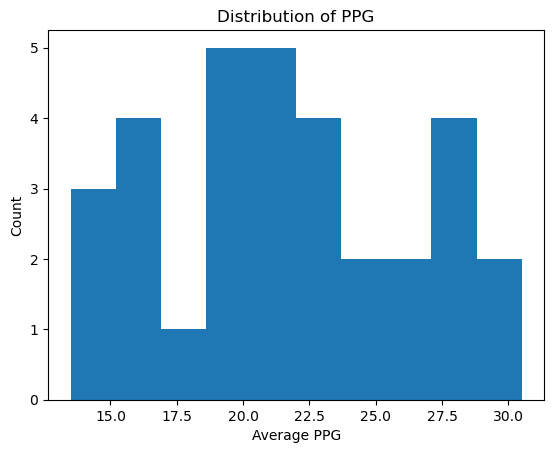

In [426]:
EDA['PPG'].plot(kind='hist')
plt.title('Distribution of PPG')
plt.xlabel('Average PPG')
plt.ylabel('Count')
# Normal distribution, not clear skew

<Axes: ylabel='PPG'>

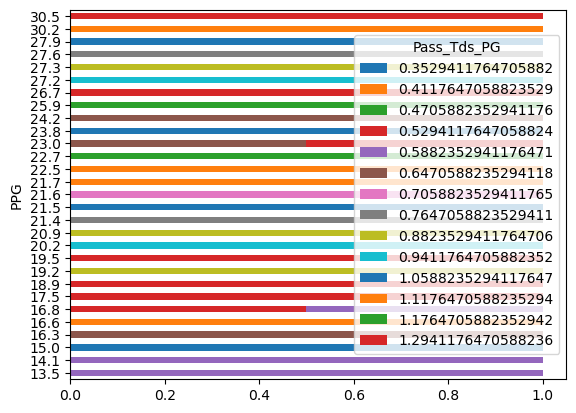

In [427]:
EDA.groupby('PPG')['Pass_Tds_PG'].value_counts(normalize=True).unstack().plot(kind='barh', stacked=True)

In [428]:
corr_mat = EDA.corr()
corr_mat
# Correlation matrix demonstrating how features interact with each other and the target variable

/var/folders/qz/qvyy0rxs3rdfhwskr09cq4q80000gn/T/ipykernel_56830/708128061.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = EDA.corr()


,PPG,Tot_TDs_PG,1st_Downs_PG,Rush_1st_Downs_PG,Pass_1st_Downs_PG,OFF_1st_by_pen_PG,3rd_Conv_Rate,4th_Conv_Rate,Pass_Comp_Rate,Pass_Yds_PG,Pass_Yds_Per_Attempt,Pass_Tds_PG,Off_Int_PG,Rush_Att_PG,Yds_Per_Rush,Rush_Yds_PG,Rush_Tds_PG,Off_Plays_PG,Tot_Yds_PG,Kickoffs_Returned_PG,Avg_K_Return_Yds,Punts_Returned_PG,Avg_P_Return_Yds,Int_Forced_PG,Avg_I_Return_Yds,Yds_Per_Punt,Punts_PG,FG_Conv_Rate,Touchback_Rate,Penalties_PG,Avg_Pen_Yds_PG,Avg_TOP,Fum_Lost_PG,Games,DEF_PPG_Against,DEF_Tot_Tds_PG_Against,DEF_1st_Downs_PG_Against,DEF_Rush_1st_Downs_PG_Against,DEF_Pass_1st_Downs_PG_Against,DEF_1st_by_pen_PG,DEF_3rd_Conv_Rate,DEF_4th_Conv_Rate,DEF_Pass_Comp_Rate,DEF_Pass_Yds_Per_Attempt,DEF_Pass_Yds_PG,DEF_Pass_Tds_PG,DEF_Int_PG,DEF_Rush_Att_PG,DEF_Yds_Per_Rush,DEF_Rush_Yds_PG,DEF_Rush_Tds_PG,DEF_Tot_Plays_PG,DEF_YPG_Against,DEF_Kickoffs_Returned_PG,DEF_Avg_K_Return_Yds,DEF_Punts_Returned_PG,DEF_Avg_P_Return_Yds,DEF_Avg_I_Return_Yds,DEF_Yds_Per_Punt_Against,DEF_Punts_PG,DEF_FG_Conv_Rate,DEF_Touchback_Rate,DEF_Penalties_PG,DEF_Avg_Pen_Yds_PG,DEF_Avg_TOP,DEF_Fum_Lost_PG,Sacks_Taken_PG,Sack_Yds_Lost_PG,FG_Att_PG,FG_Good_PG,Pass_Att_PG,DEF_Pass_Att_PG,DEF_Sacks_PG,DEF_Sack_Yds_PG,DEF_FG_Att_PG,DEF_FG_Good_PG
PPG,1.000000,0.951096,0.782081,0.482455,0.634291,0.005961,0.691199,0.069729,0.663740,0.751373,7.747418e-01,0.691959,-0.236461,0.374173,0.321489,0.529700,0.698304,0.236294,0.899700,-0.253534,-0.013886,-0.119523,0.000865,0.217667,-0.095582,-0.203996,-0.762556,0.129571,0.100731,0.020106,0.219160,0.536651,0.140761,NaN,-0.365589,-0.194225,-0.250276,-0.423931,-0.058567,0.162756,-0.248888,-0.174336,-0.025623,-0.203640,-0.064259,6.591917e-02,0.217667,-0.625709,-0.141654,-0.490865,-0.293508,-0.282010,-0.270792,0.154013,0.189400,-0.619383,0.205201,-0.028611,0.056106,0.004033,0.008073,-0.045648,0.001813,-0.005933,-0.508179,0.191031,-0.529925,-0.596082,-0.206699,-0.117317,0.048910,0.164971,0.510158,0.514693,-0.471319,-0.434321
Tot_TDs_PG,0.951096,1.000000,0.851178,0.526964,0.697744,-0.026468,0.714962,0.009473,0.750347,0.792748,7.698748e-01,0.763911,-0.151094,0.390239,0.387104,0.529813,0.722469,0.328526,0.885250,-0.216388,-0.025037,-0.136259,0.006428,0.211359,-0.066948,-0.268159,-0.736138,-0.045545,0.080044,0.027420,0.171352,0.473749,0.164913,NaN,-0.264847,-0.071425,-0.070805,-0.314288,0.101580,0.137907,-0.152205,-0.220684,0.080893,-0.140558,0.008302,1.377739e-01,0.211359,-0.530520,-0.141506,-0.478648,-0.241076,-0.083661,-0.197466,0.186473,0.170800,-0.598306,0.153626,0.067117,0.158043,-0.038696,0.064429,-0.032443,0.020720,-0.096171,-0.441129,0.133432,-0.458197,-0.569419,-0.387252,-0.350104,0.125393,0.307581,0.518481,0.527415,-0.395049,-0.349095
1st_Downs_PG,0.782081,0.851178,1.000000,0.640185,0.777583,0.058712,0.747288,0.082724,0.673139,0.796544,6.381256e-01,0.696521,0.083869,0.456541,0.263627,0.452121,0.603397,0.602954,0.818597,-0.241034,-0.135747,0.091661,0.084532,0.054205,-0.083973,-0.233952,-0.714114,-0.047204,0.134511,0.061002,0.194922,0.629123,0.274507,NaN,-0.240424,0.012335,-0.101936,-0.366664,0.137623,-0.008898,-0.088737,-0.197330,0.054210,-0.209613,-0.087606,2.820795e-01,0.054205,-0.518231,-0.182850,-0.554559,-0.304750,-0.078745,-0.354665,0.115780,0.023000,-0.508624,-0.058265,0.052594,0.232255,0.109680,0.129764,0.090882,0.136699,-0.086694,-0.624127,0.041546,-0.303799,-0.367883,-0.192886,-0.195896,0.350607,0.308464,0.483262,0.407097,-0.414707,-0.336119
Rush_1st_Downs_PG,0.482455,0.526964,0.640185,1.000000,0.058922,-0.165022,0.504420,-0.117134,0.358741,0.148824,2.891934e-01,0.134222,0.151132,0.781381,0.434239,0.809685,0.693414,0.514317,0.435901,-0.228136,-0.266529,0.025513,0.360027,0.131388,0.001058,-0.469580,-0.324482,0.061559,0.122232,0.152241,0.279420,0.640268,0.178249,NaN,-0.220446,-0.011282,-0.236123,-0.489563,0.009832,0.155223,-0.183334,-0.092948,-0.236512,-0.435981,-0.254523,2.176891e-01,0.131388,-0.454551,-0.100488,-0.446435,-0.359657,-0.099024,-0.462488,0.047690,0.118745,-0.069751,-0.014585,0.010864,0.181141,0.307146,0.046886,-0.03126

In [429]:
EDA['PPG'].describe()

count    32.000000
mean     21.693750
std       4.606443
min      13.500000
25%      18.550000
50%      21.550000
75%      24.625000
max      30.500000
Name: PPG, dtype: float64